In [1]:
""" 
Calculate ICD code distribution for females and males
Goal: detect codes that have different distributions in females and males
TODO: analyze distributions of other characteristics than mortality (e.g., number of days in ICU)
"""

import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd

In [2]:
def get_data():

    """ 
    Get two dataframes, one for the aggregated data of males, and one for the aggregated data of females
    """

    patient_agg_df = pd.read_csv("./mimiciii/PATIENTS_AGG.csv", index_col=0, header=0, converters={"ICD codes": json.loads})
    # patient_agg_df.head()
    male_df = patient_agg_df.loc[patient_agg_df['gender'] != 'M']
    female_df = patient_agg_df.loc[patient_agg_df['gender'] != 'F']
    return male_df, female_df


In [3]:
male_df, female_df = get_data()

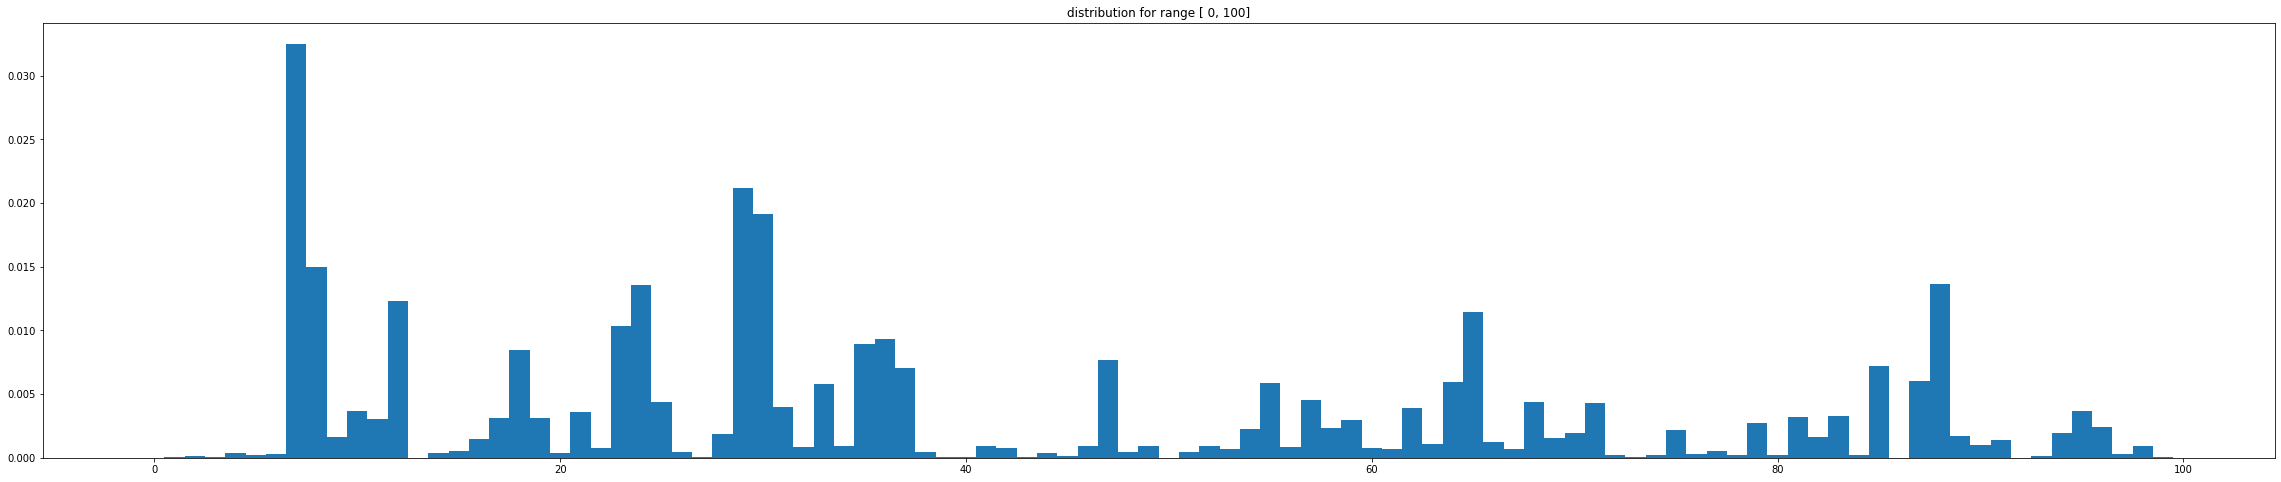

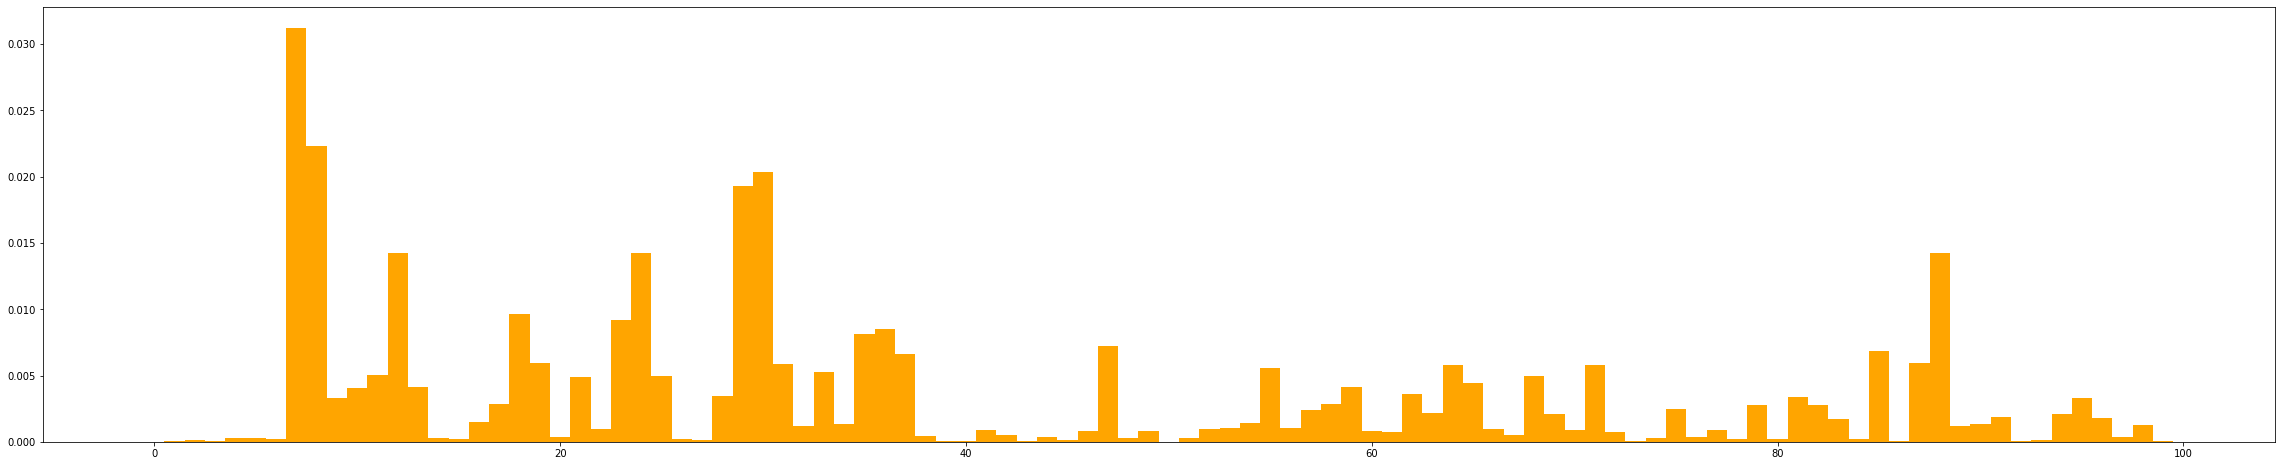

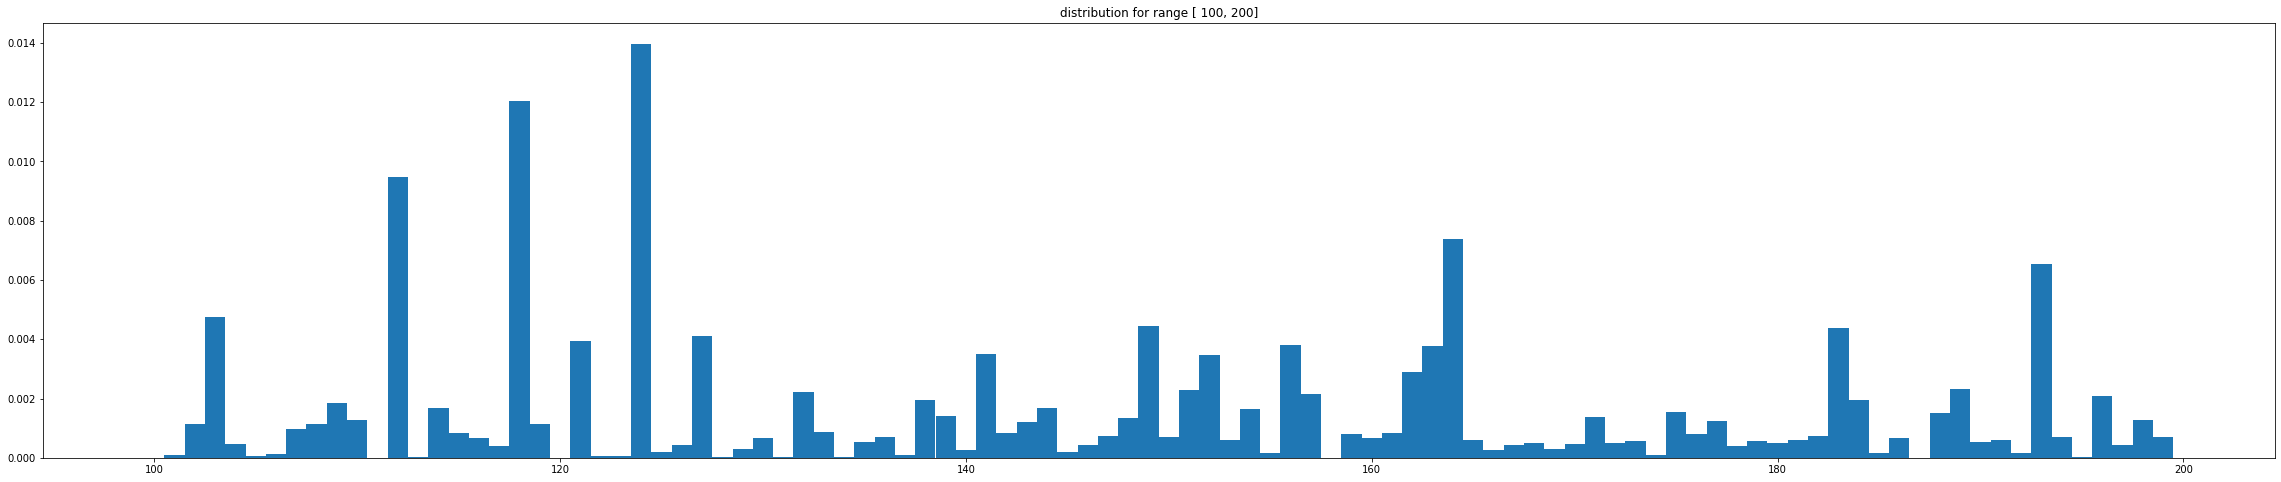

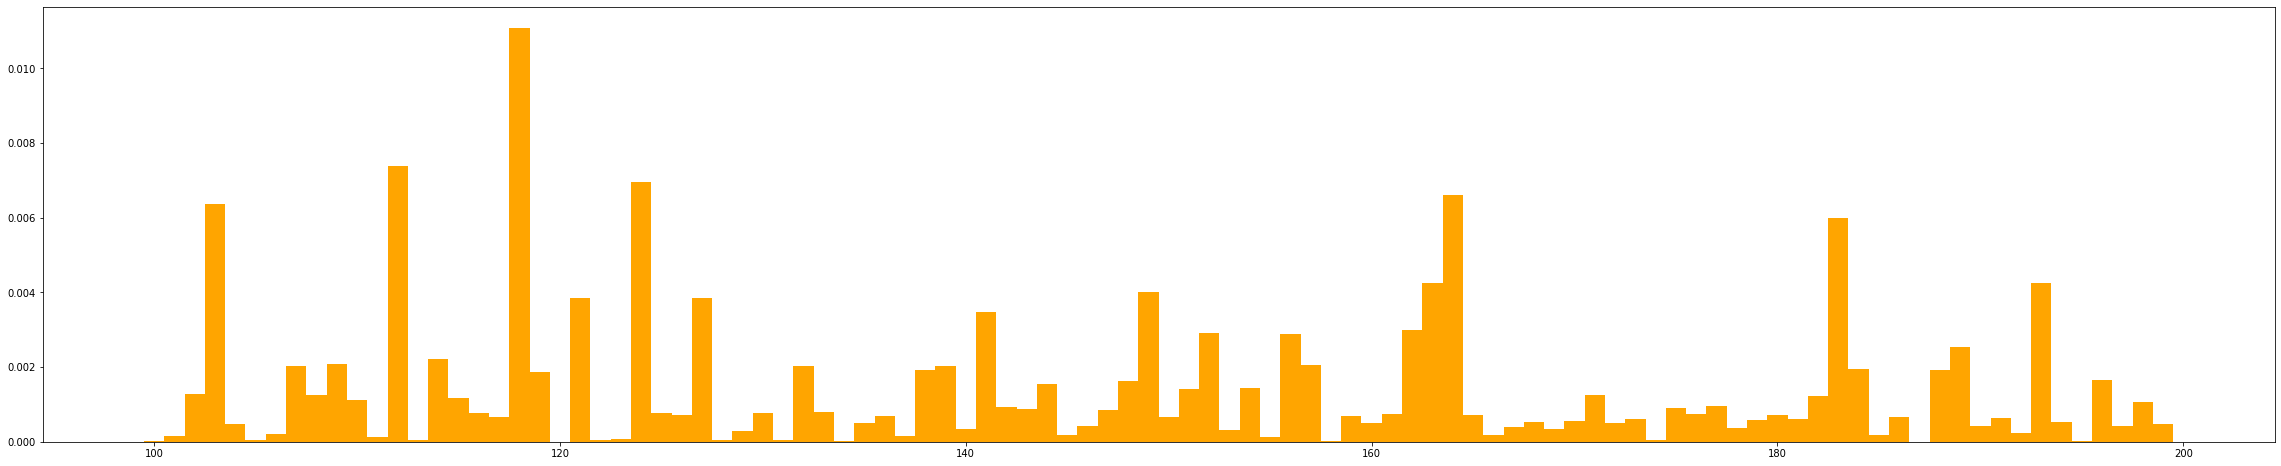

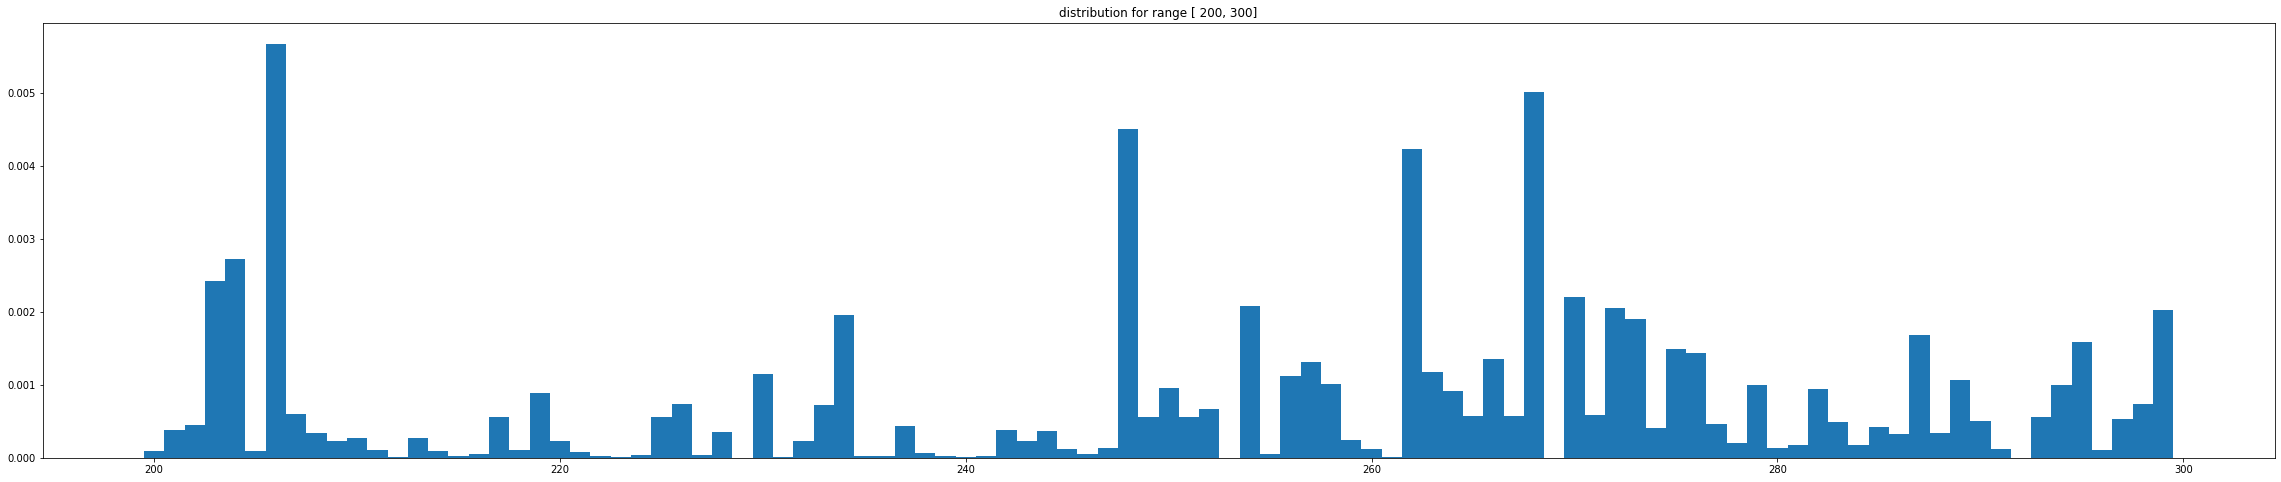

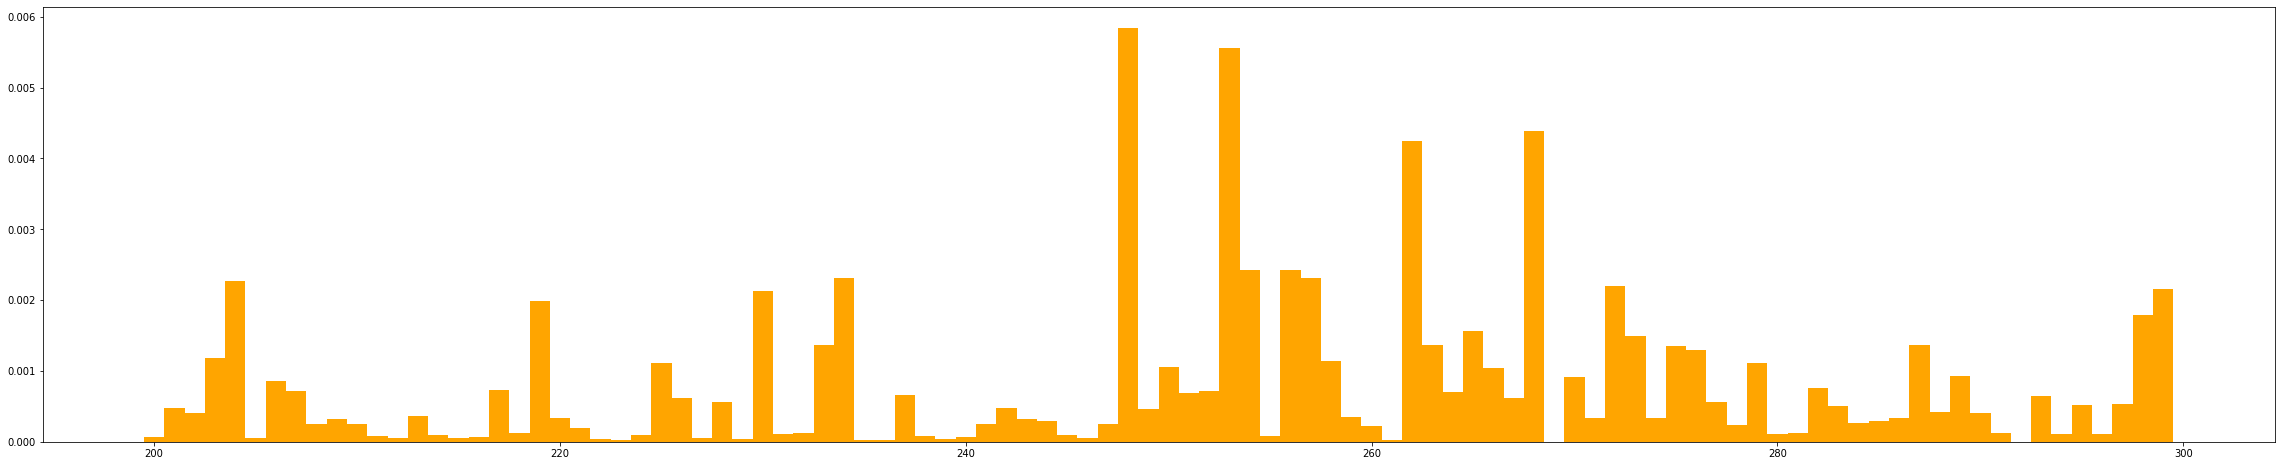

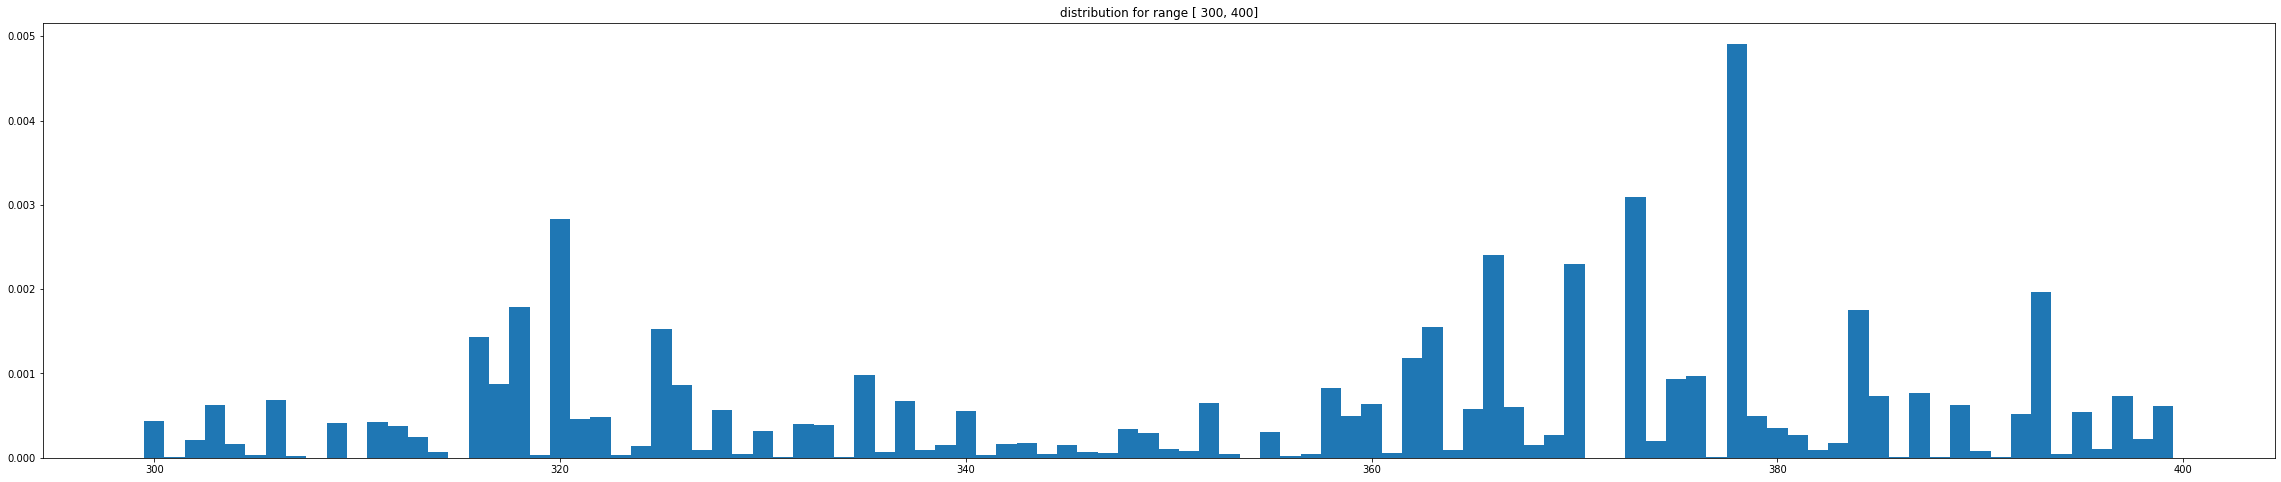

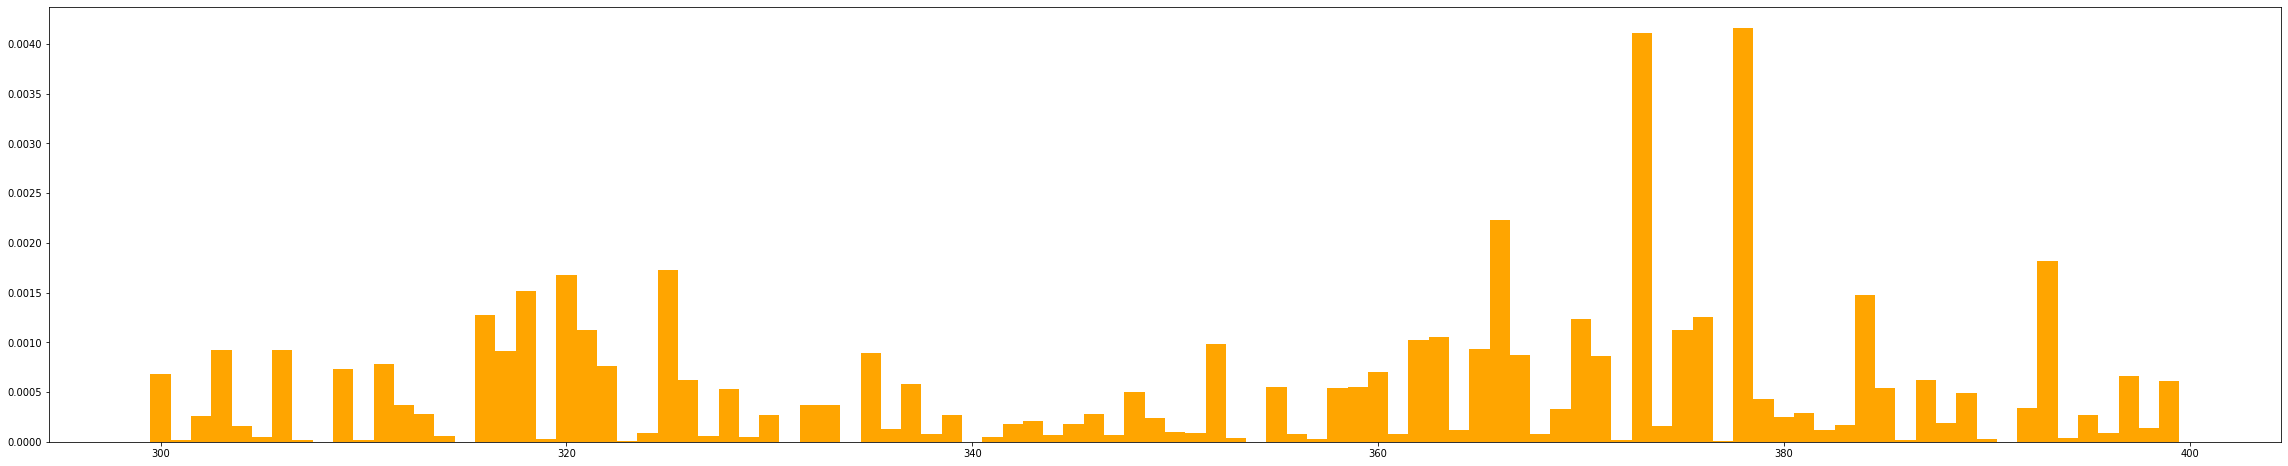

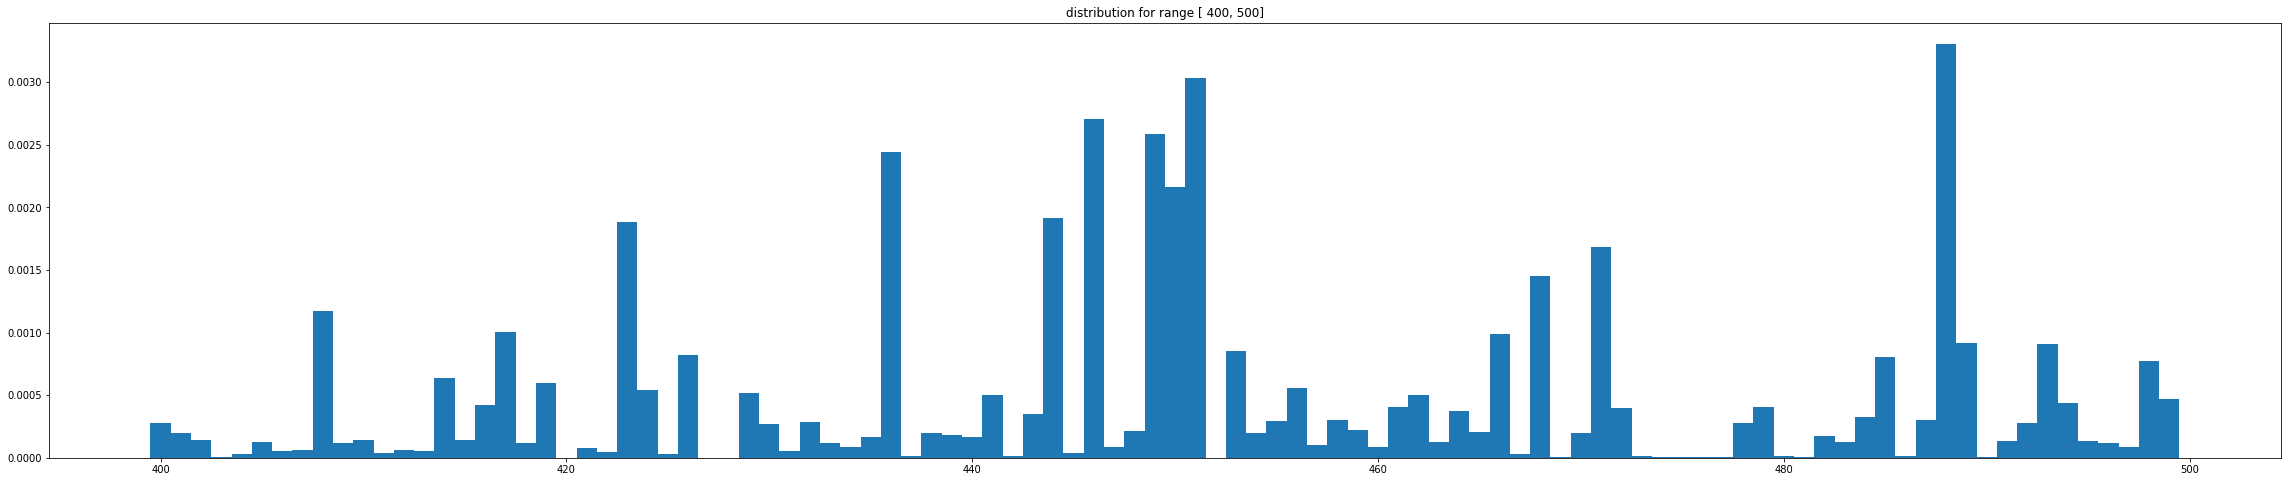

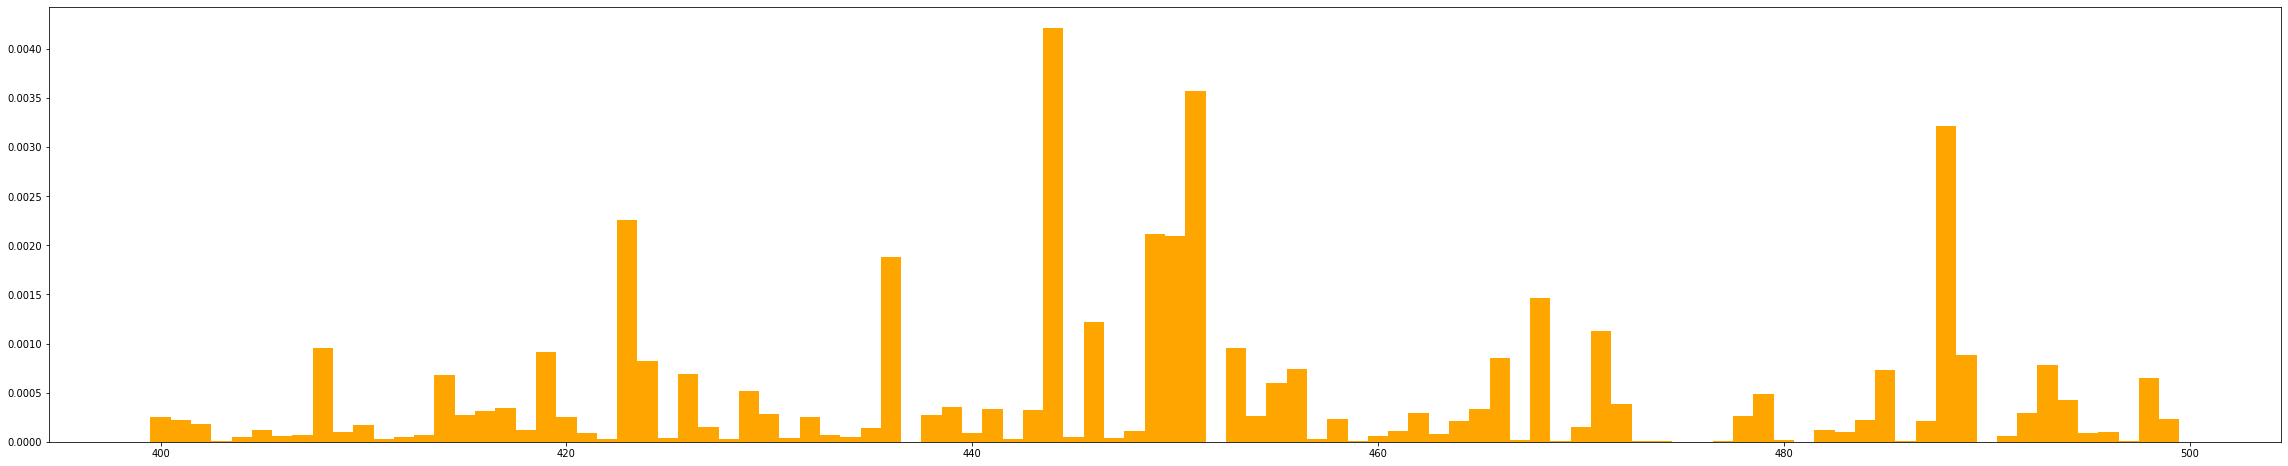

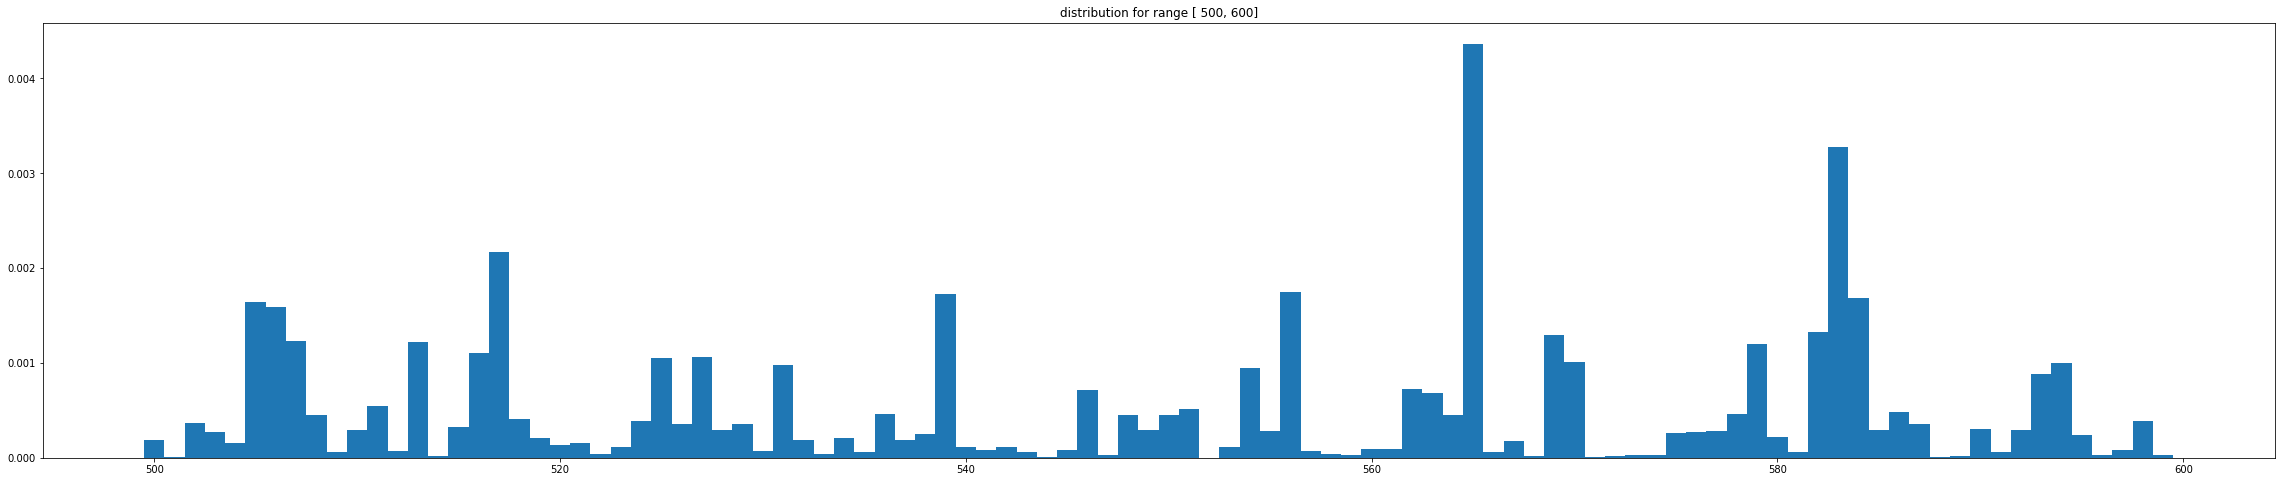

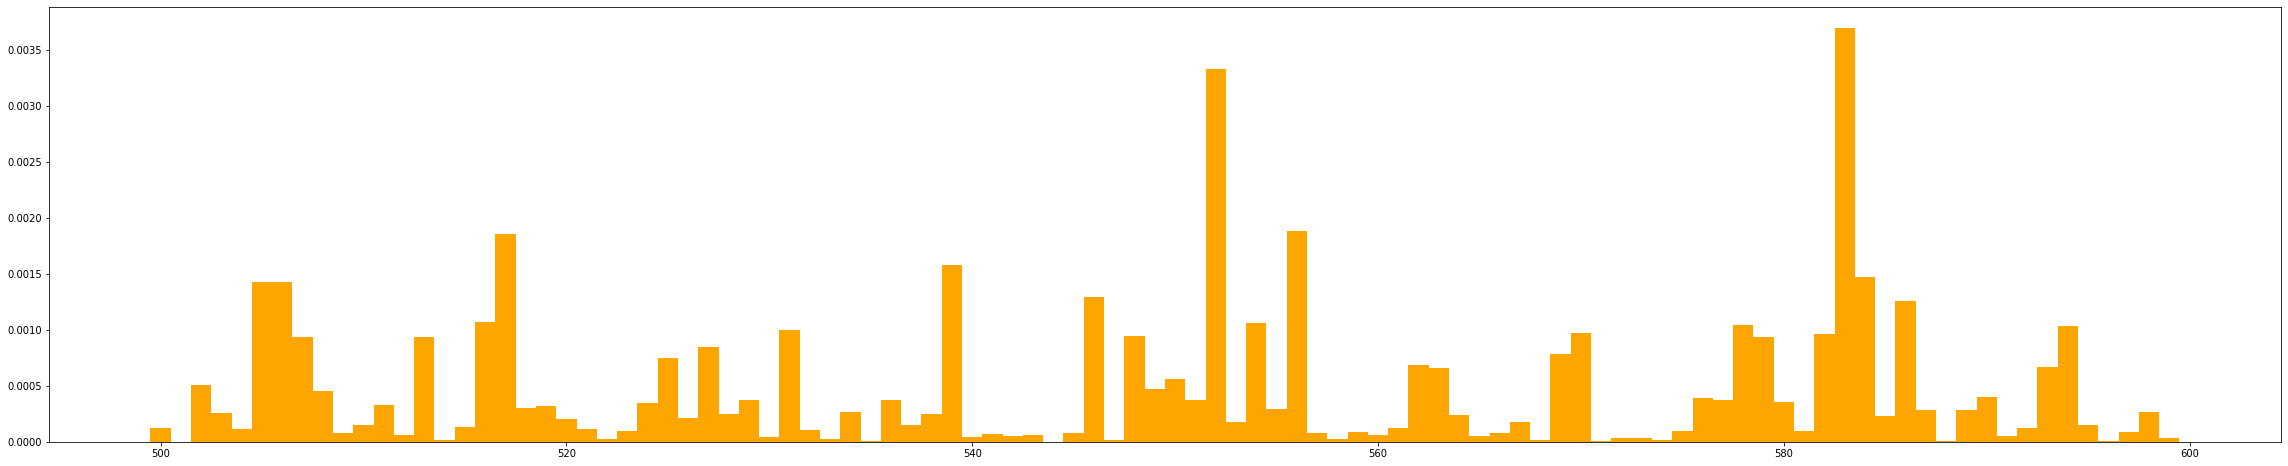

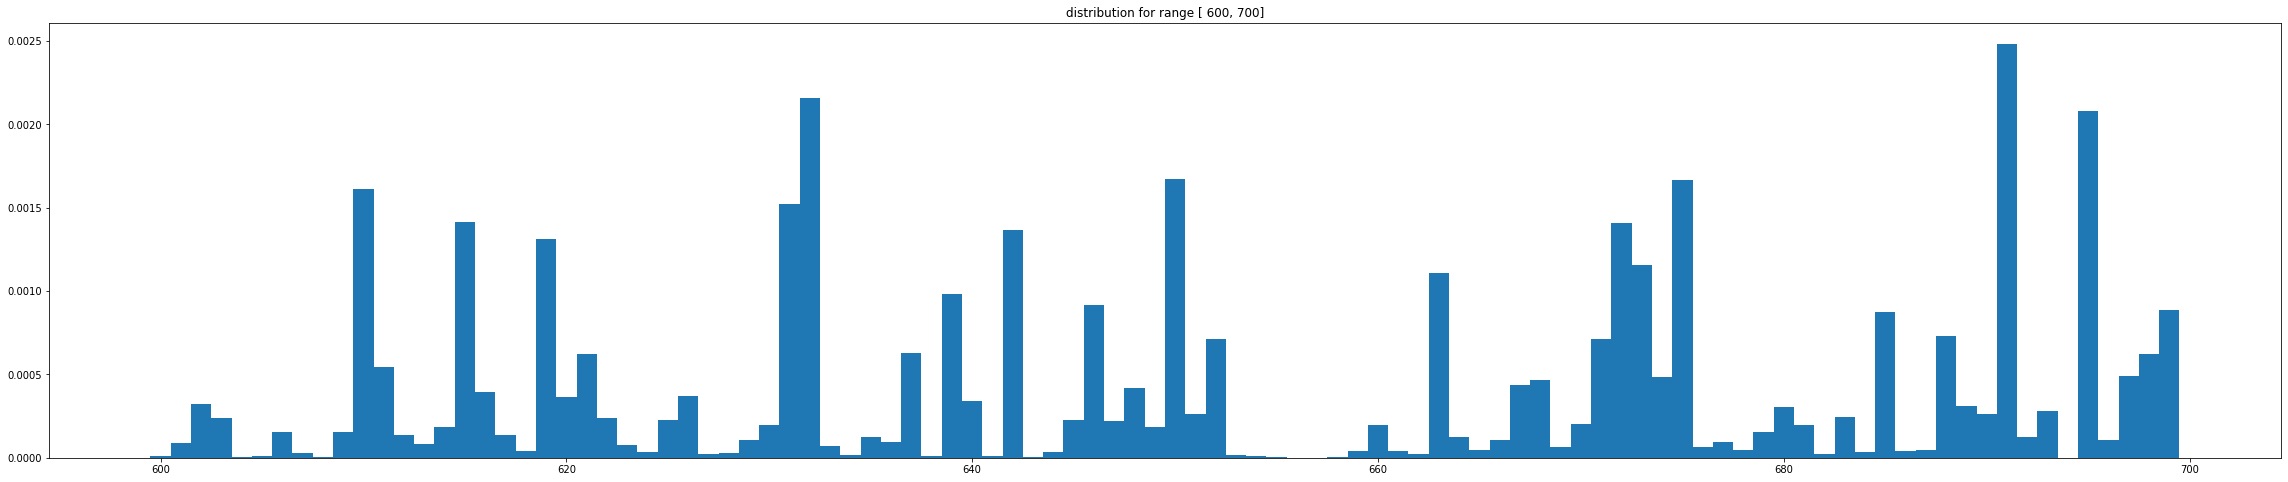

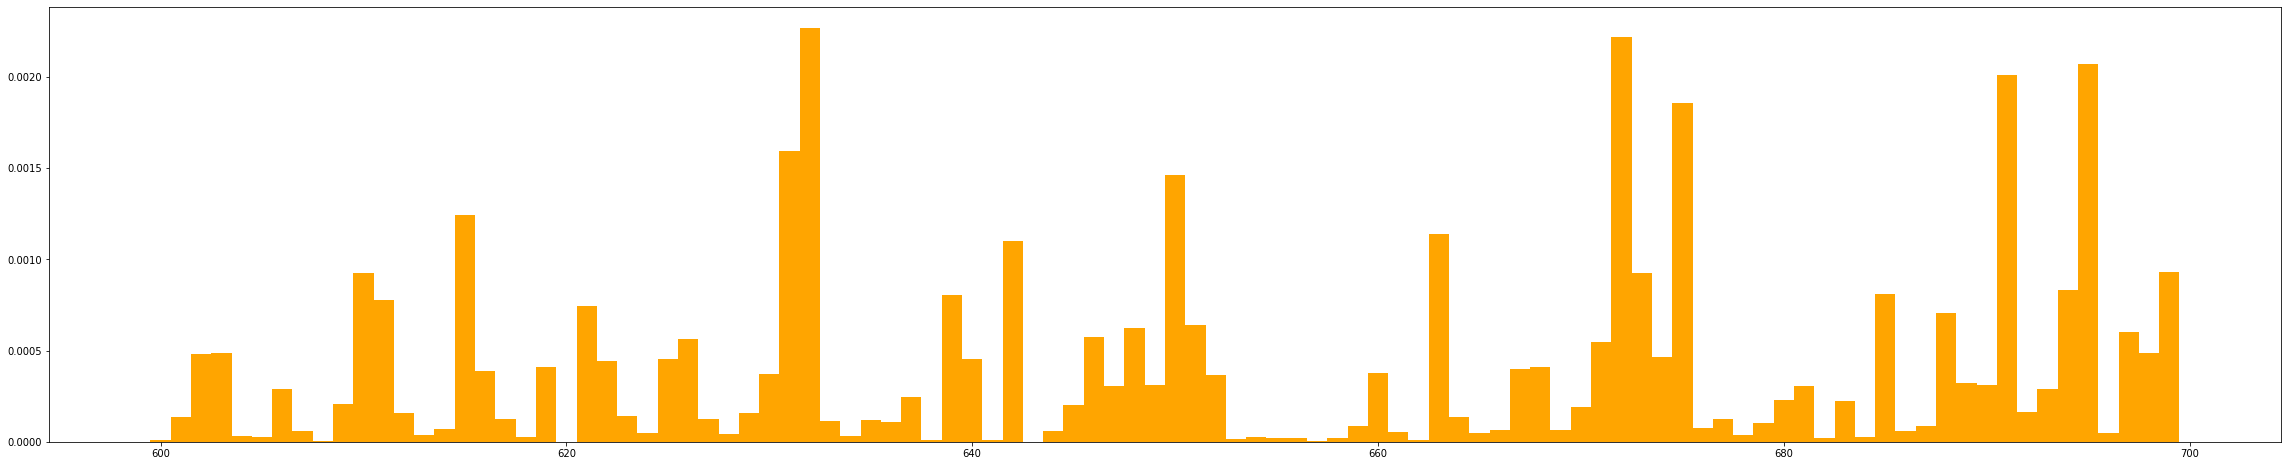

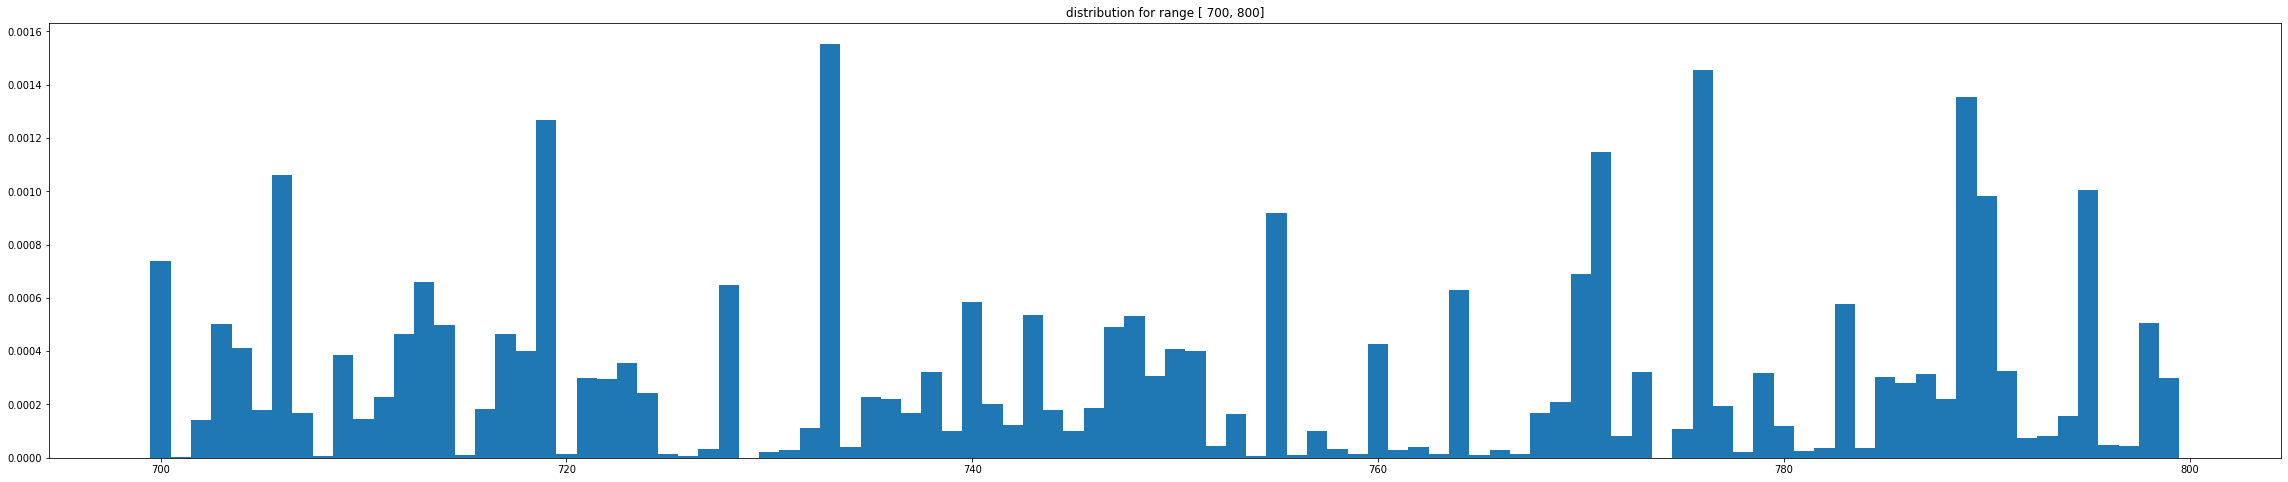

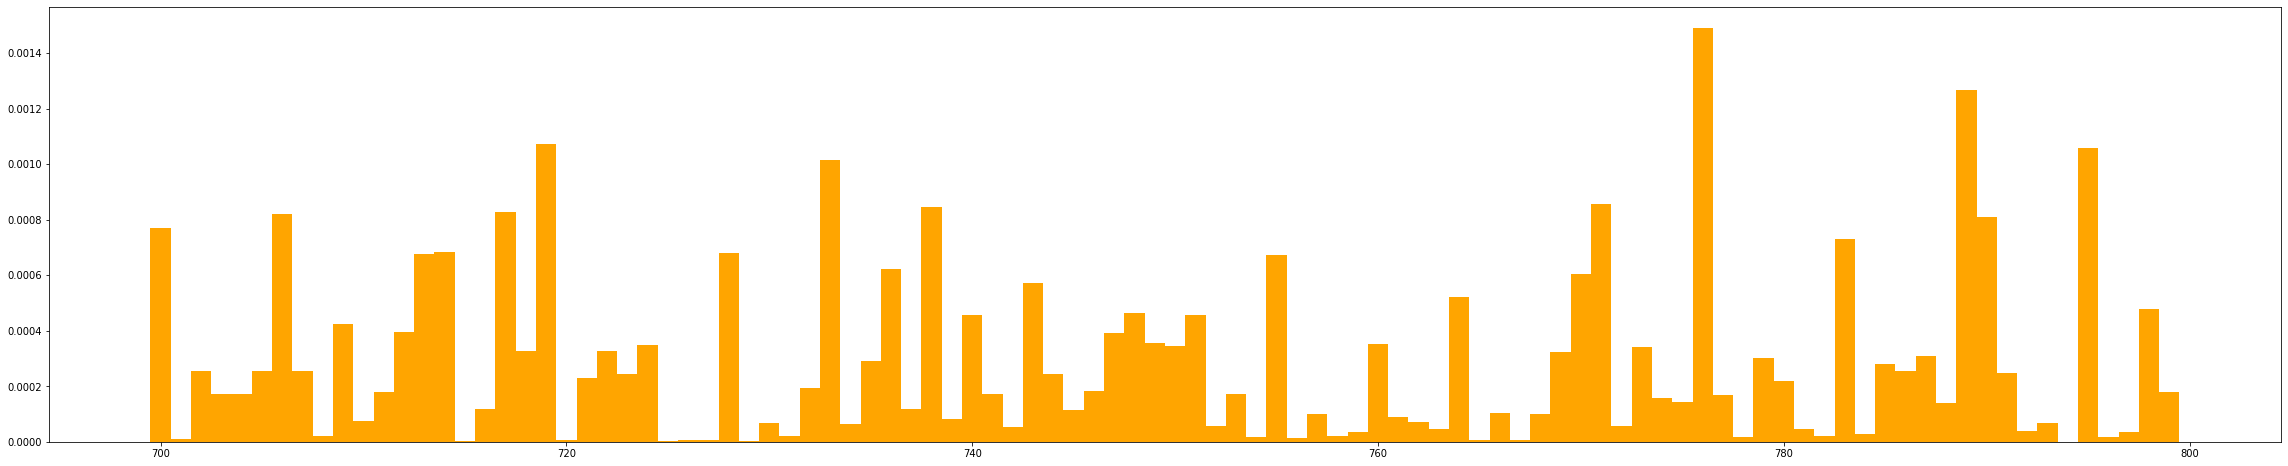

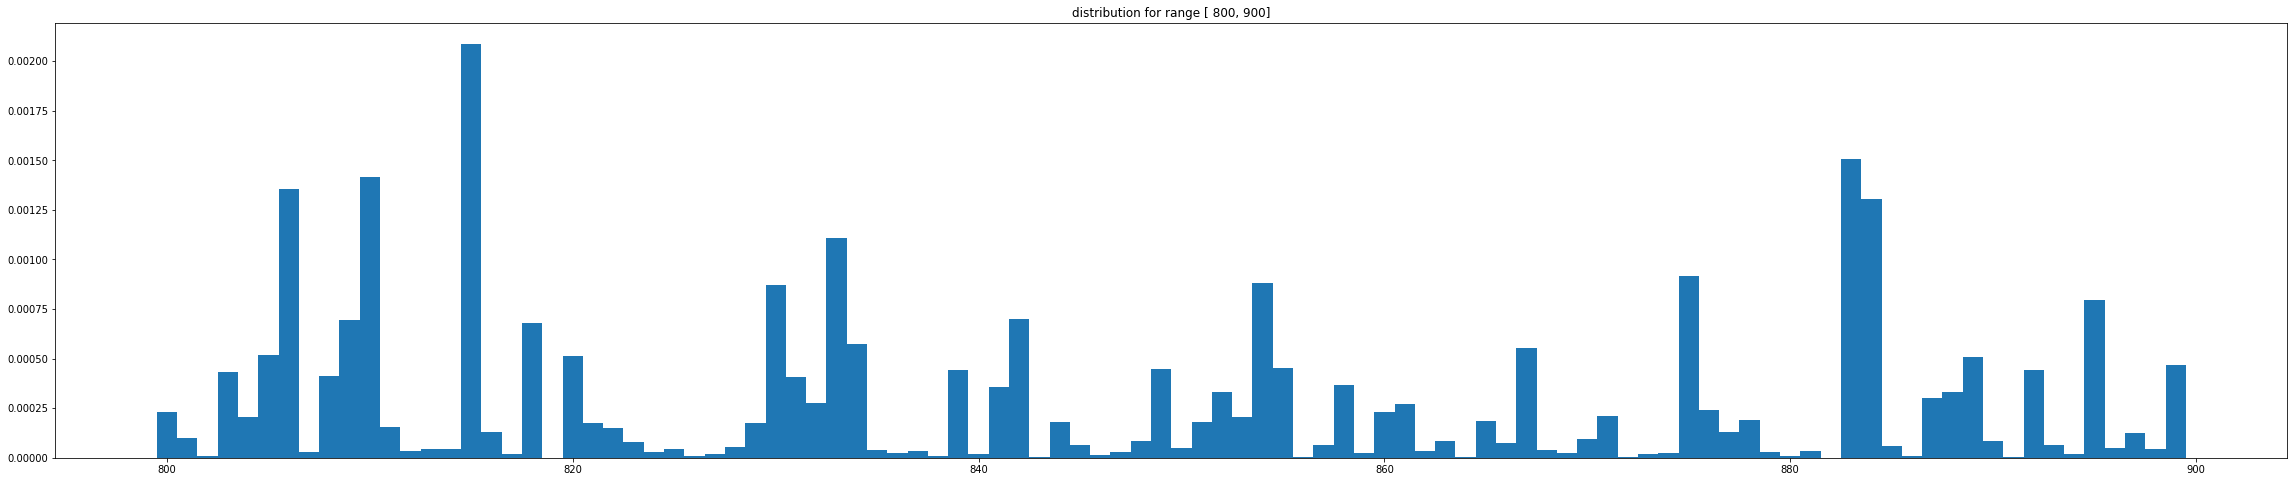

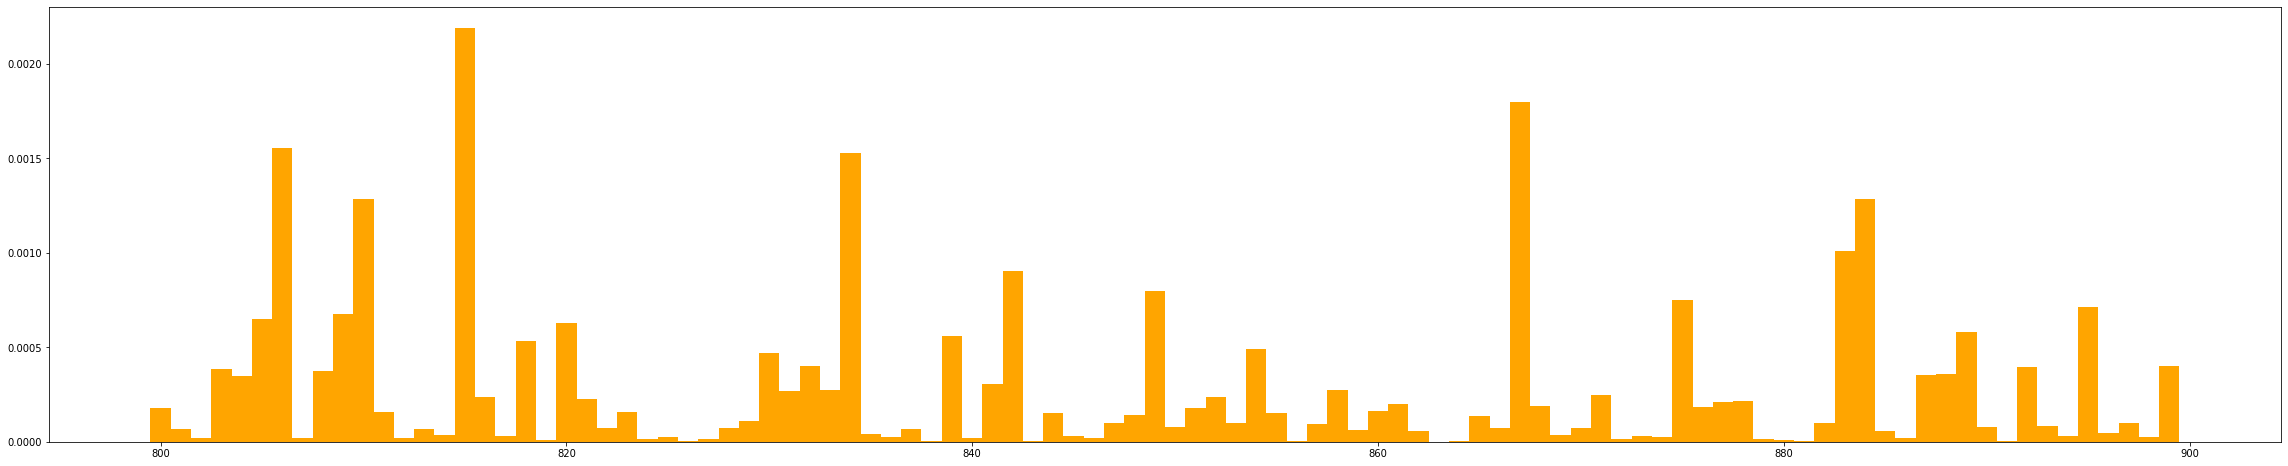

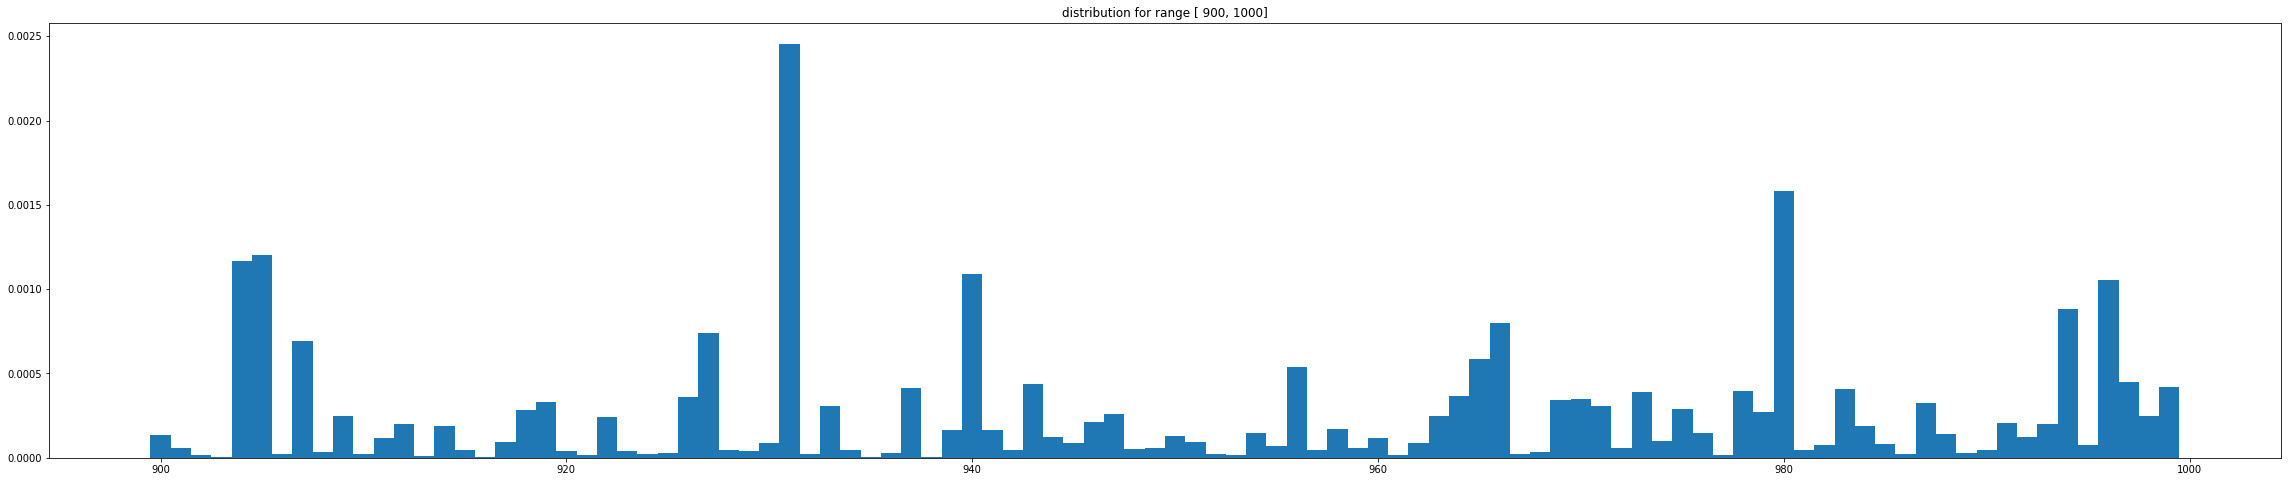

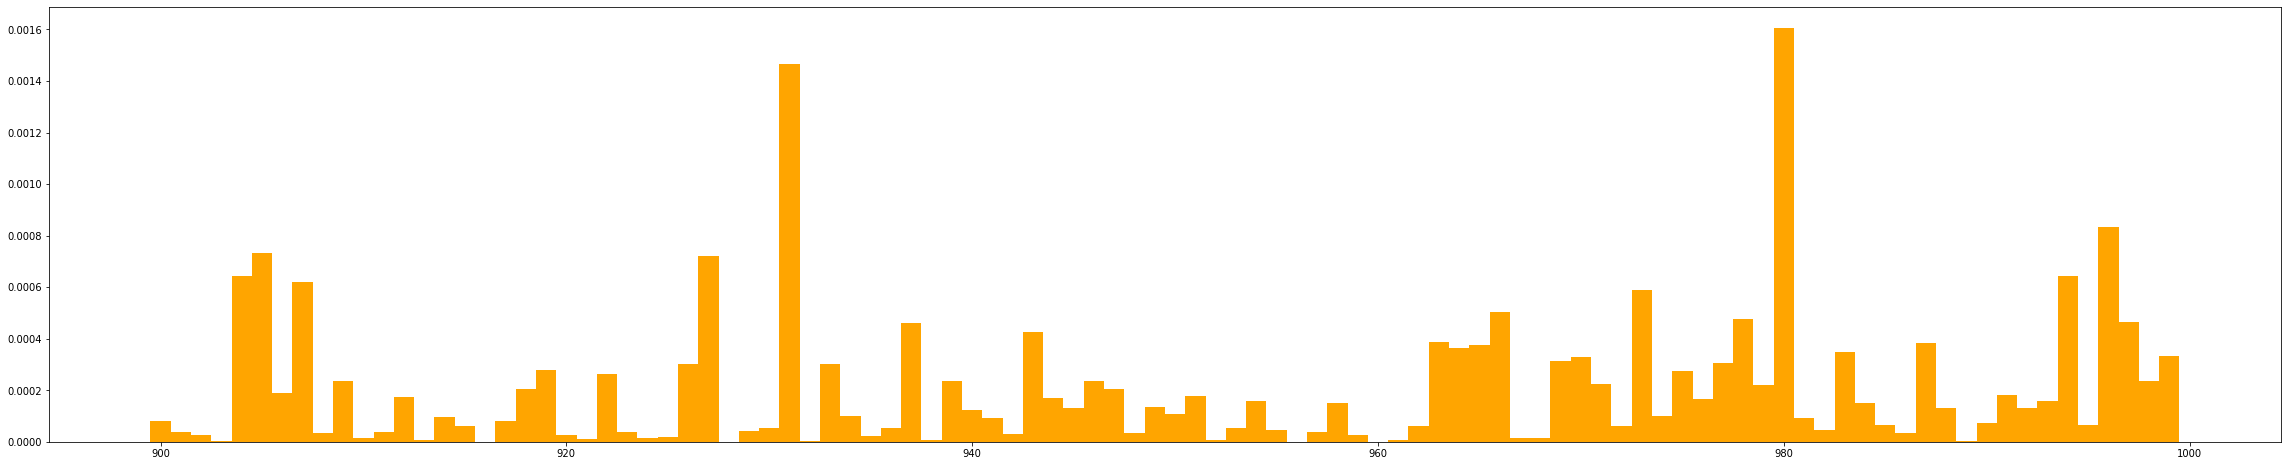

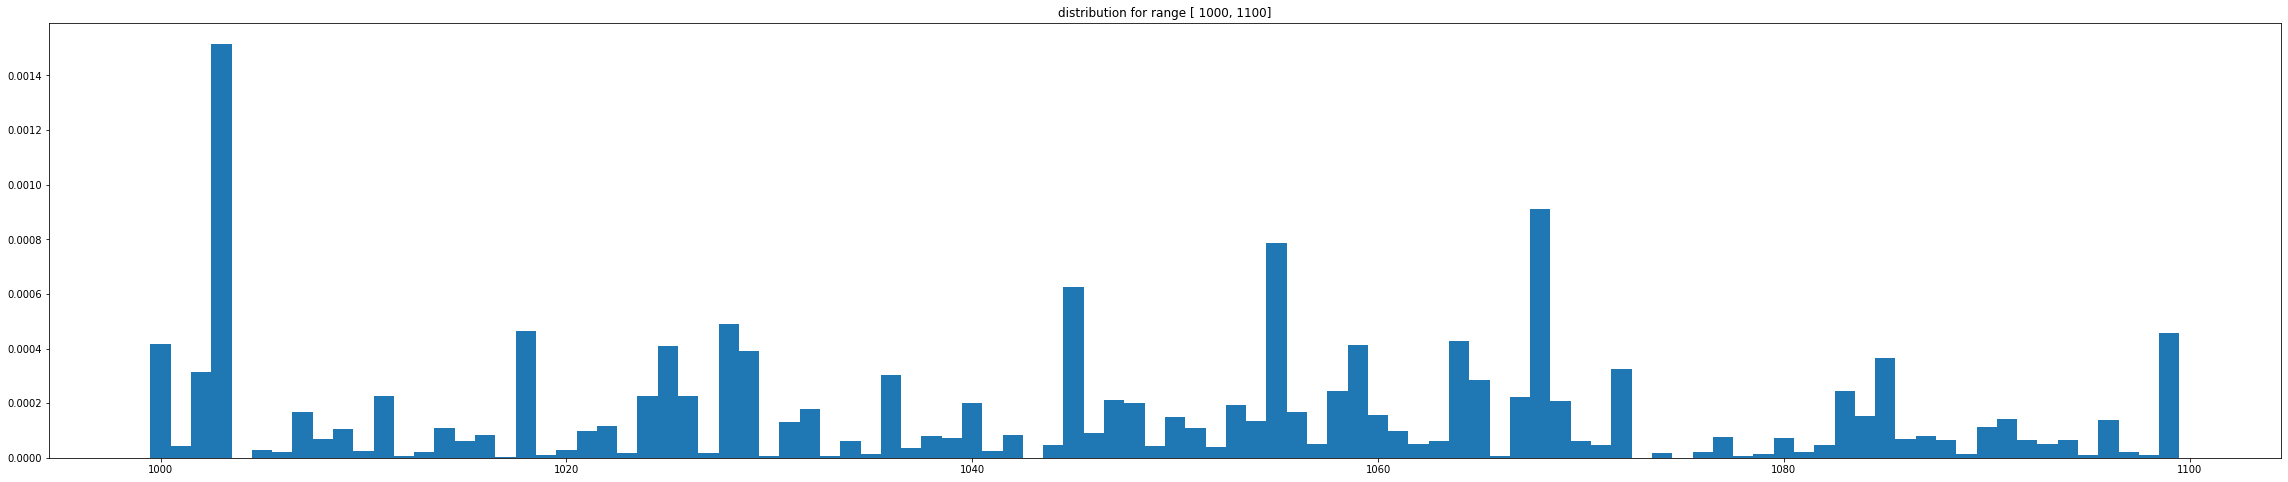

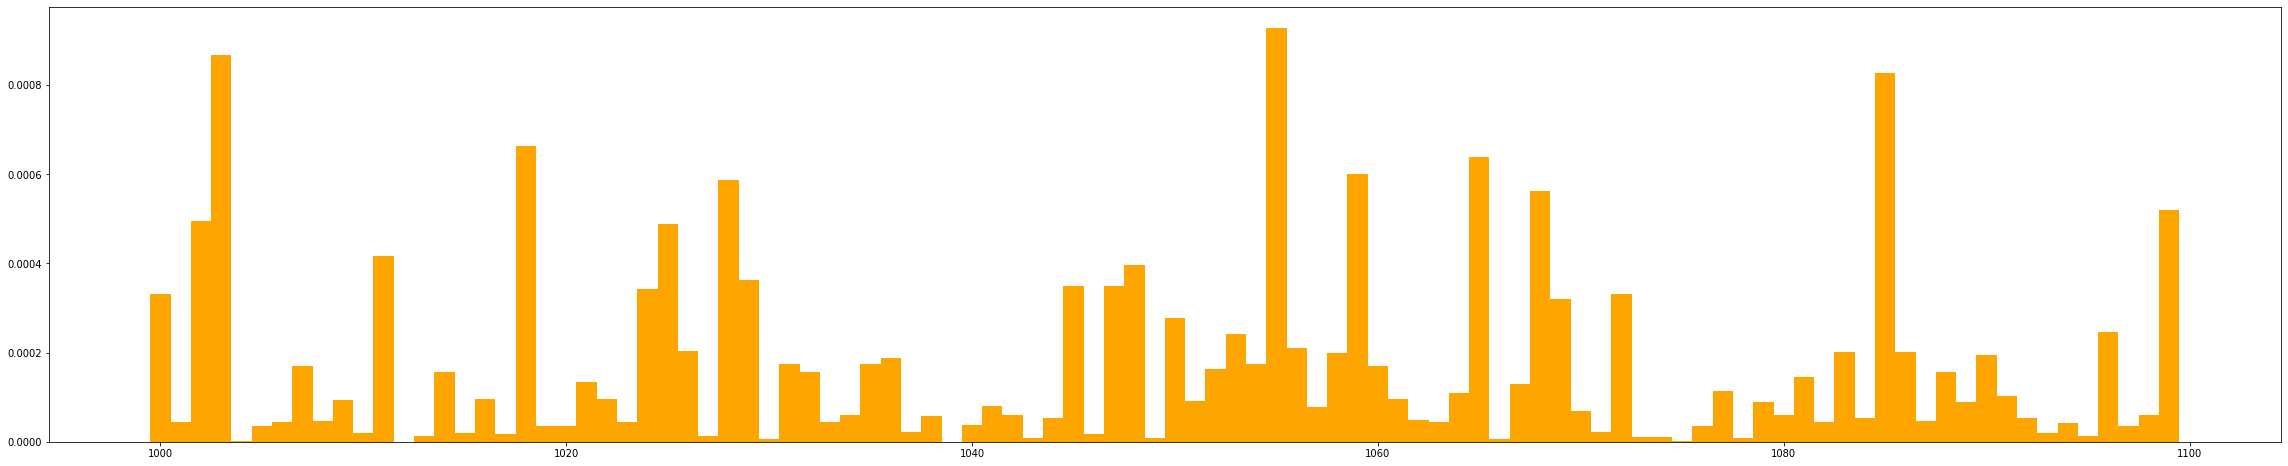

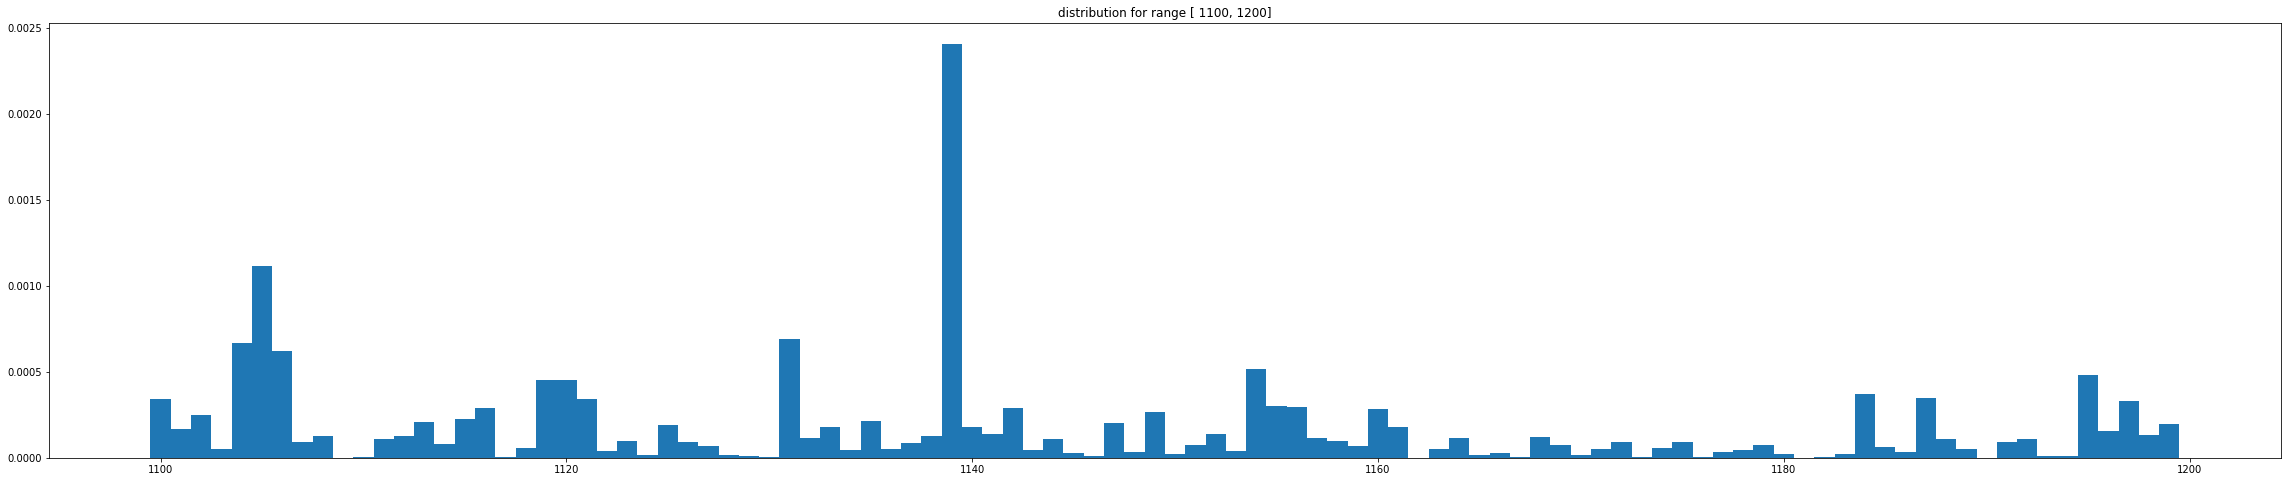

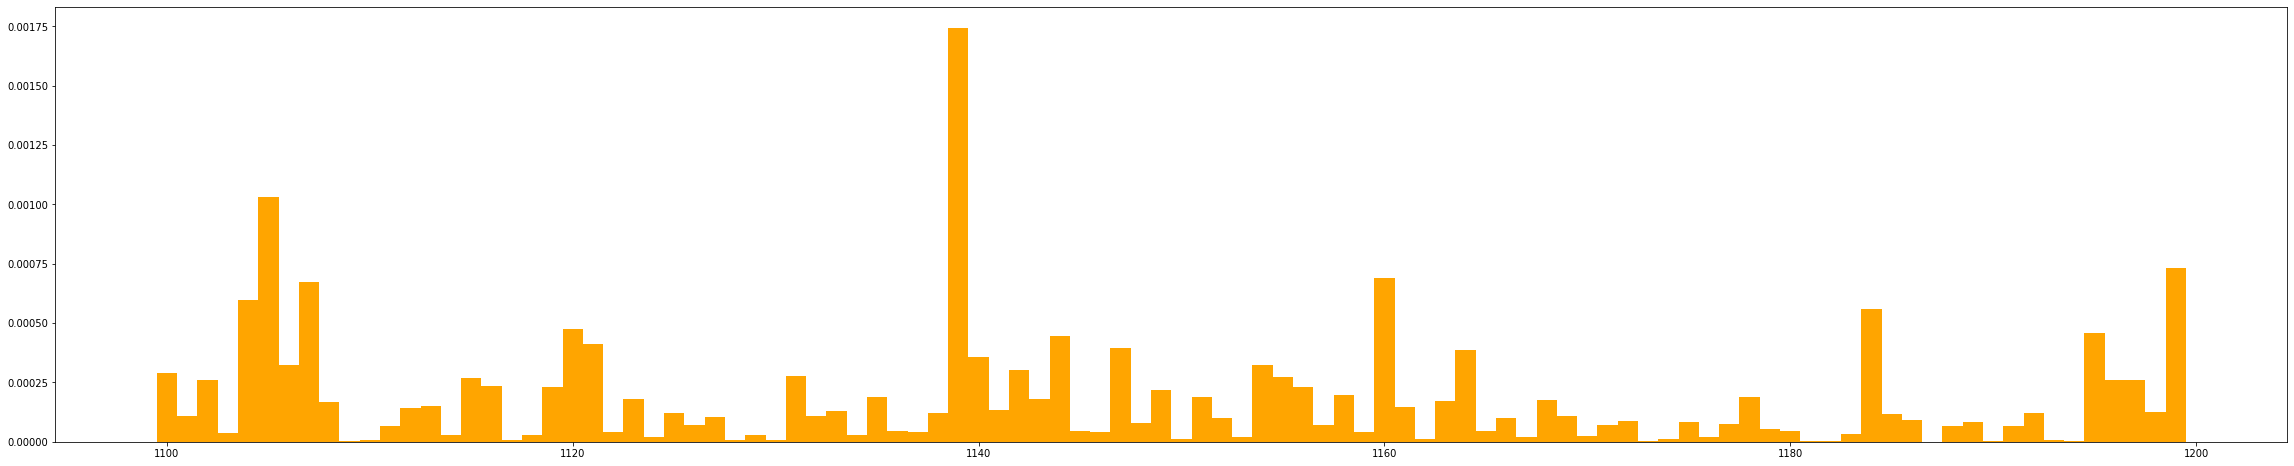

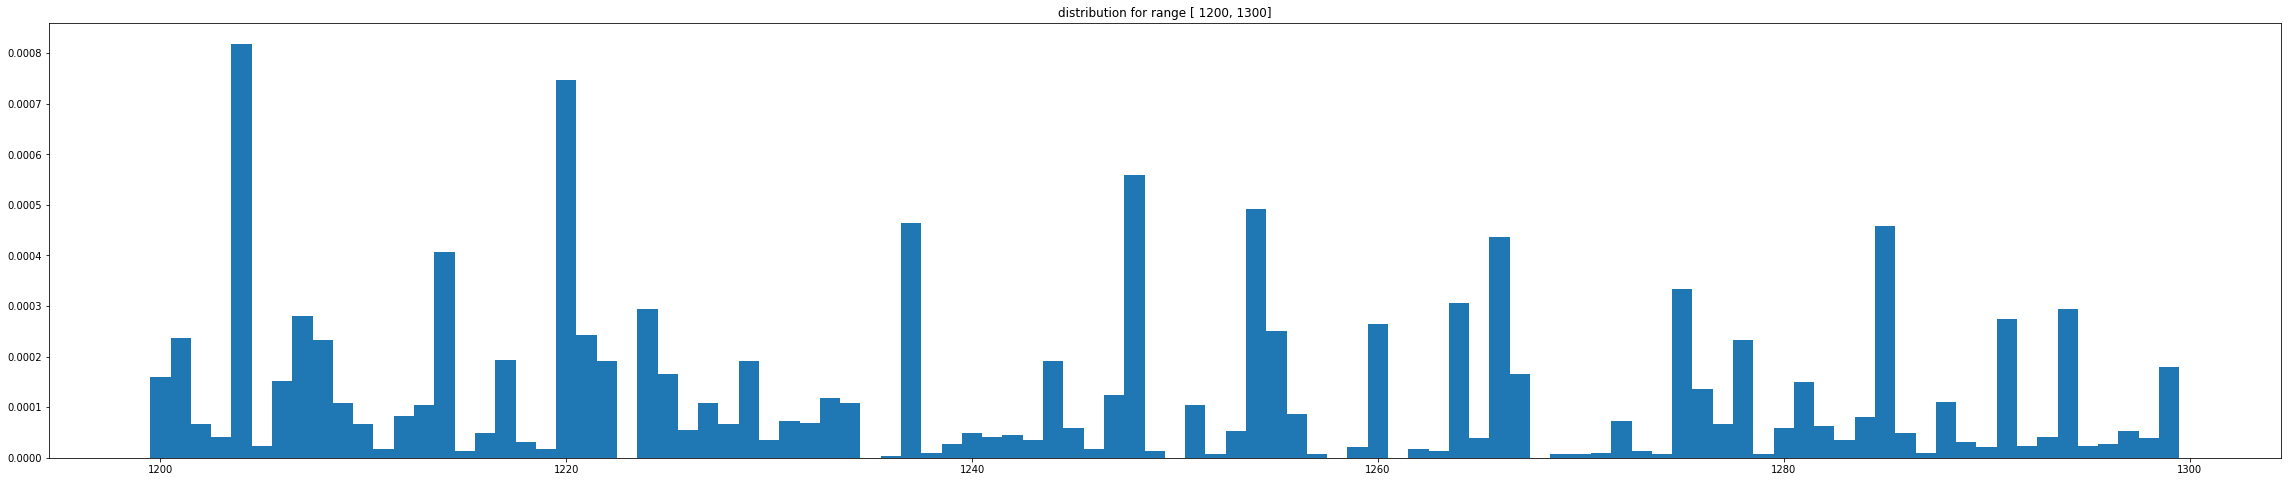

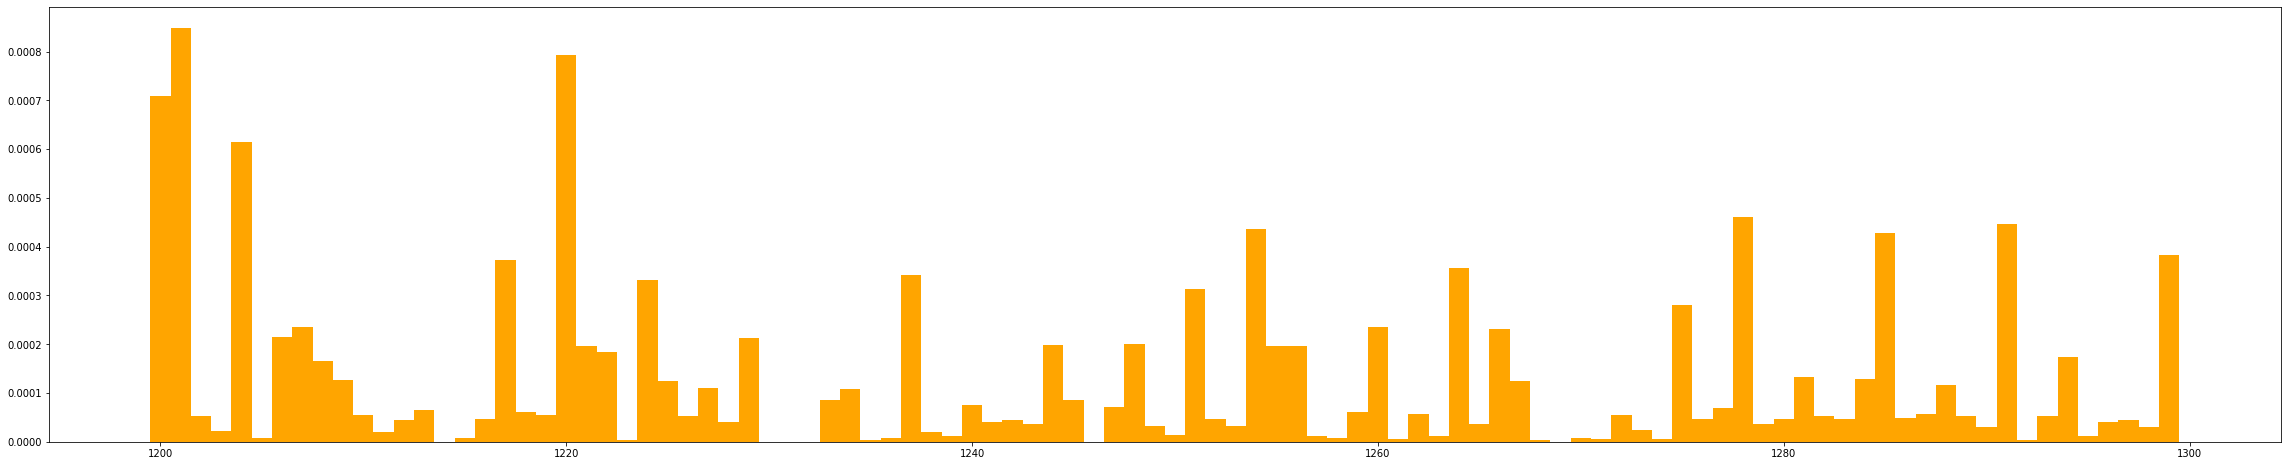

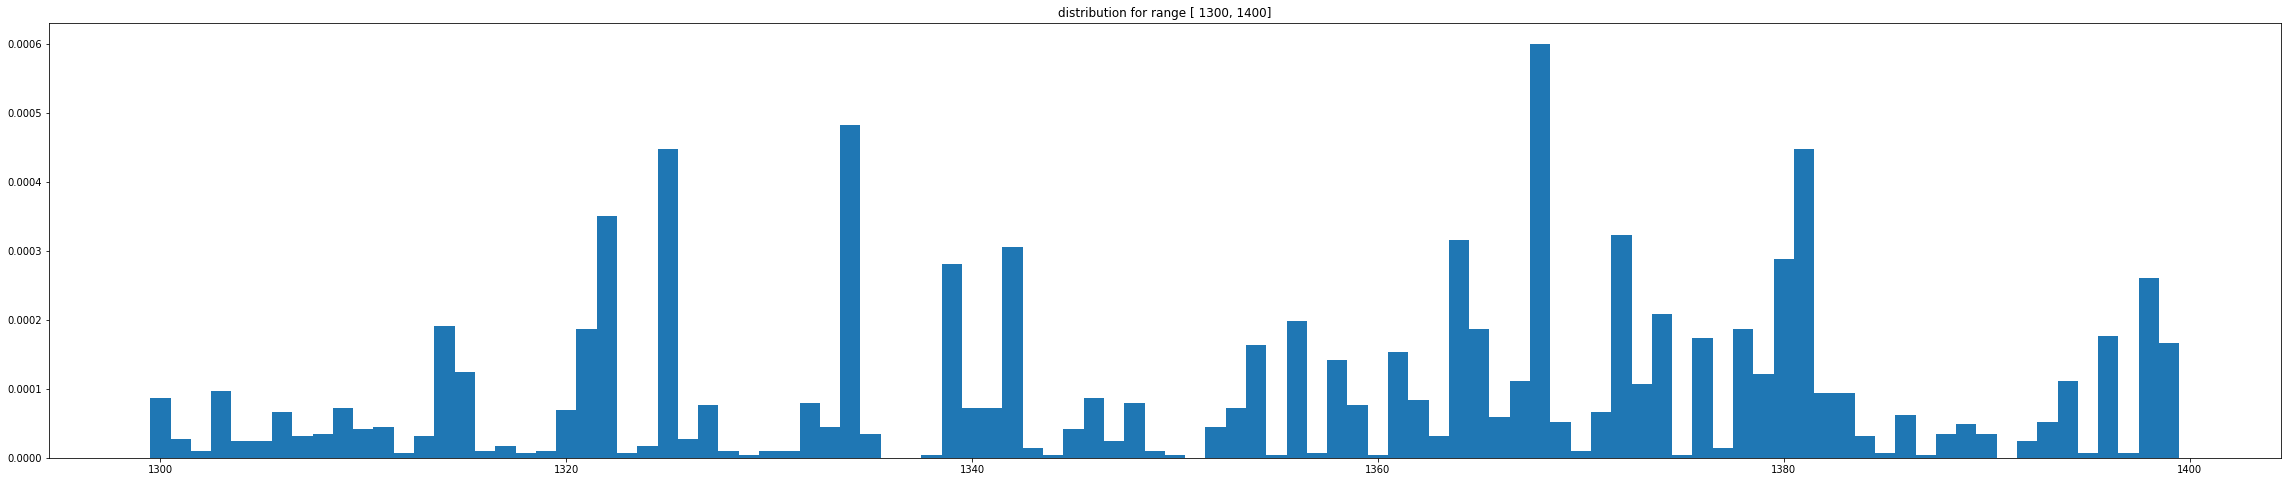

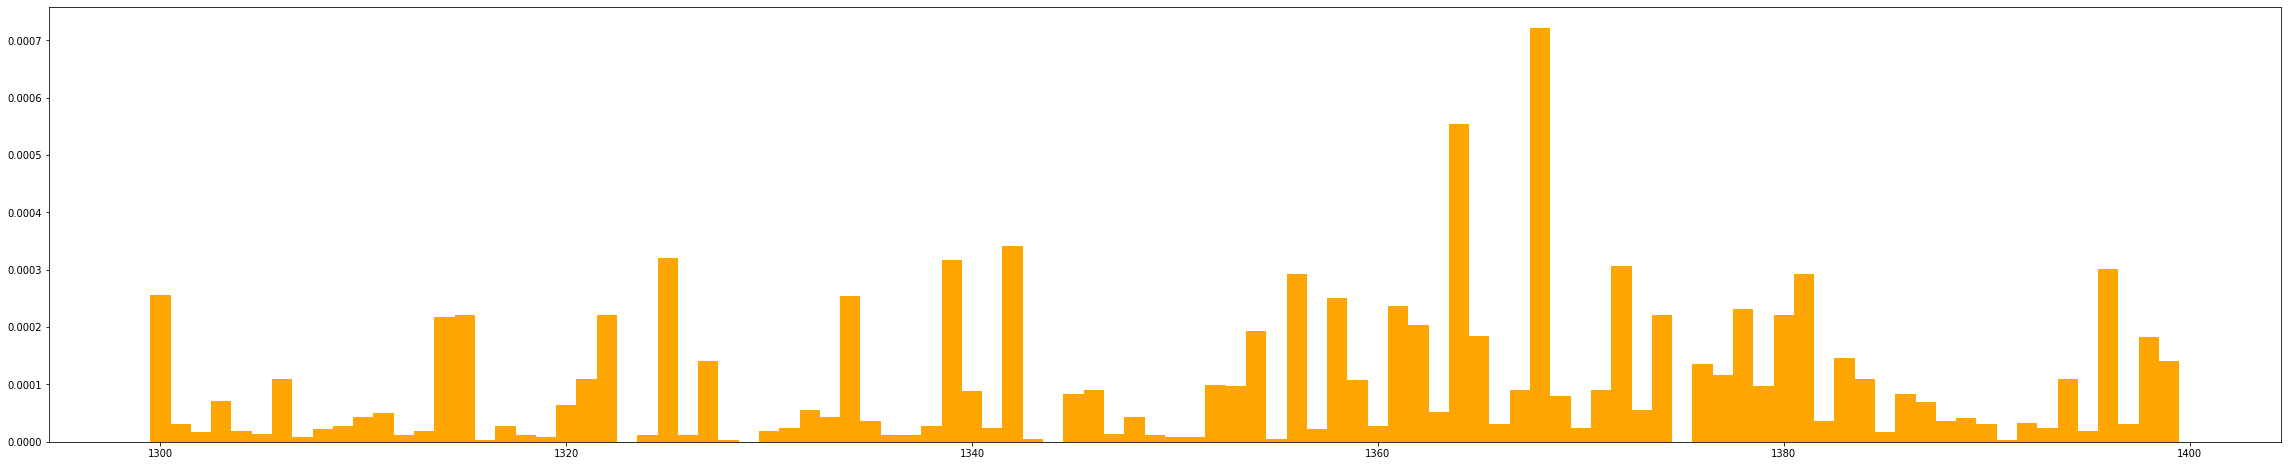

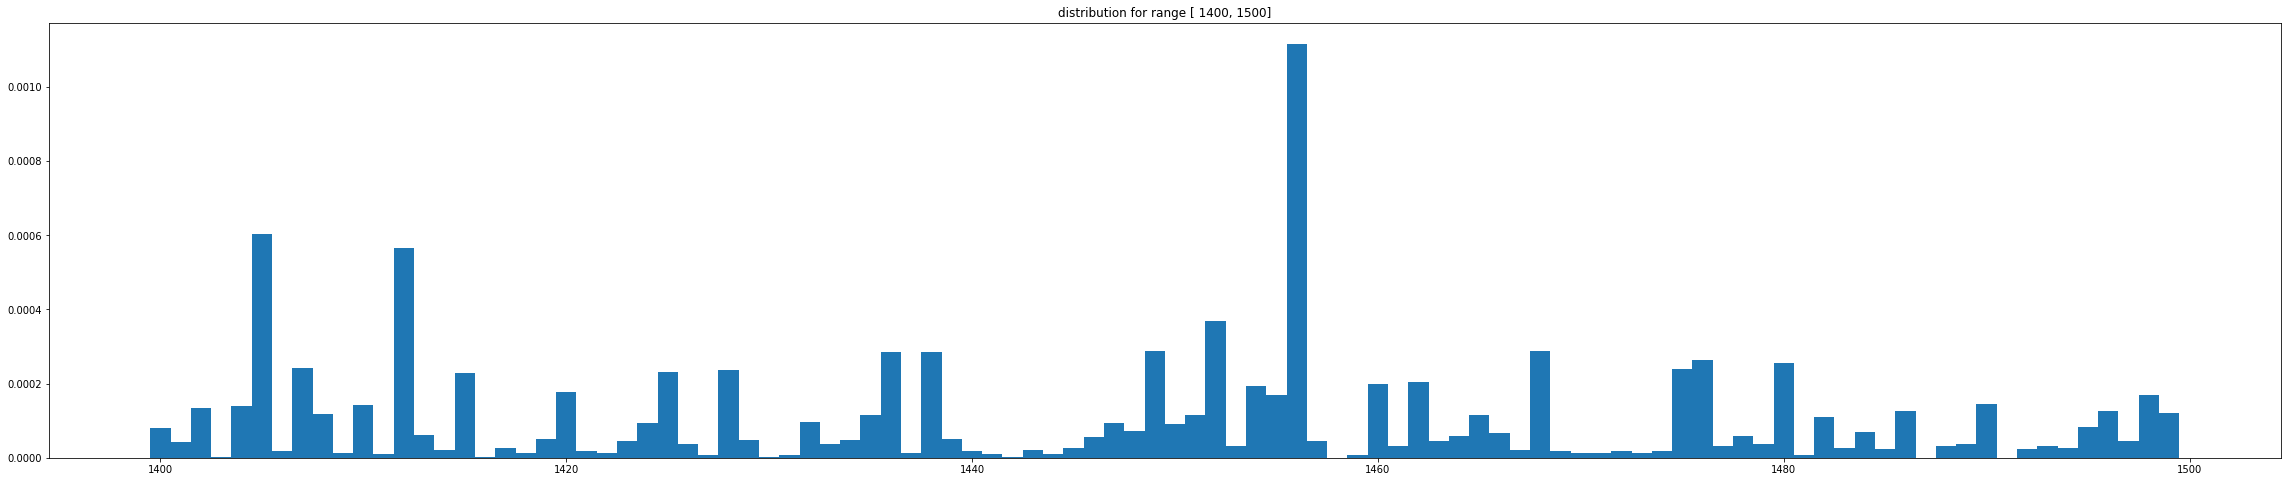

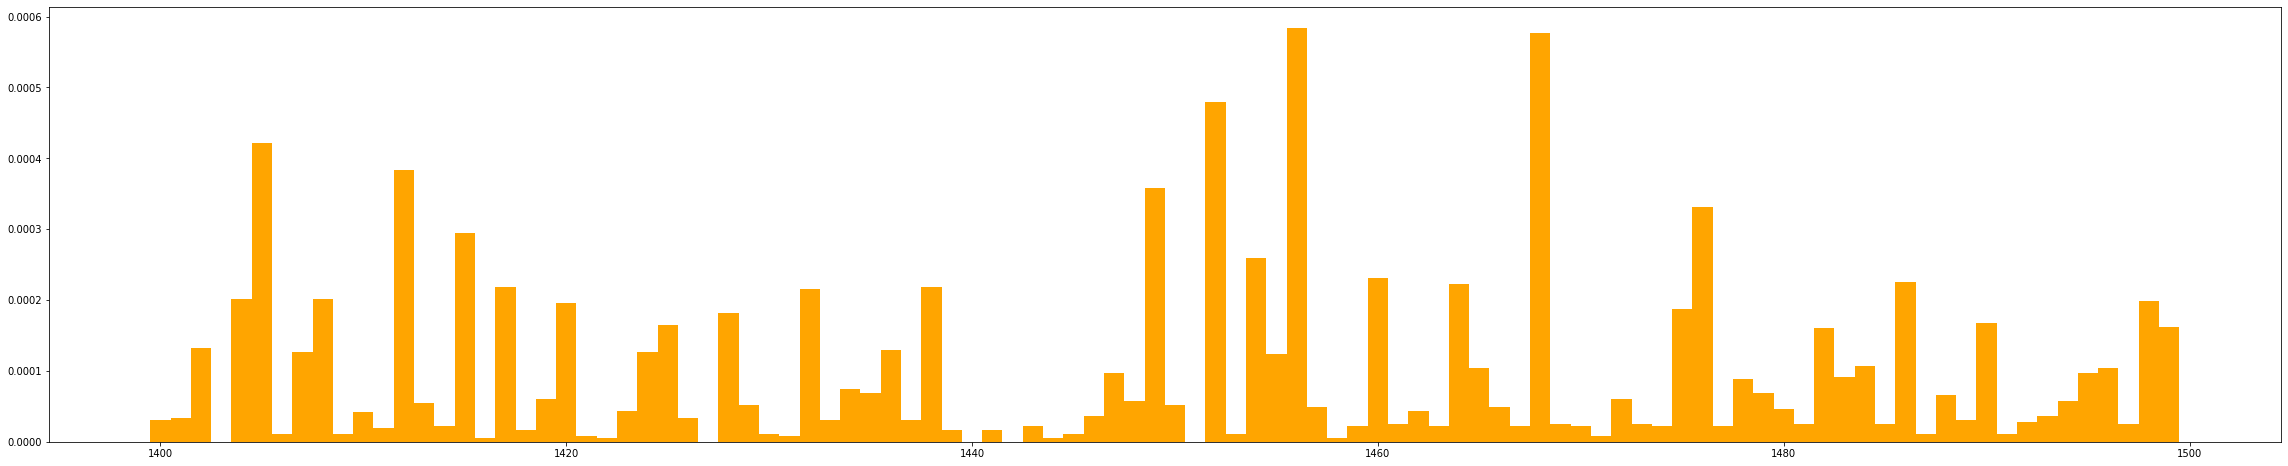

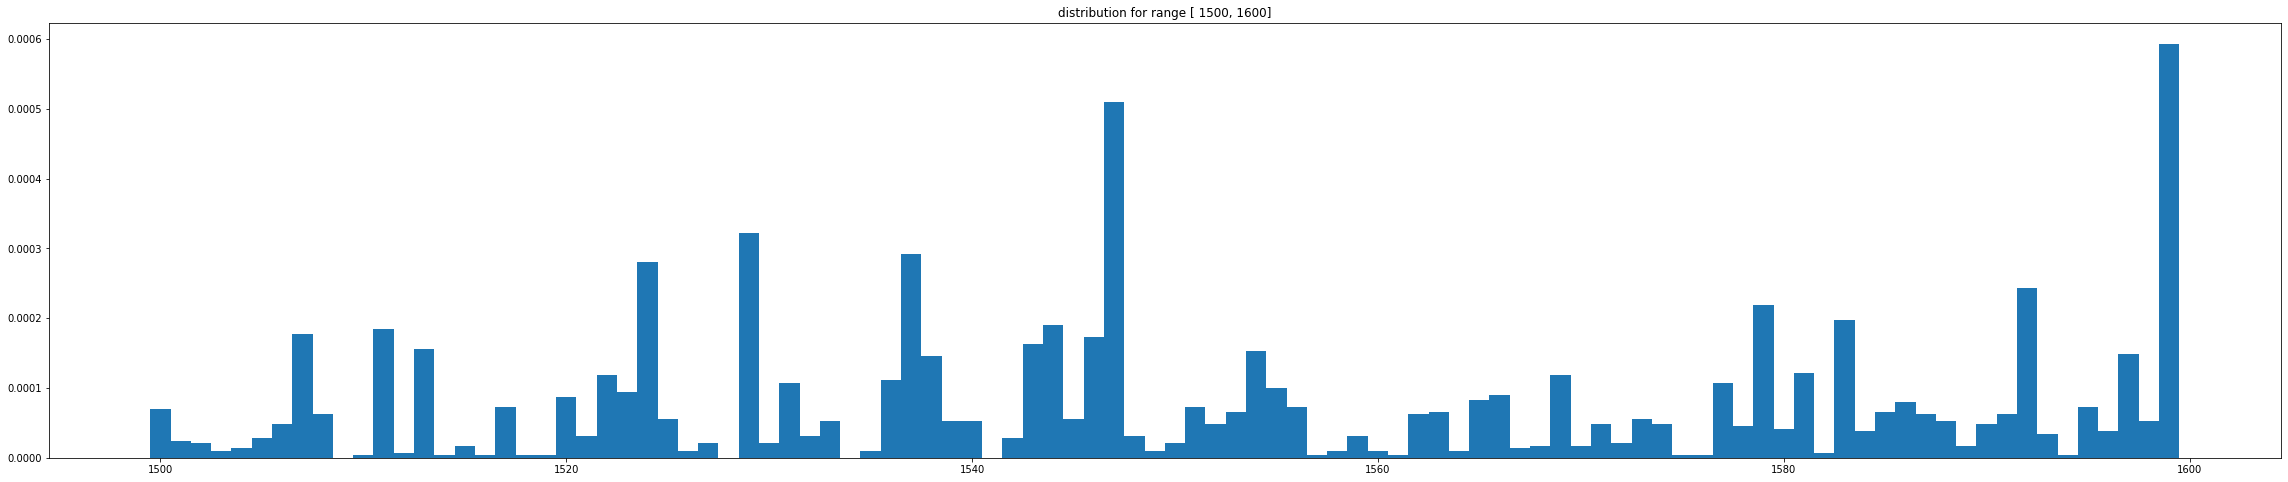

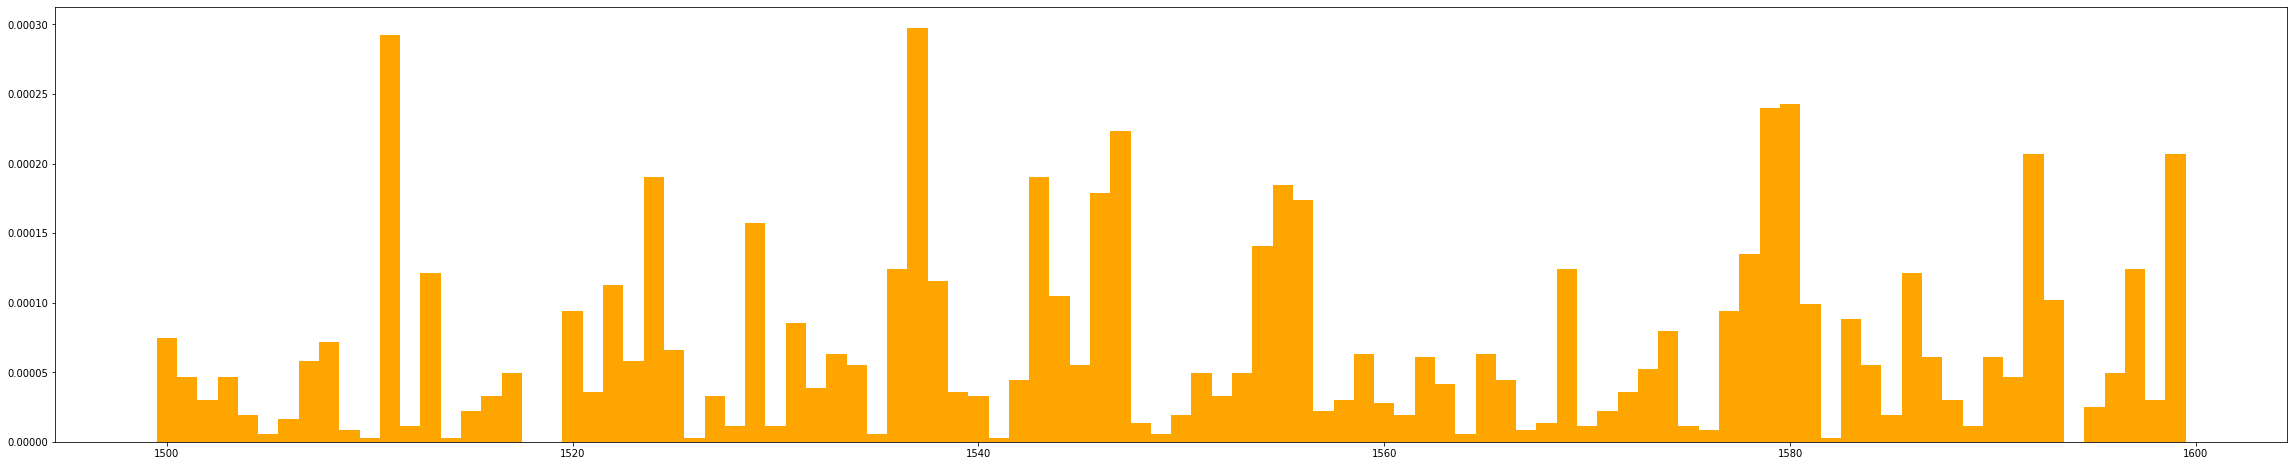

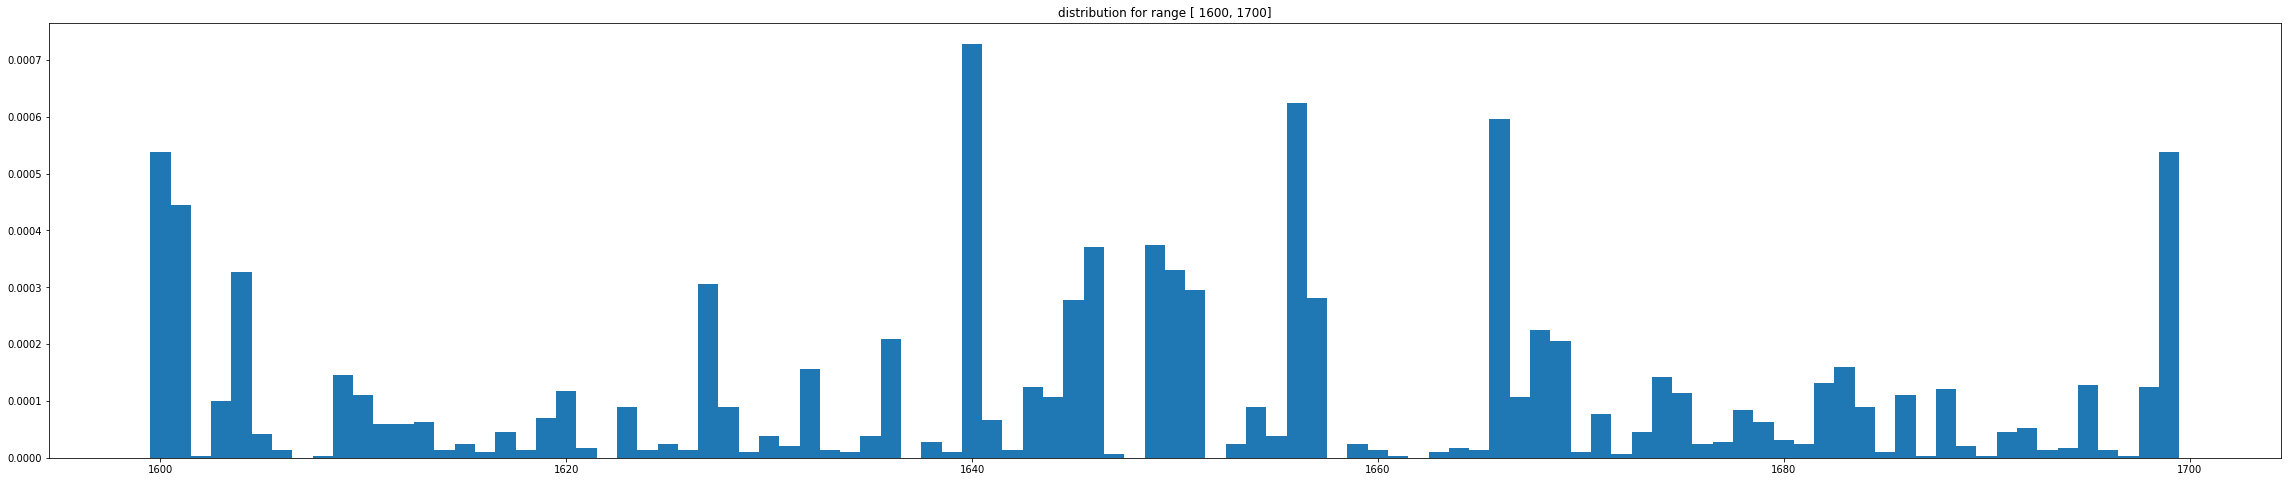

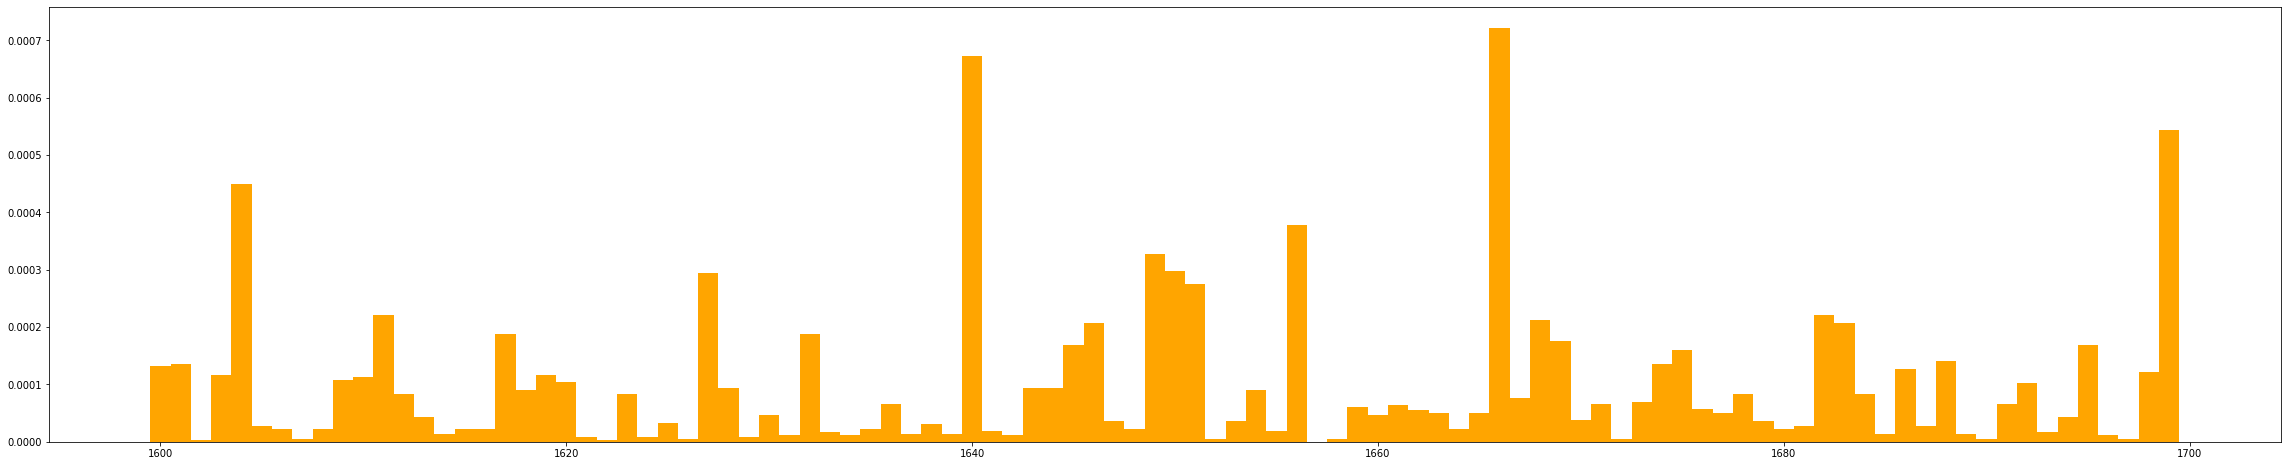

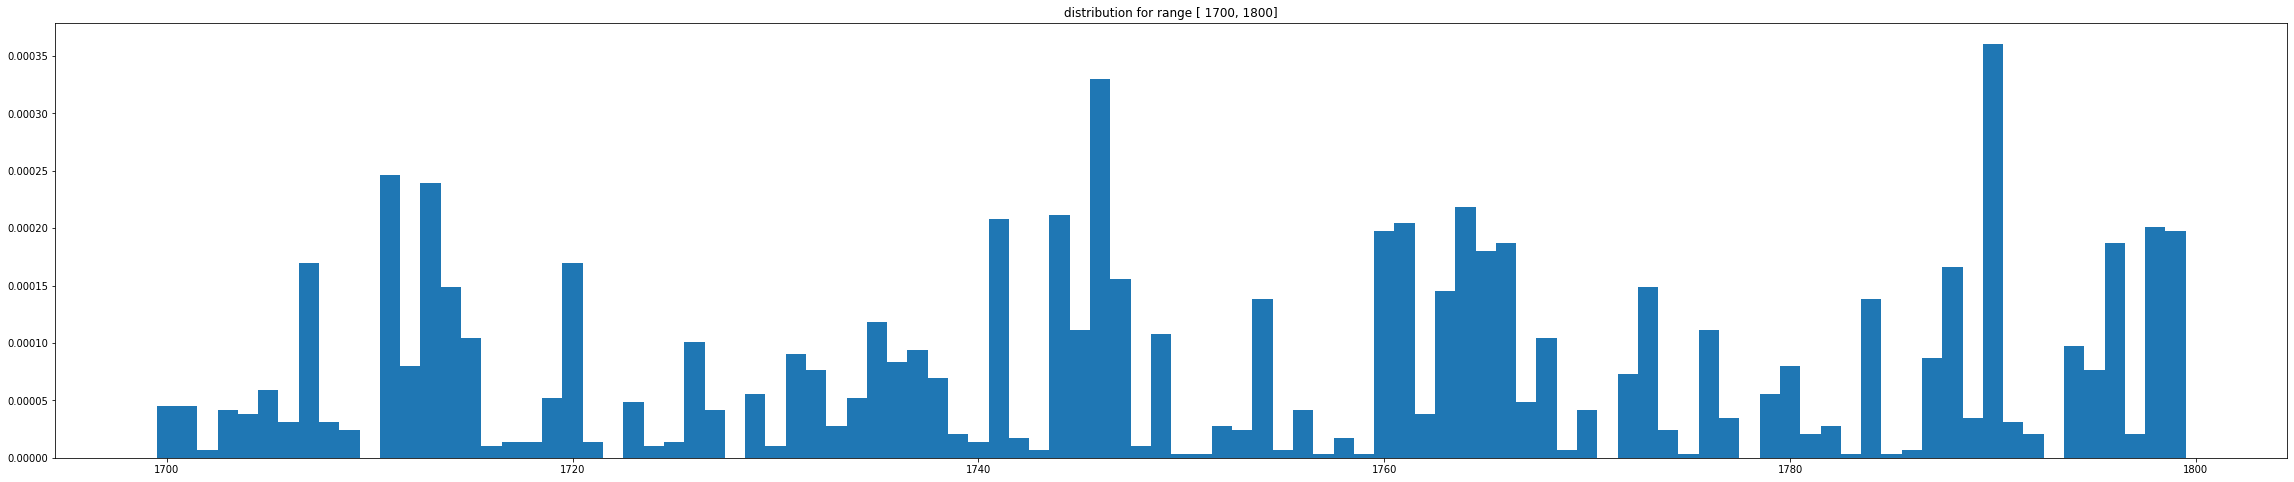

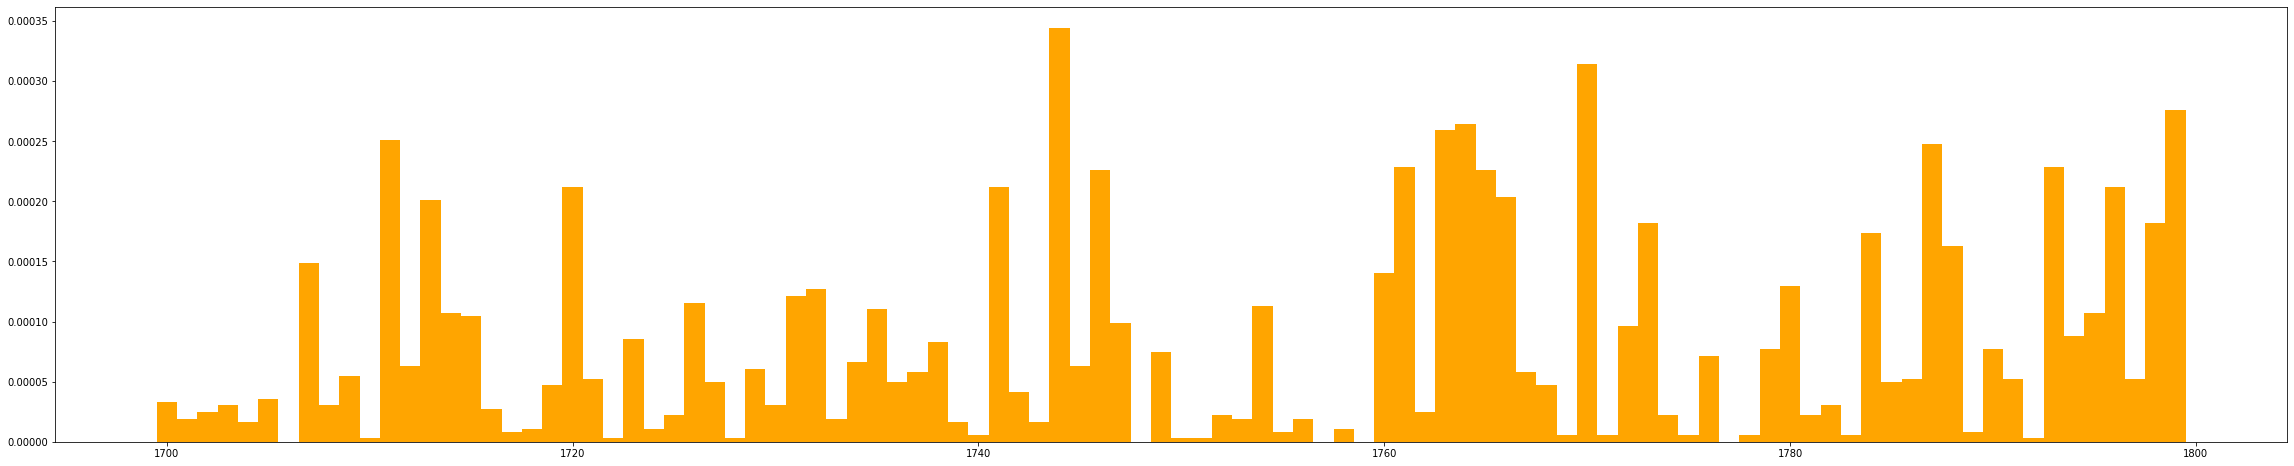

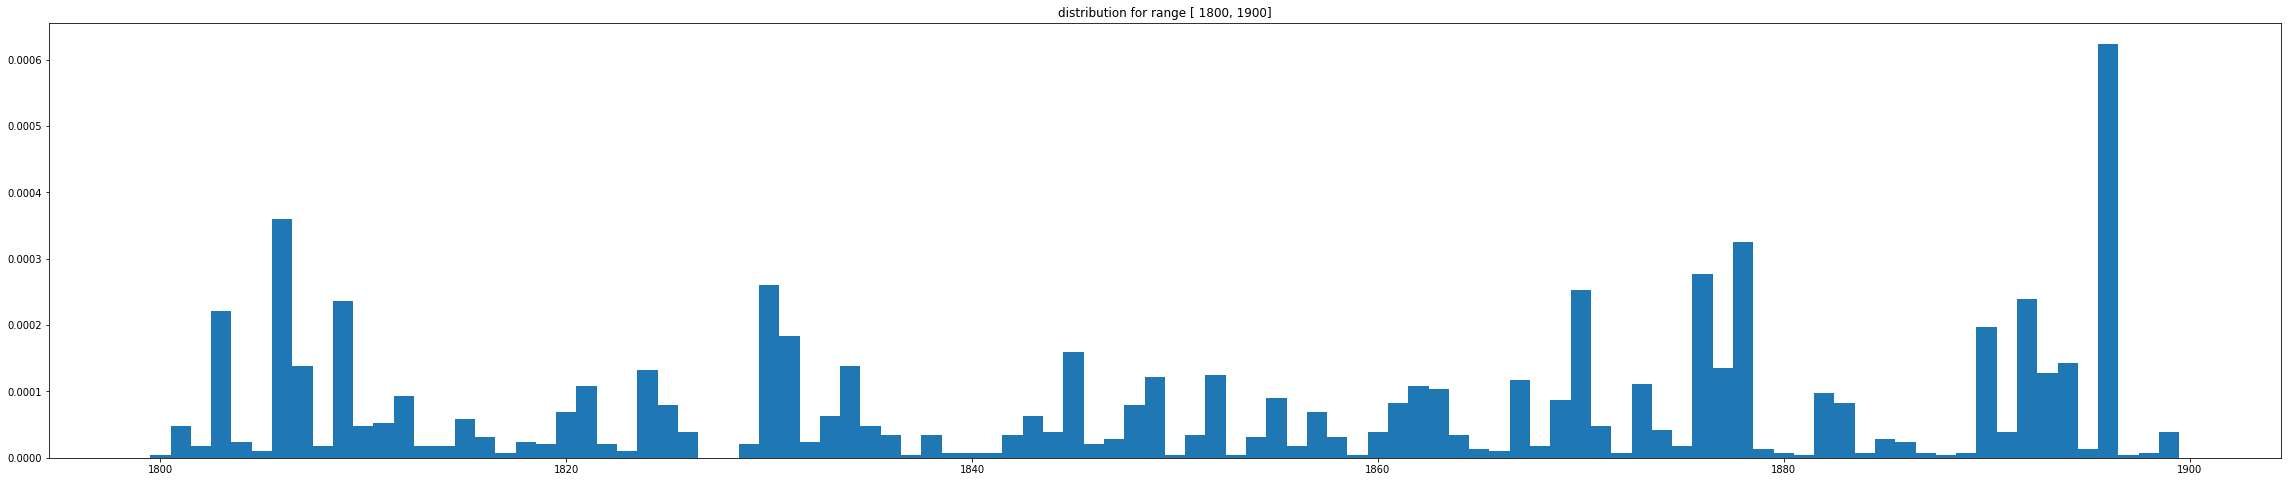

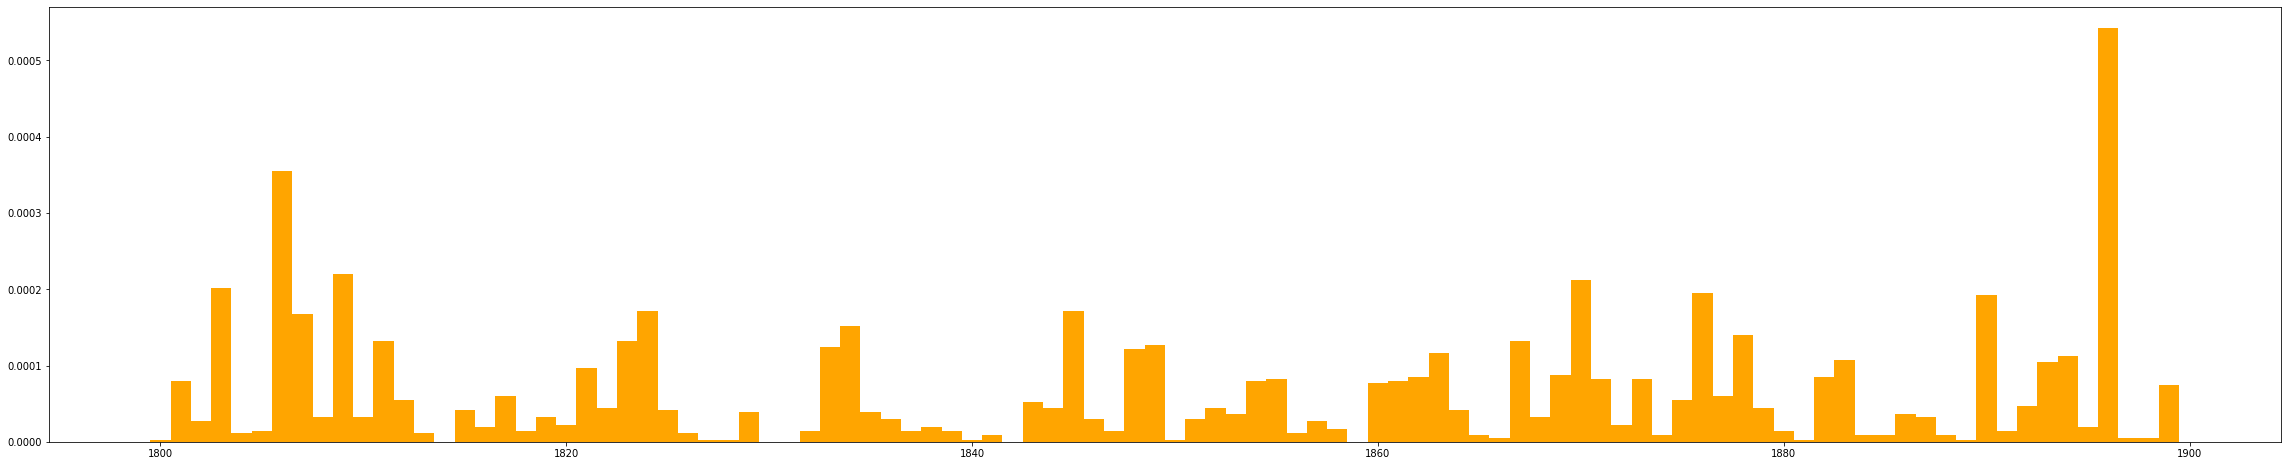

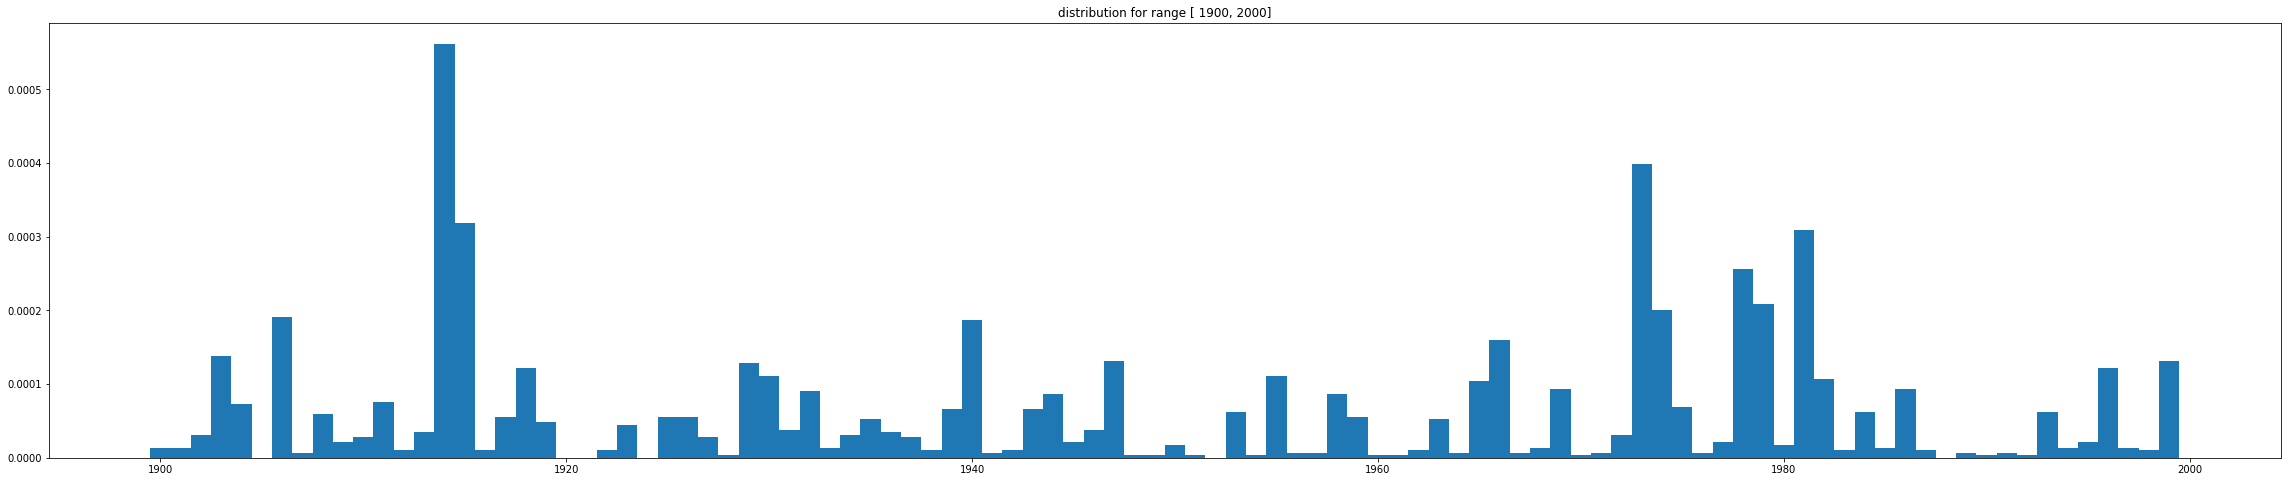

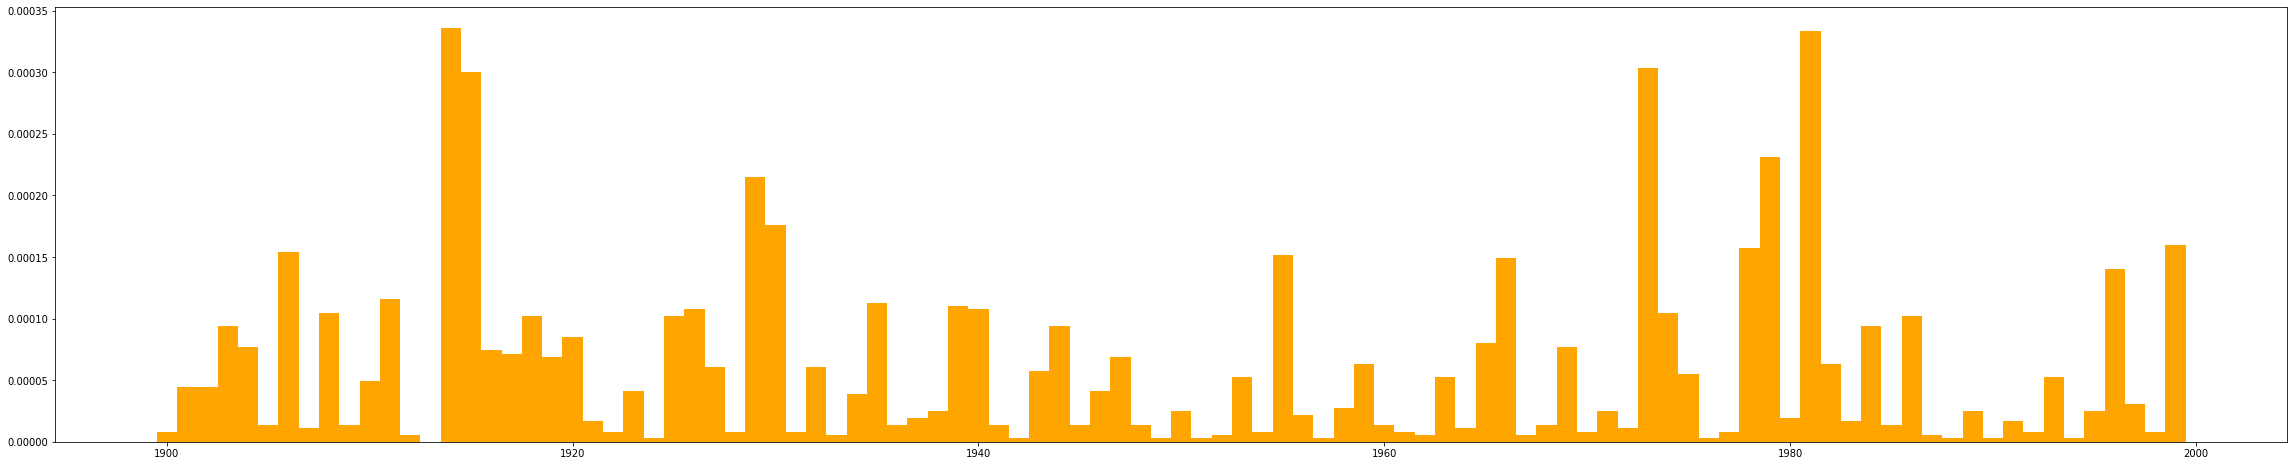

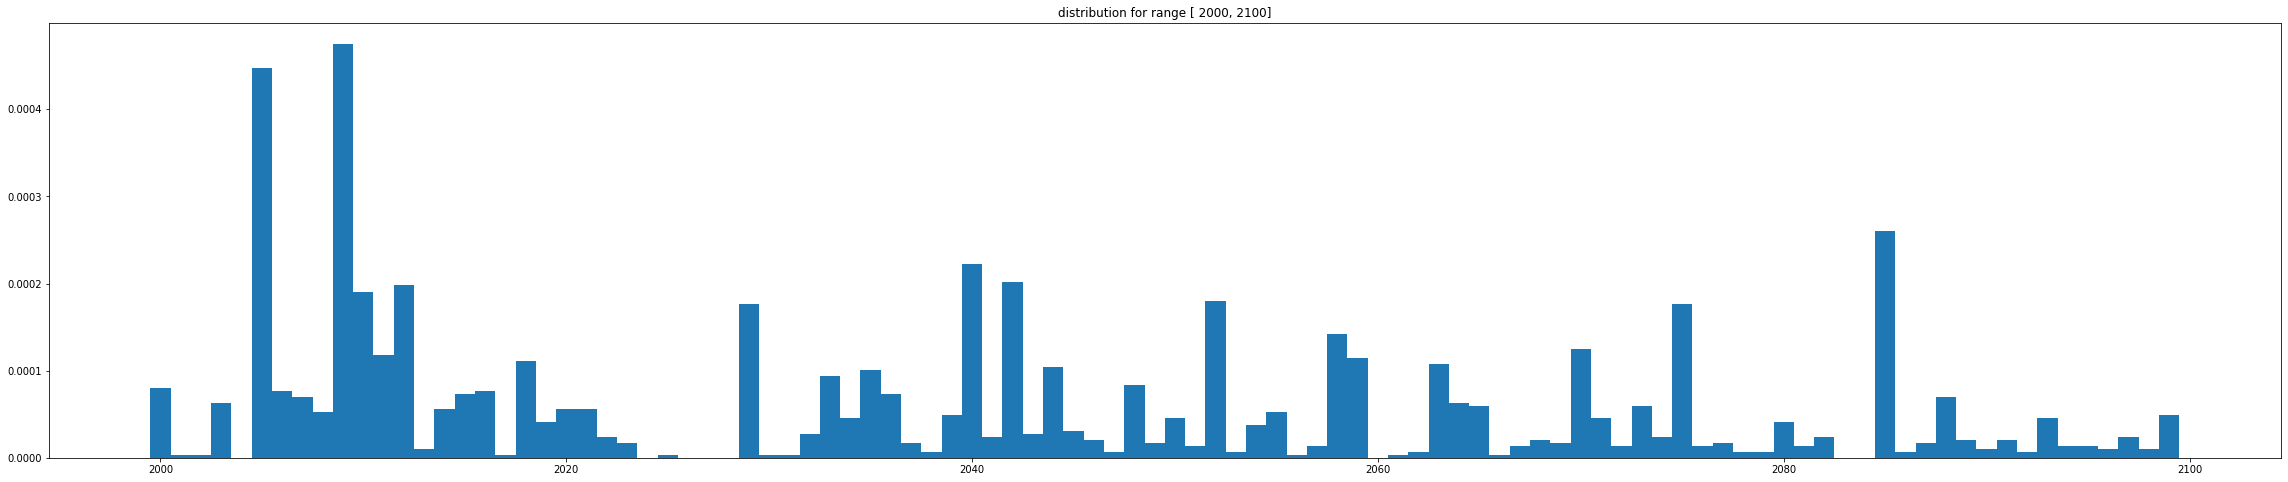

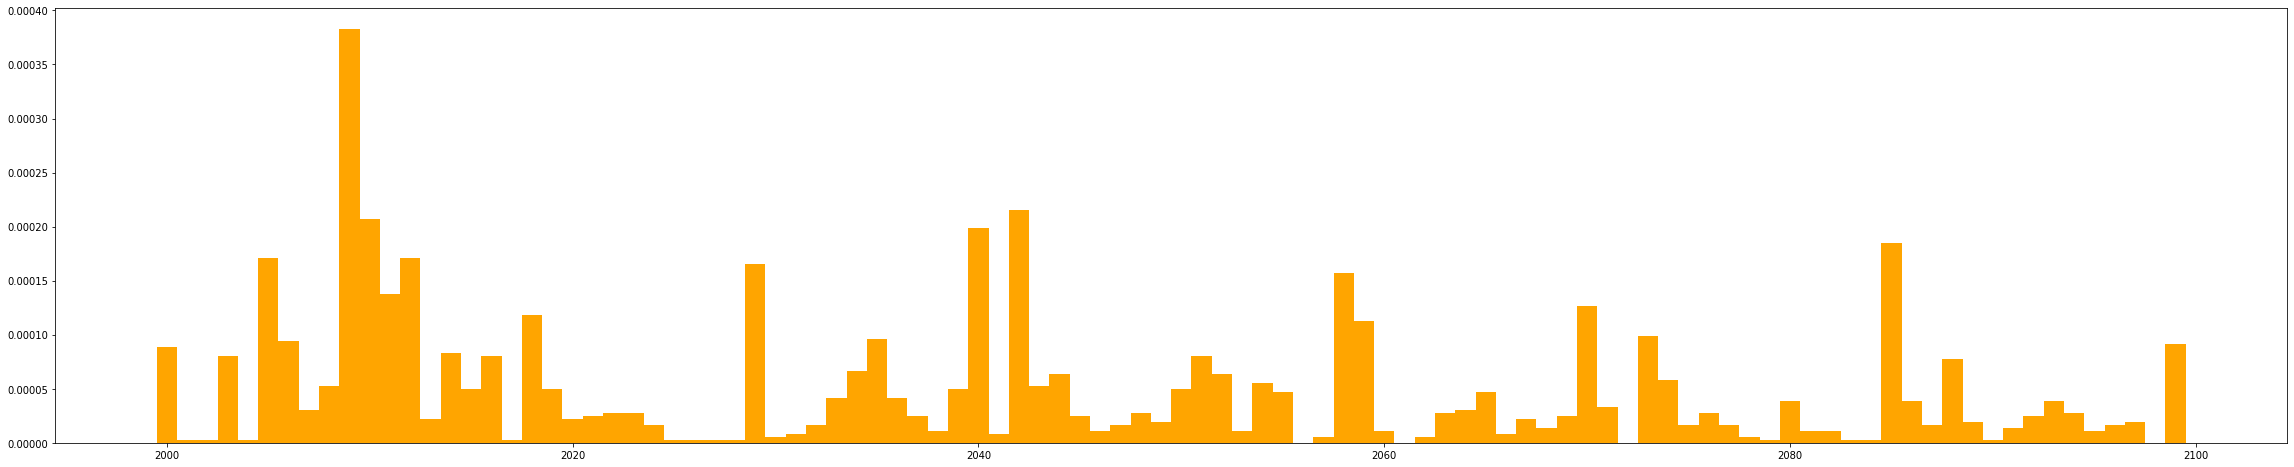

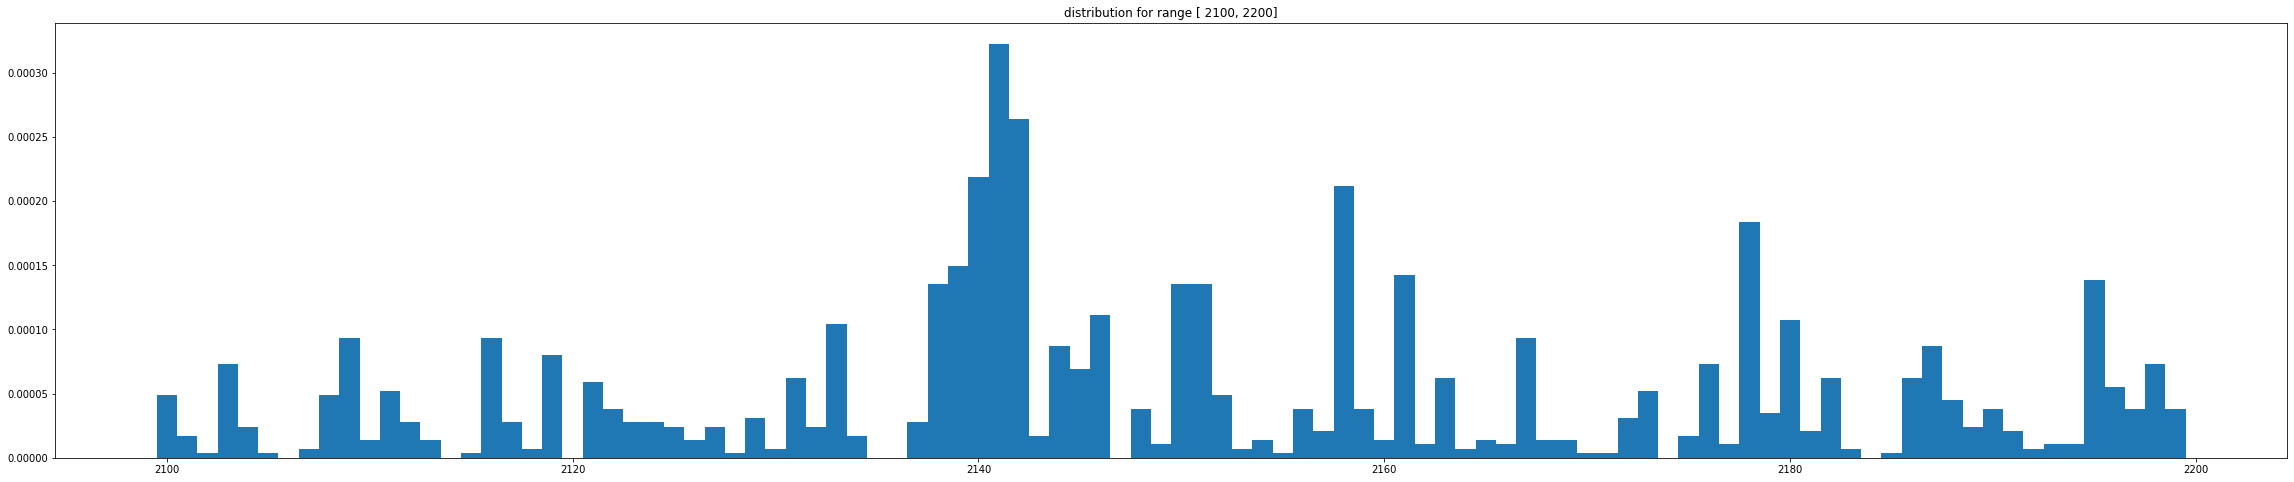

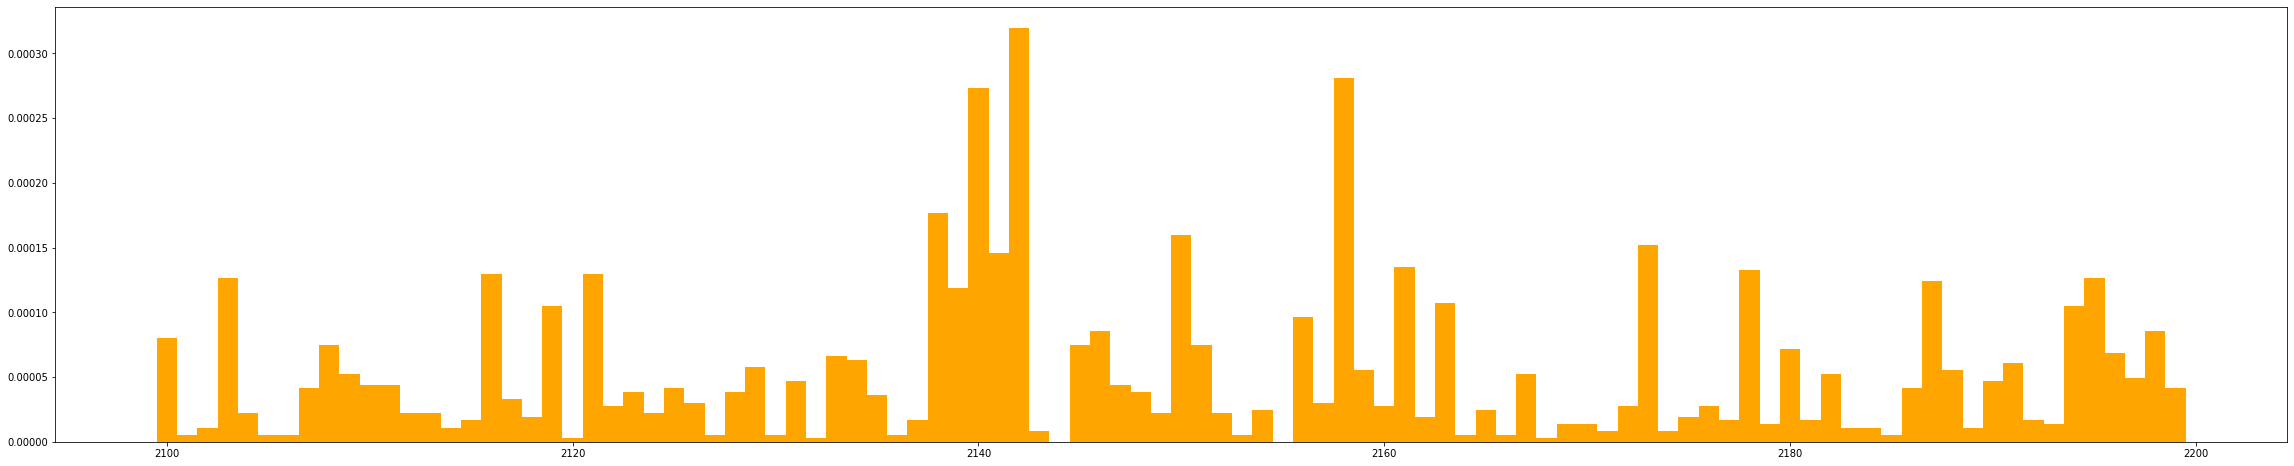

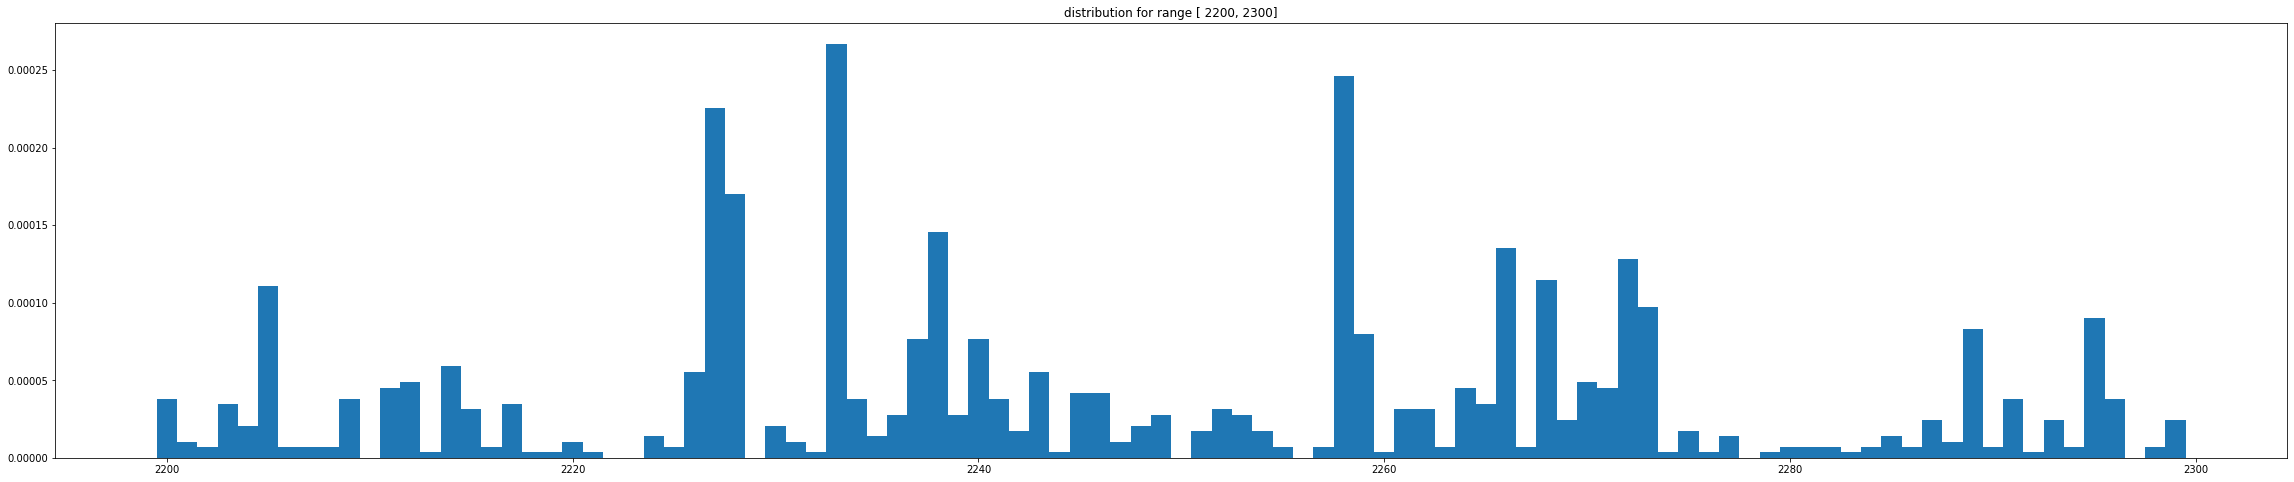

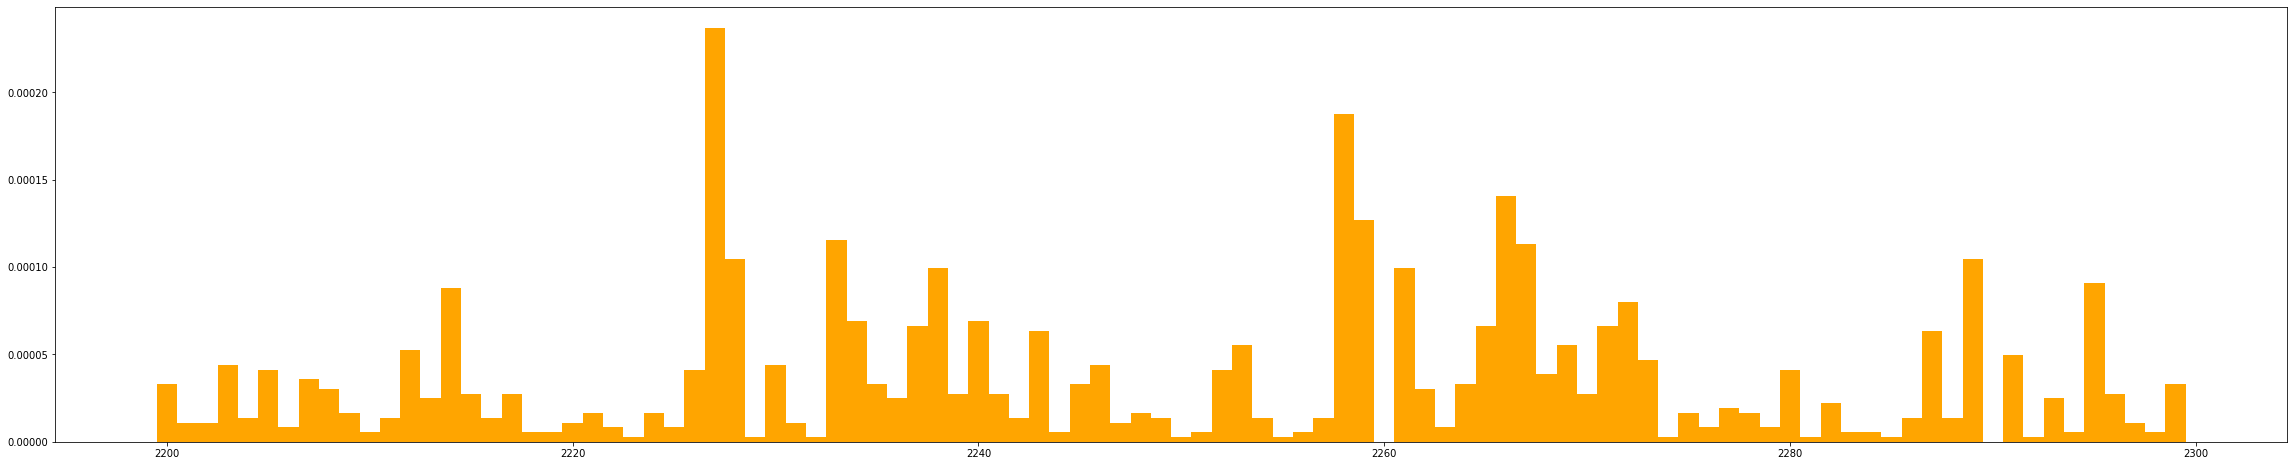

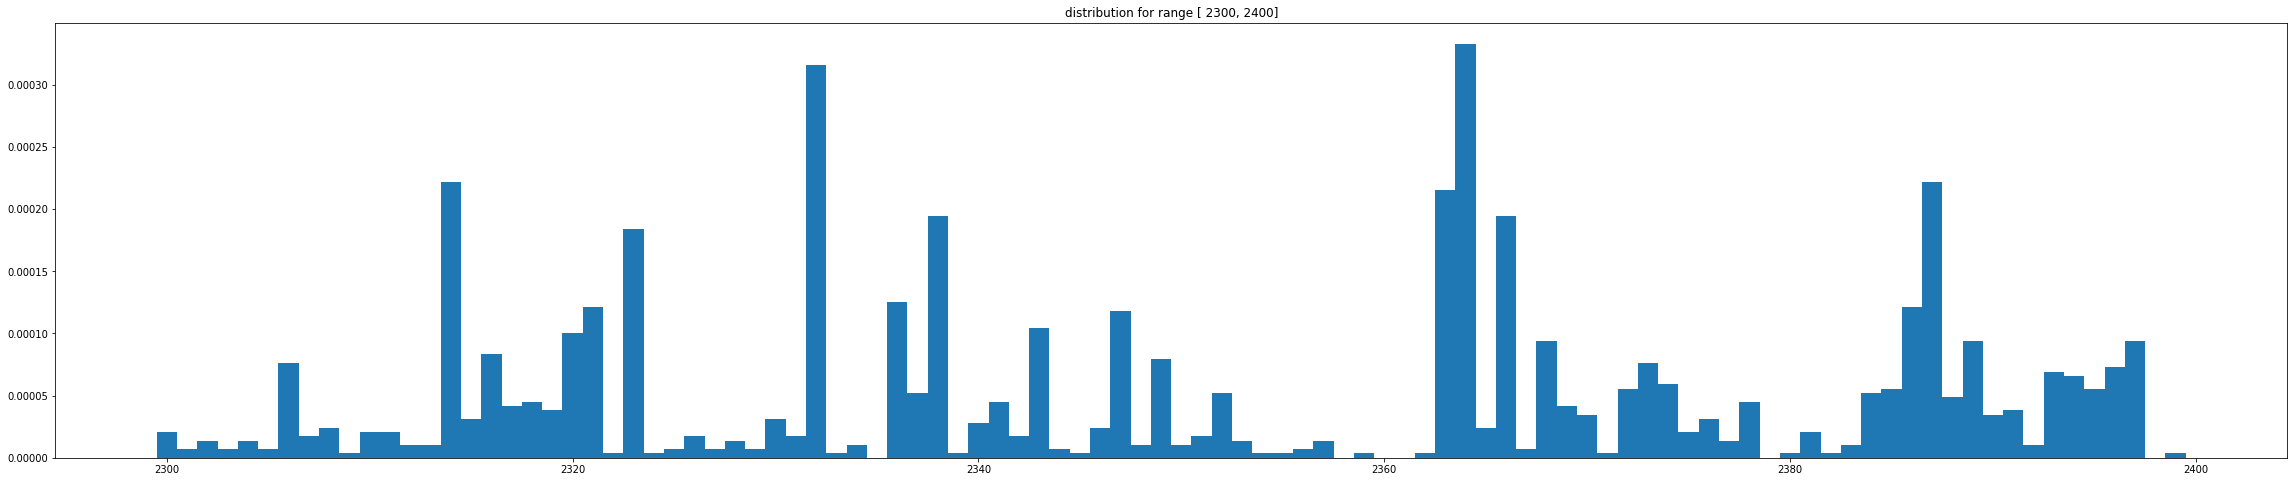

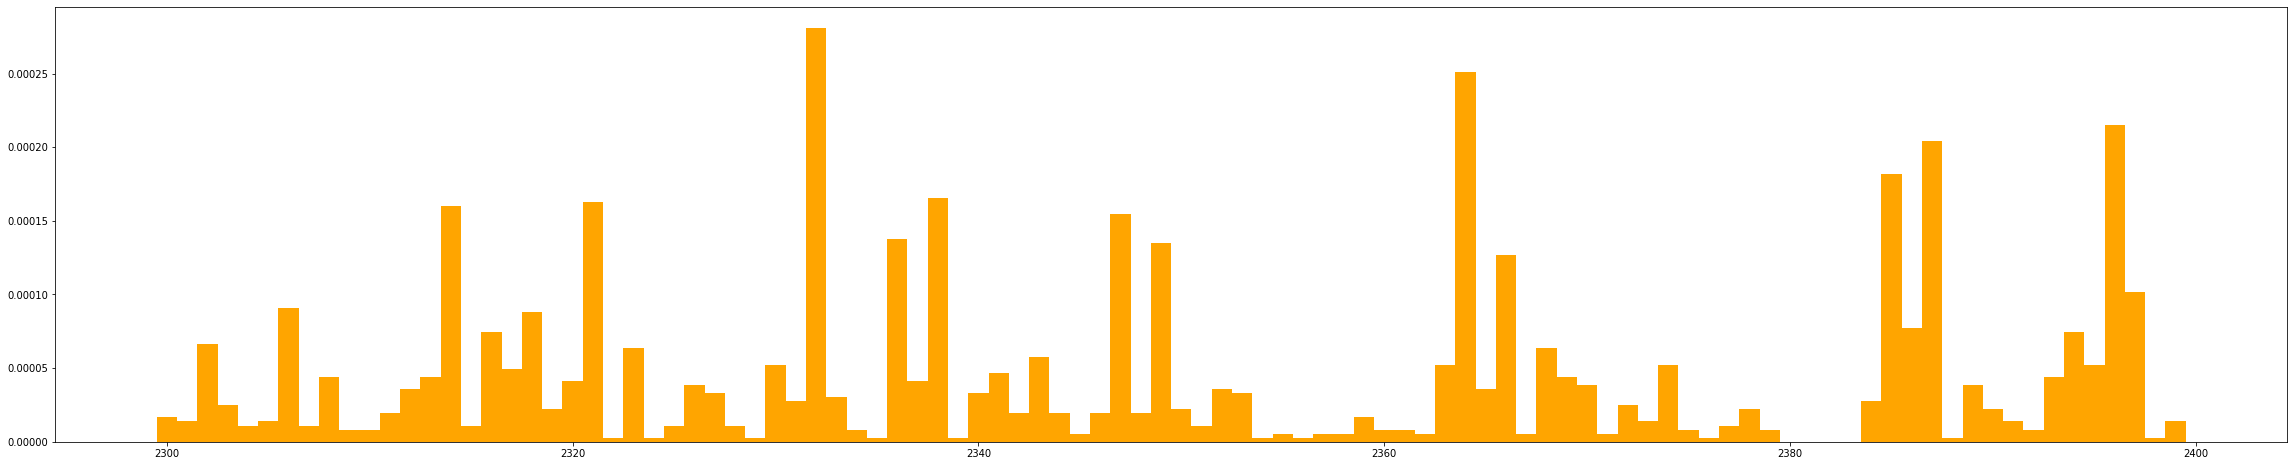

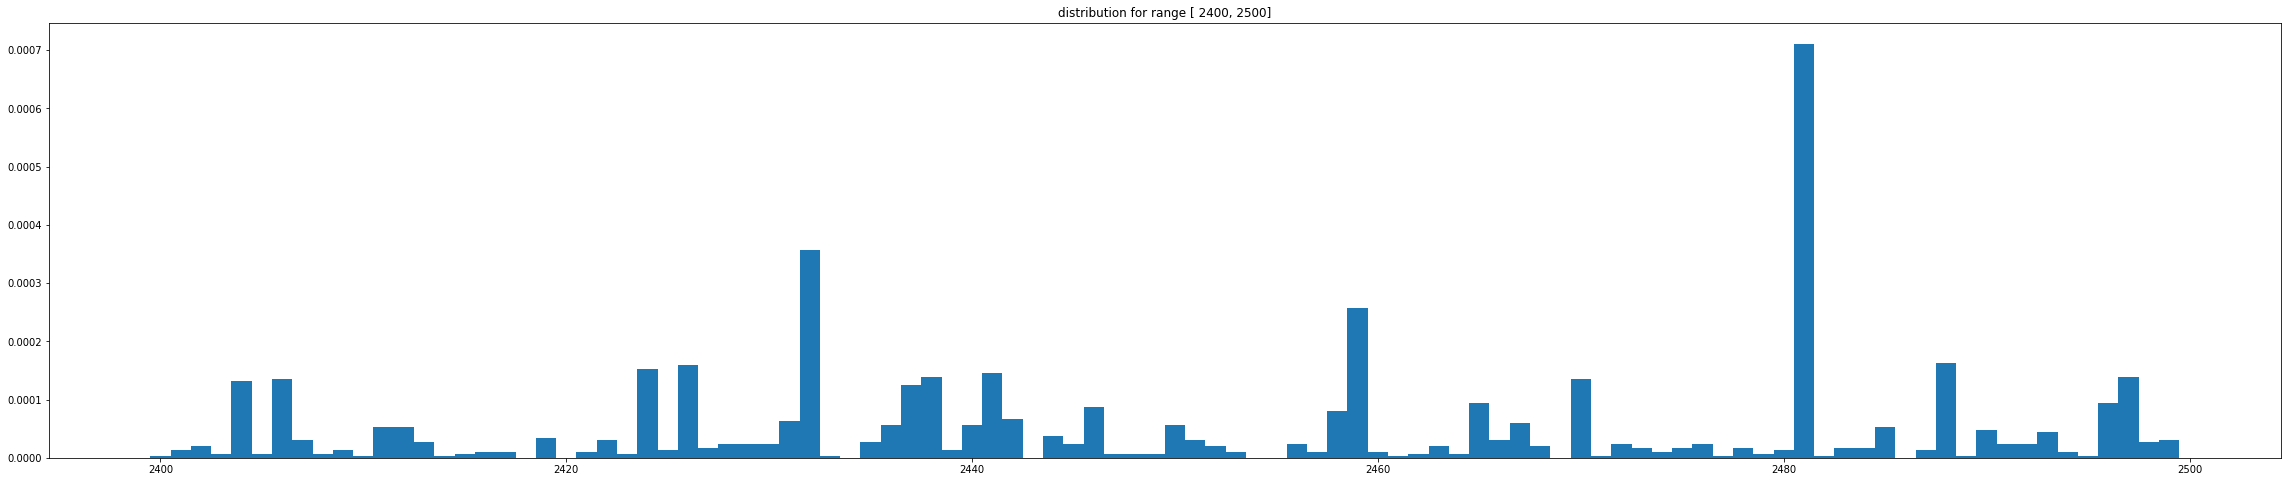

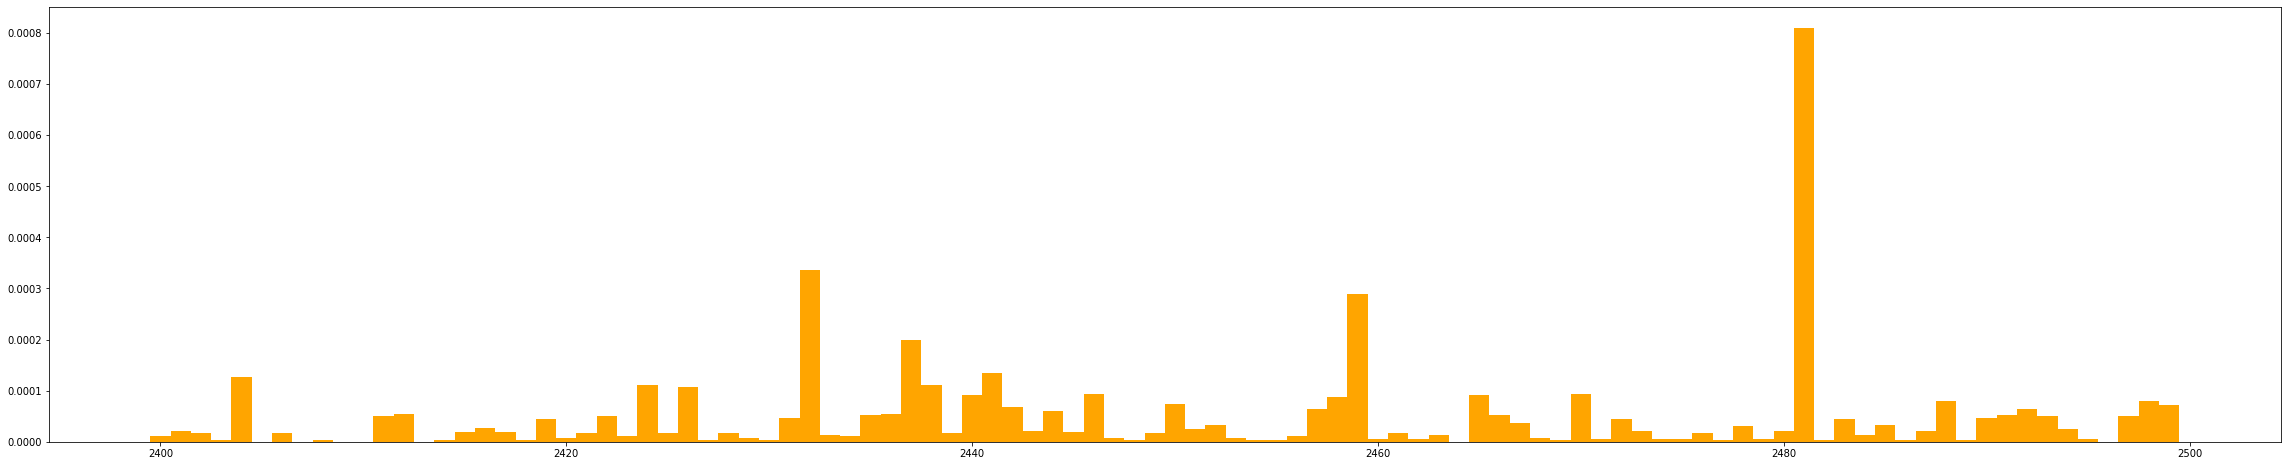

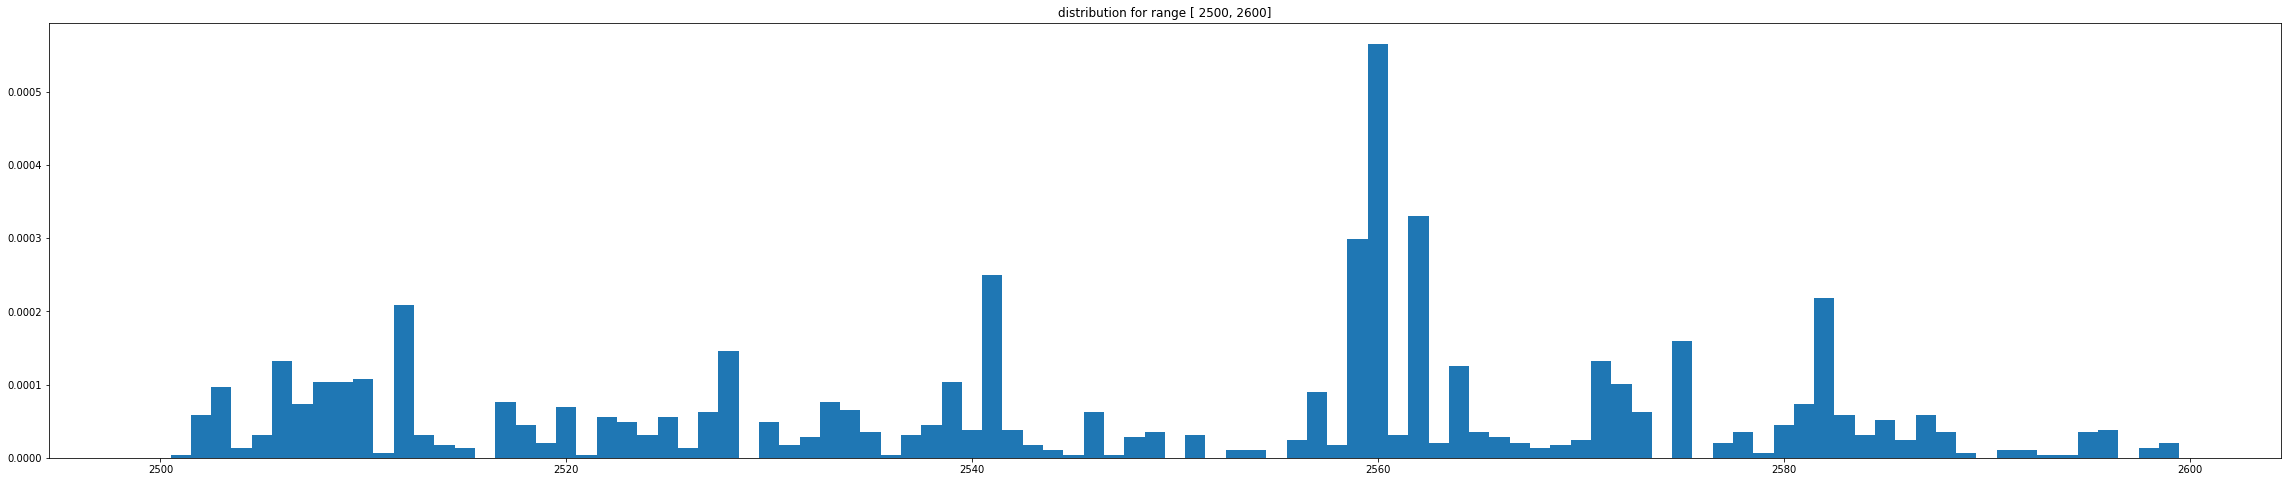

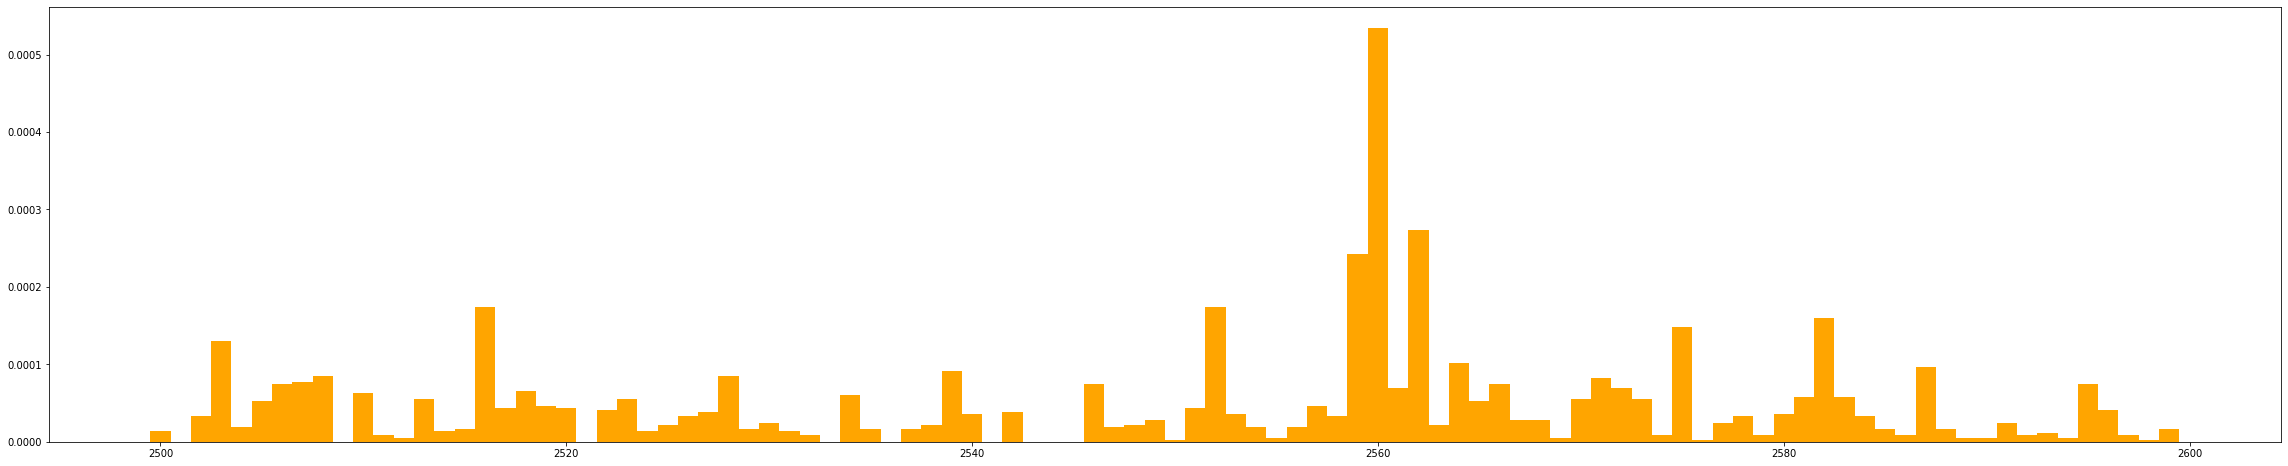

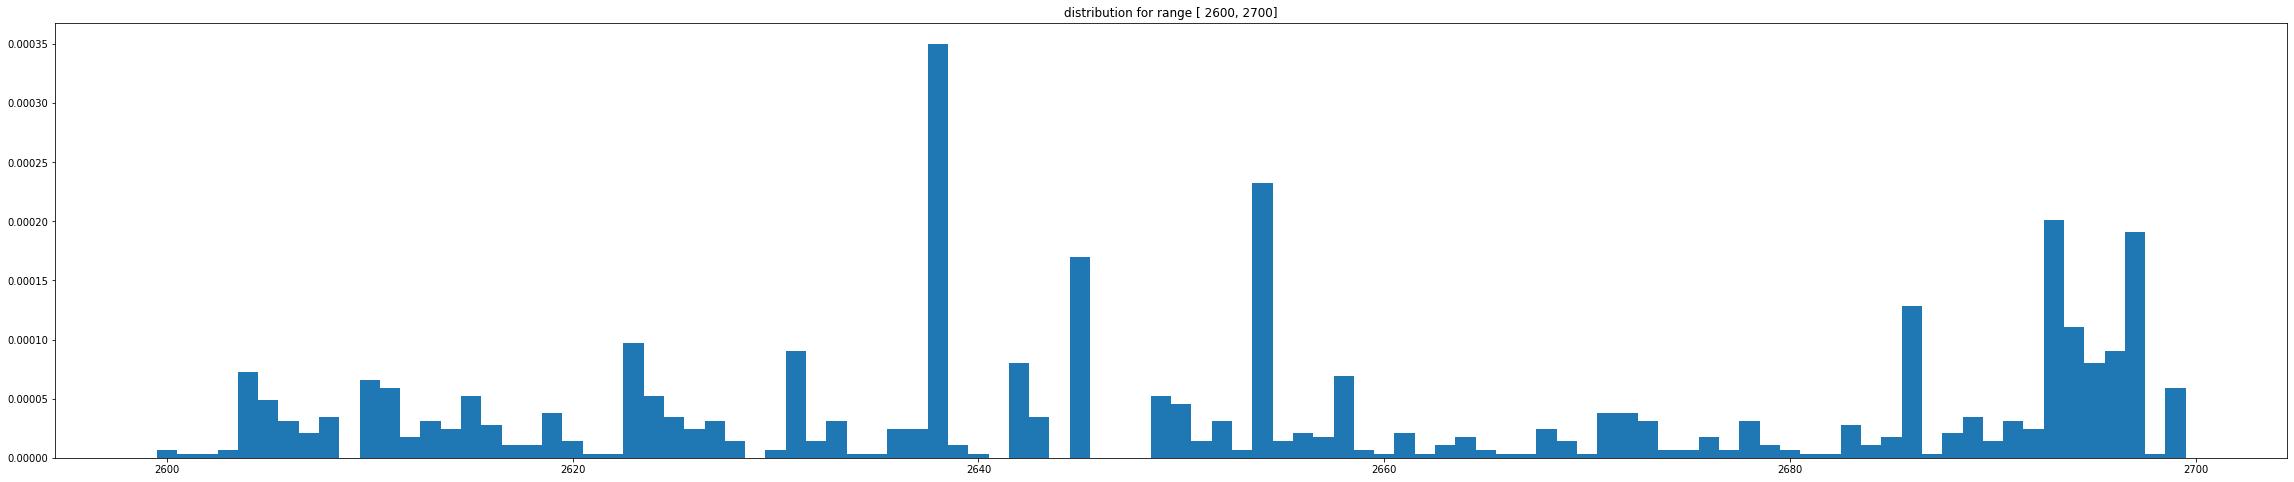

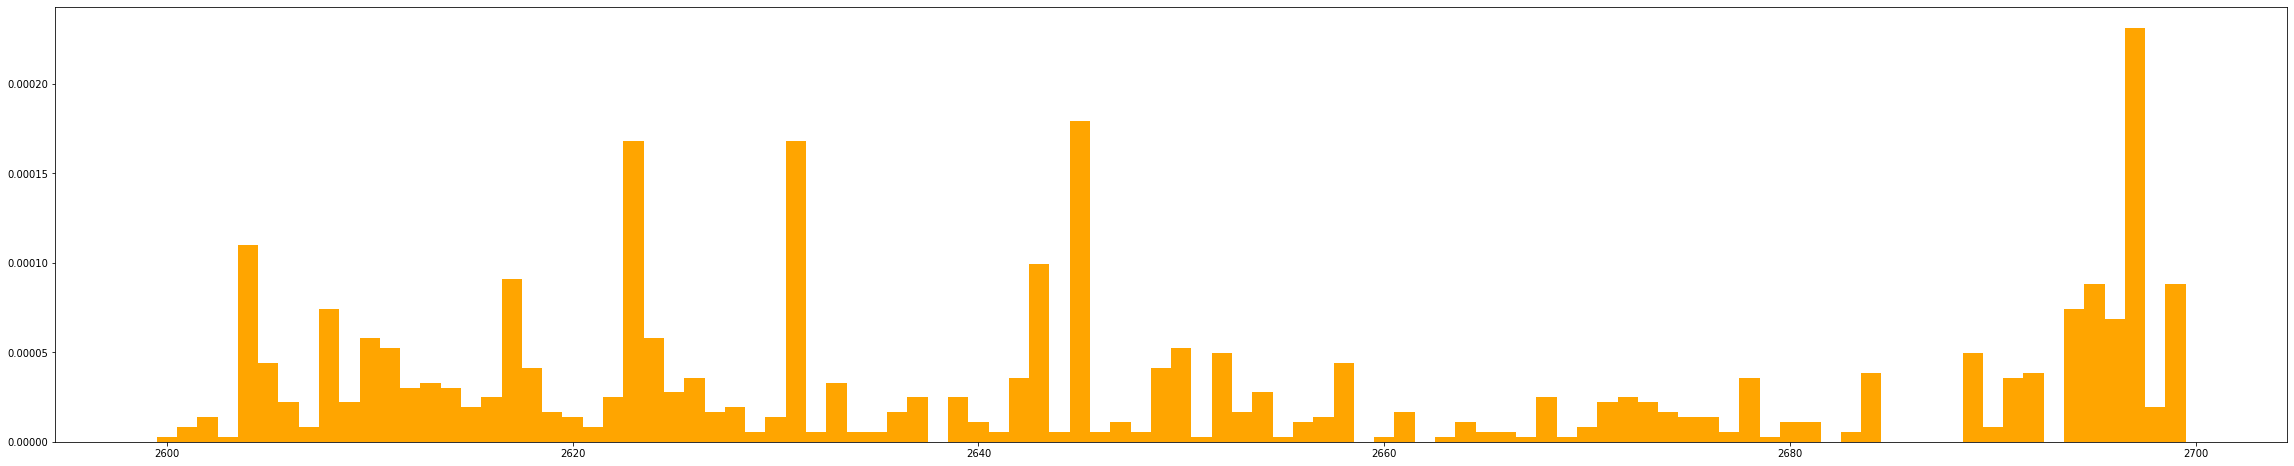

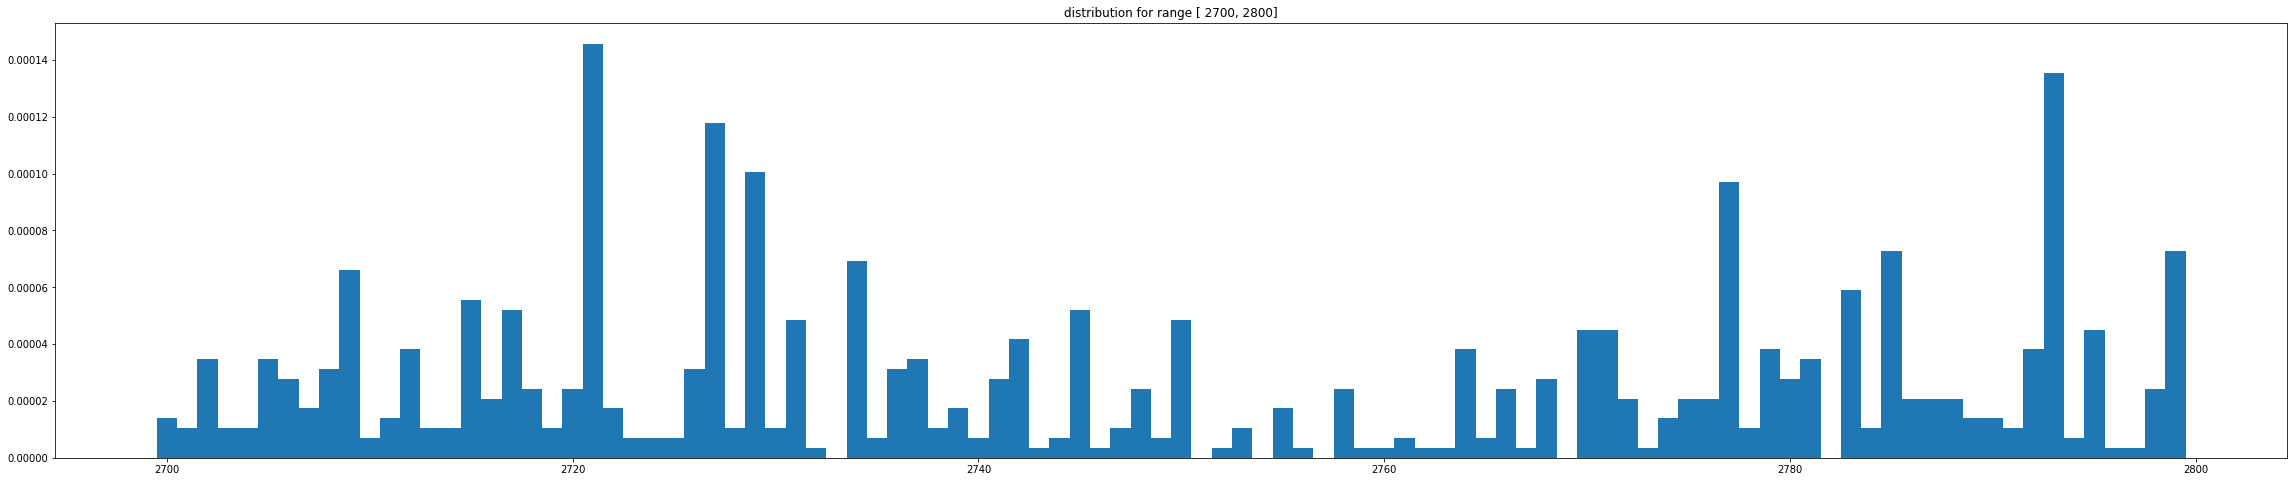

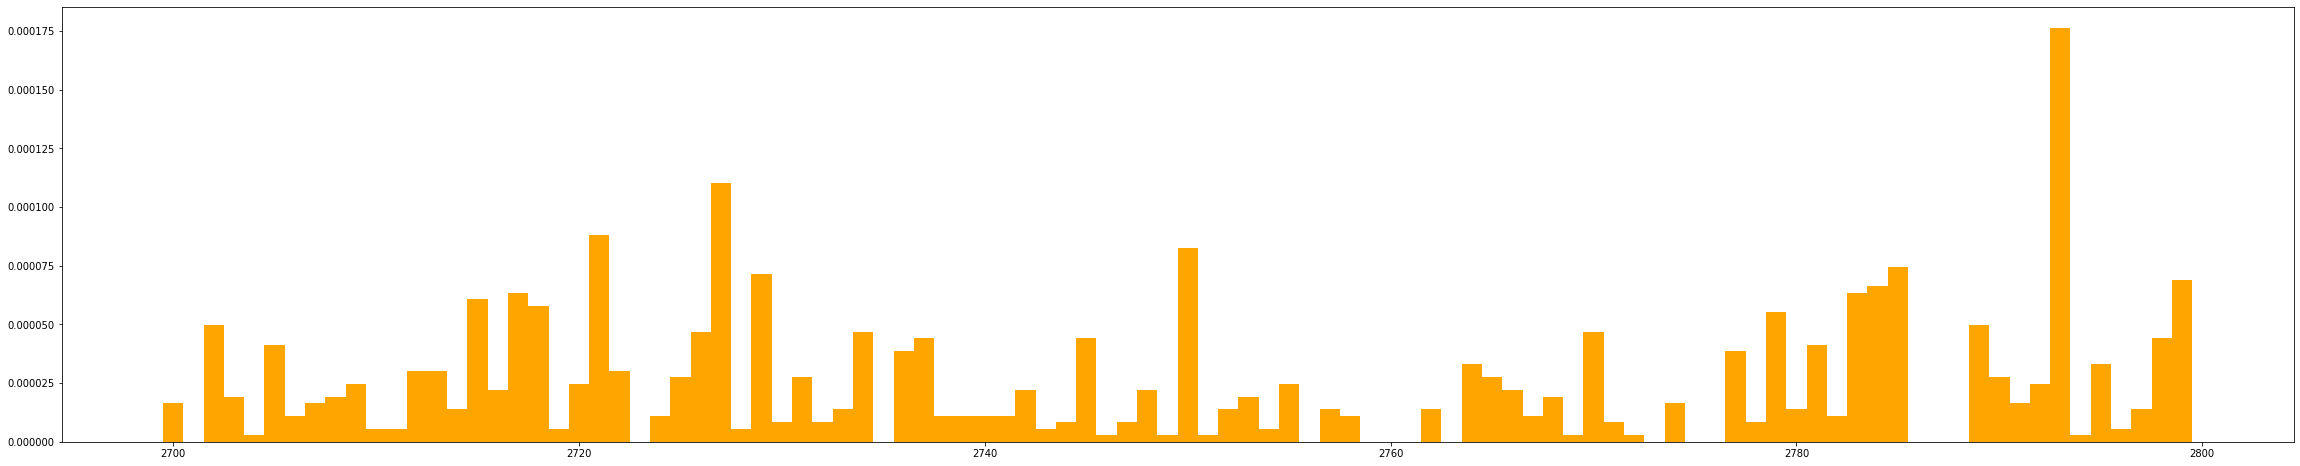

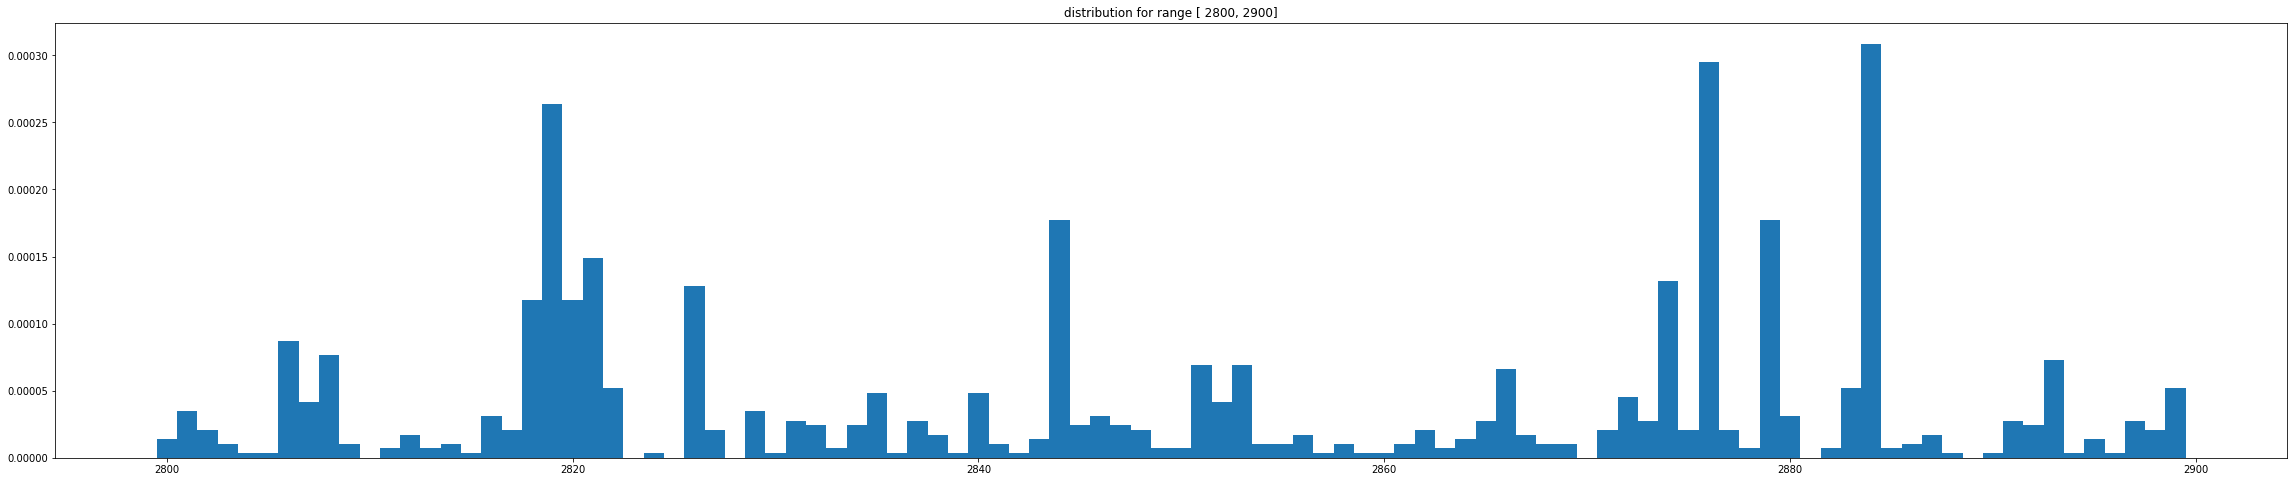

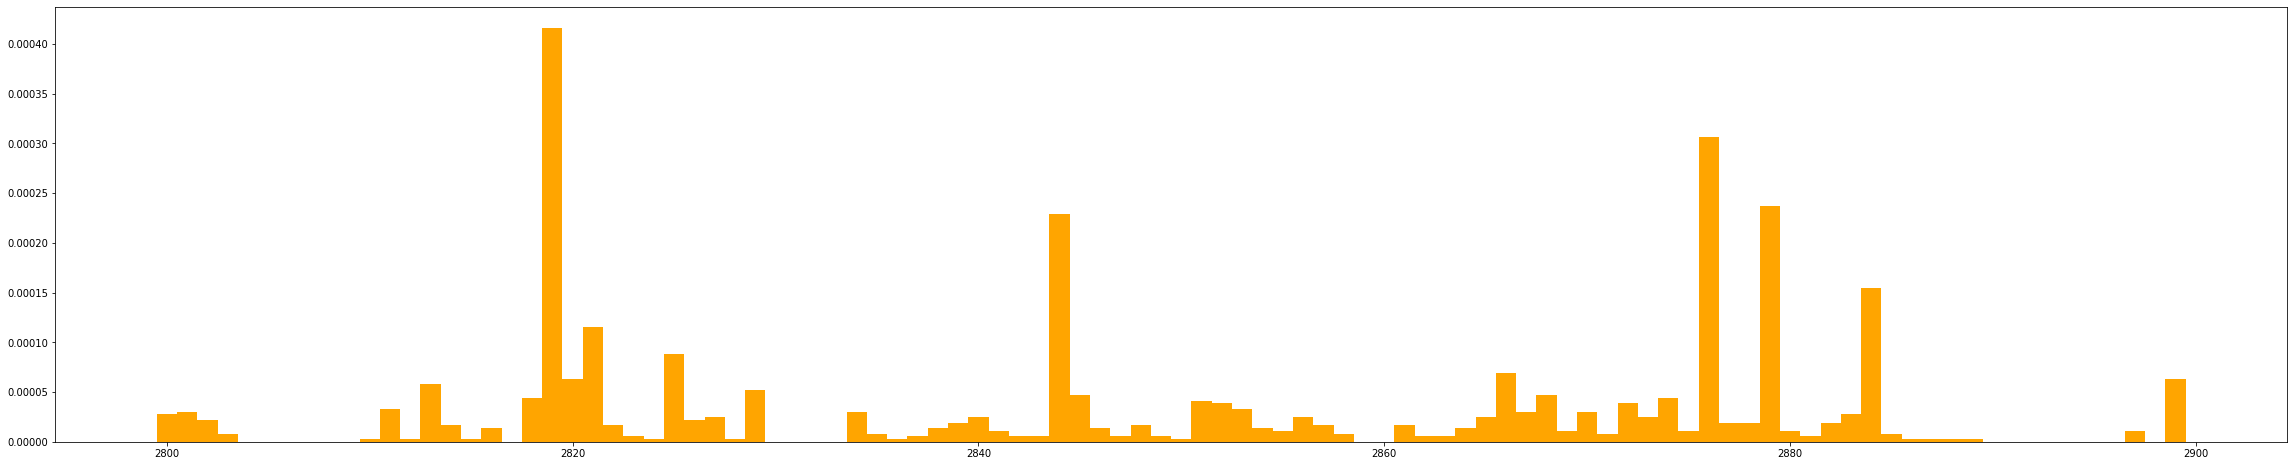

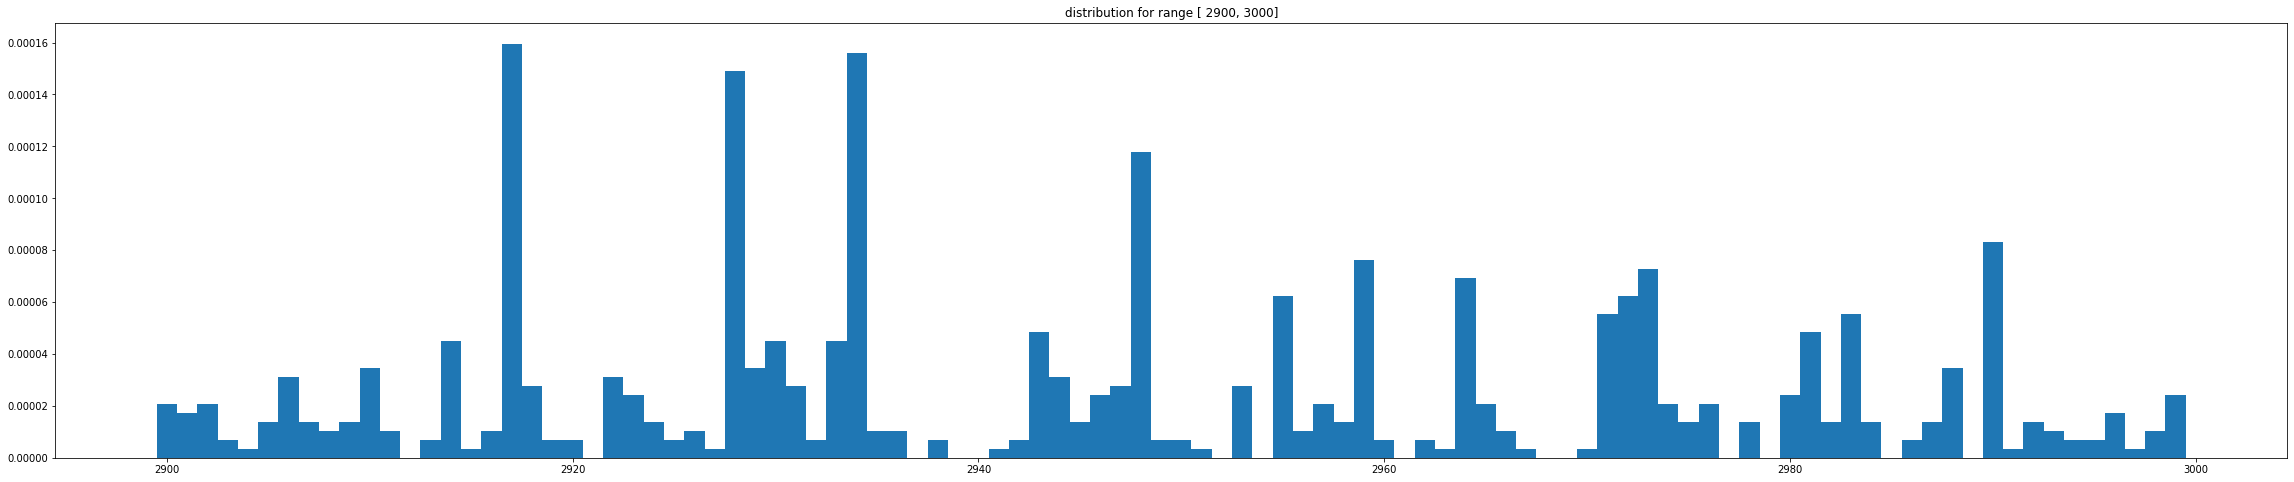

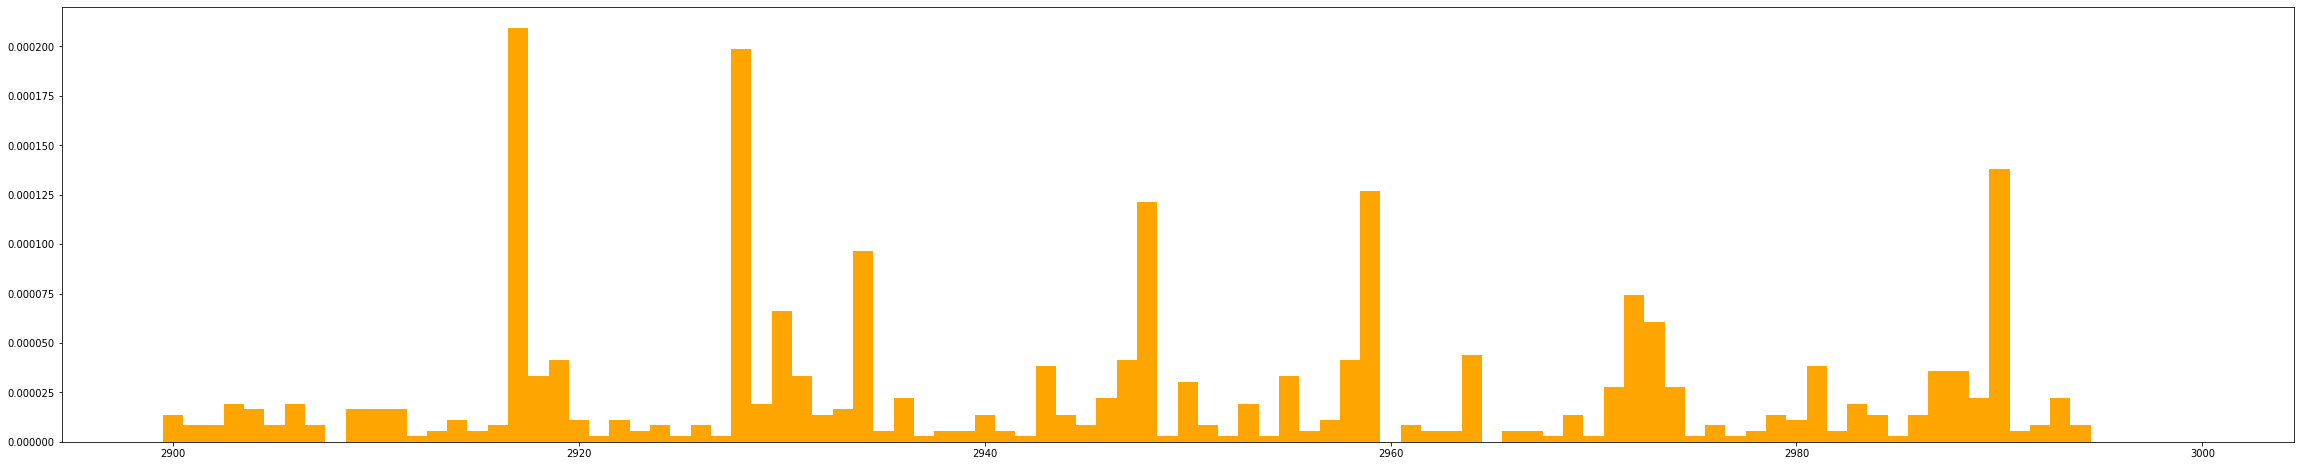

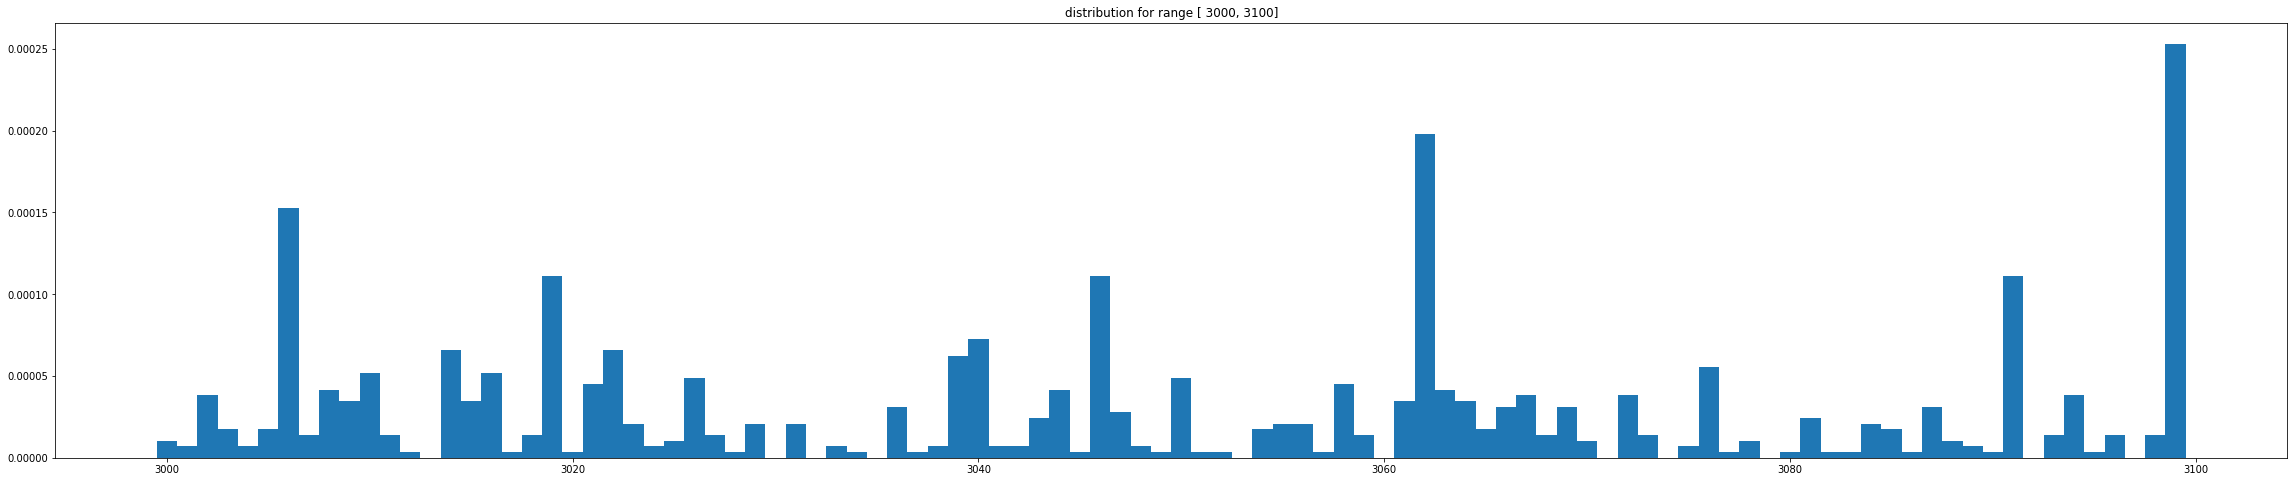

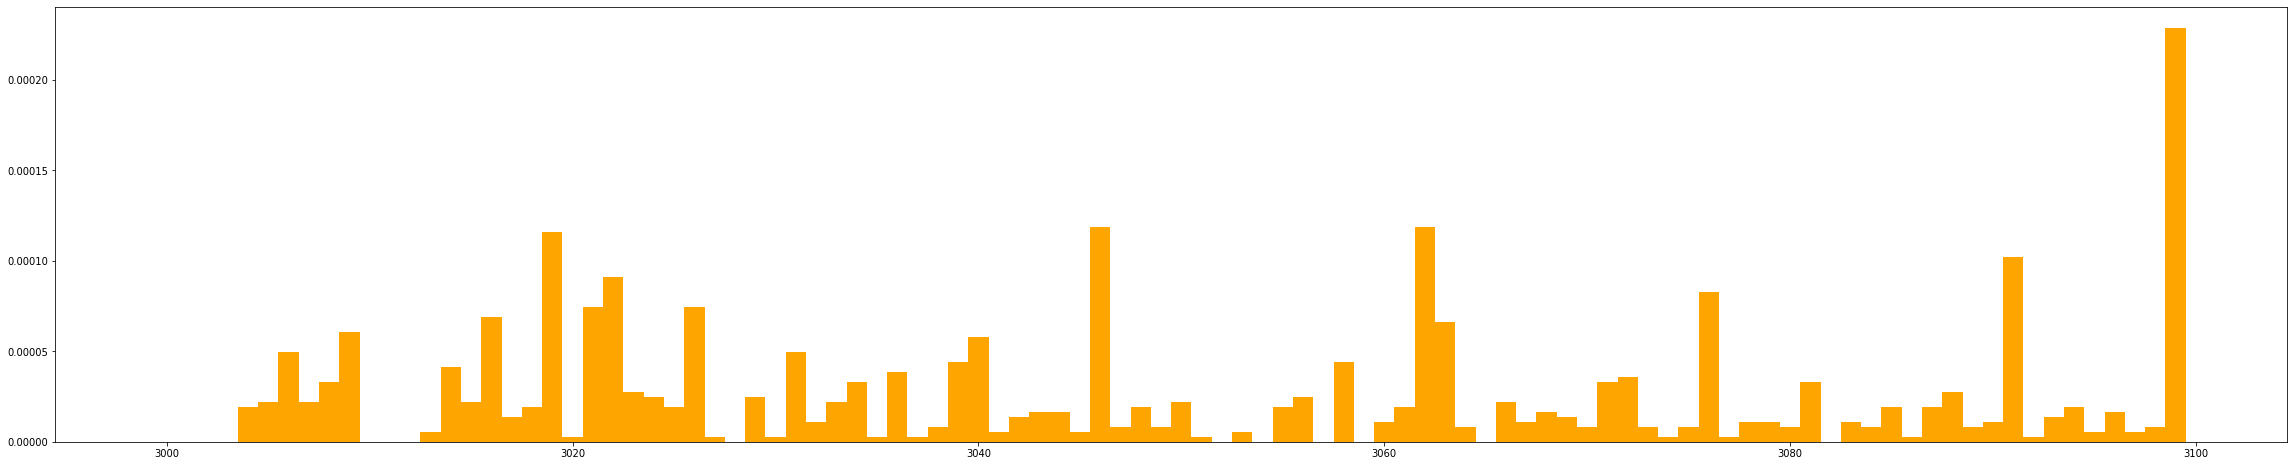

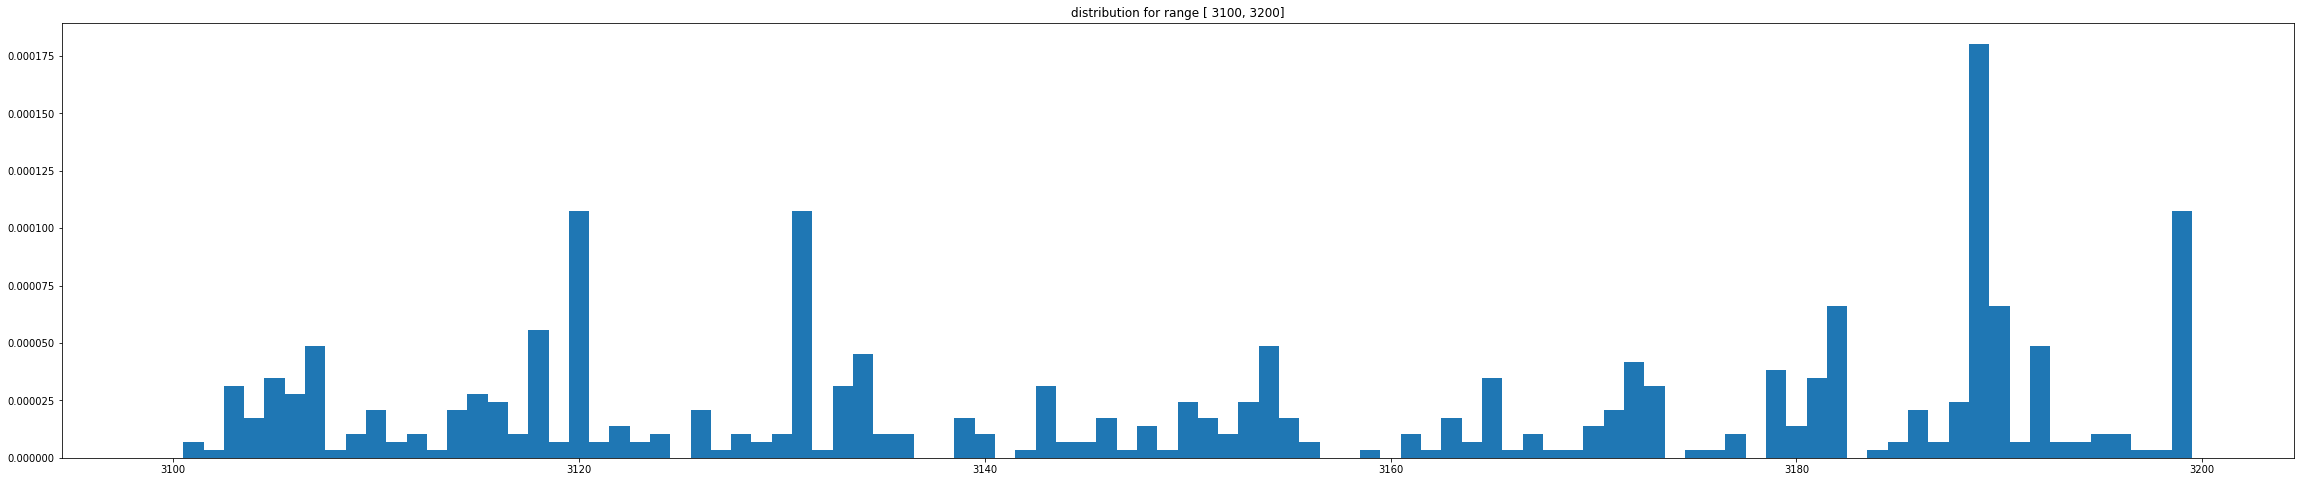

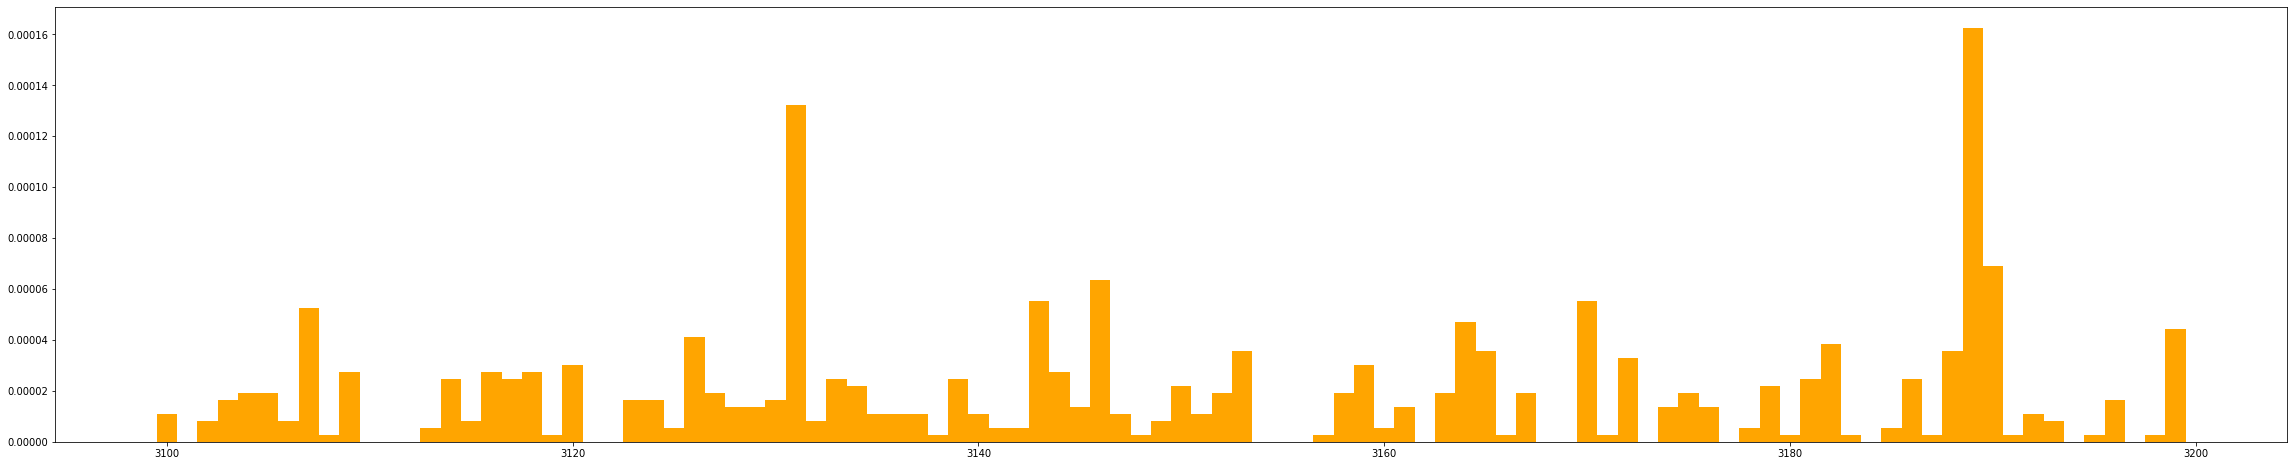

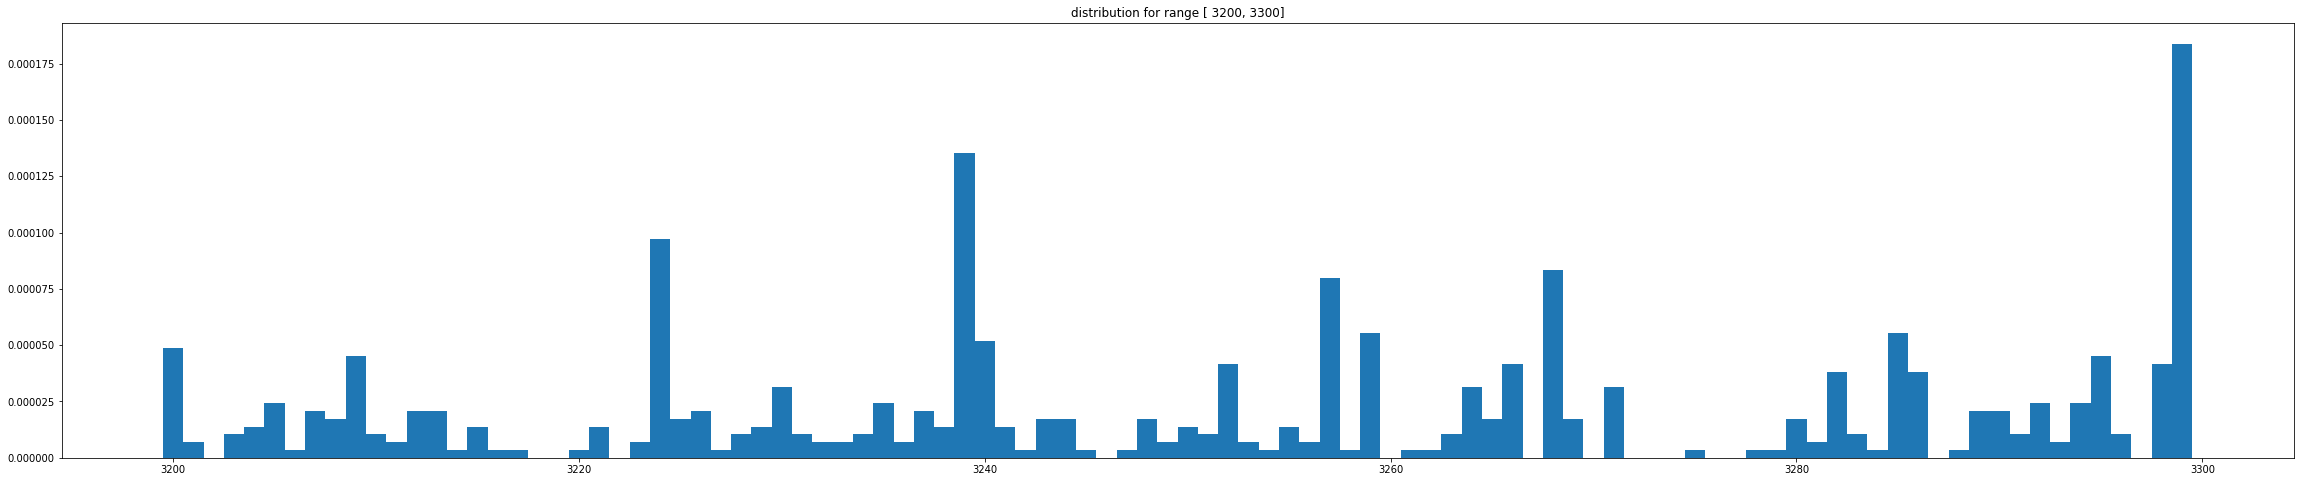

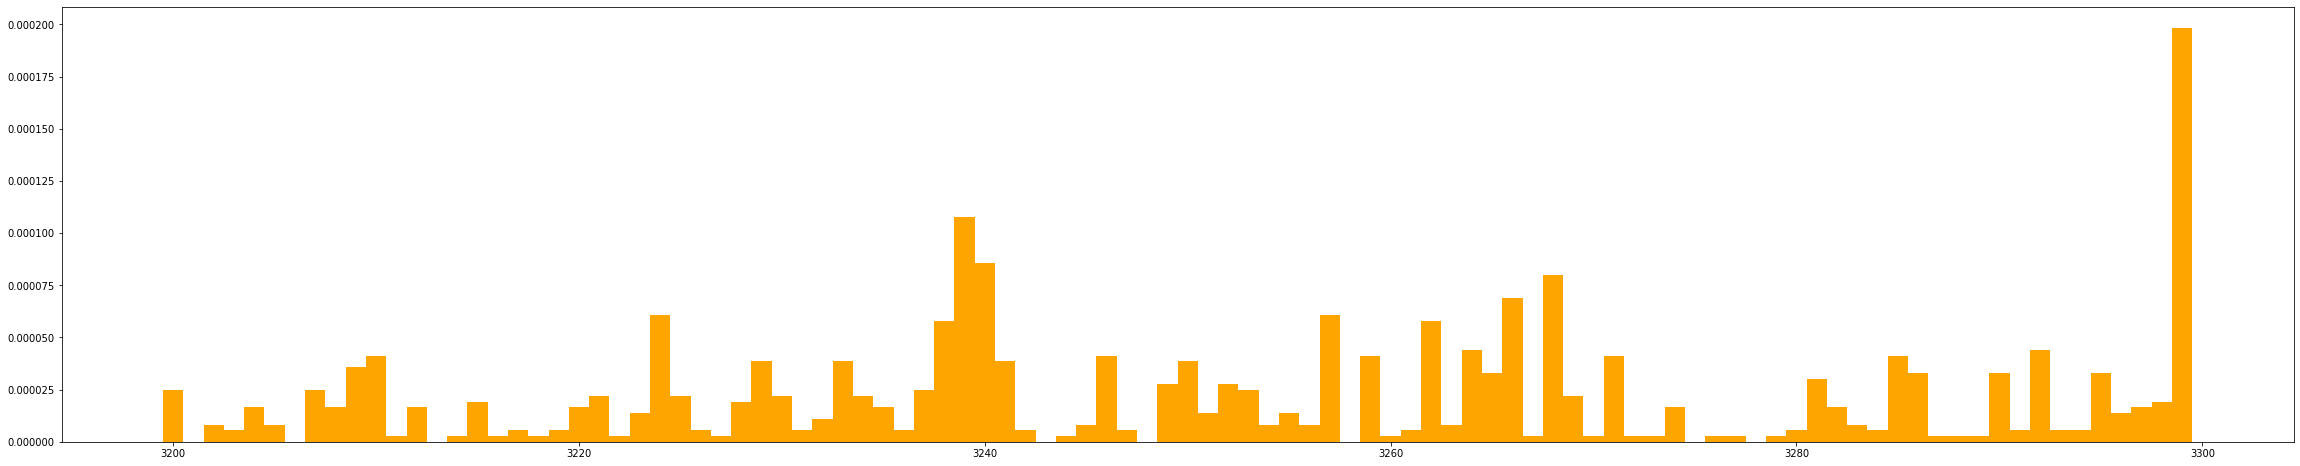

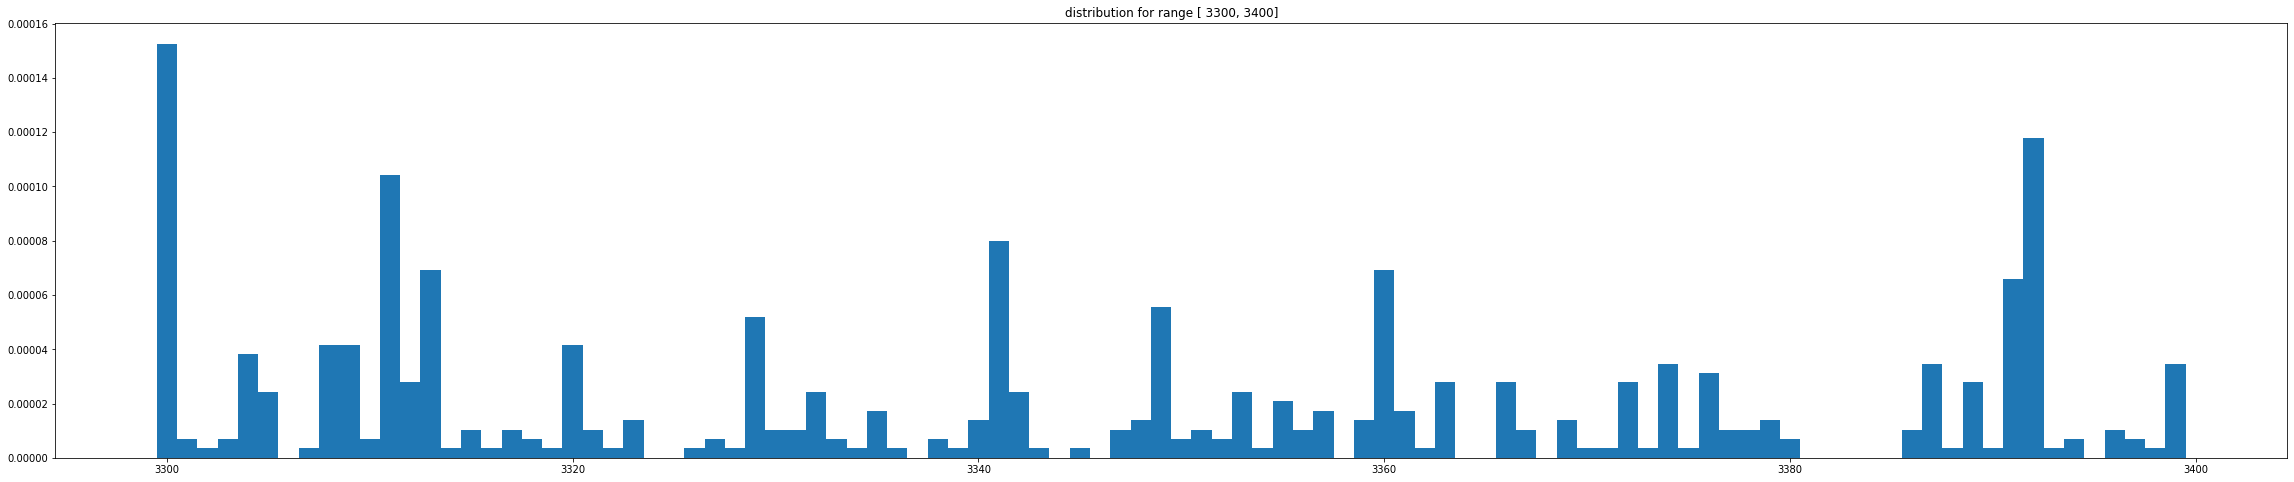

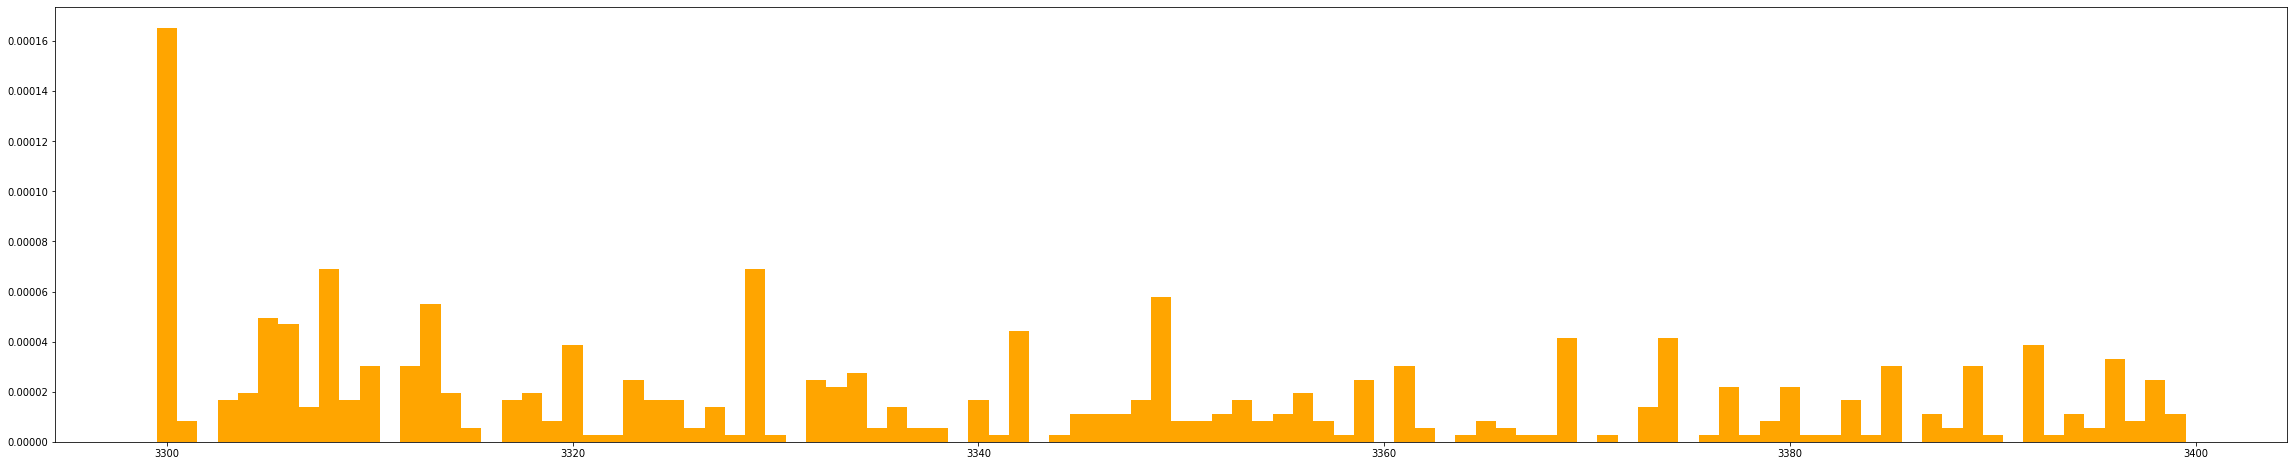

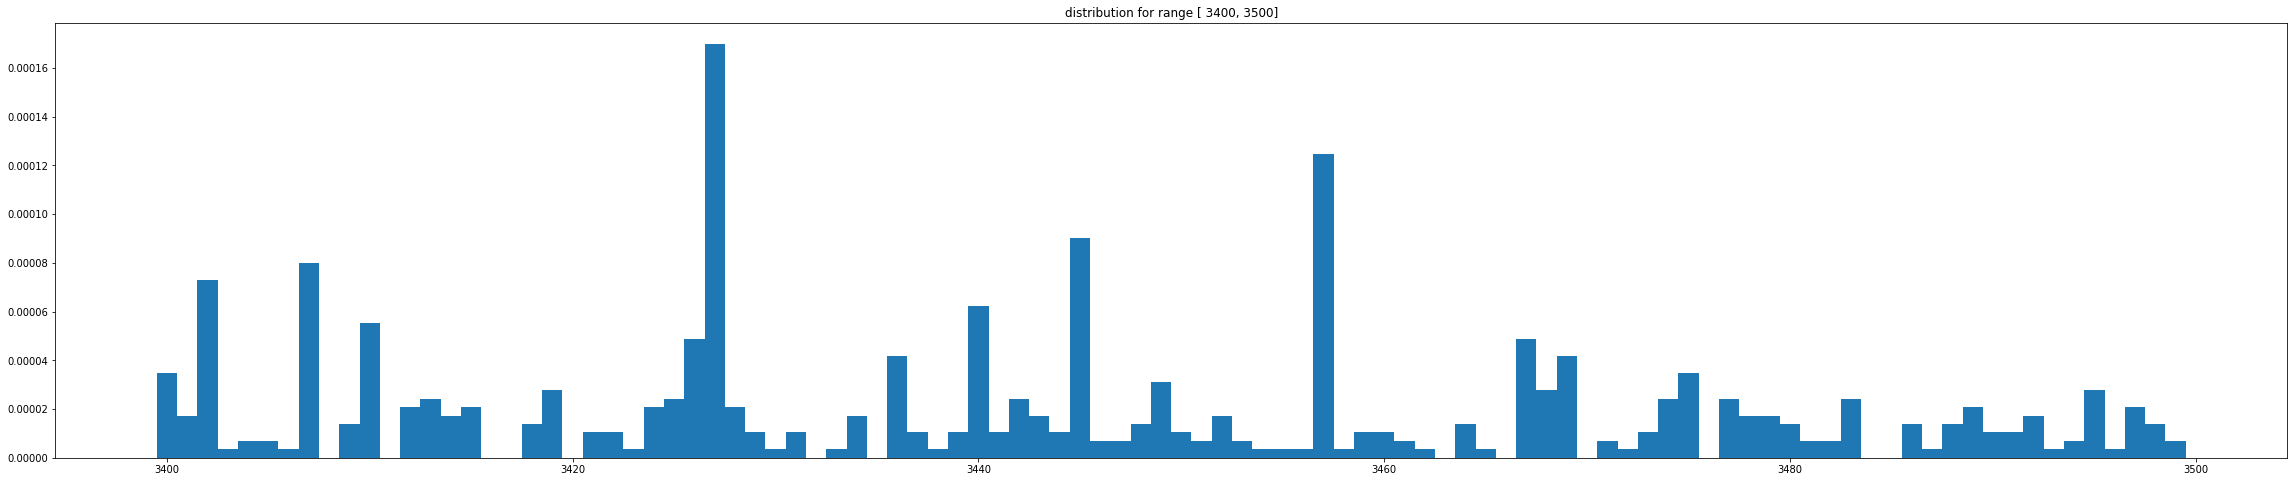

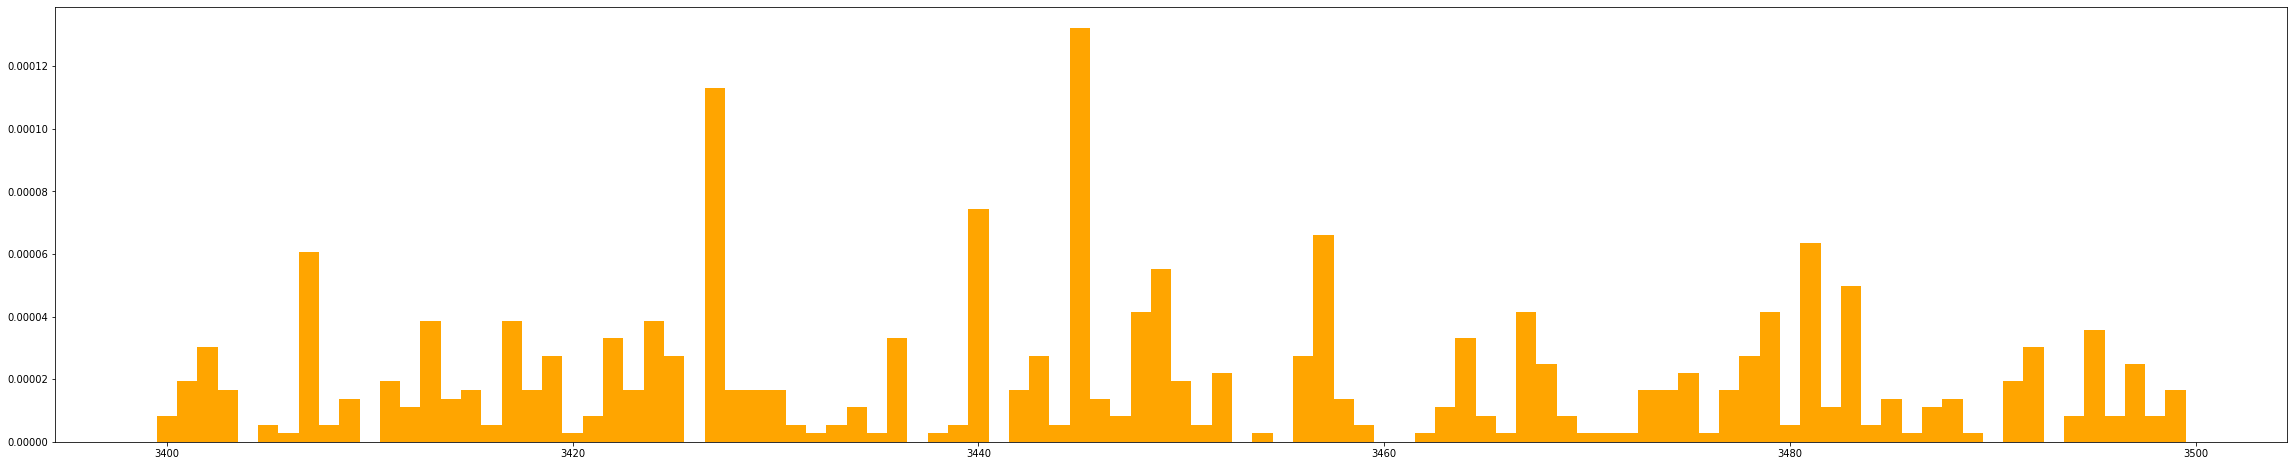

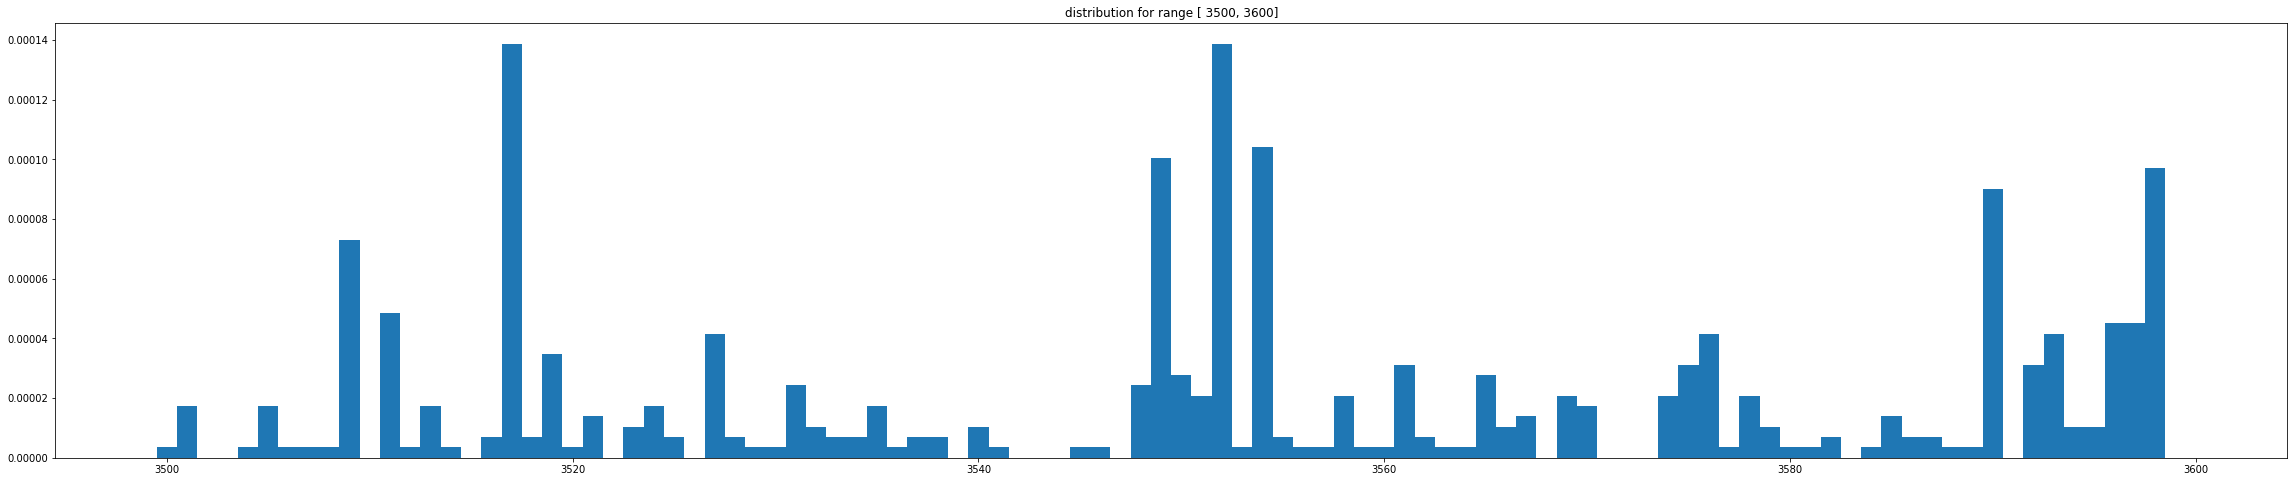

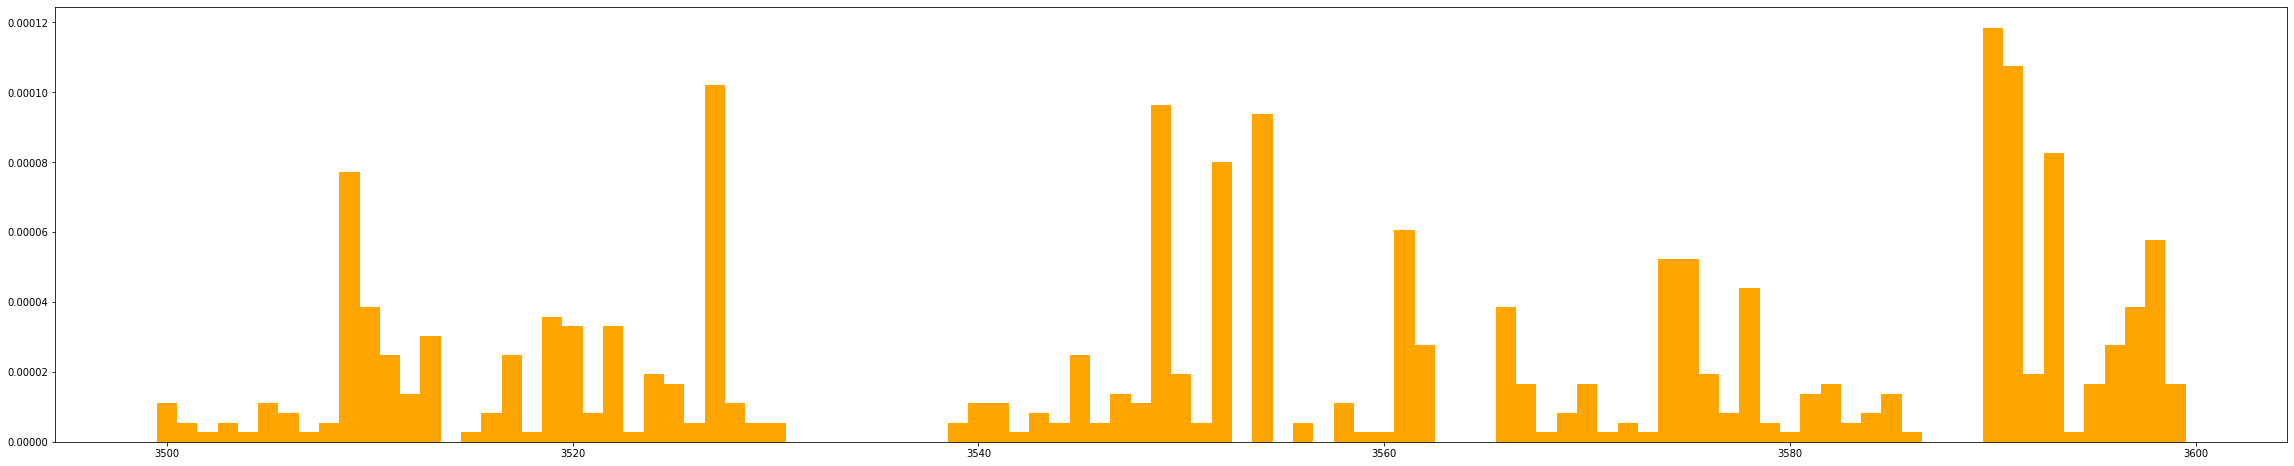

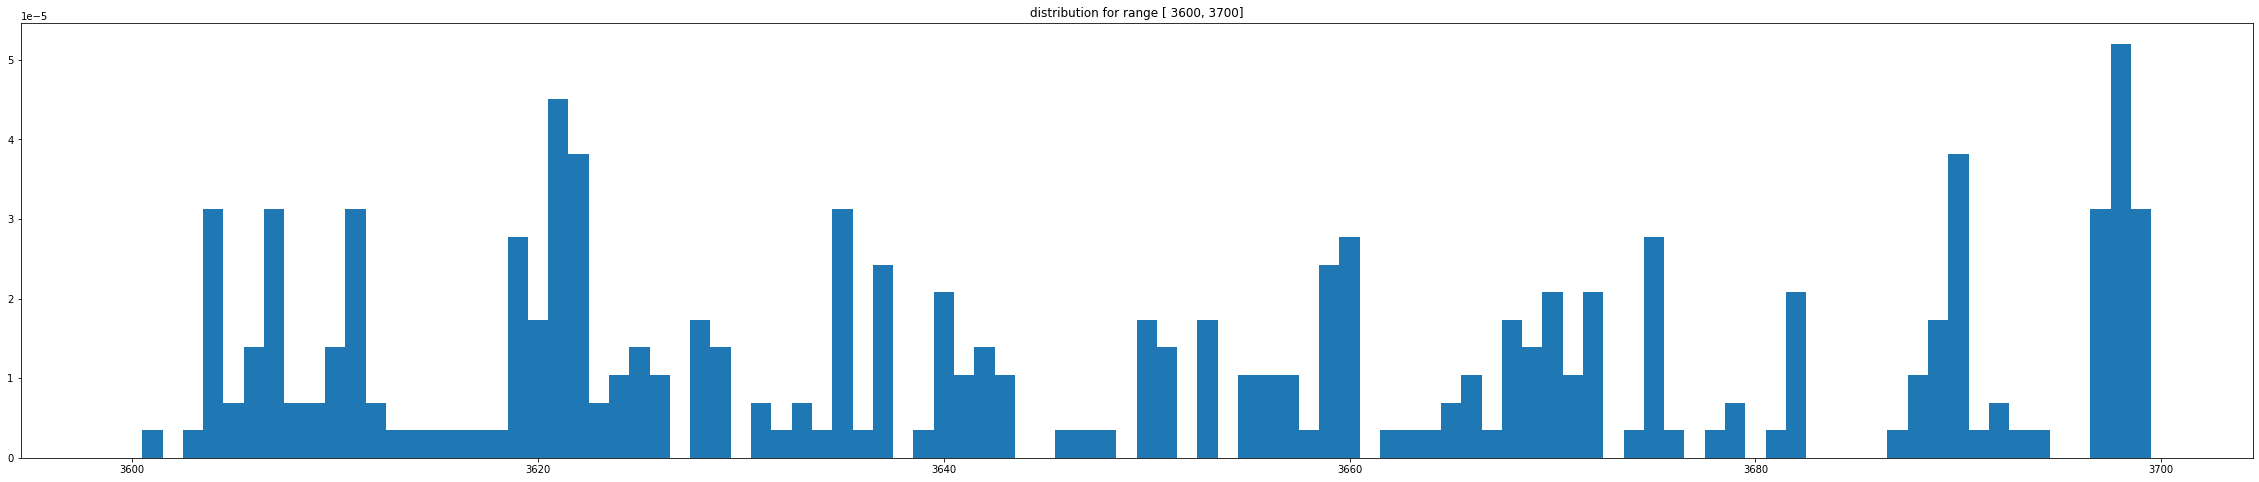

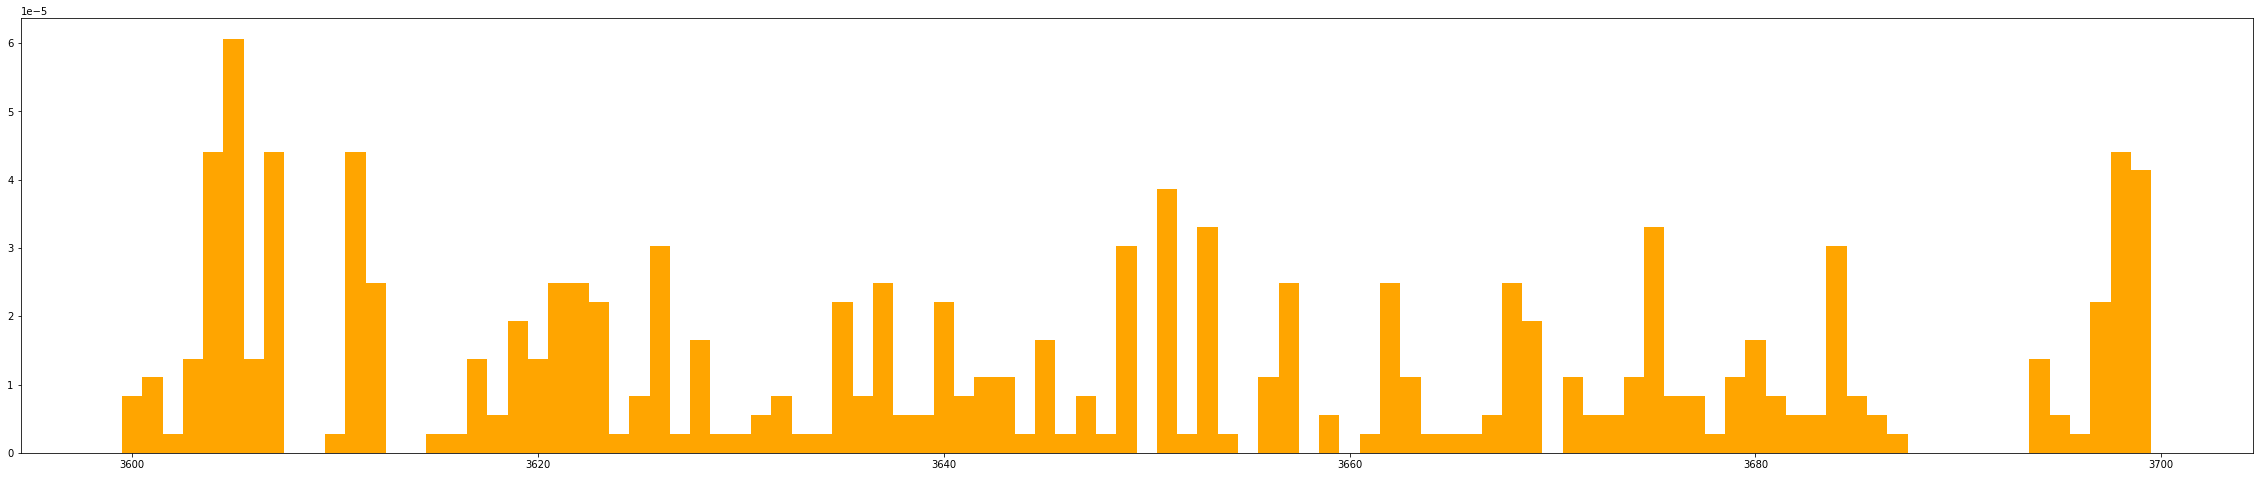

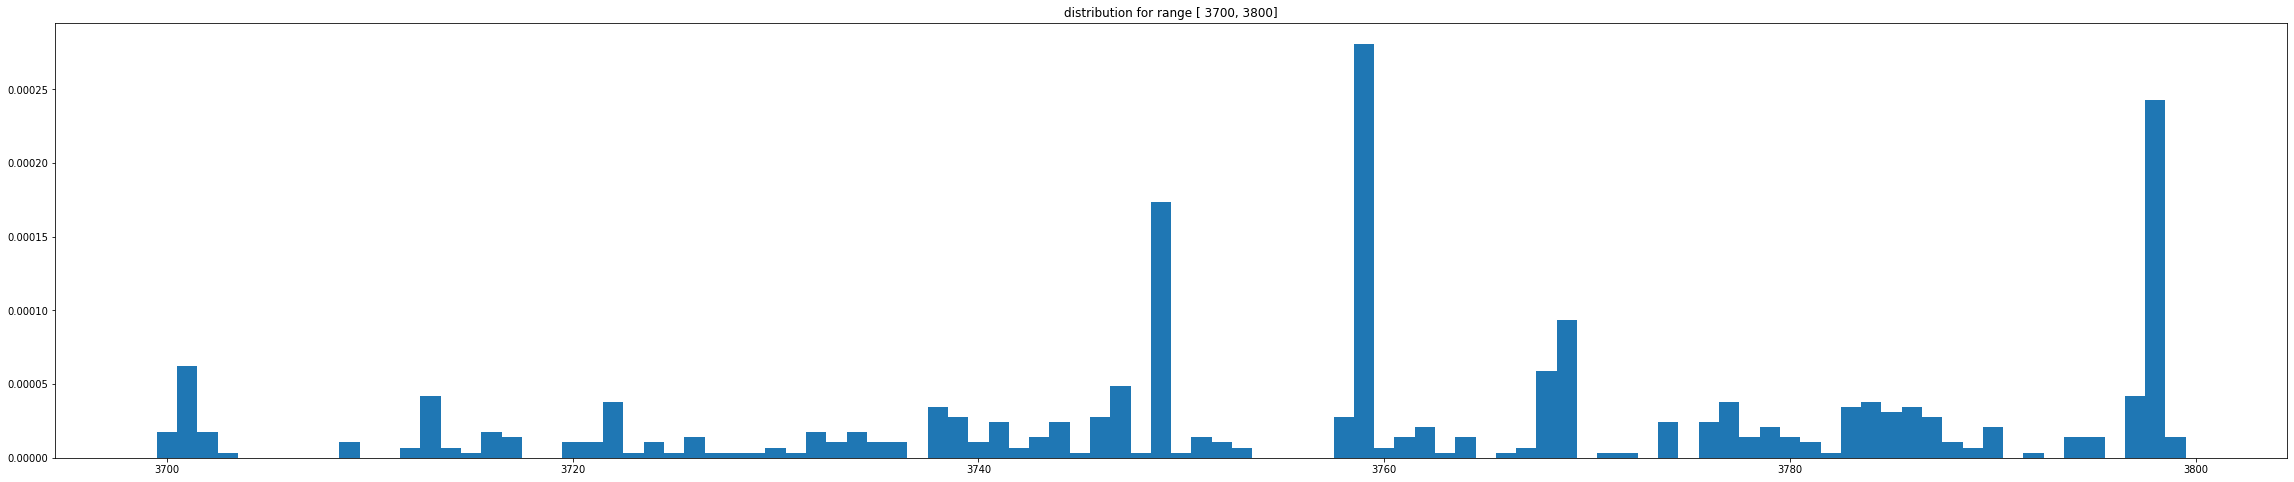

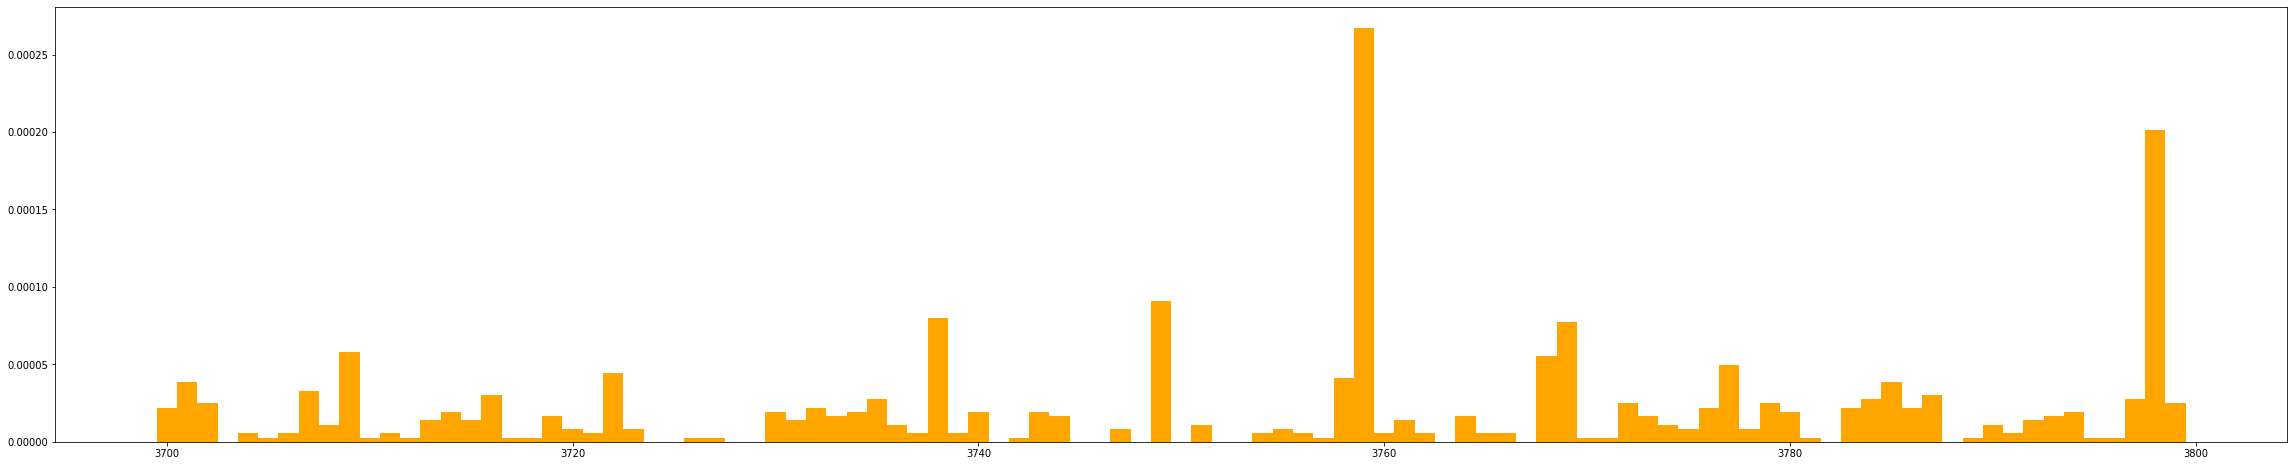

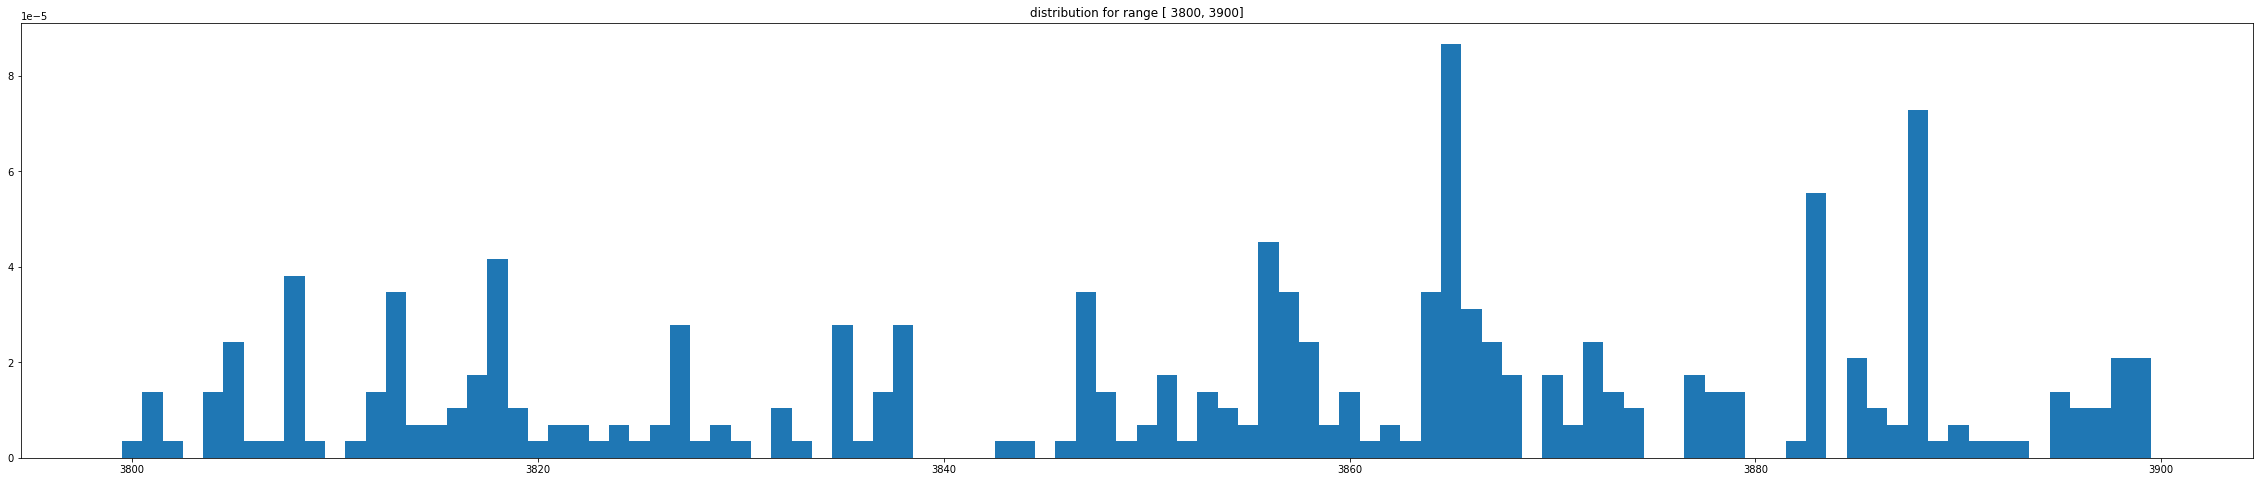

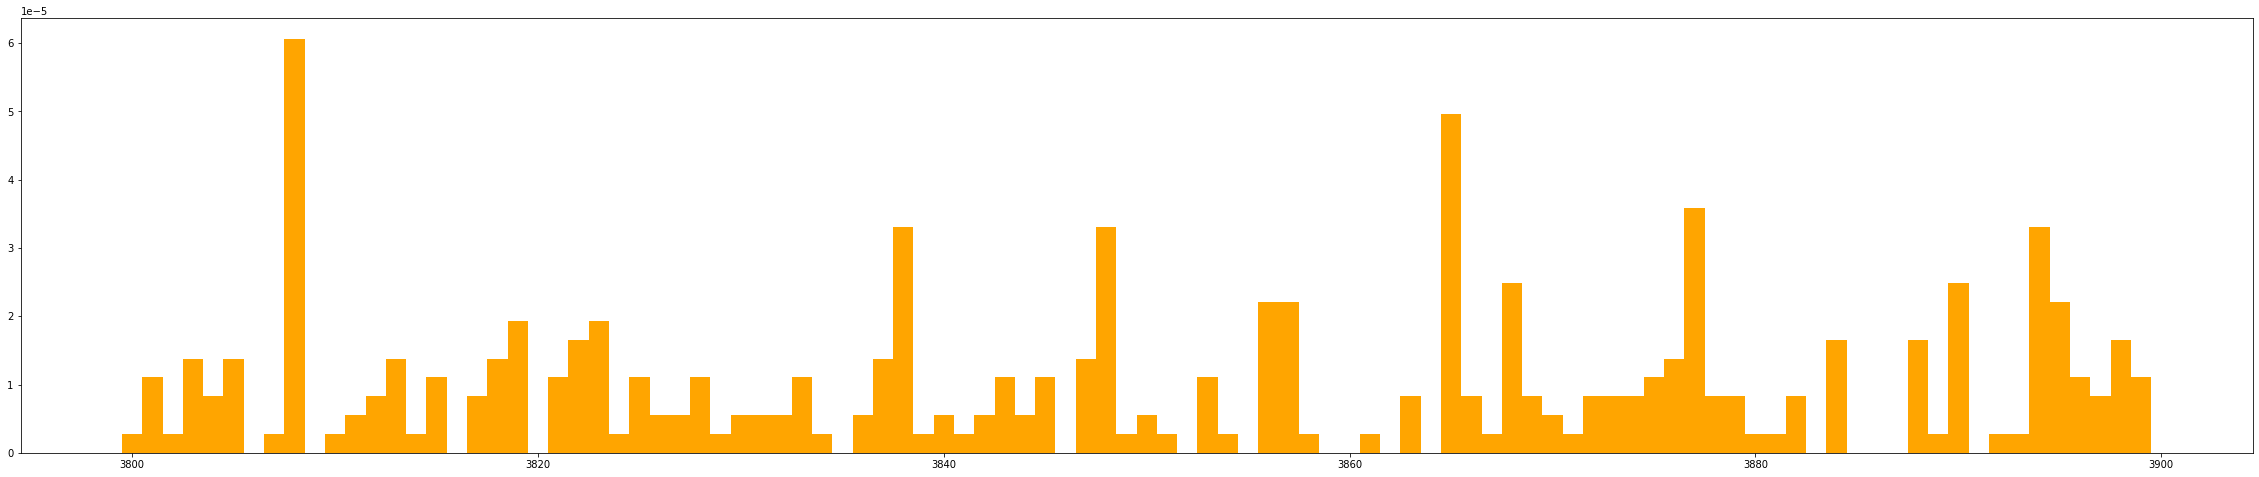

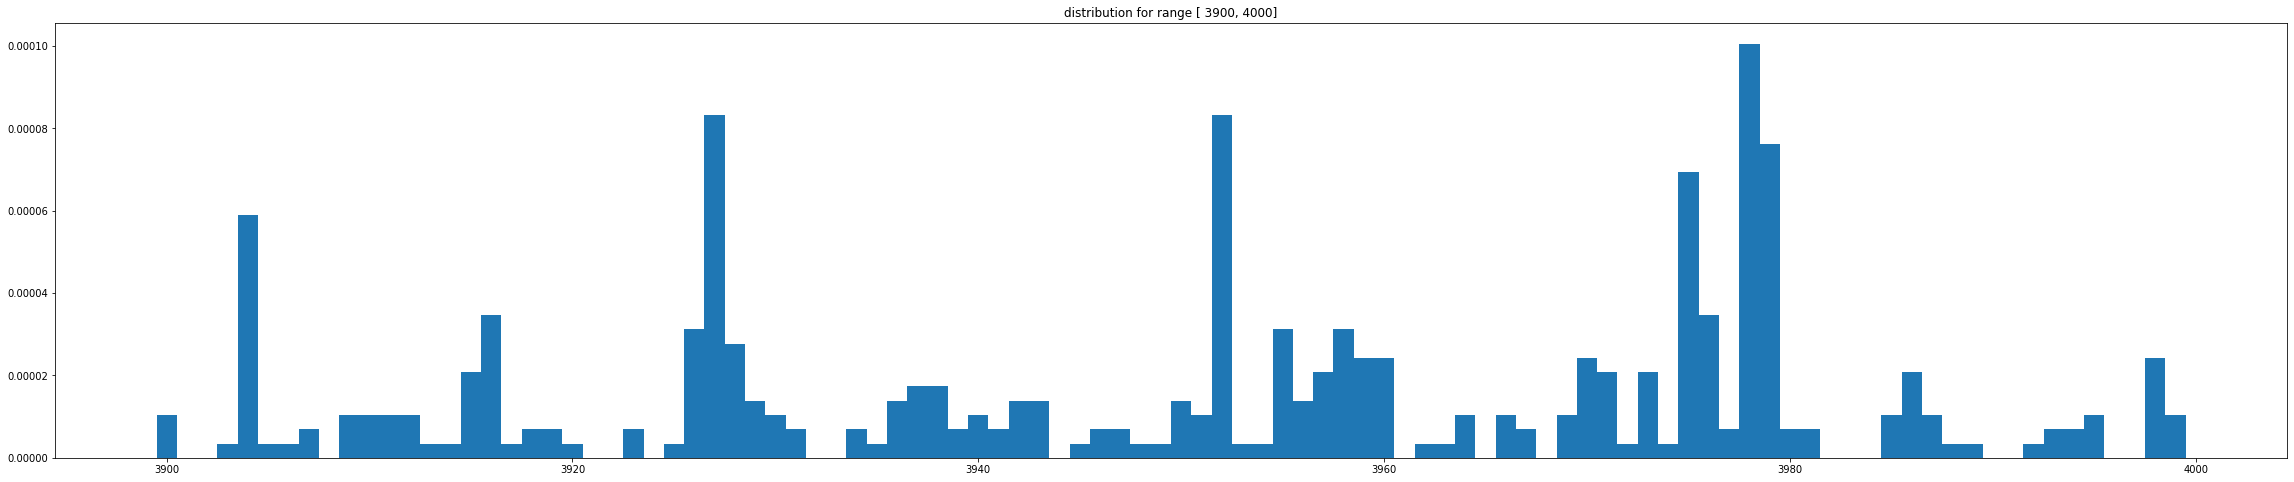

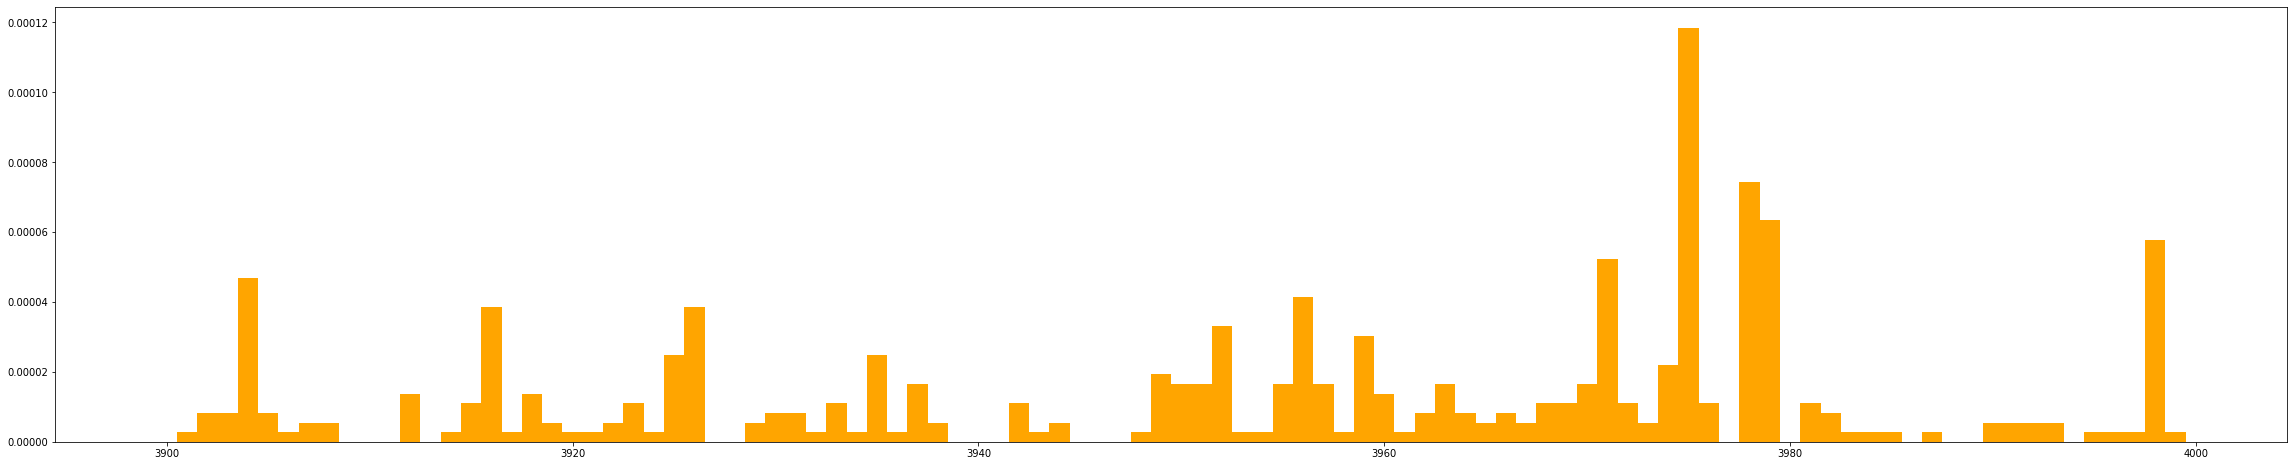

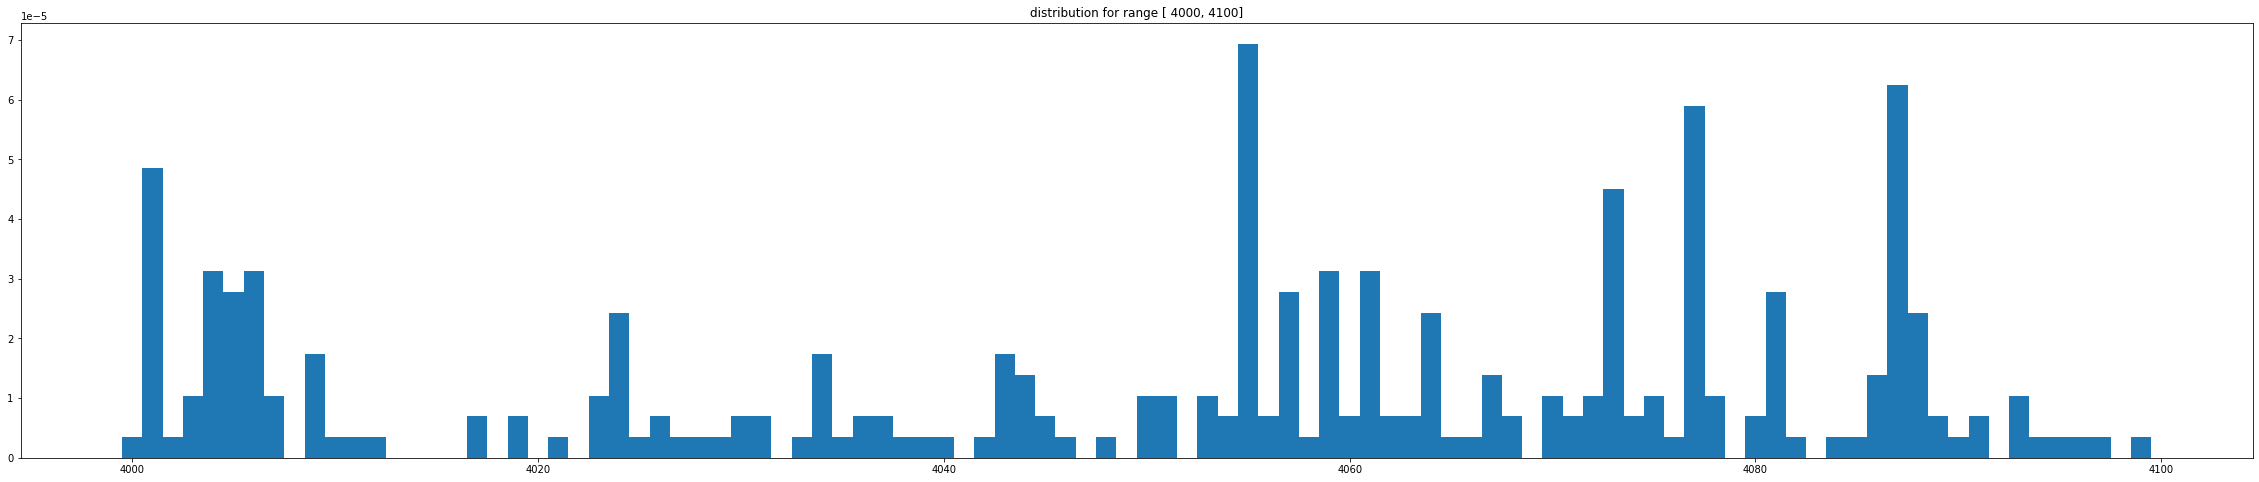

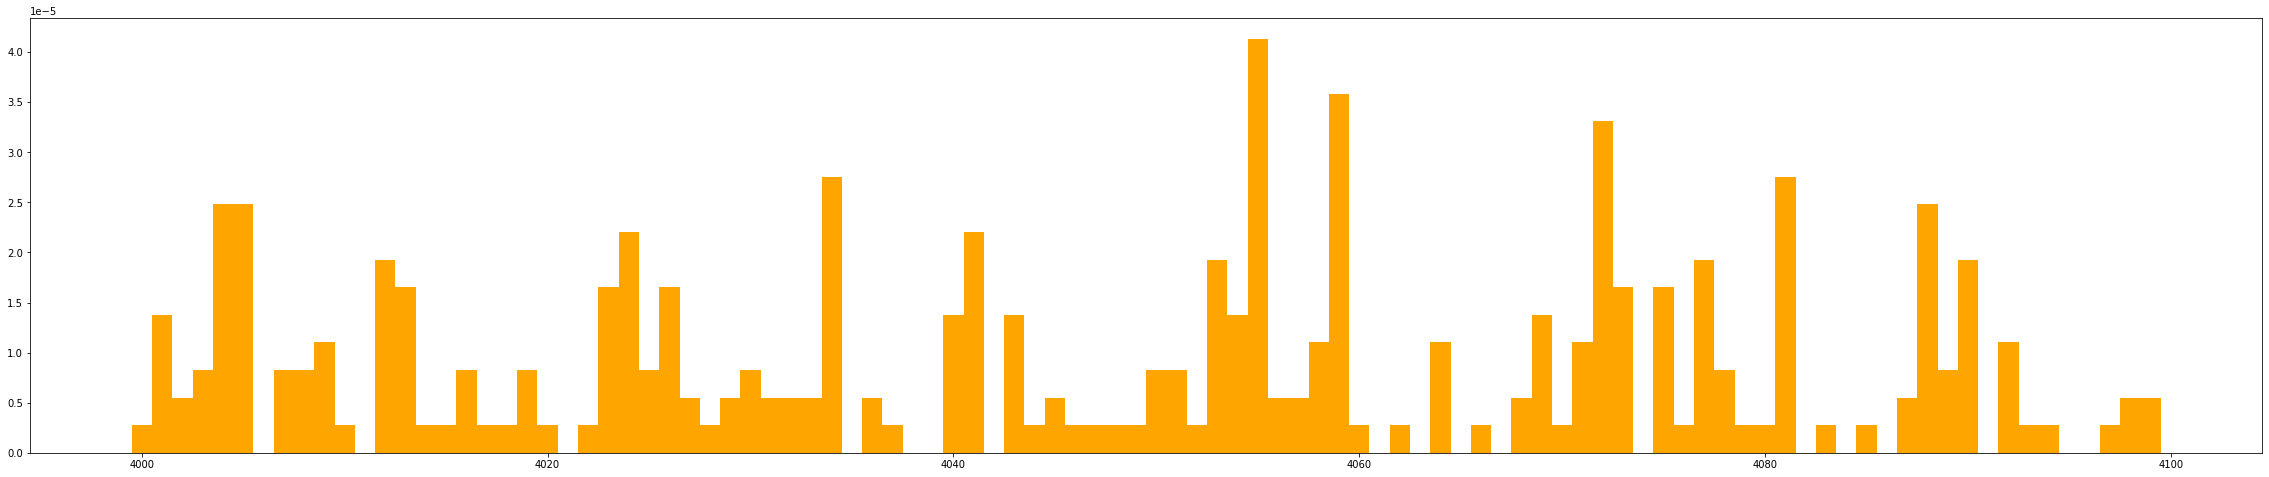

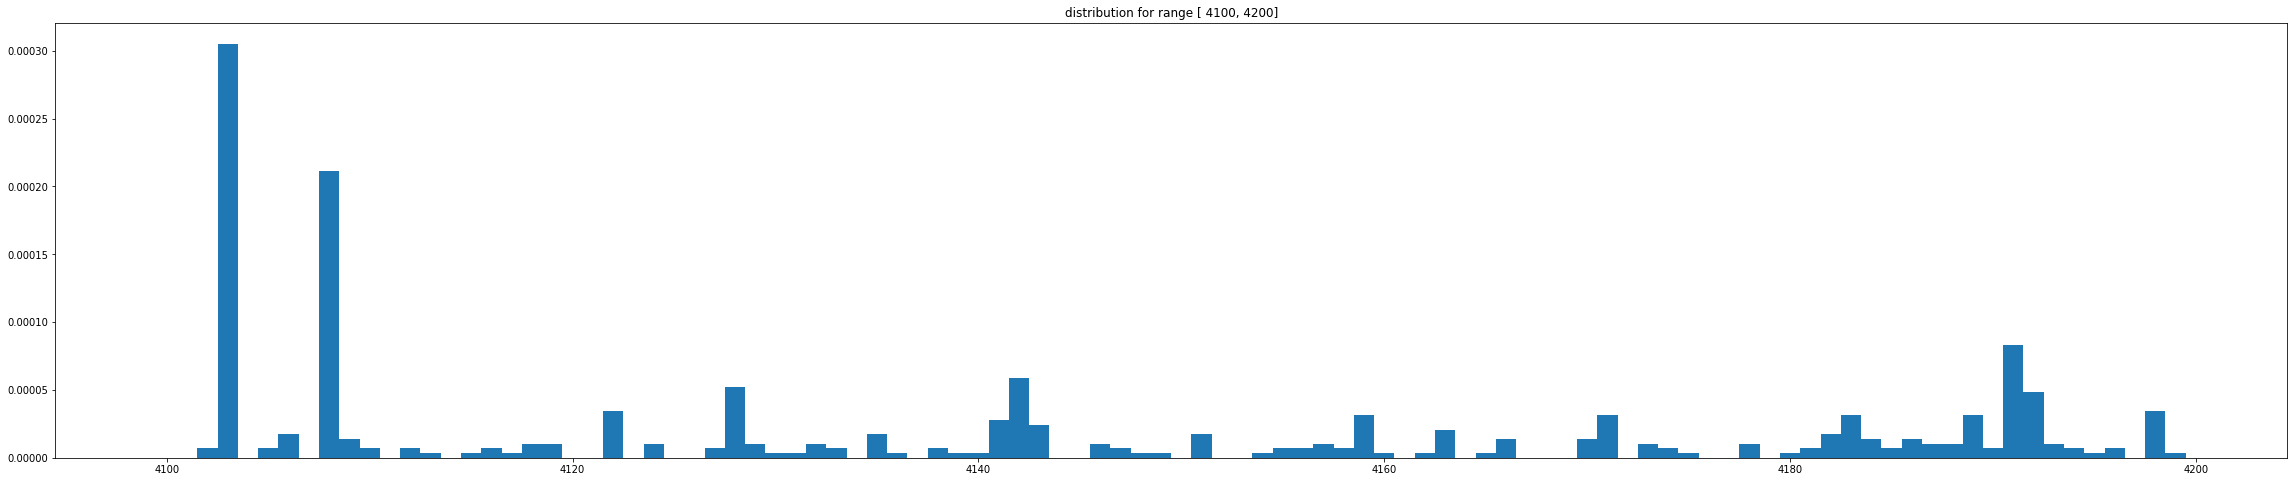

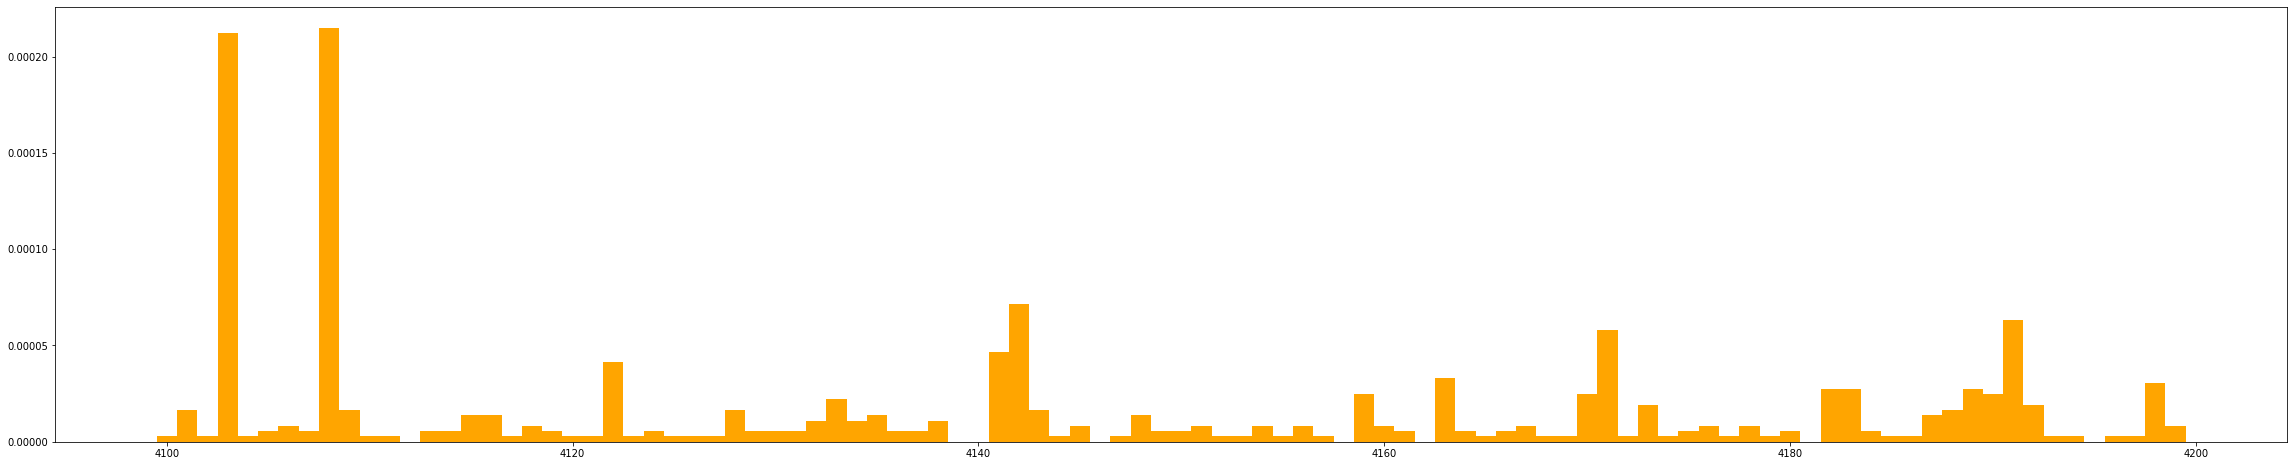

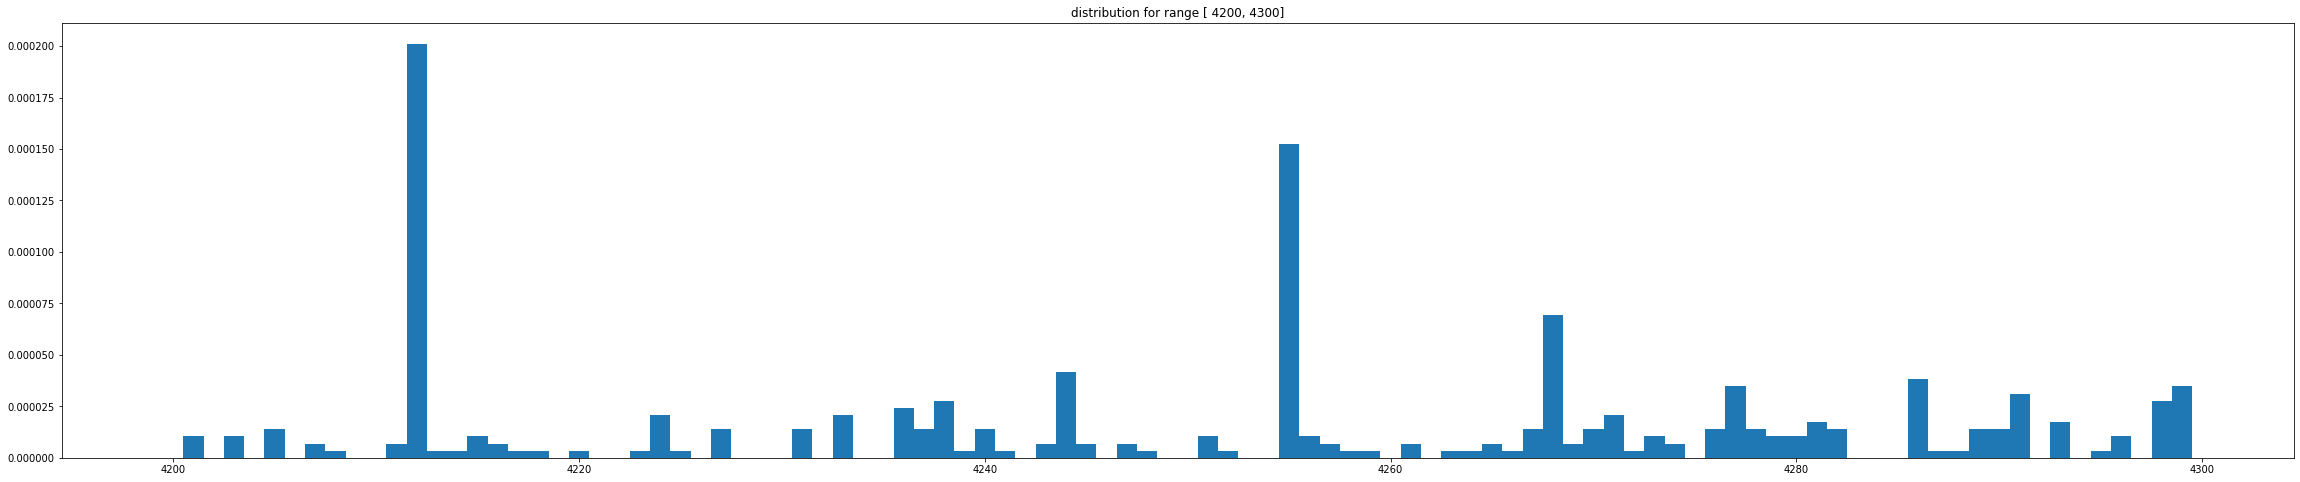

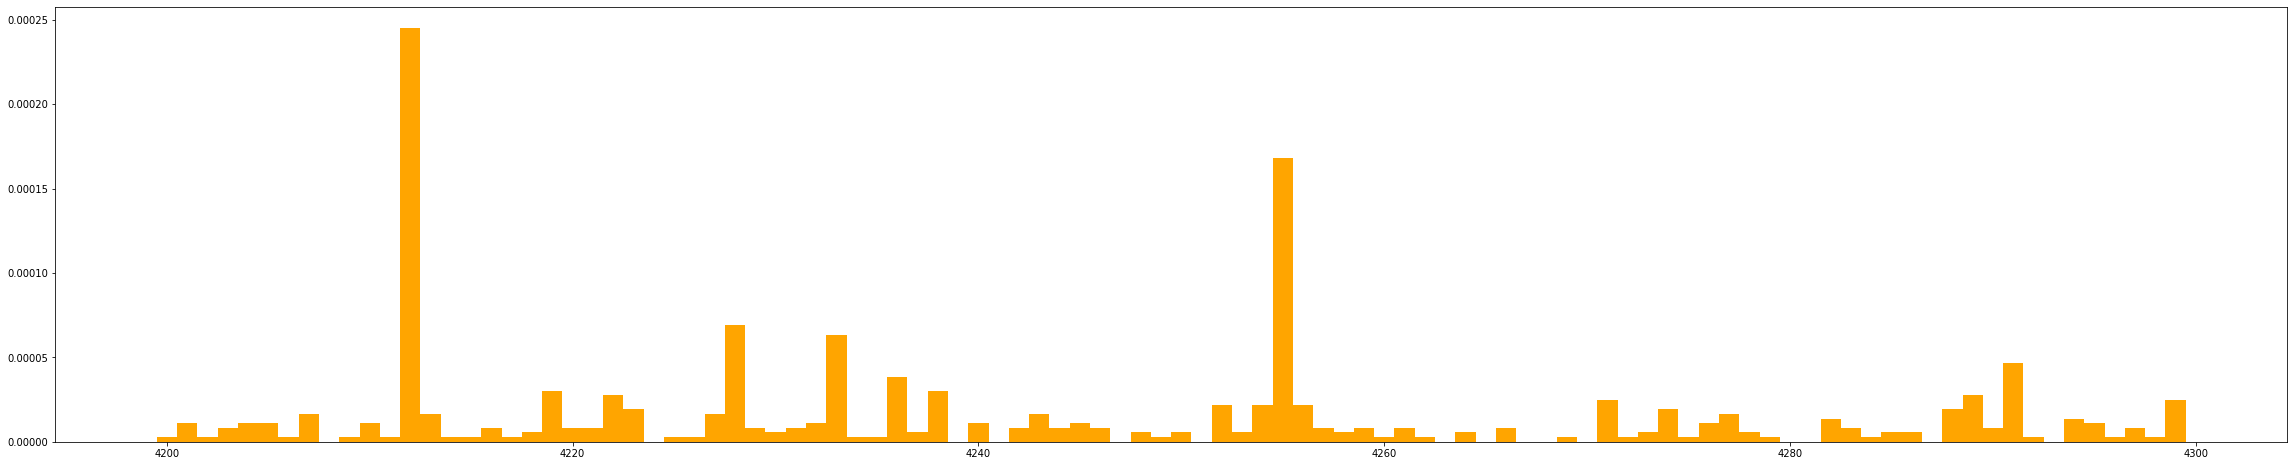

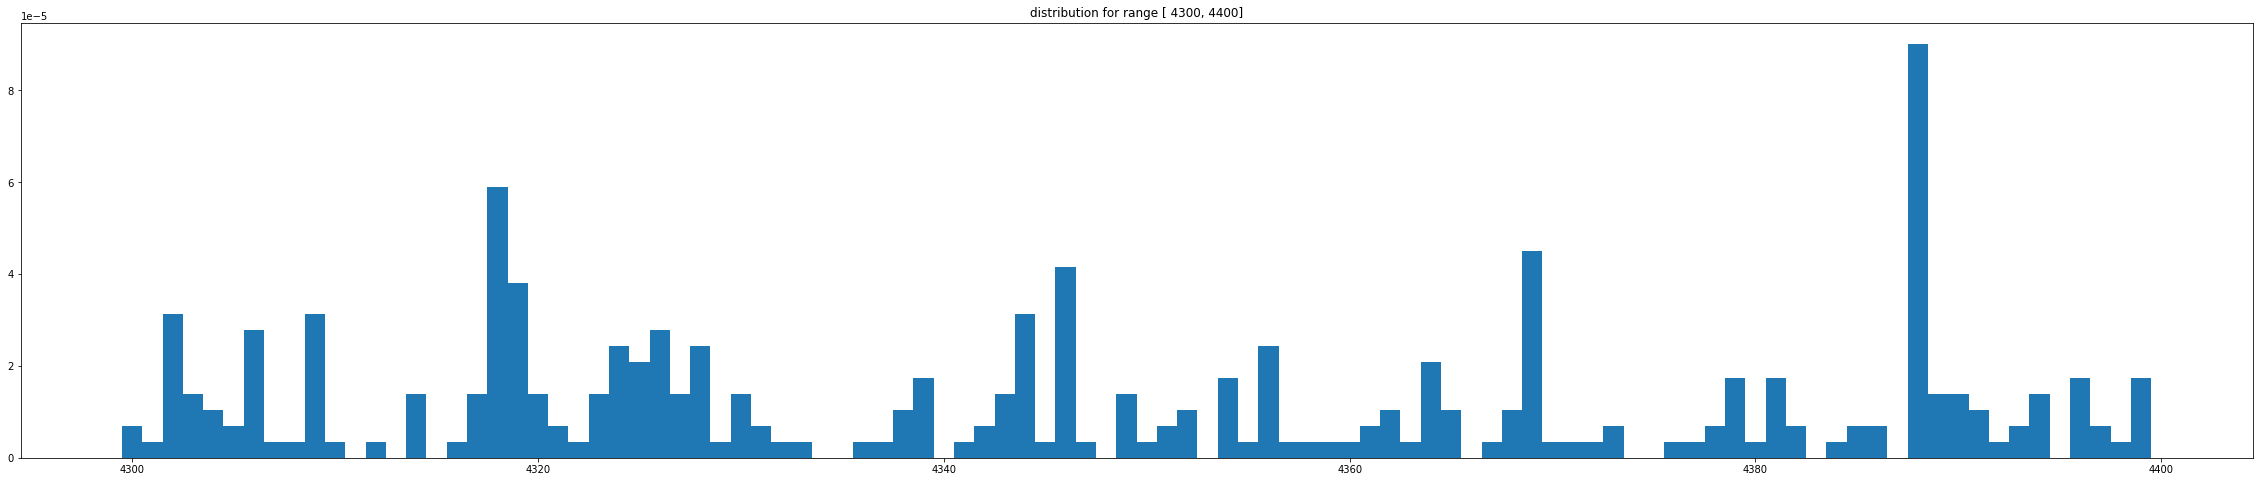

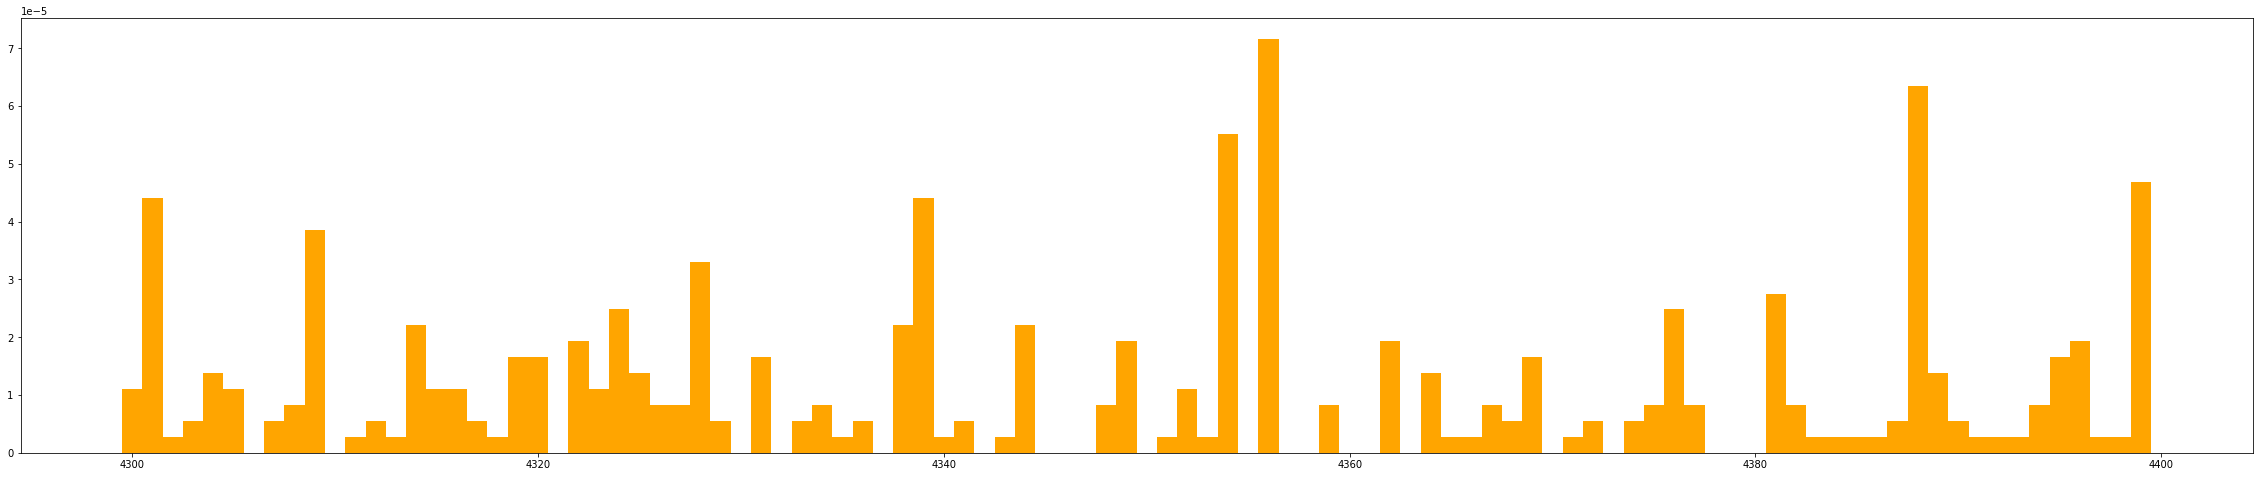

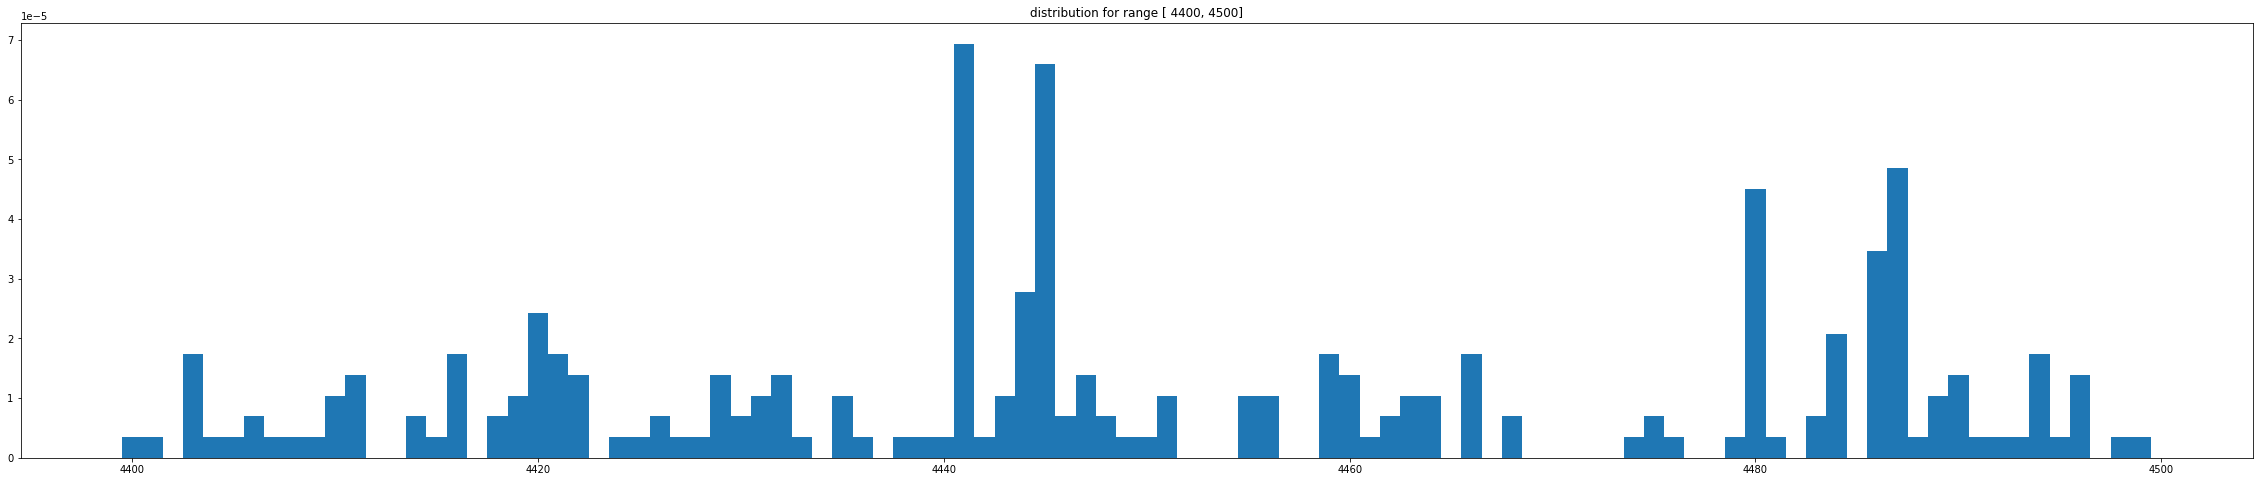

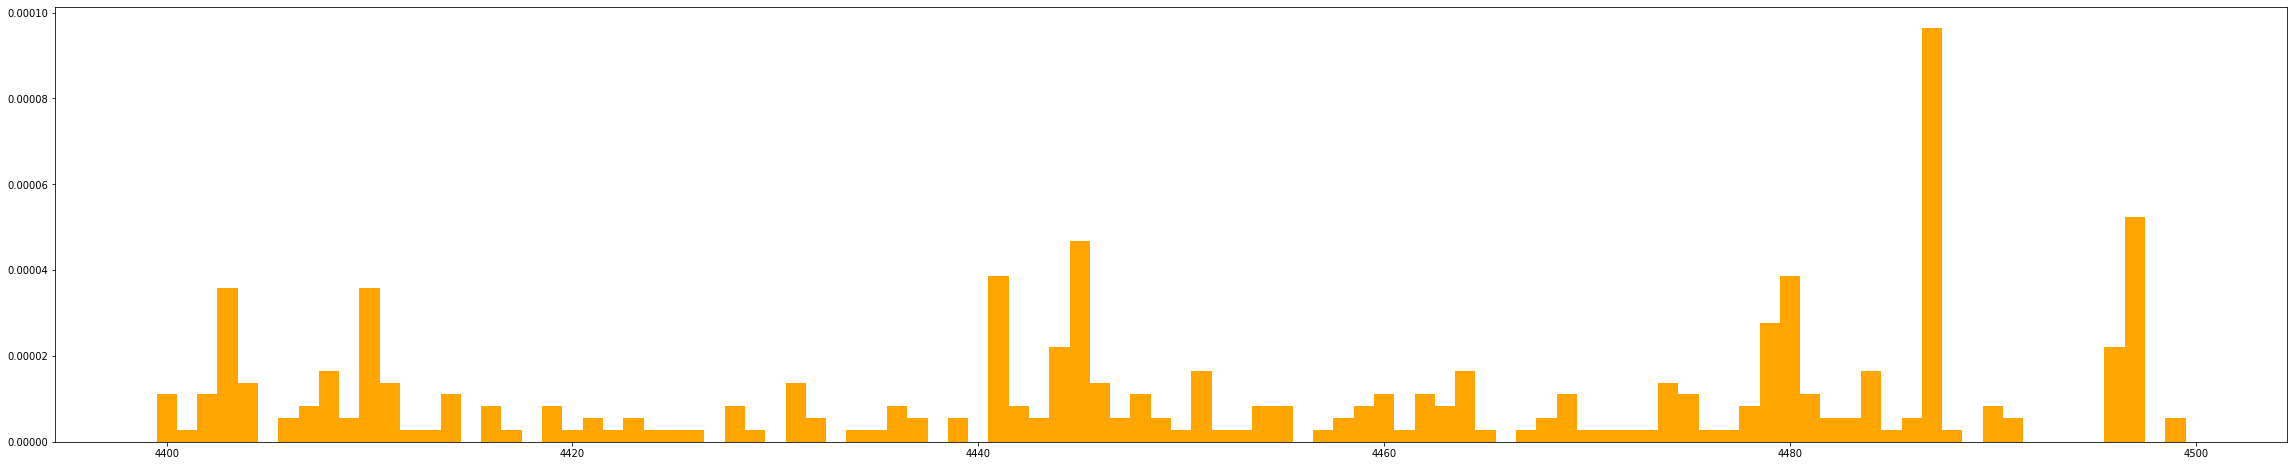

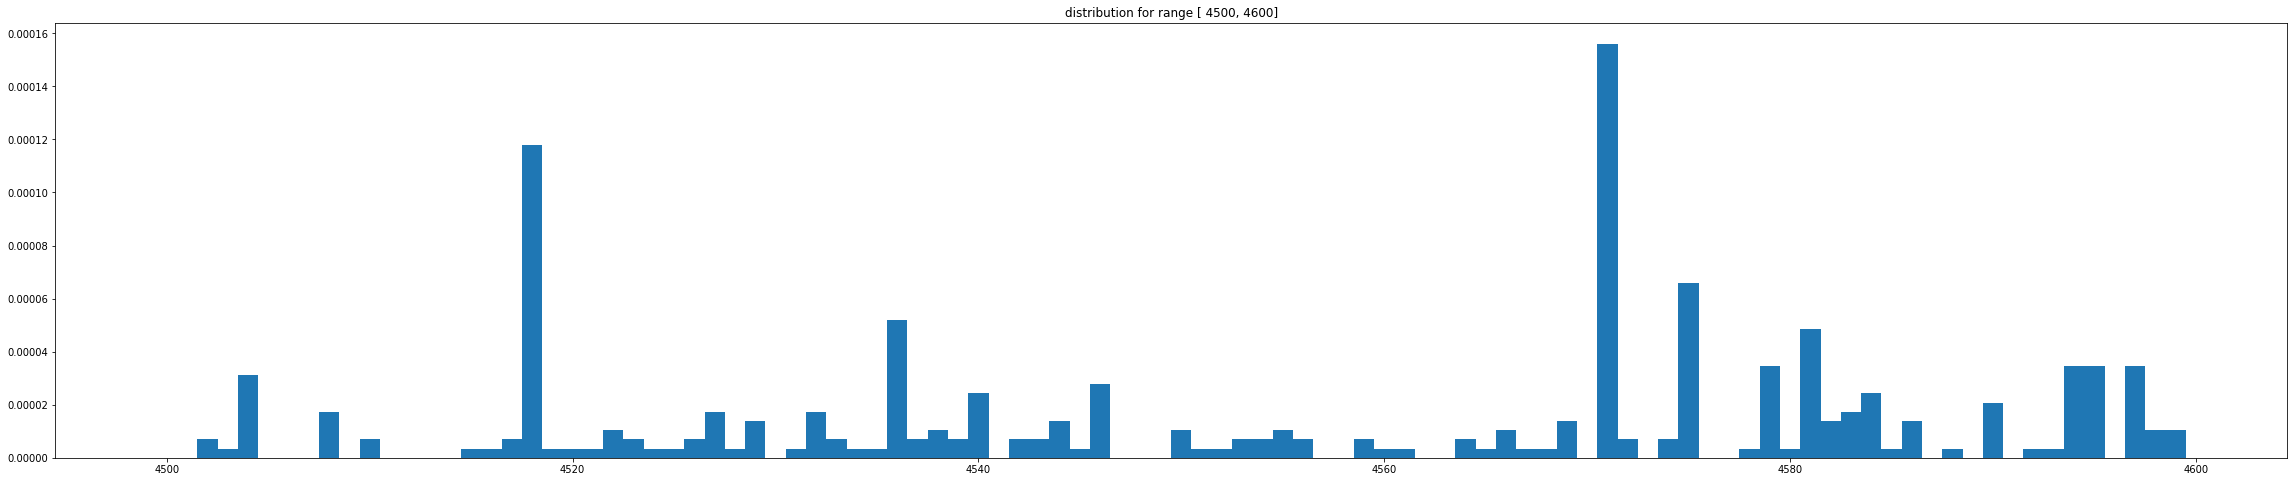

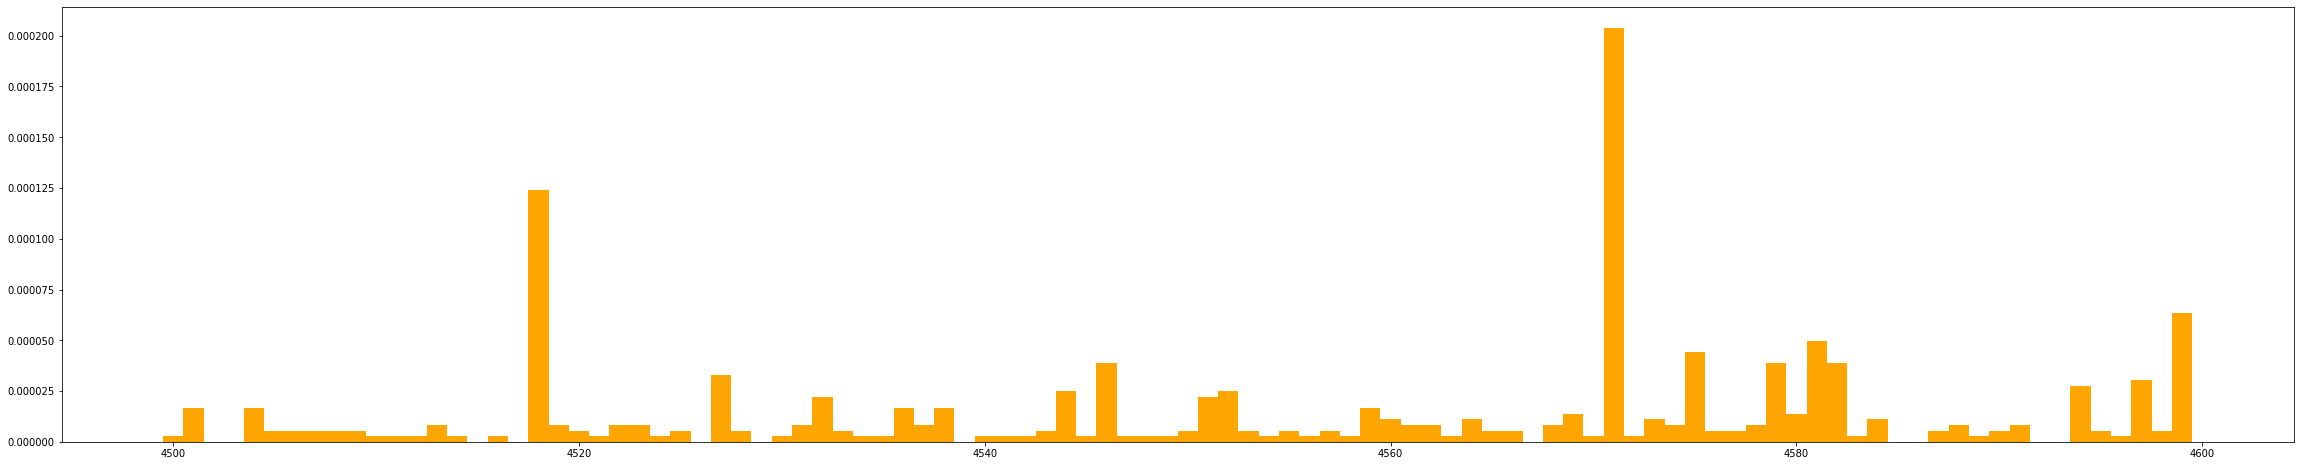

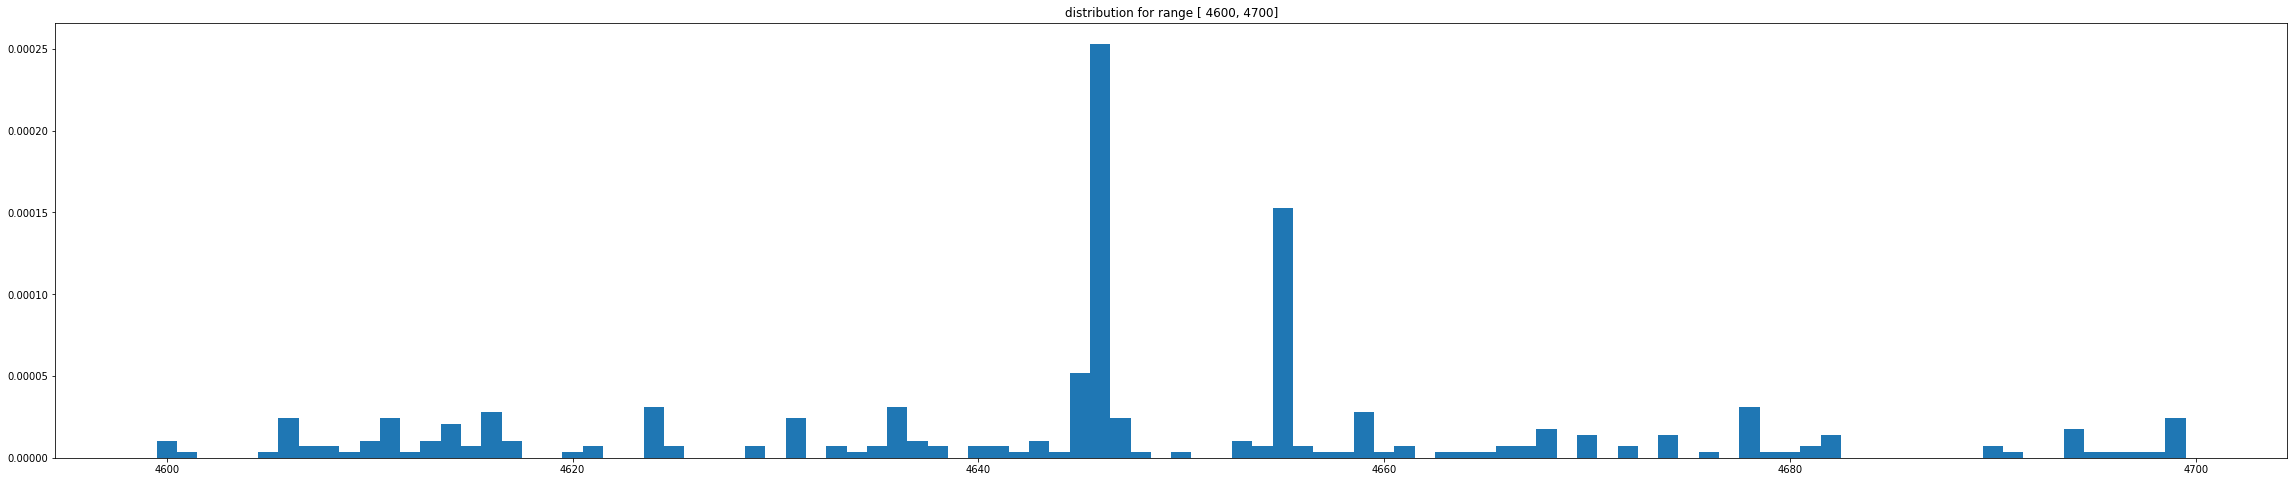

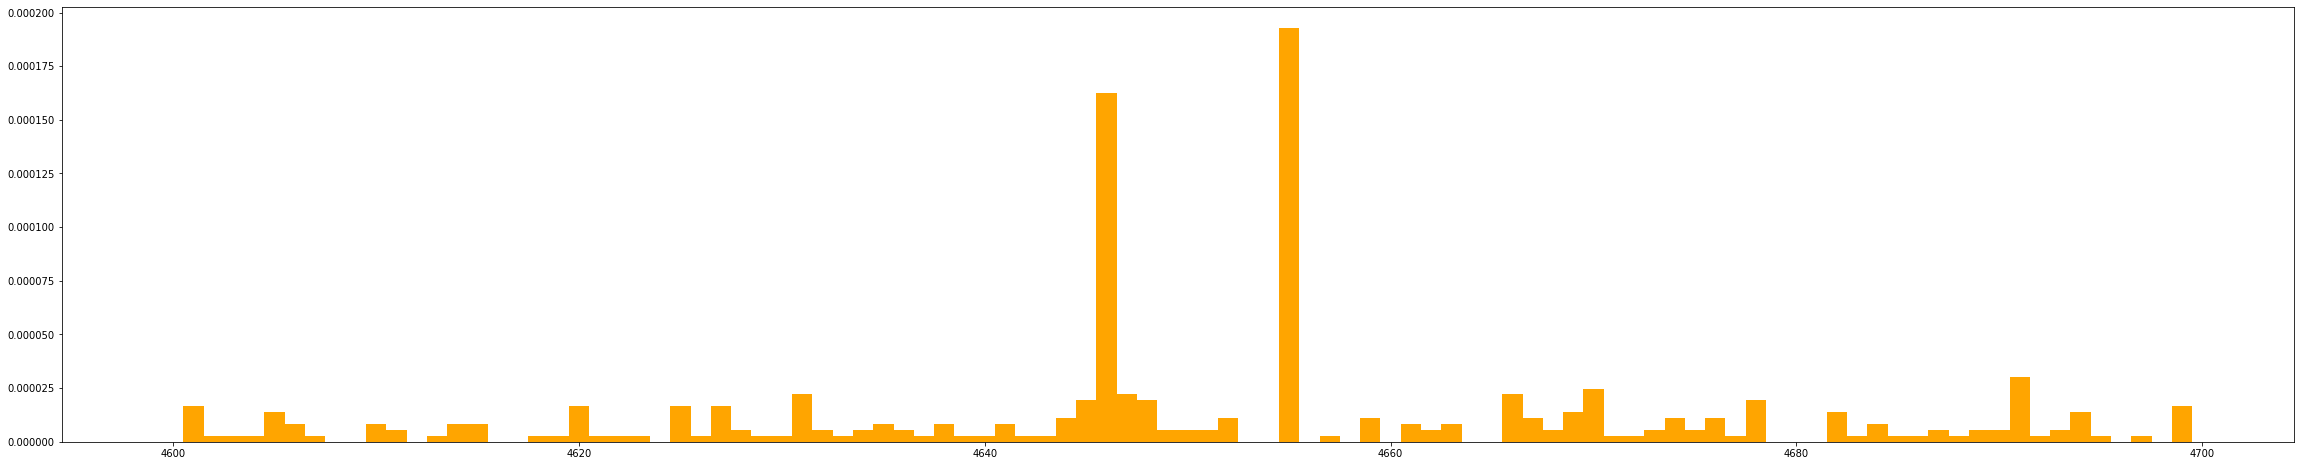

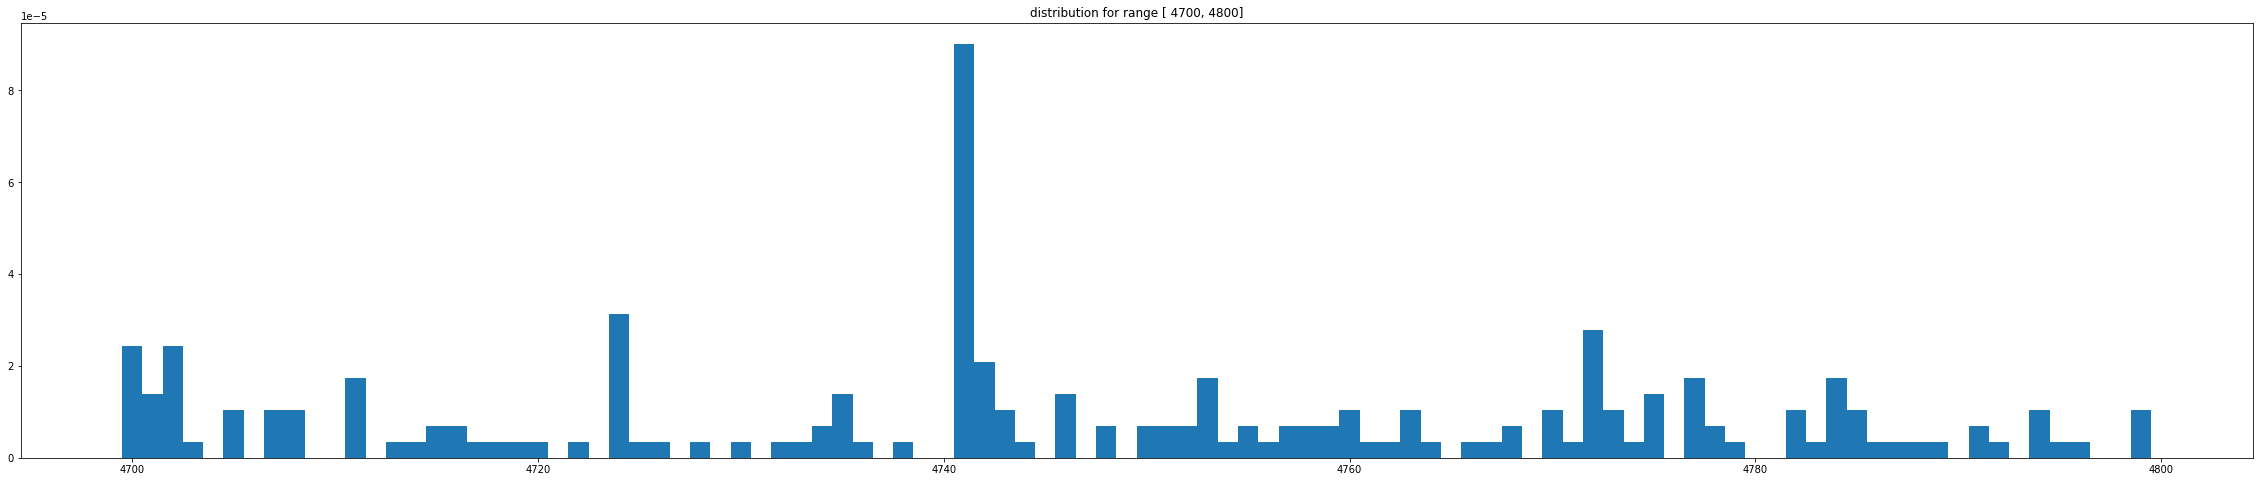

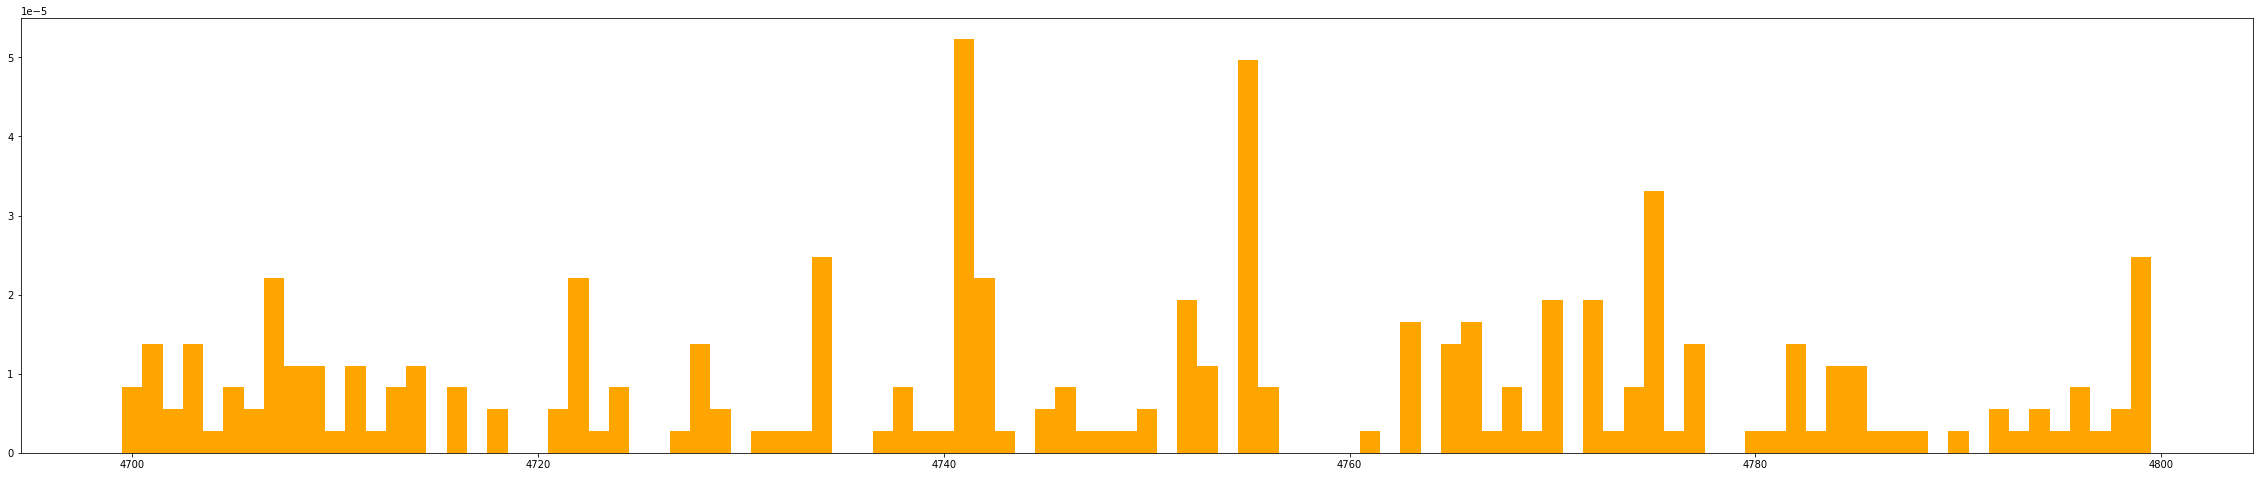

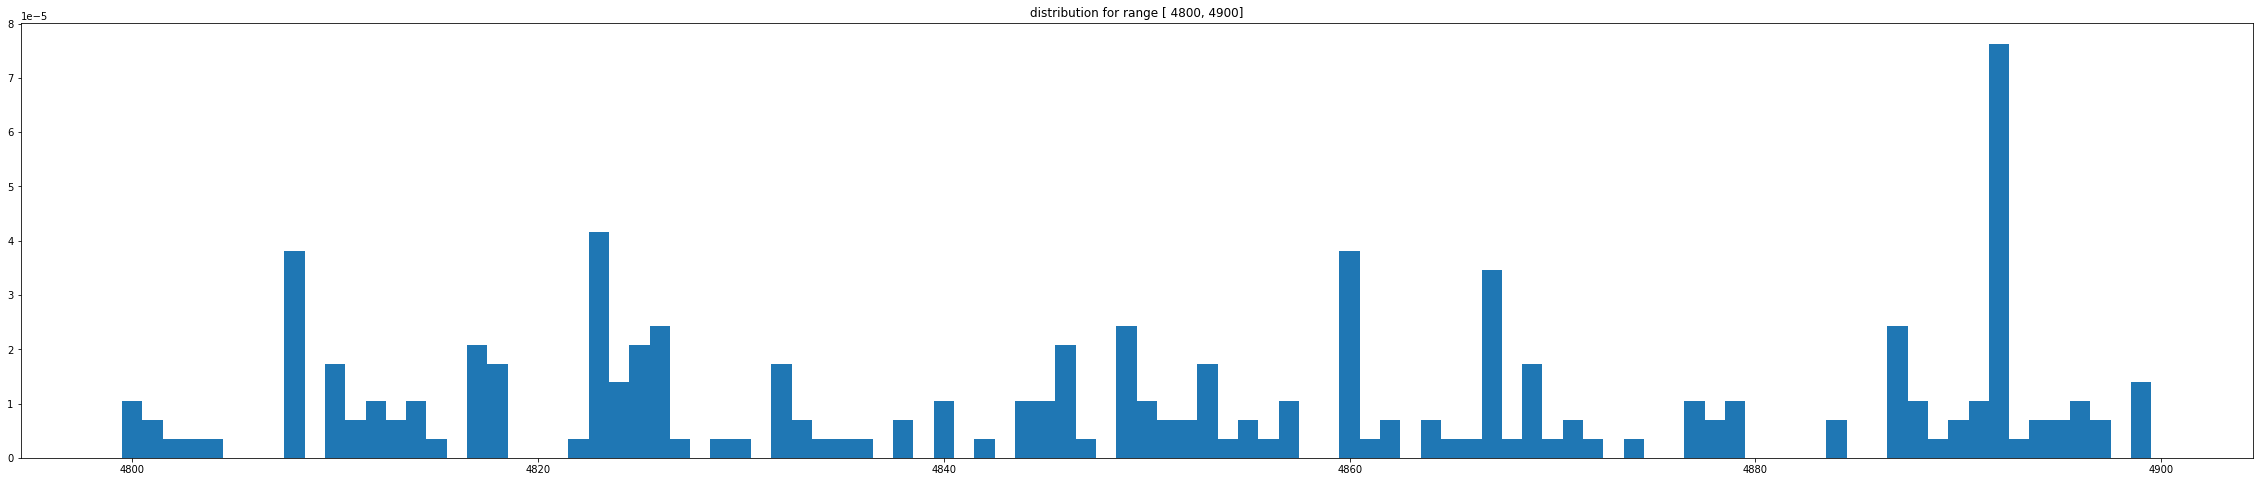

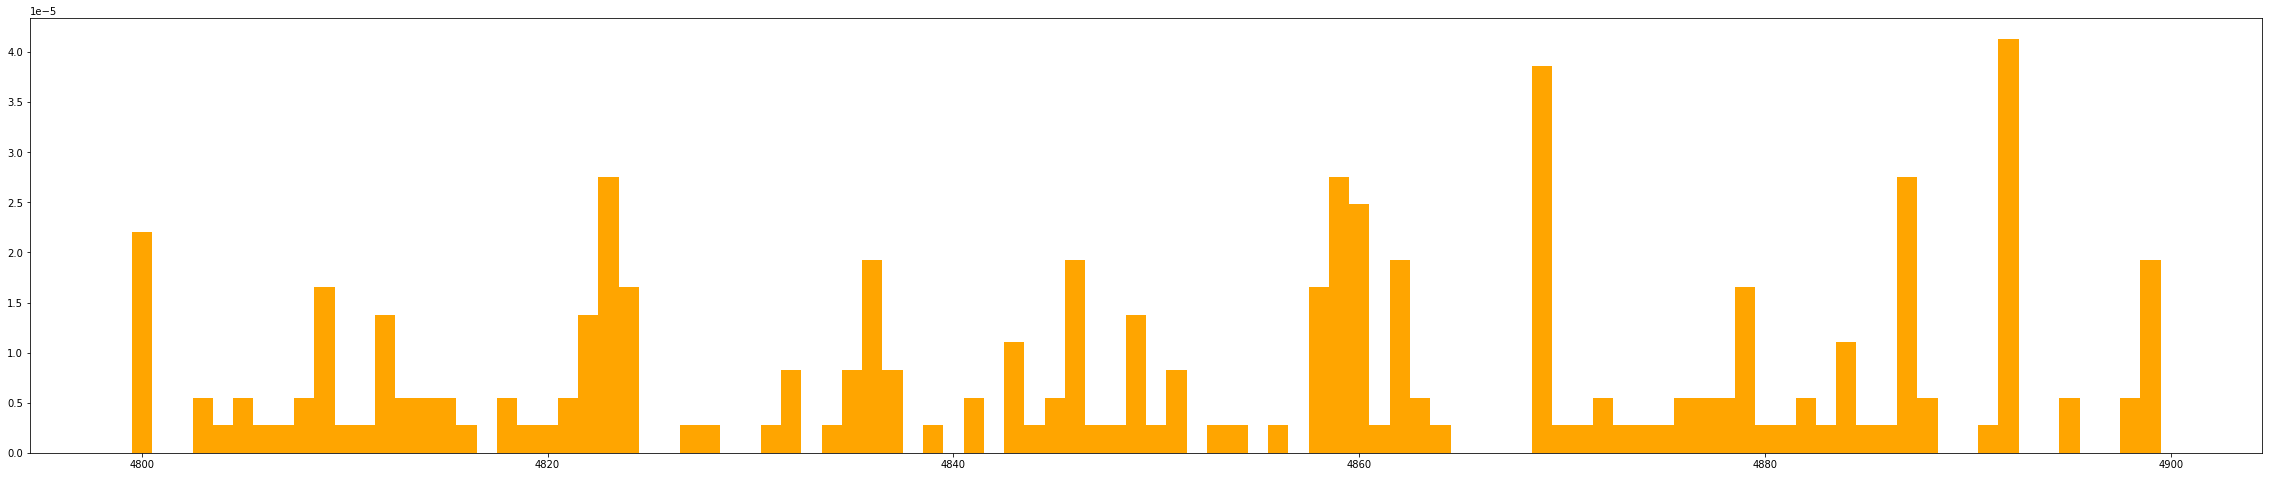

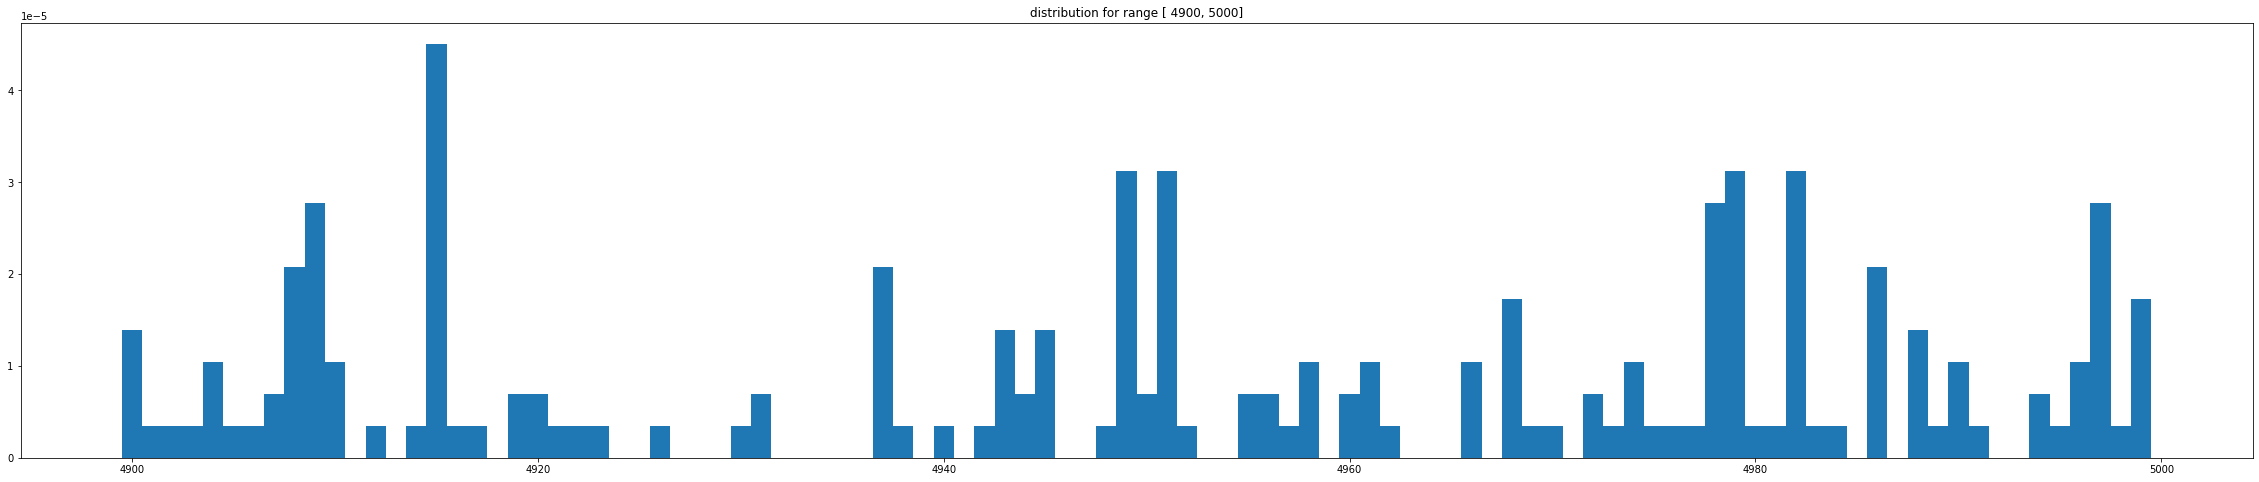

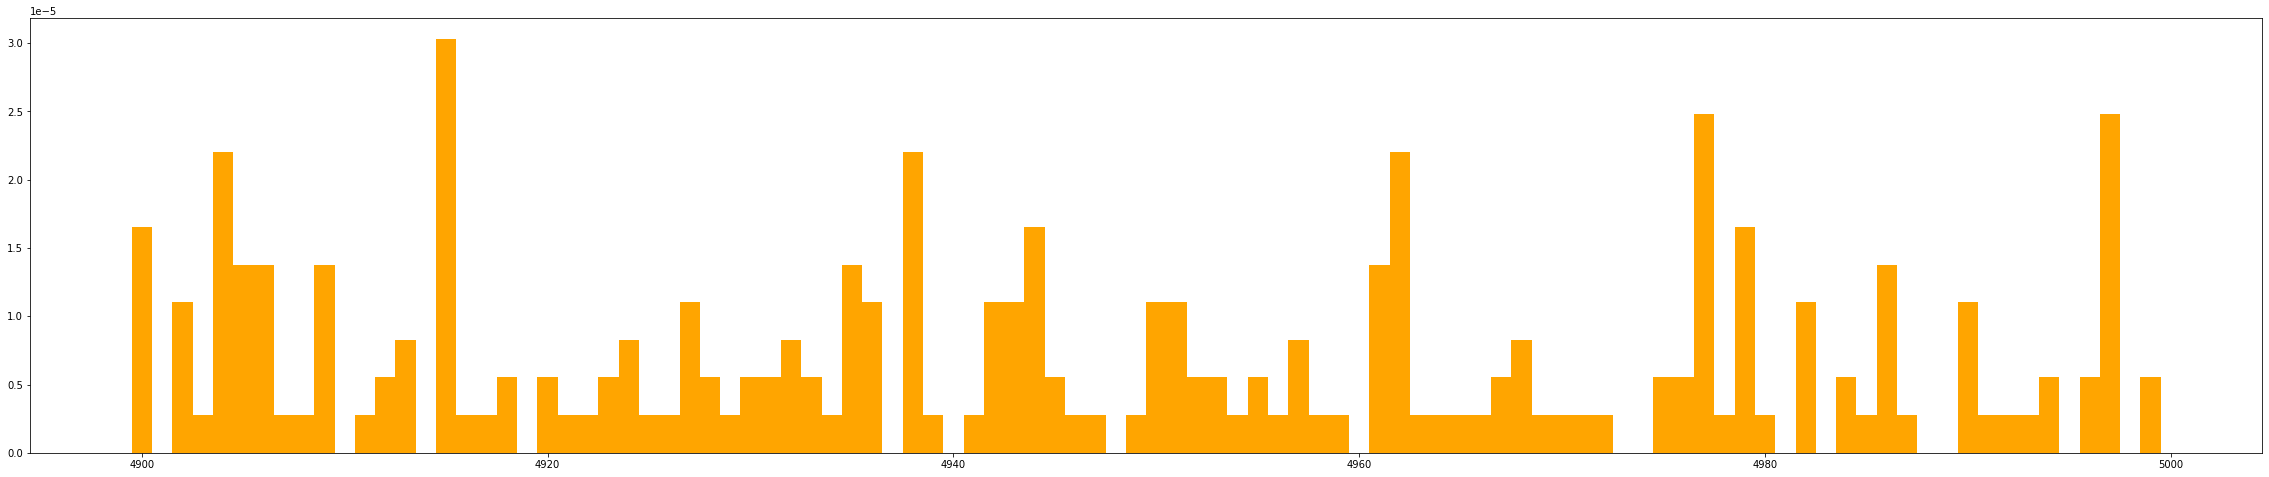

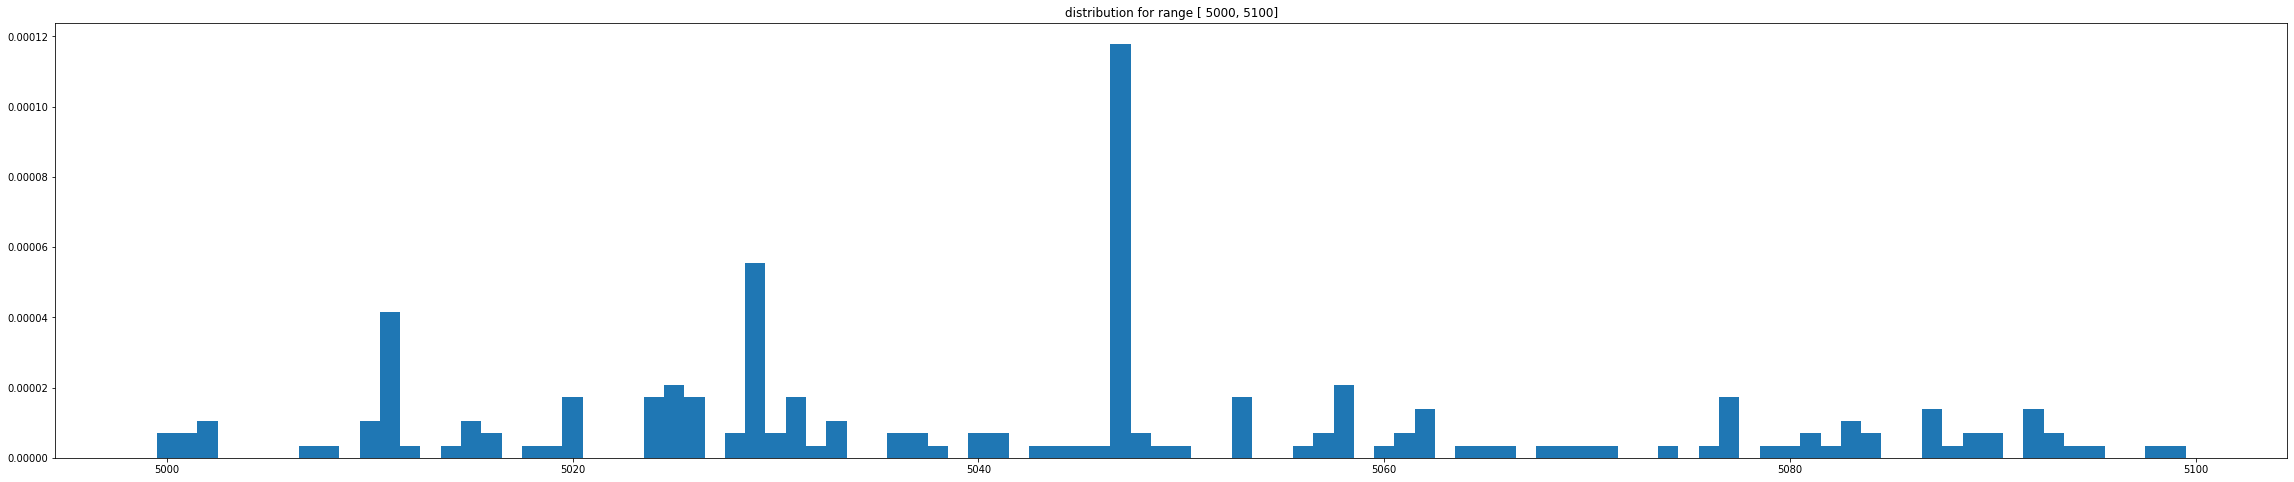

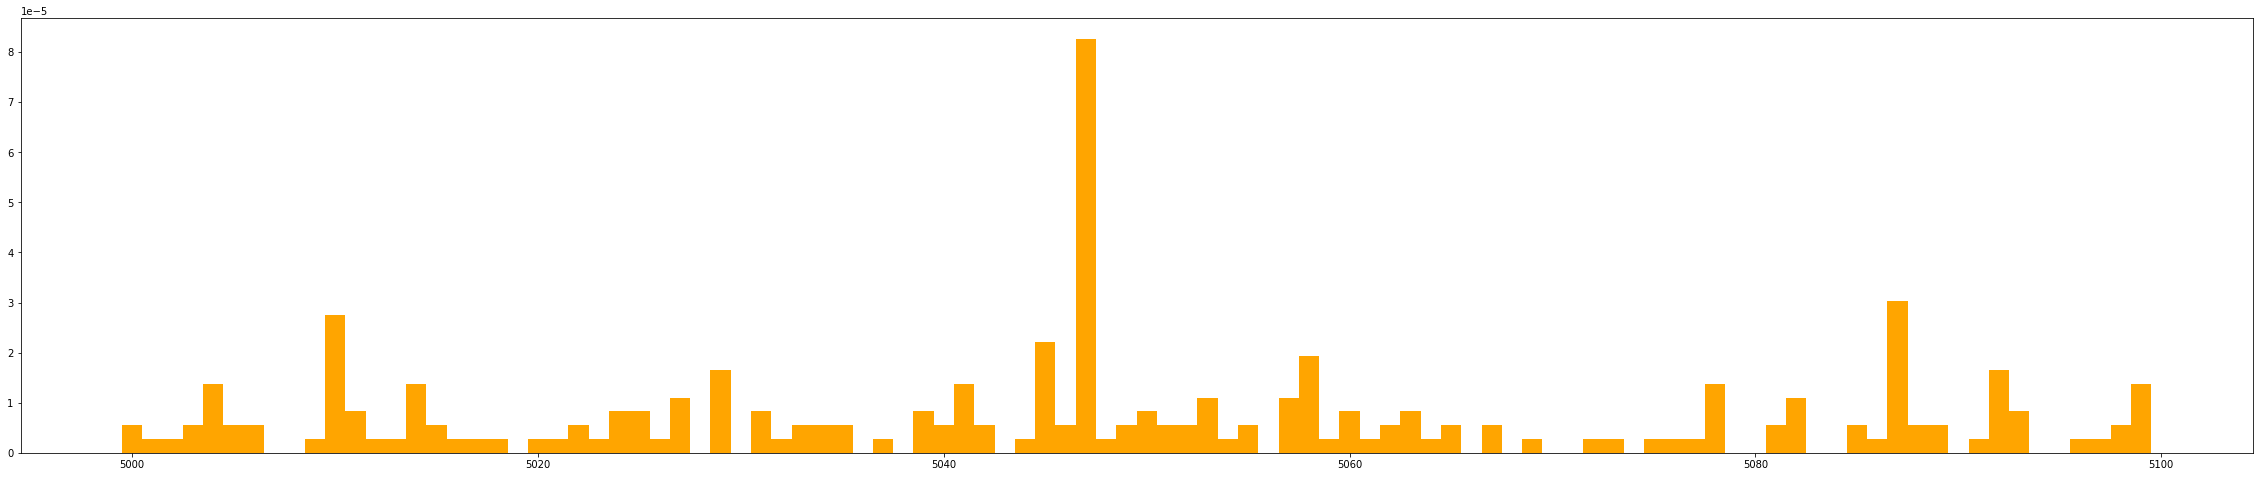

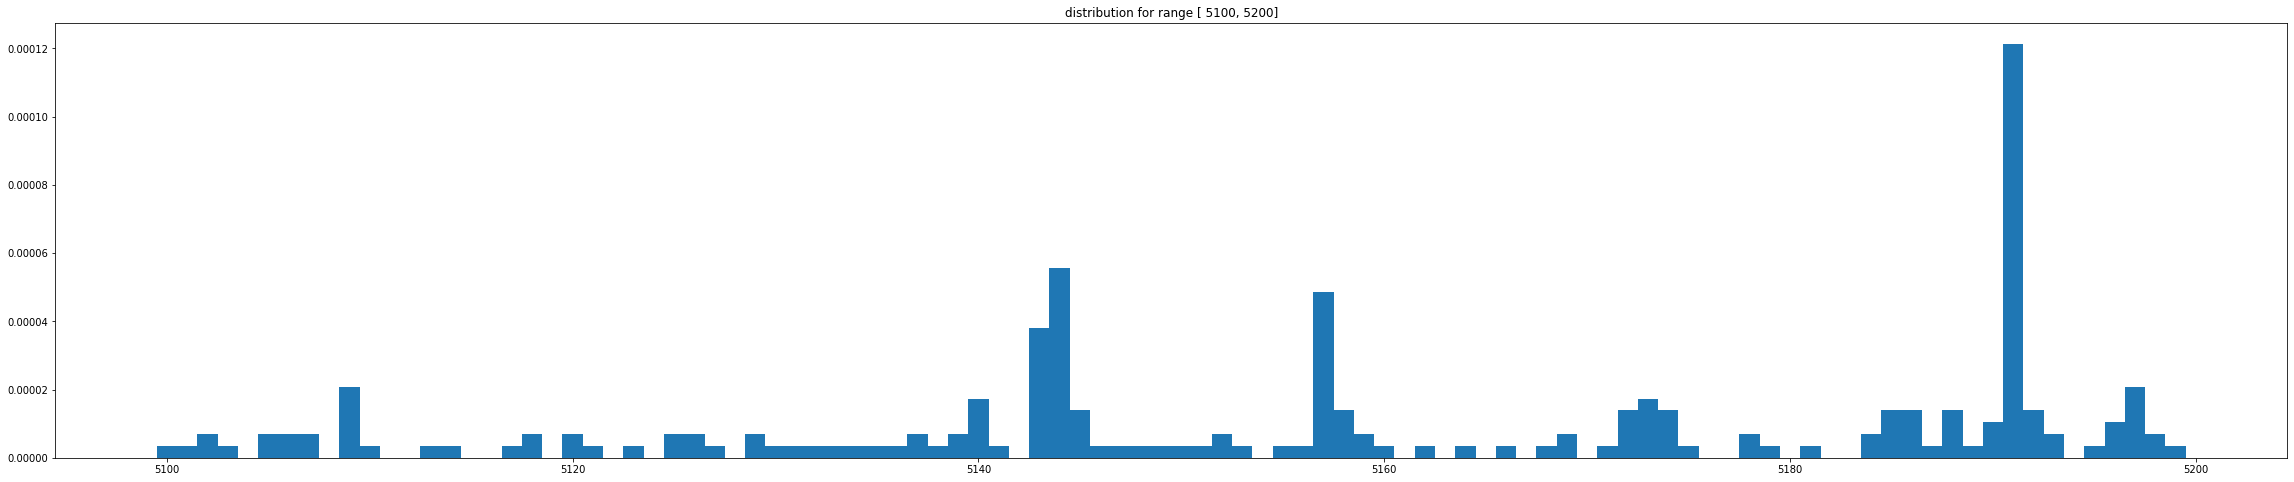

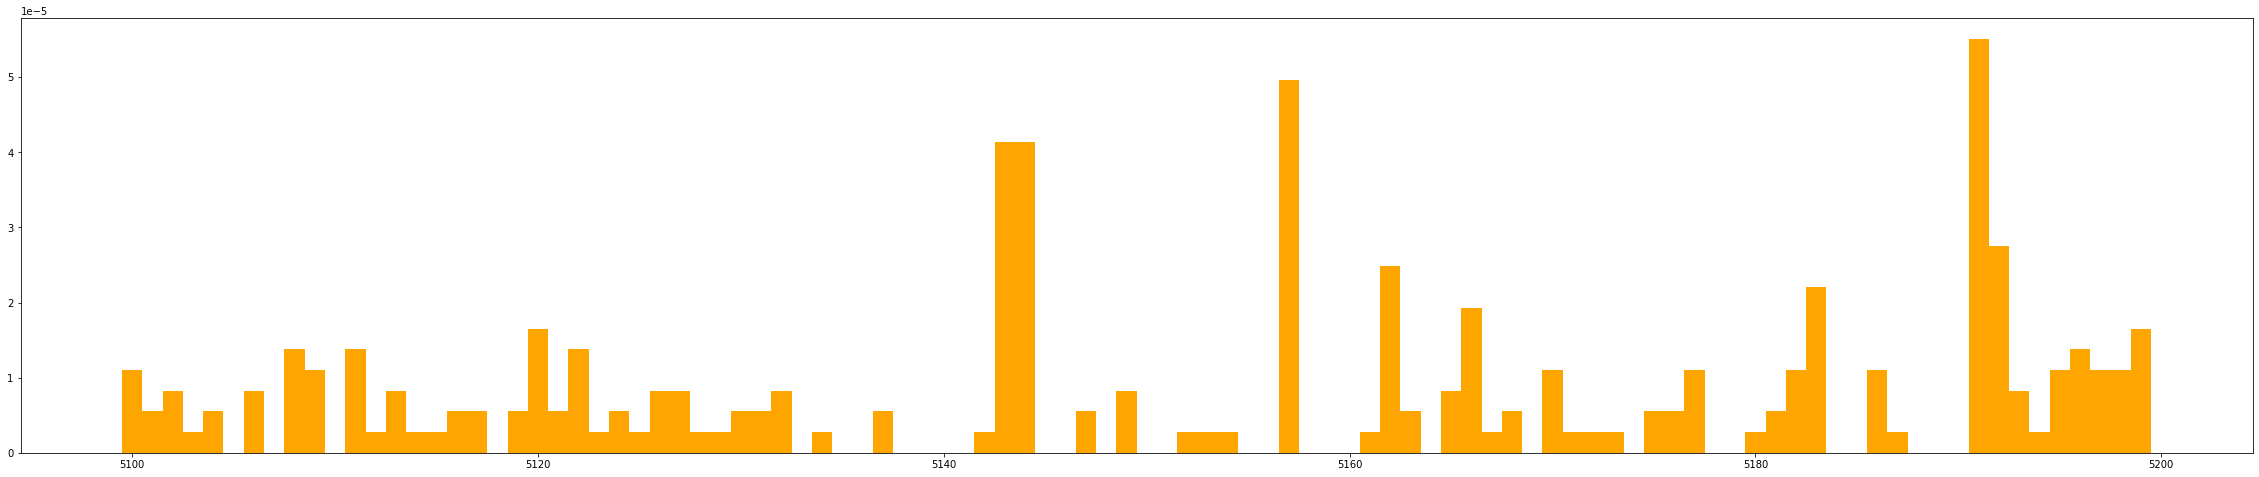

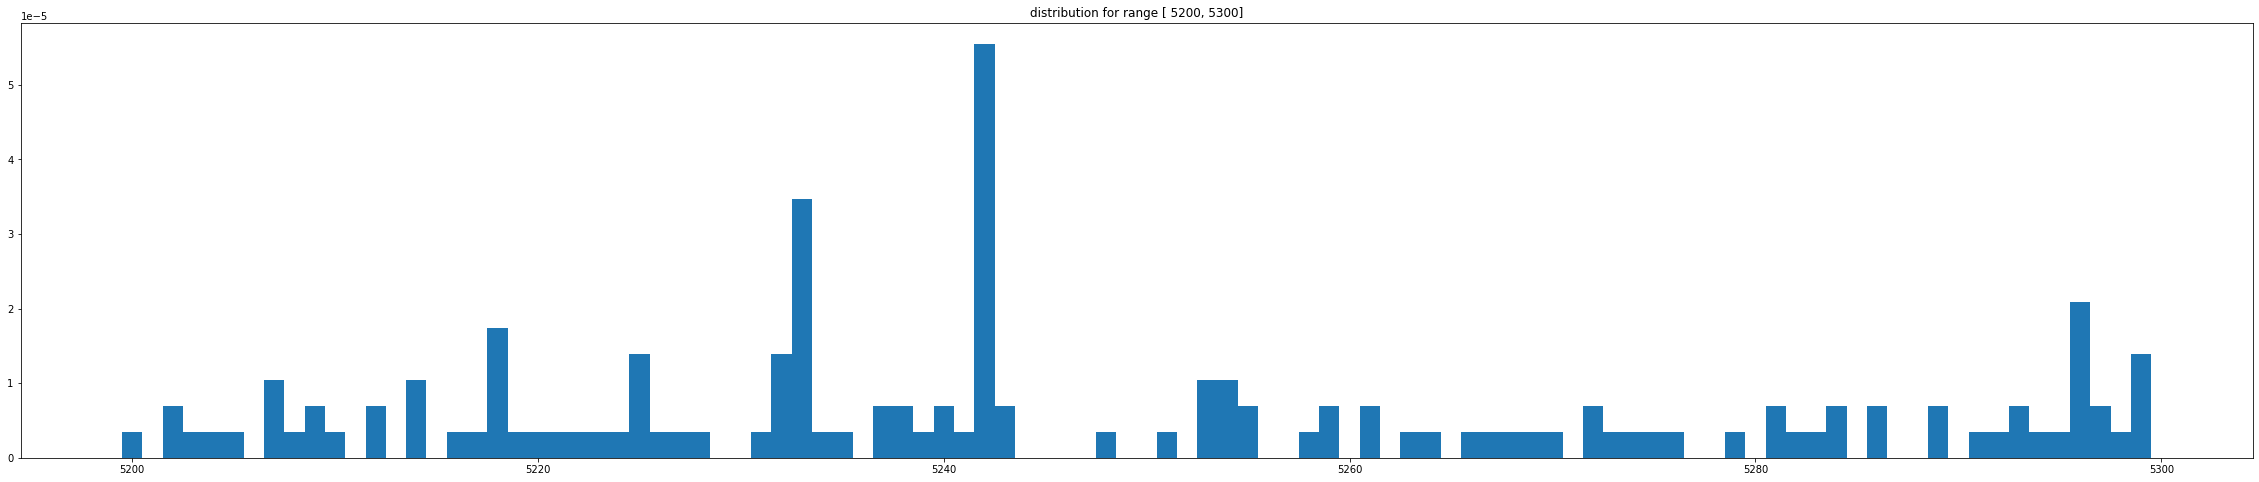

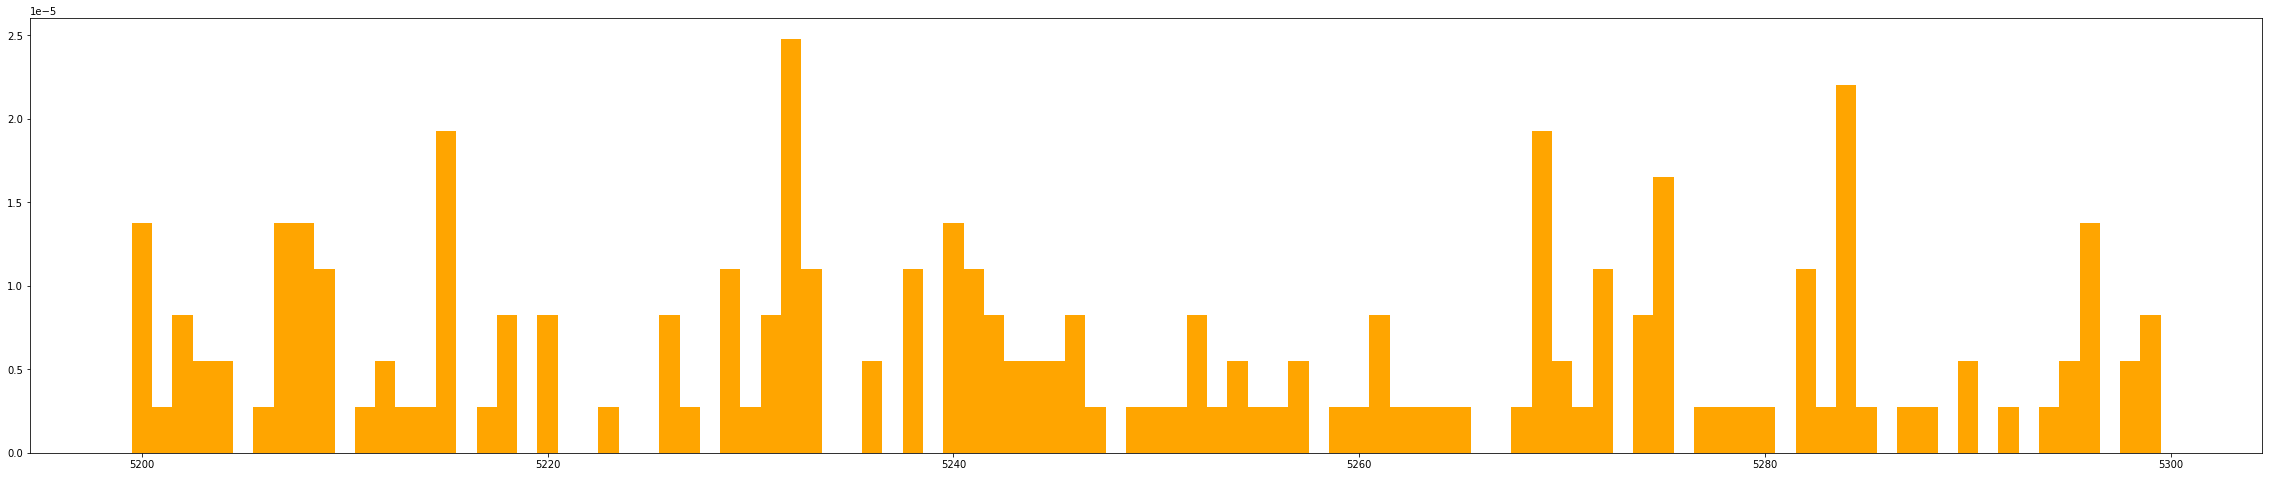

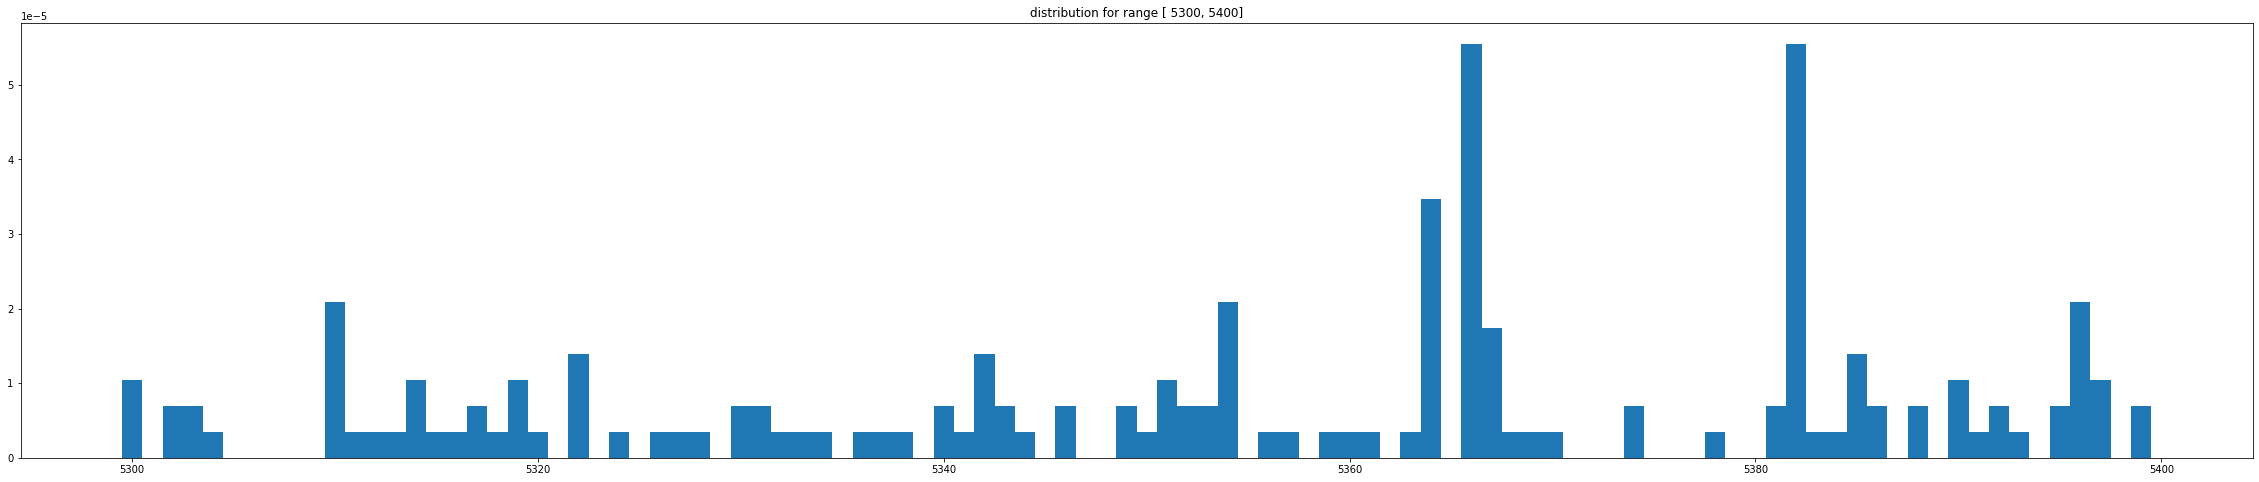

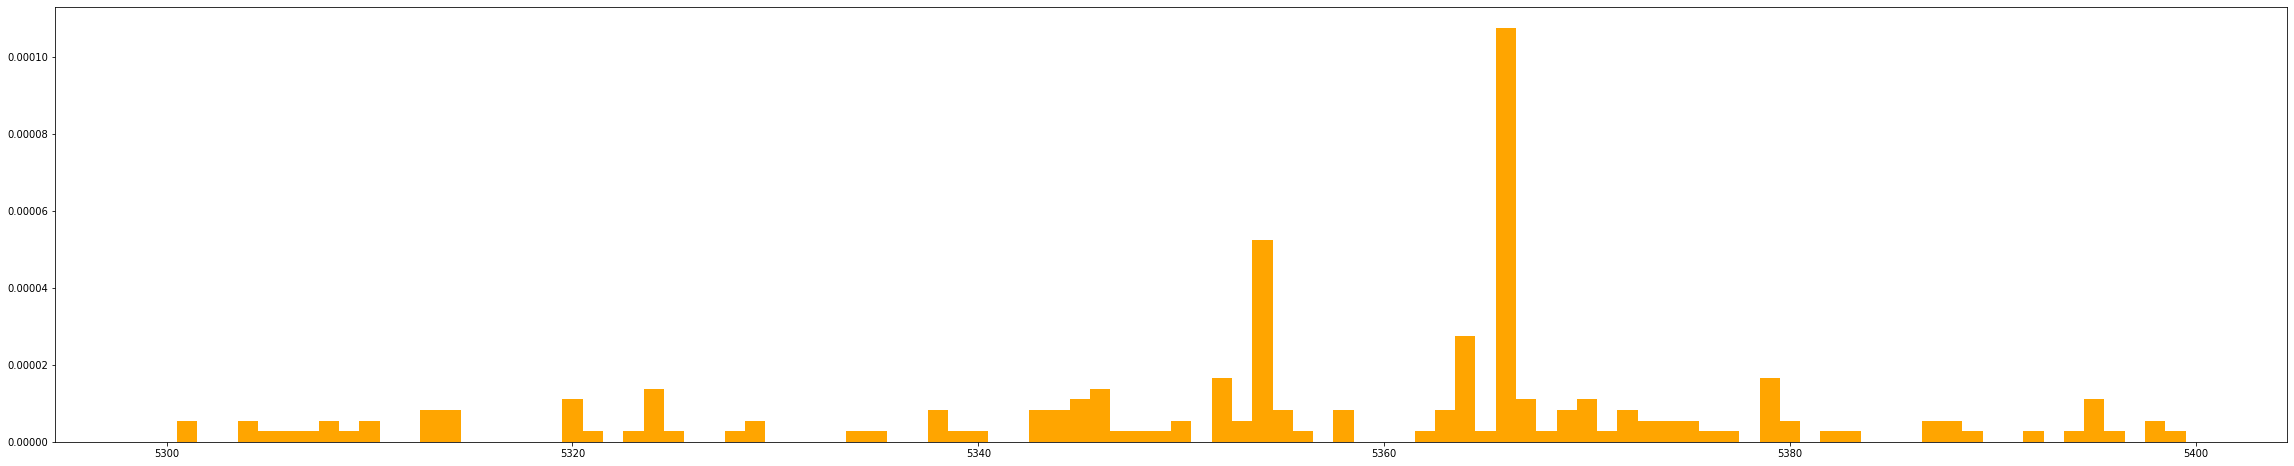

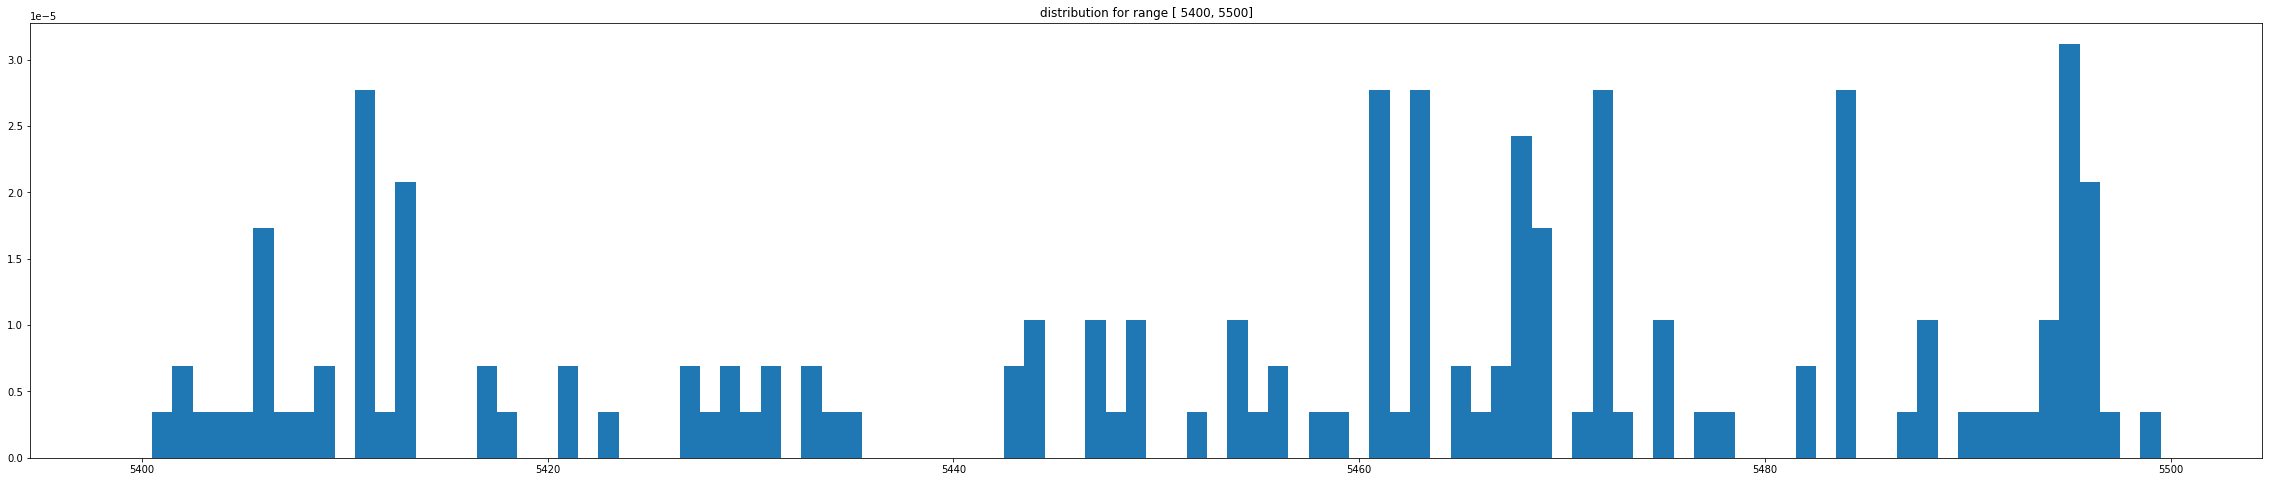

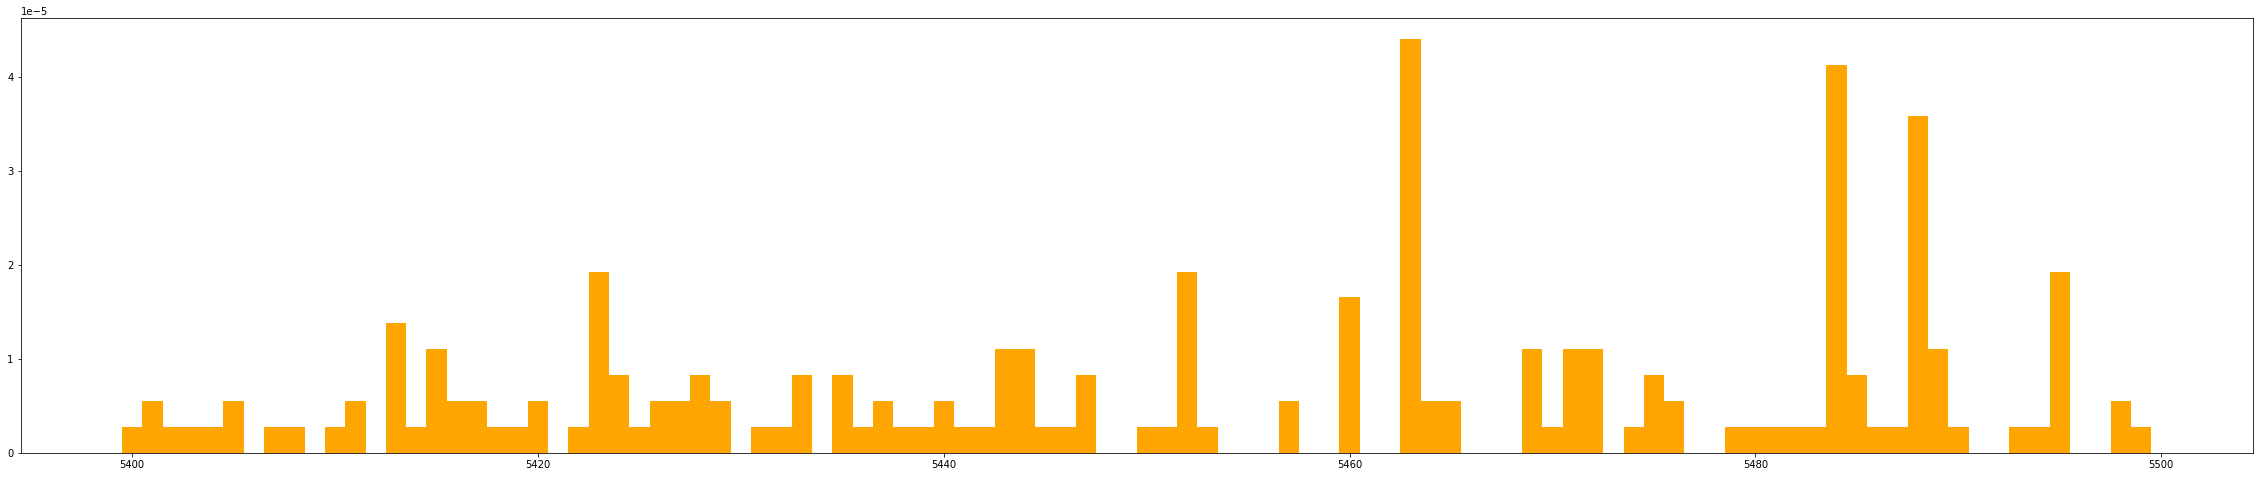

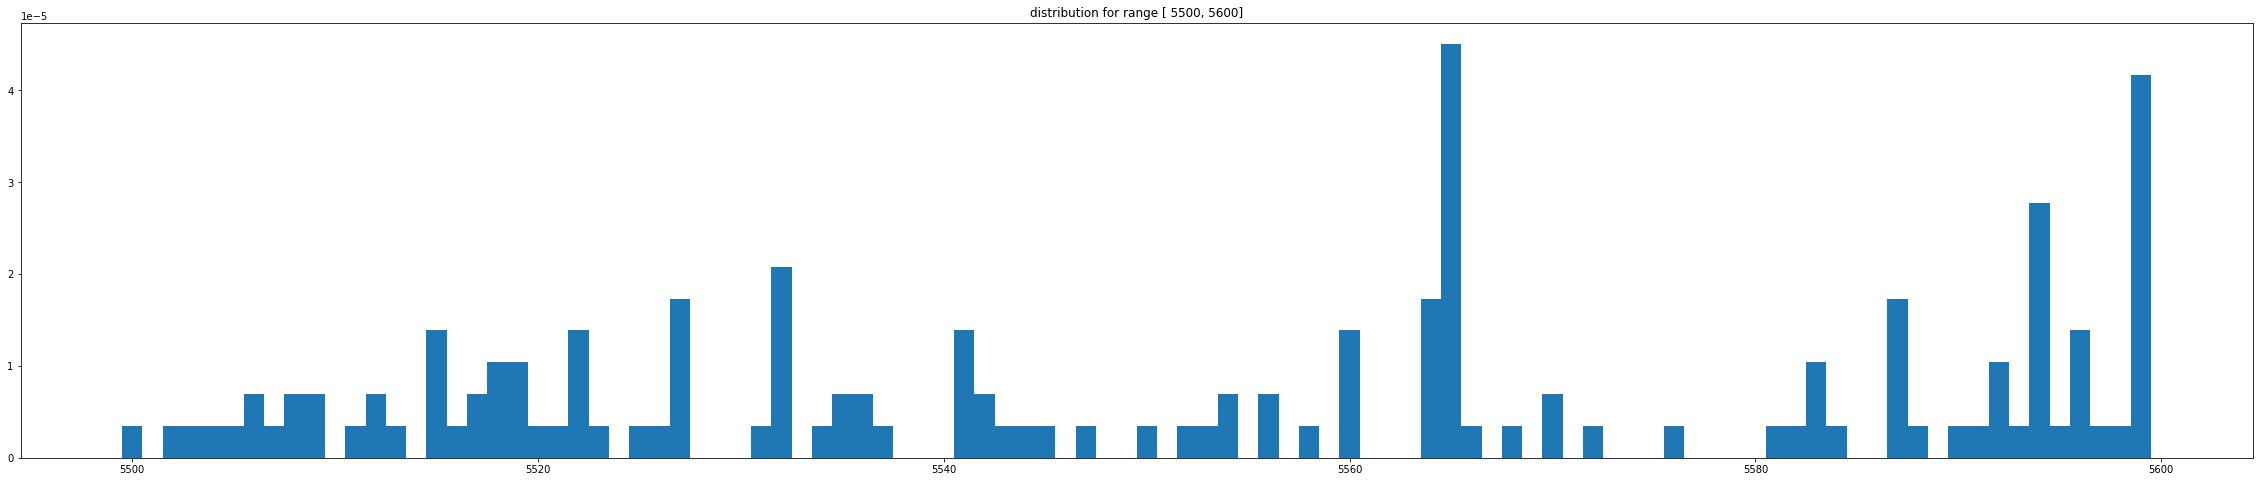

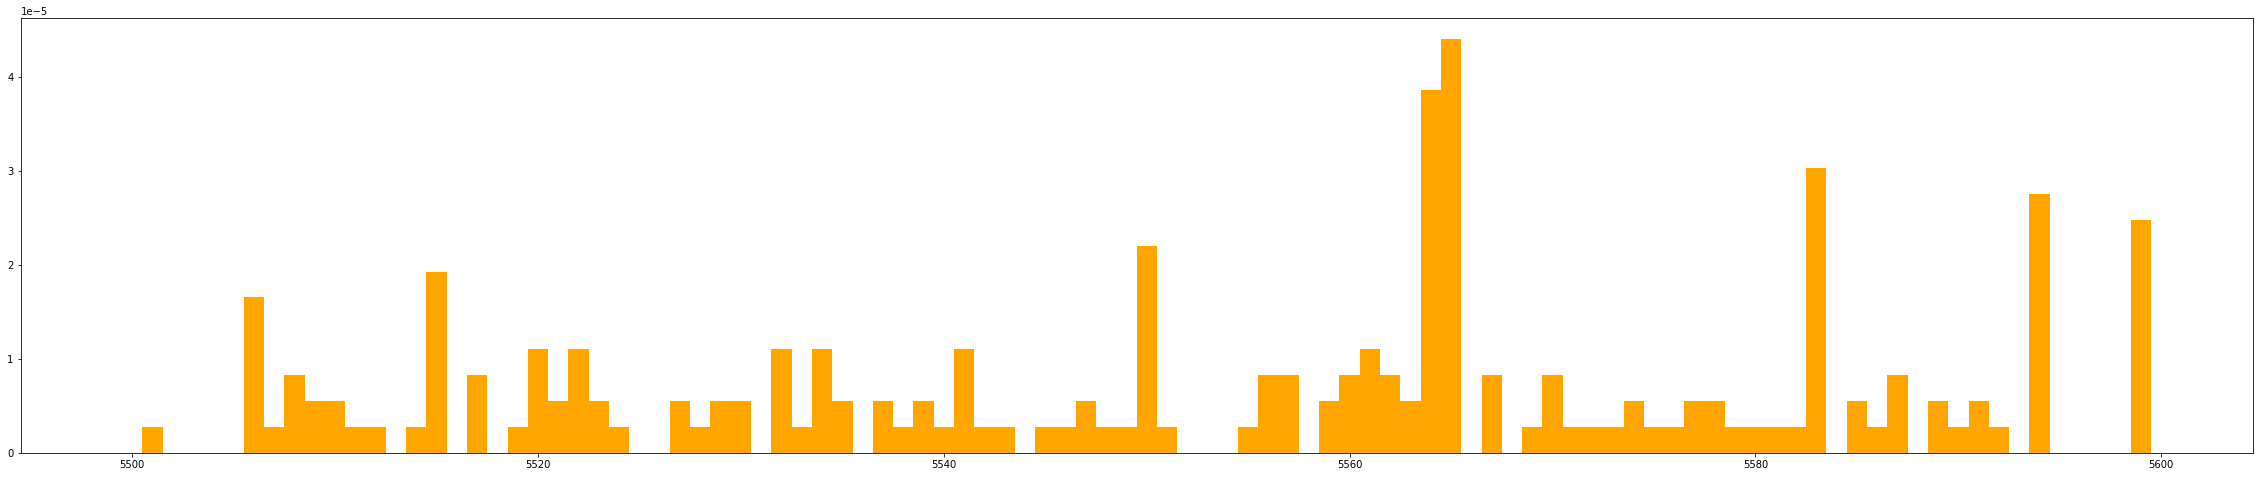

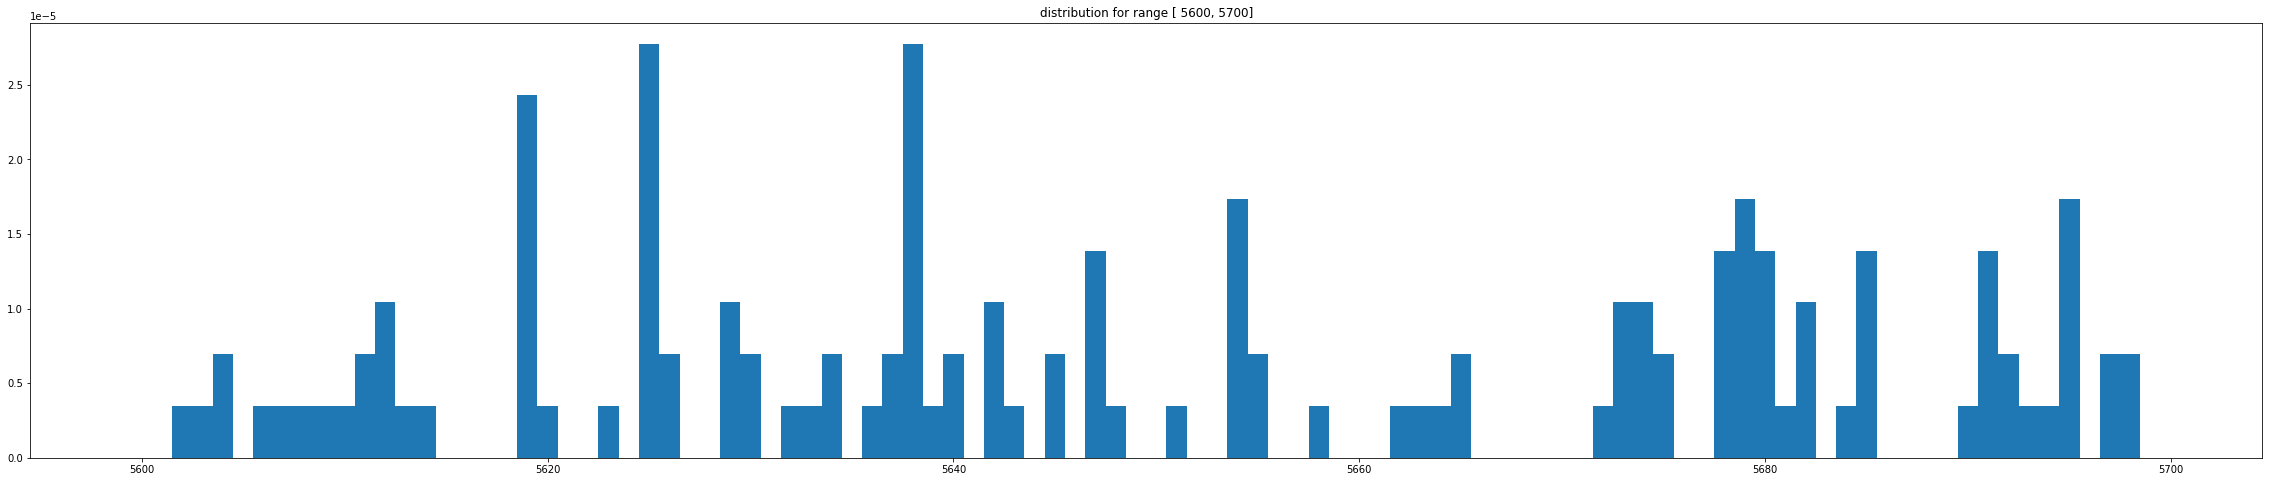

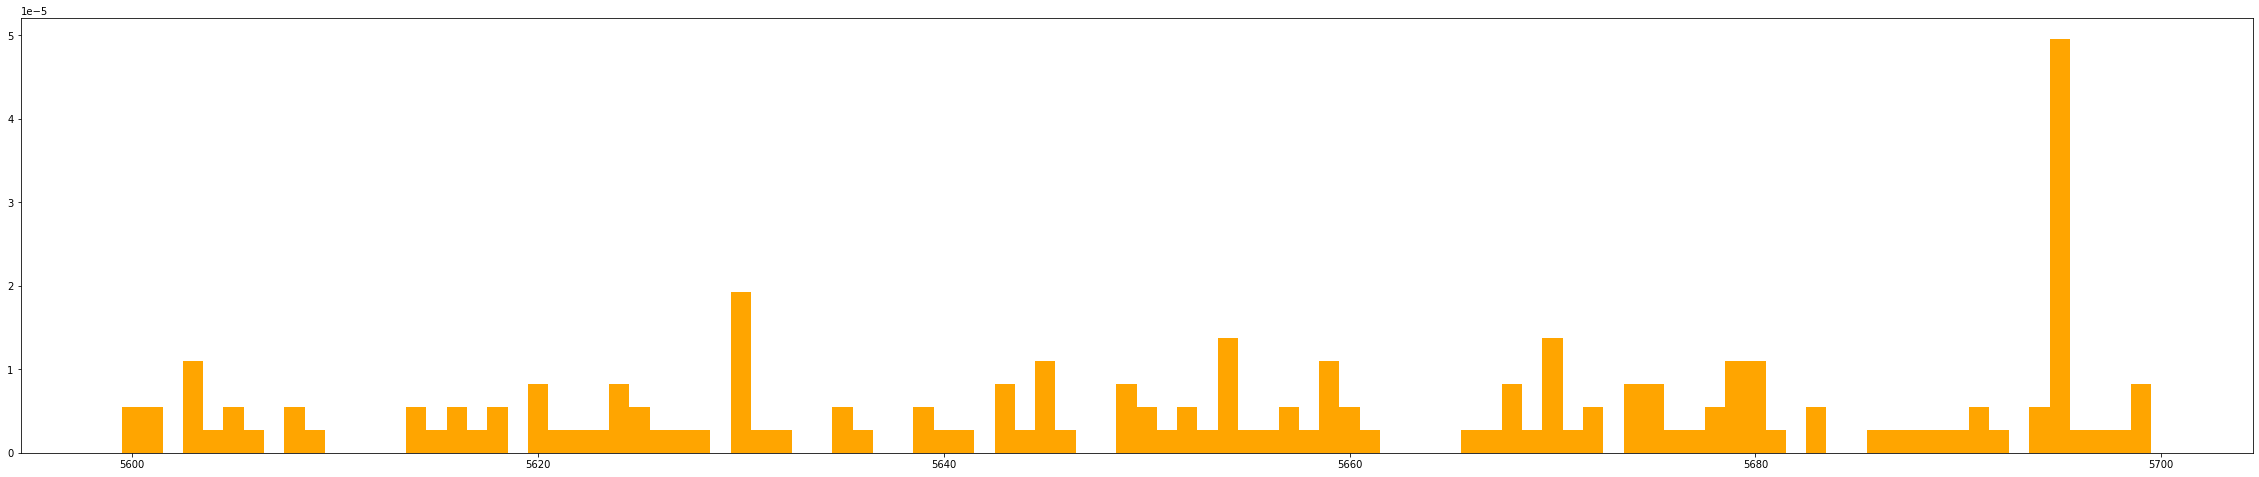

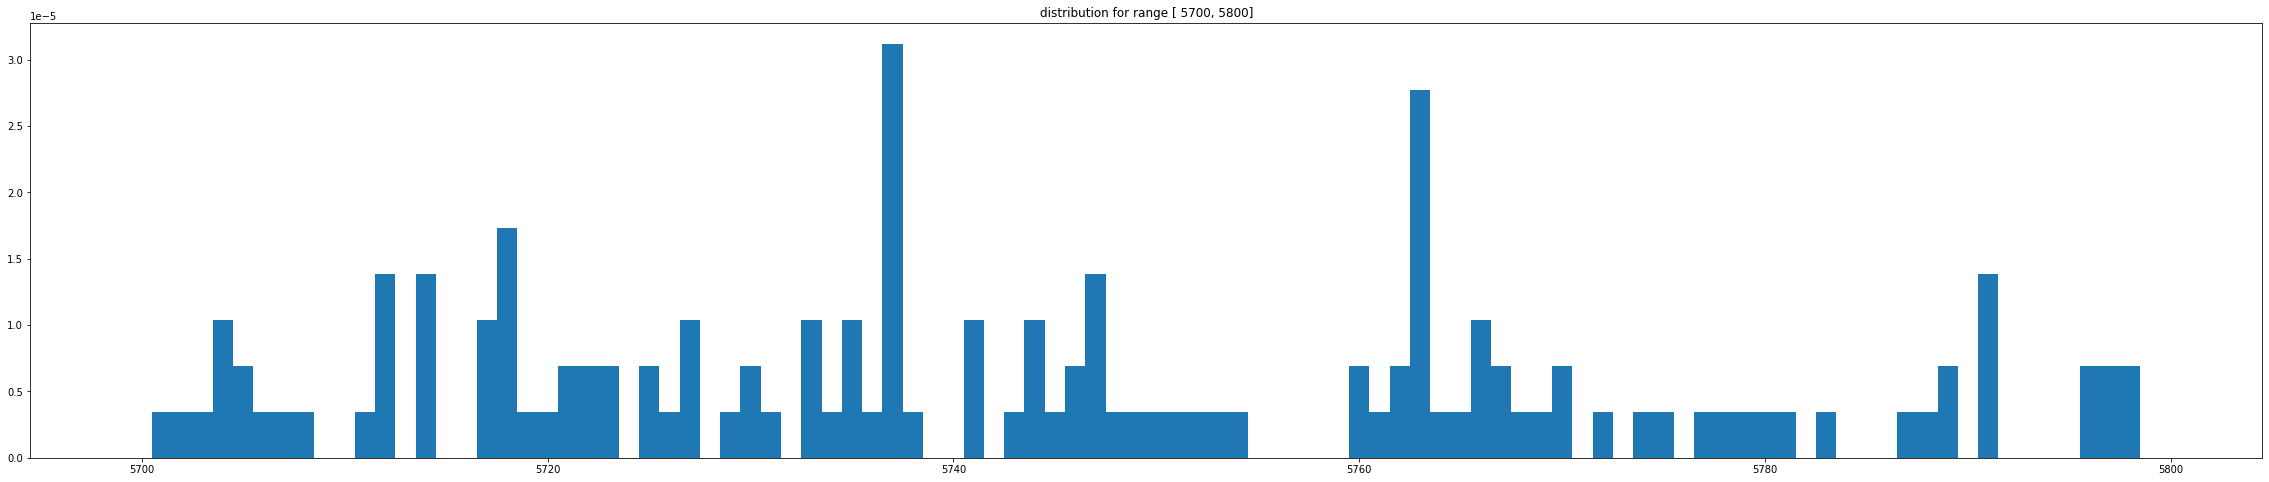

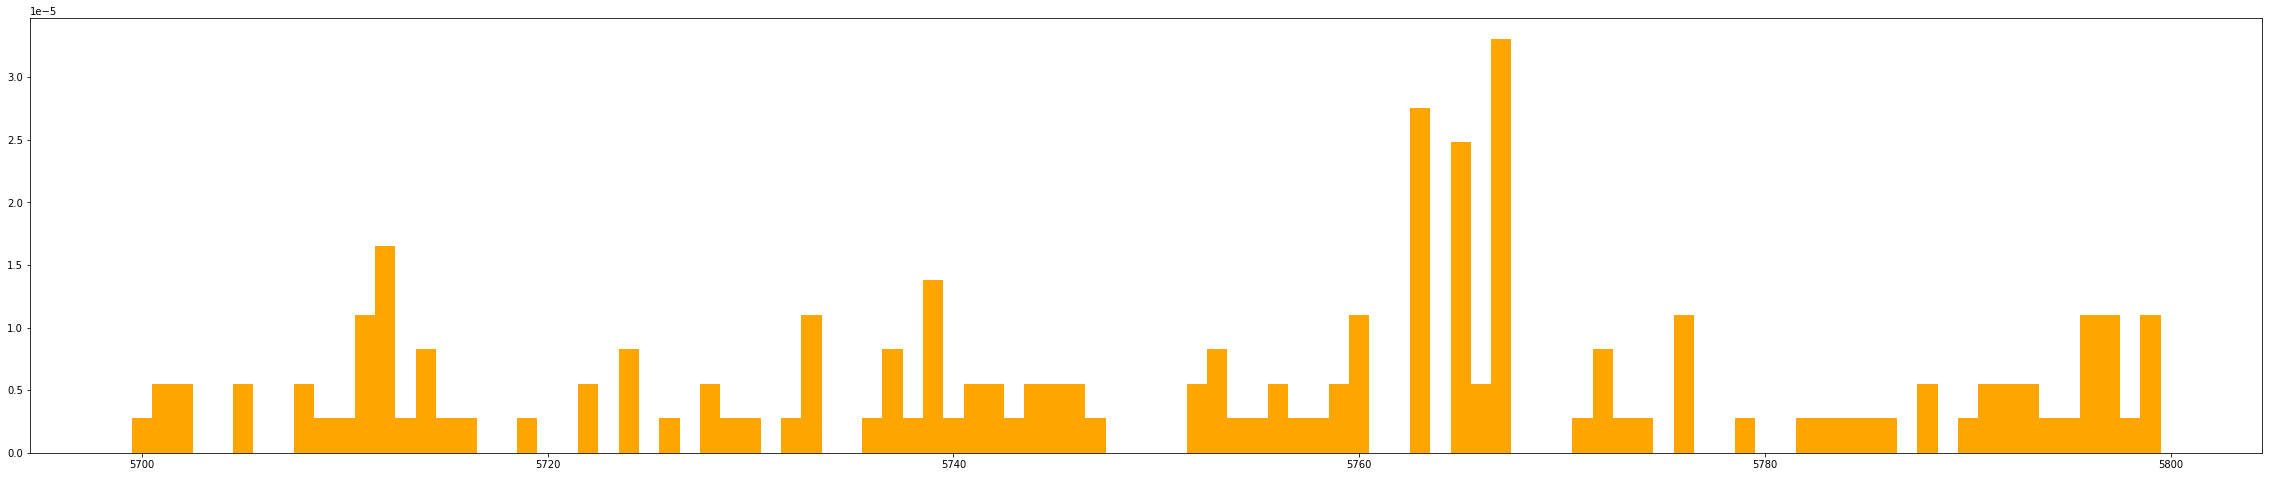

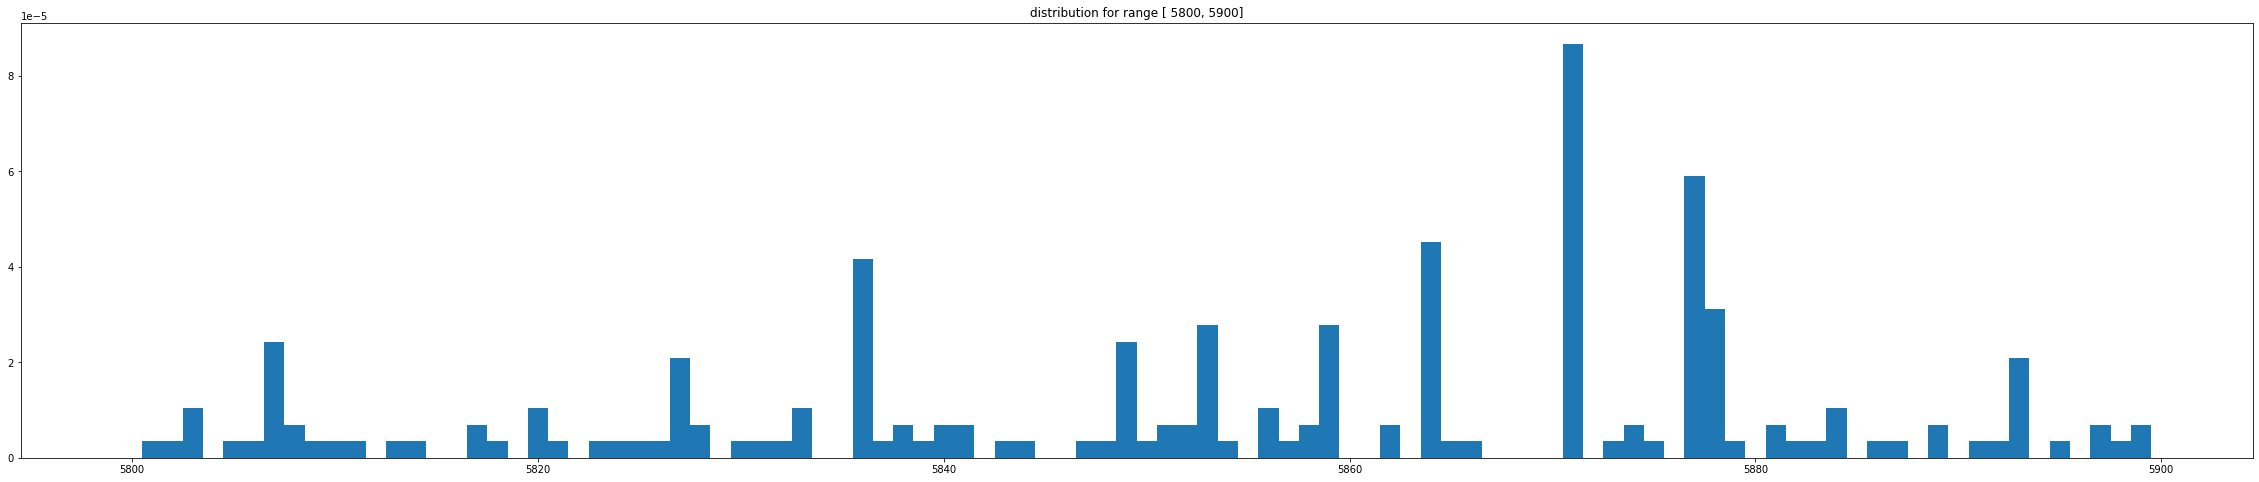

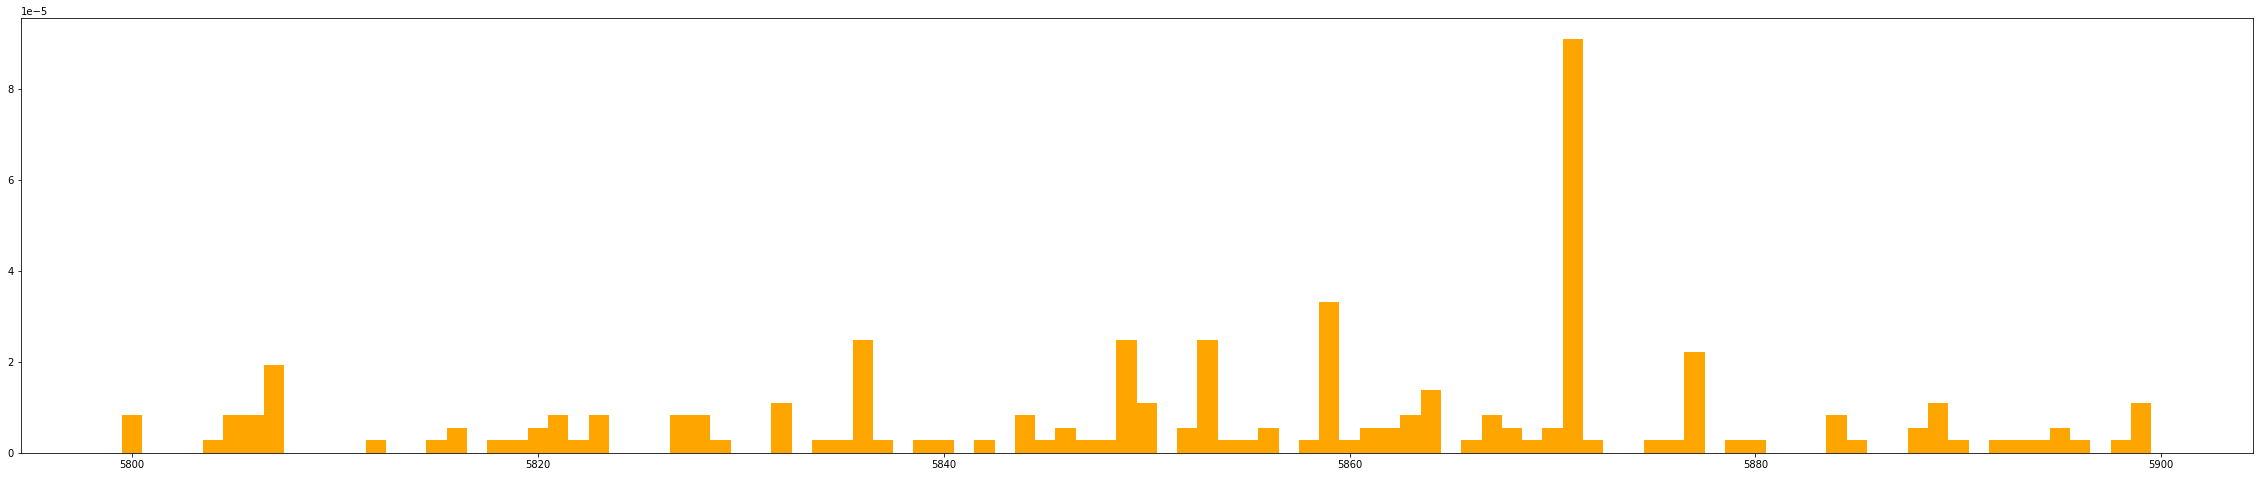

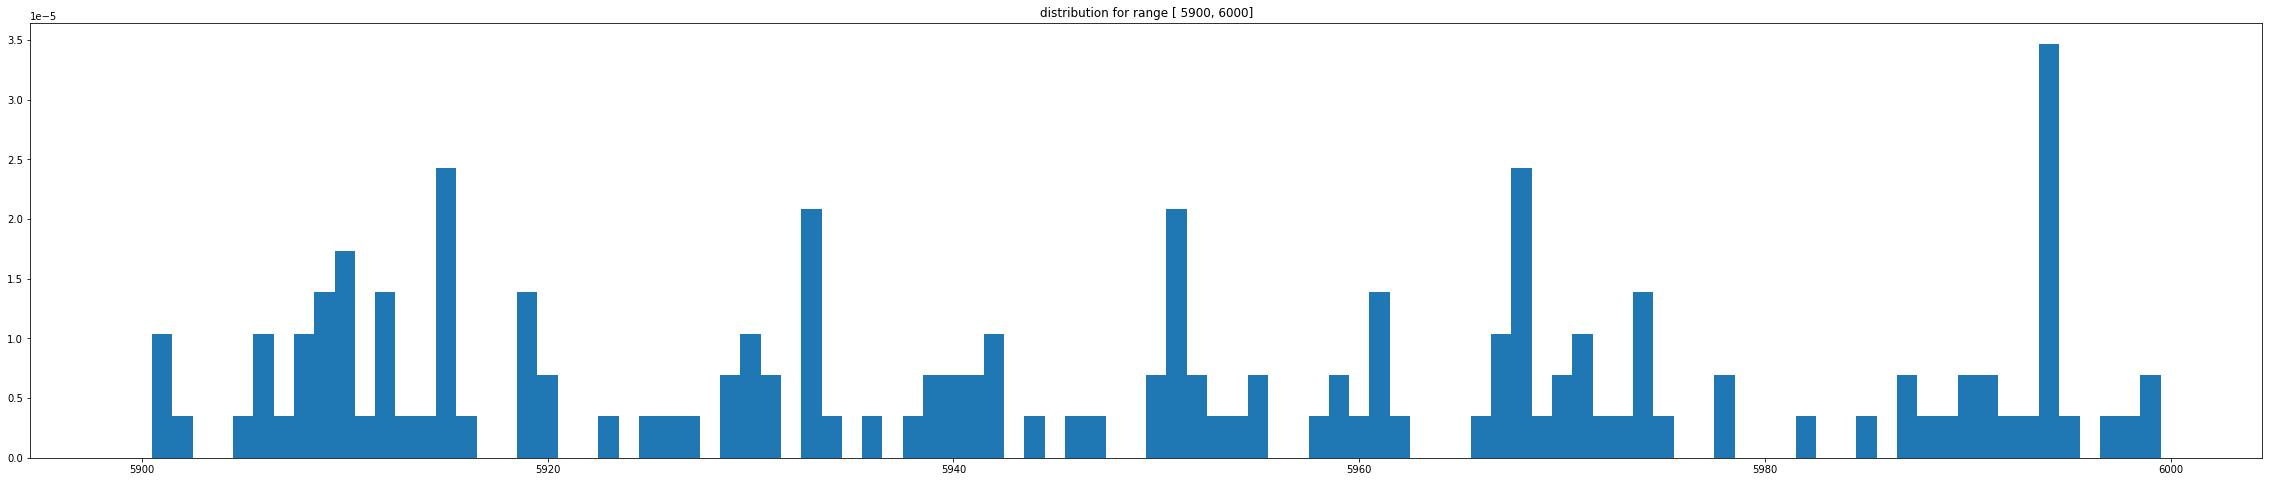

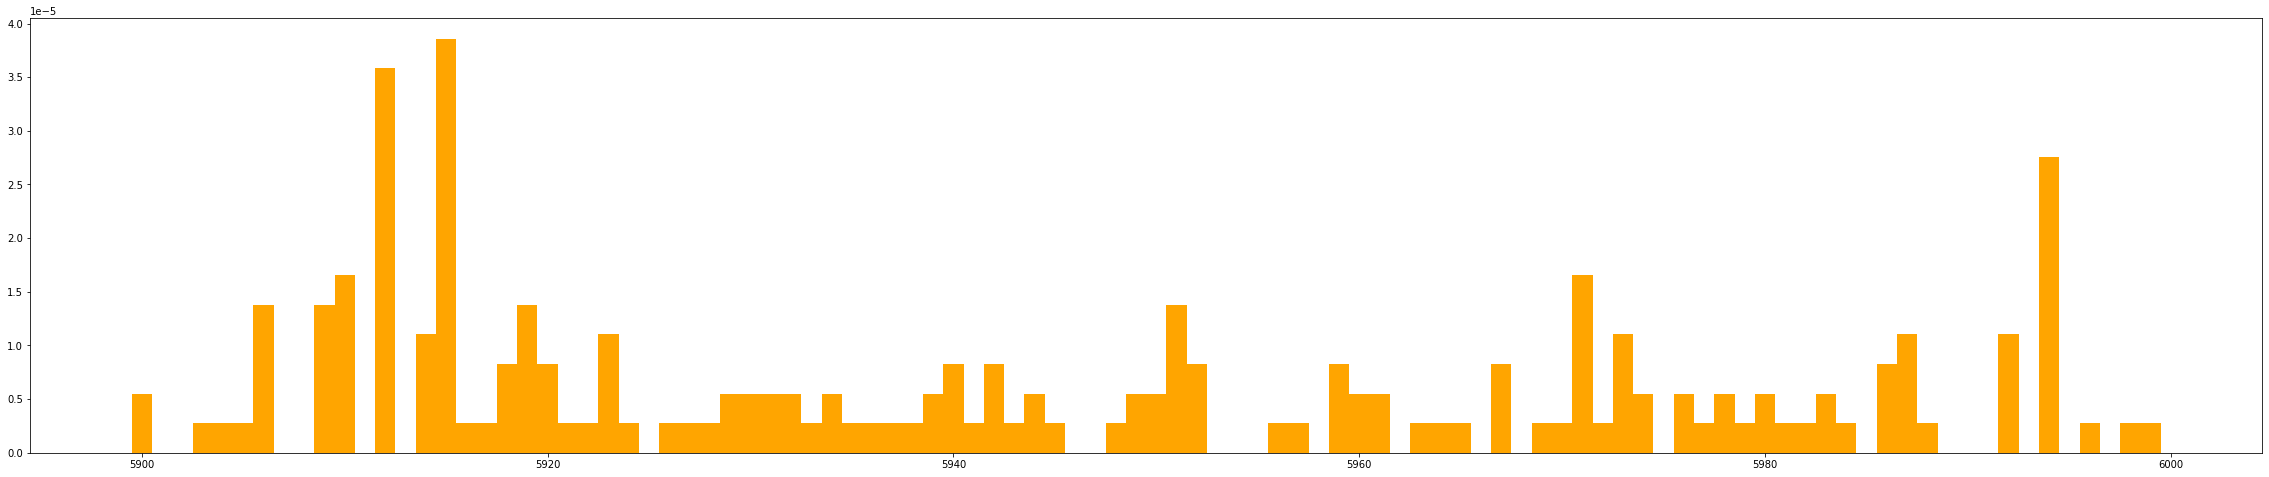

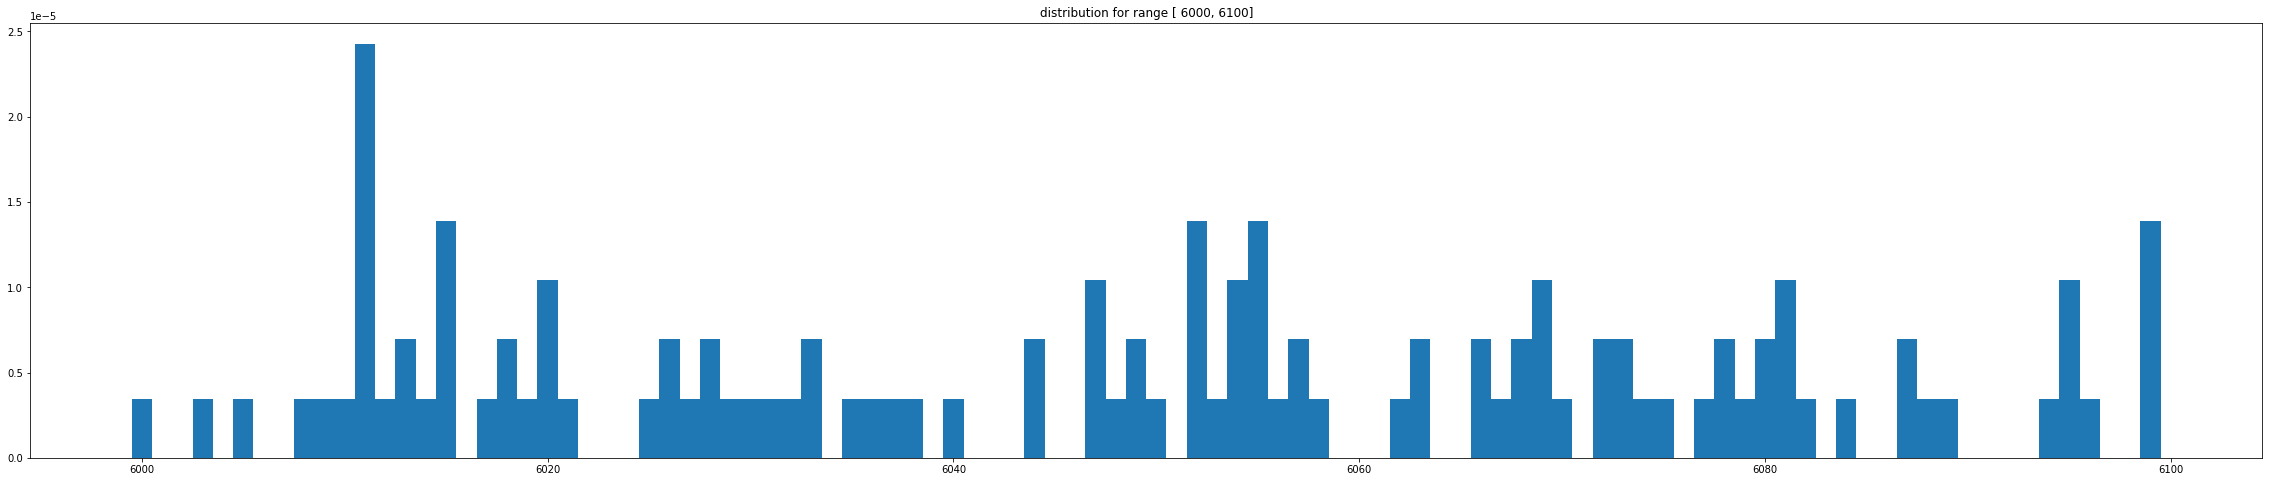

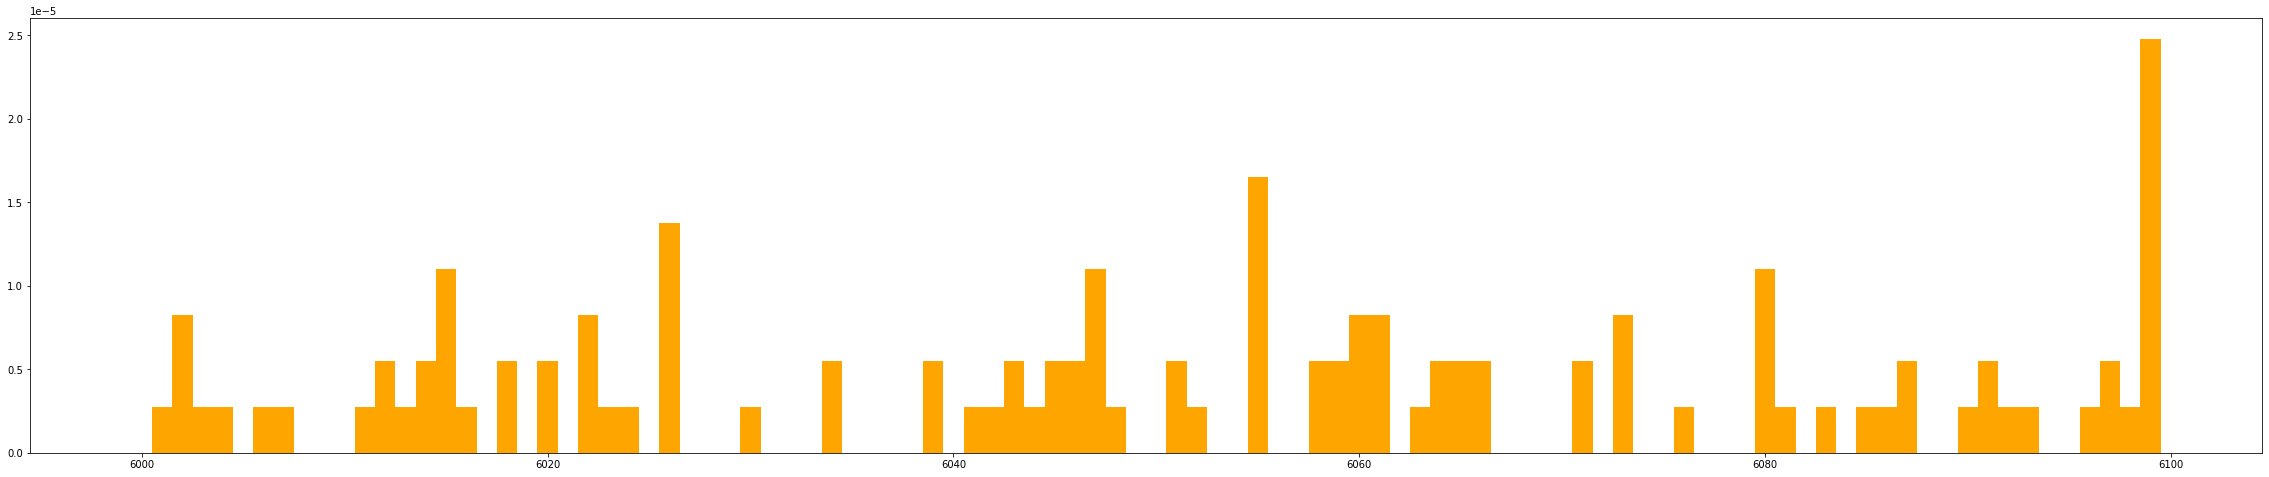

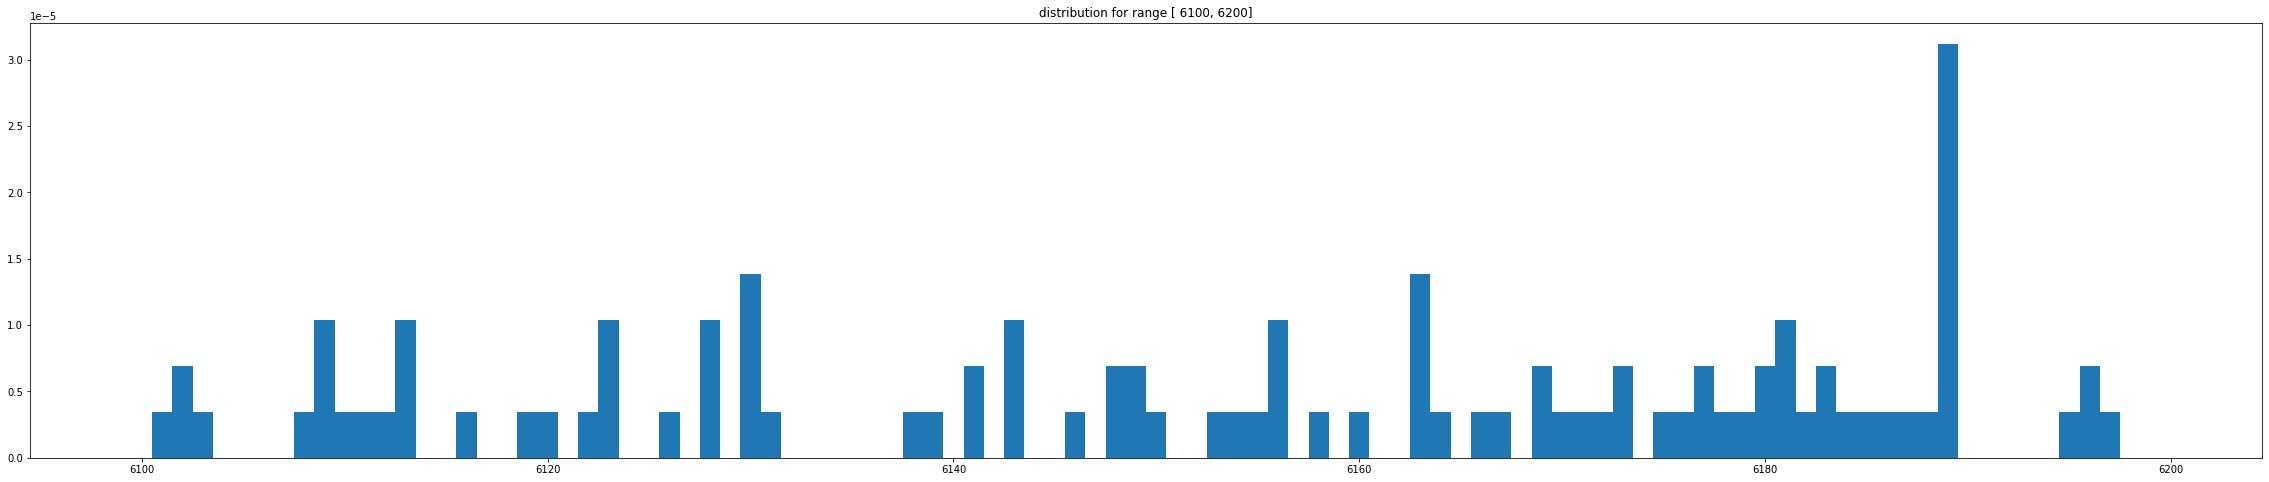

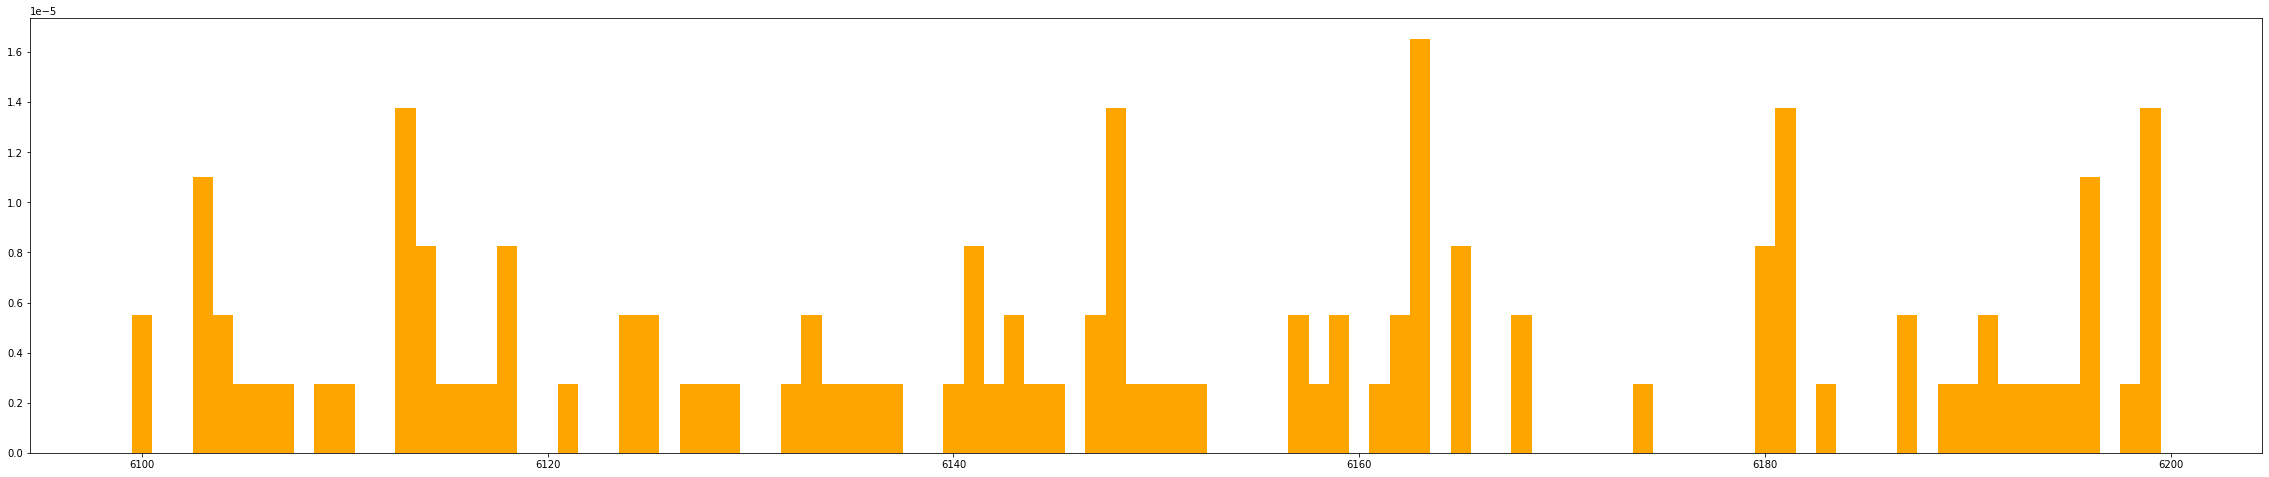

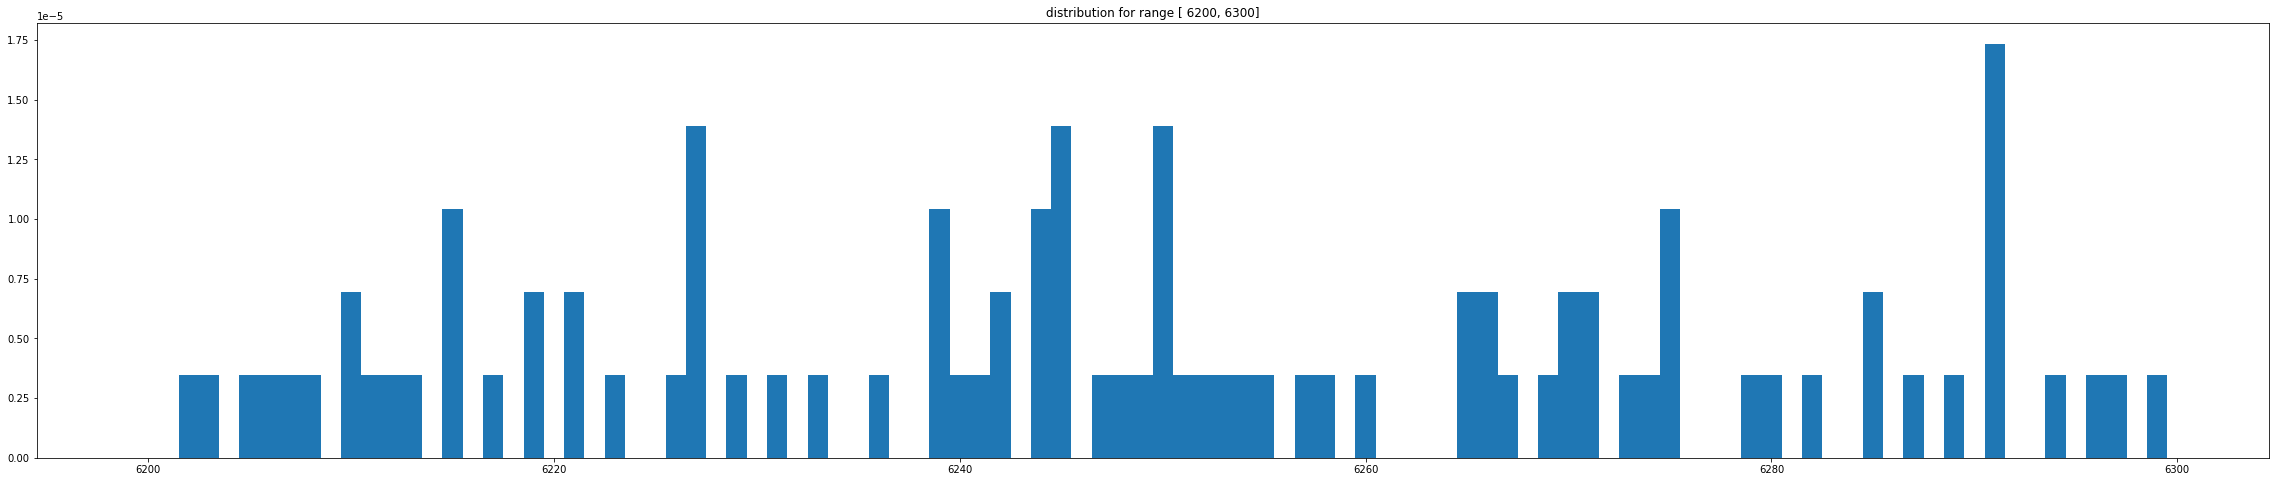

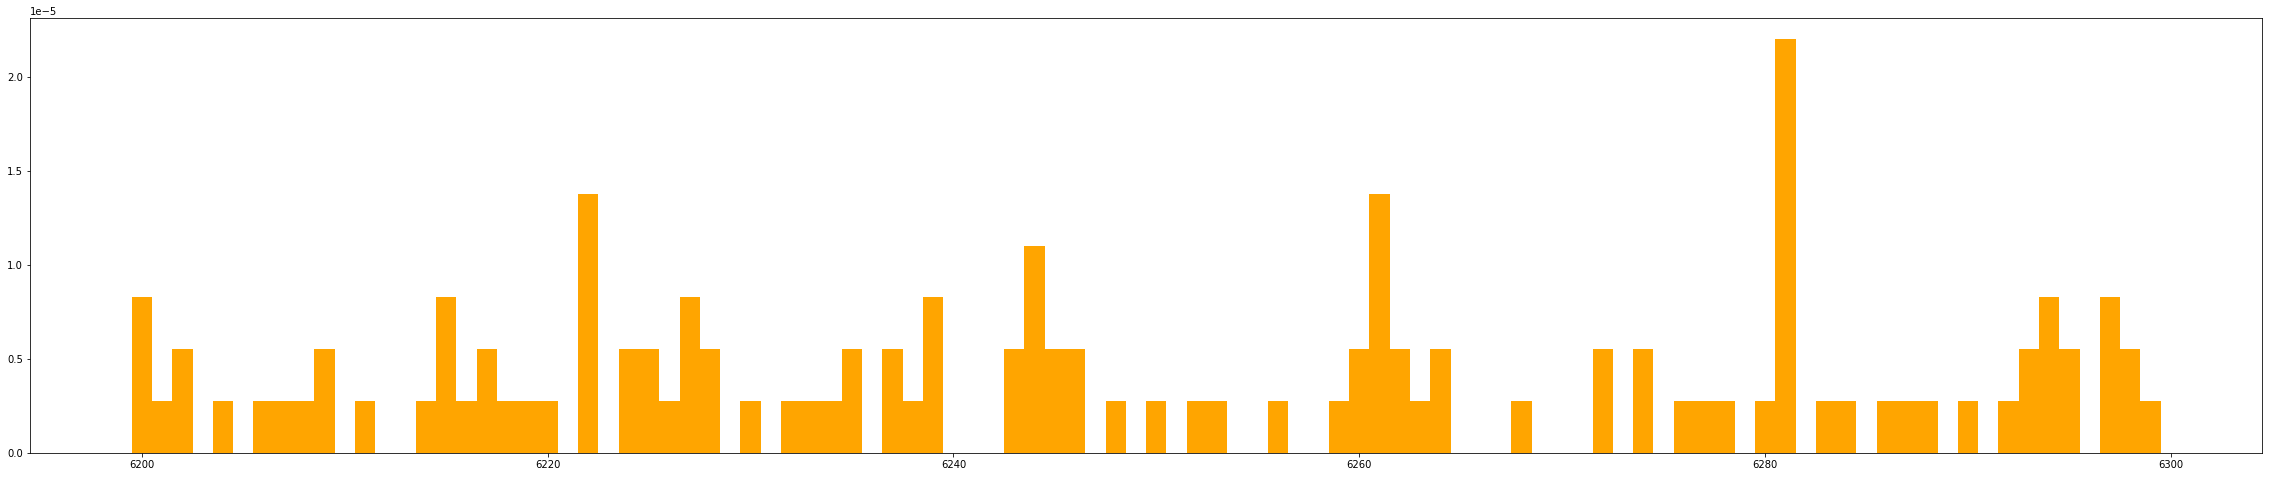

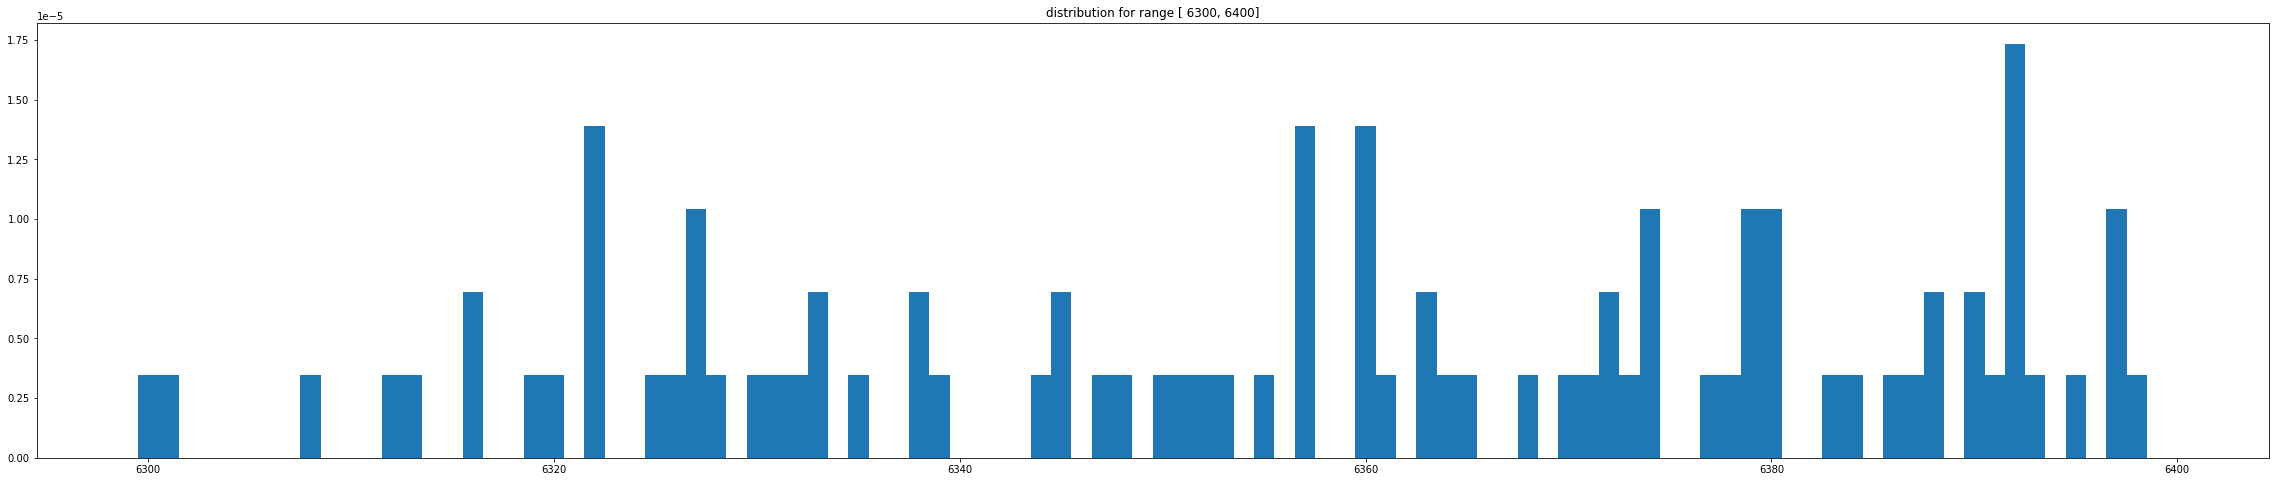

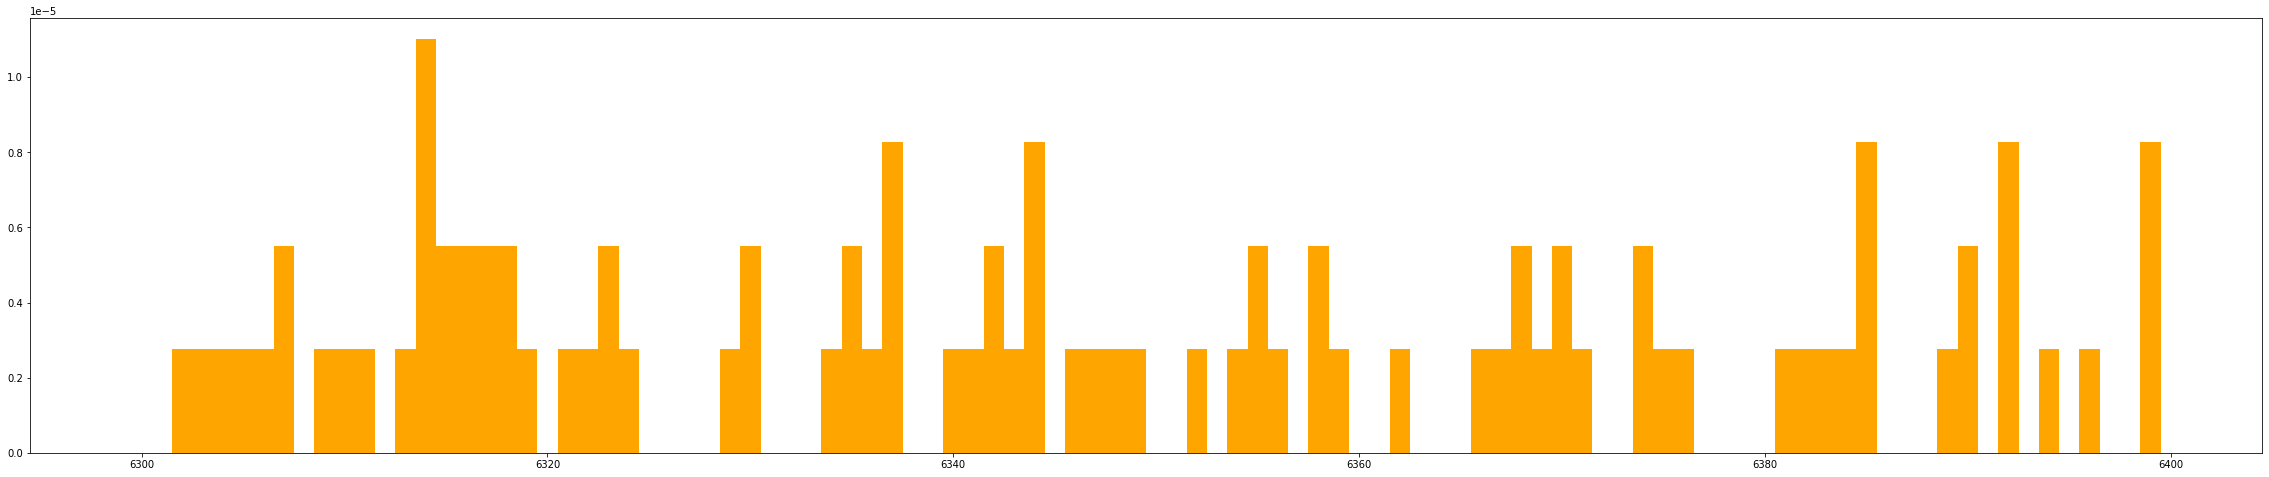

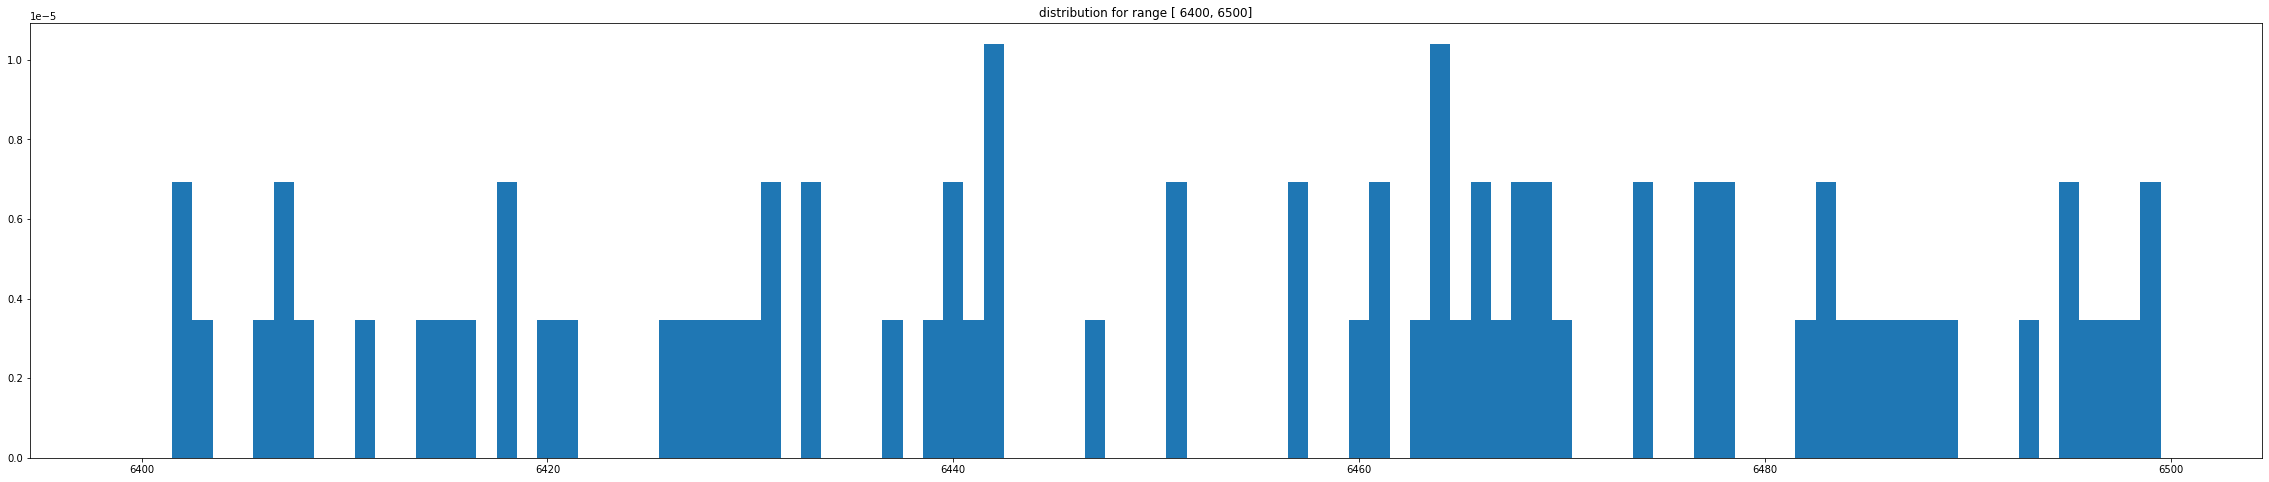

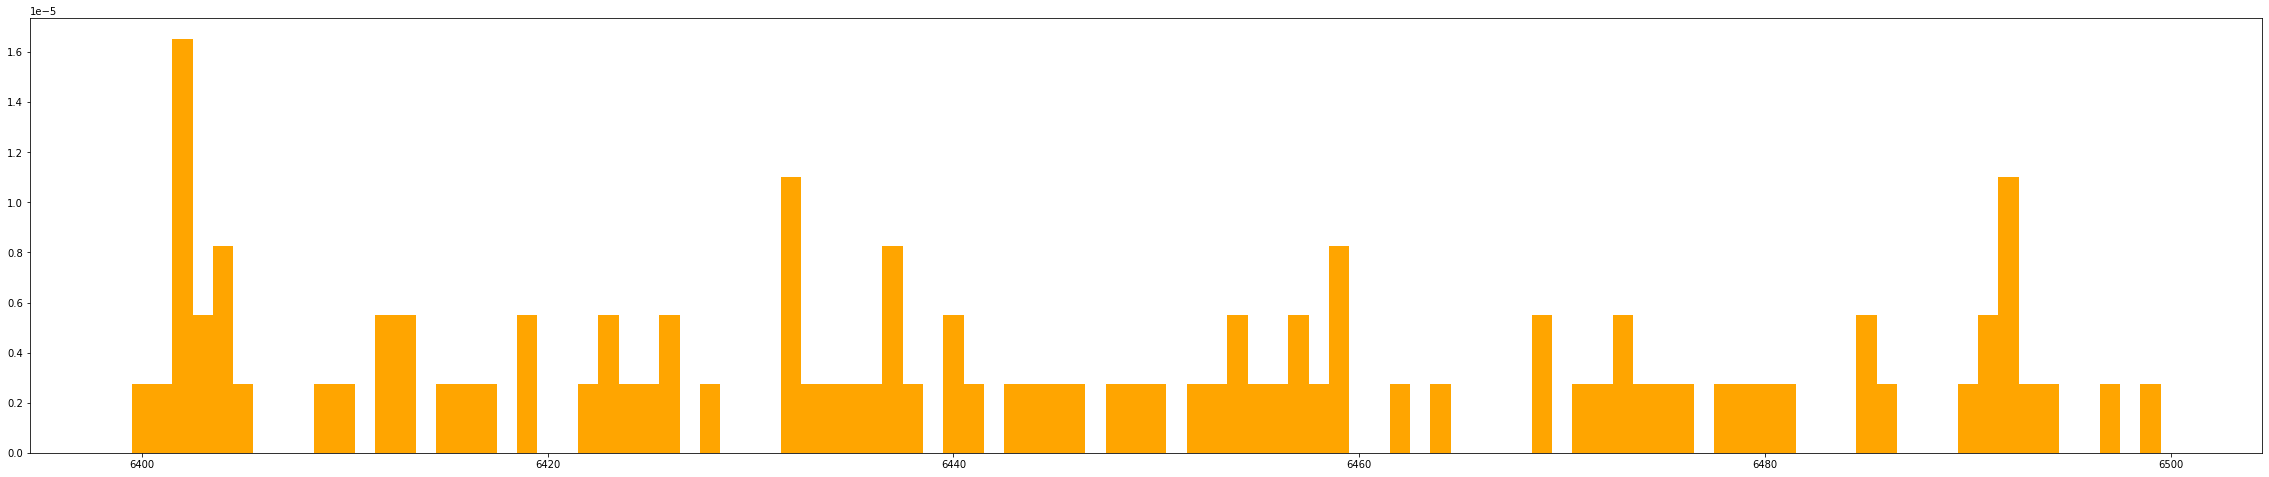

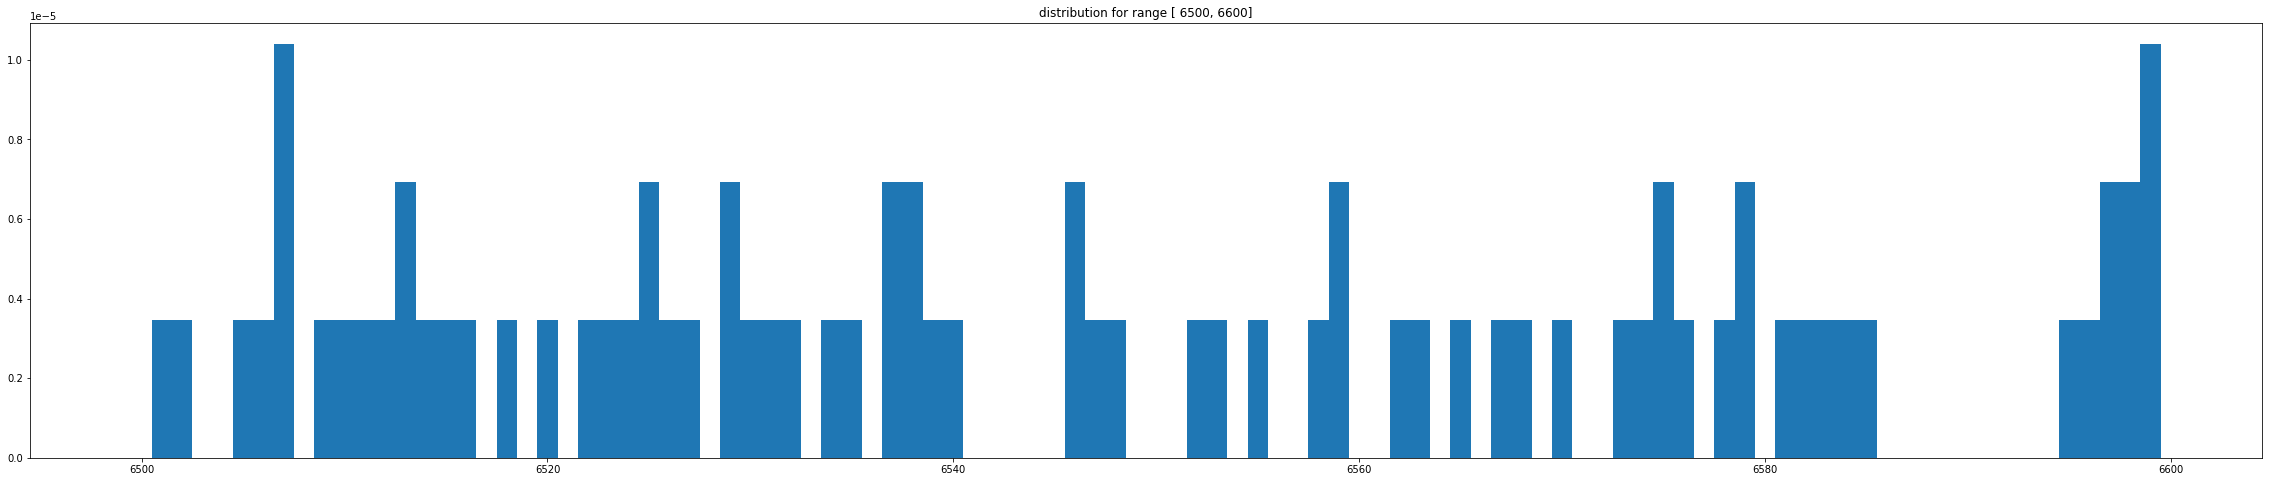

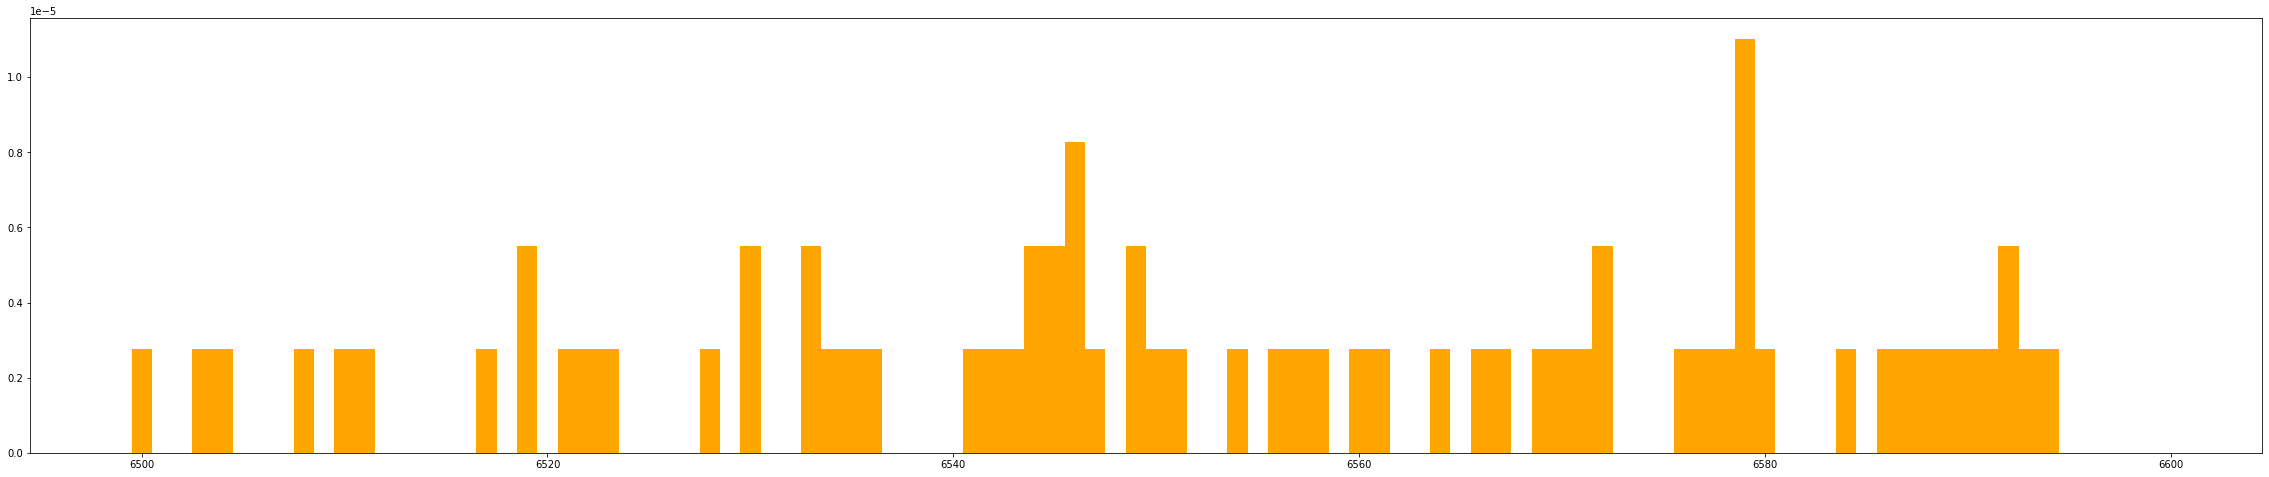

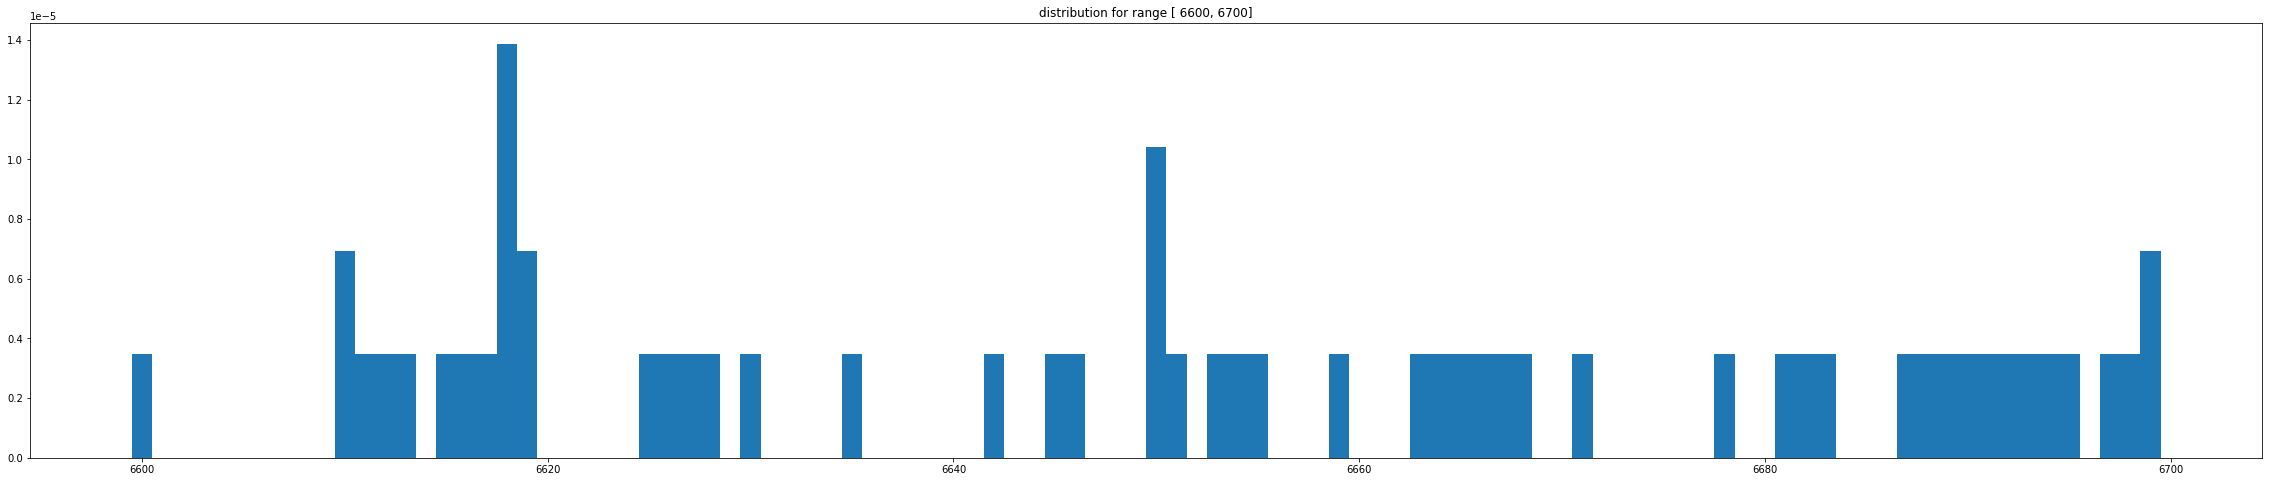

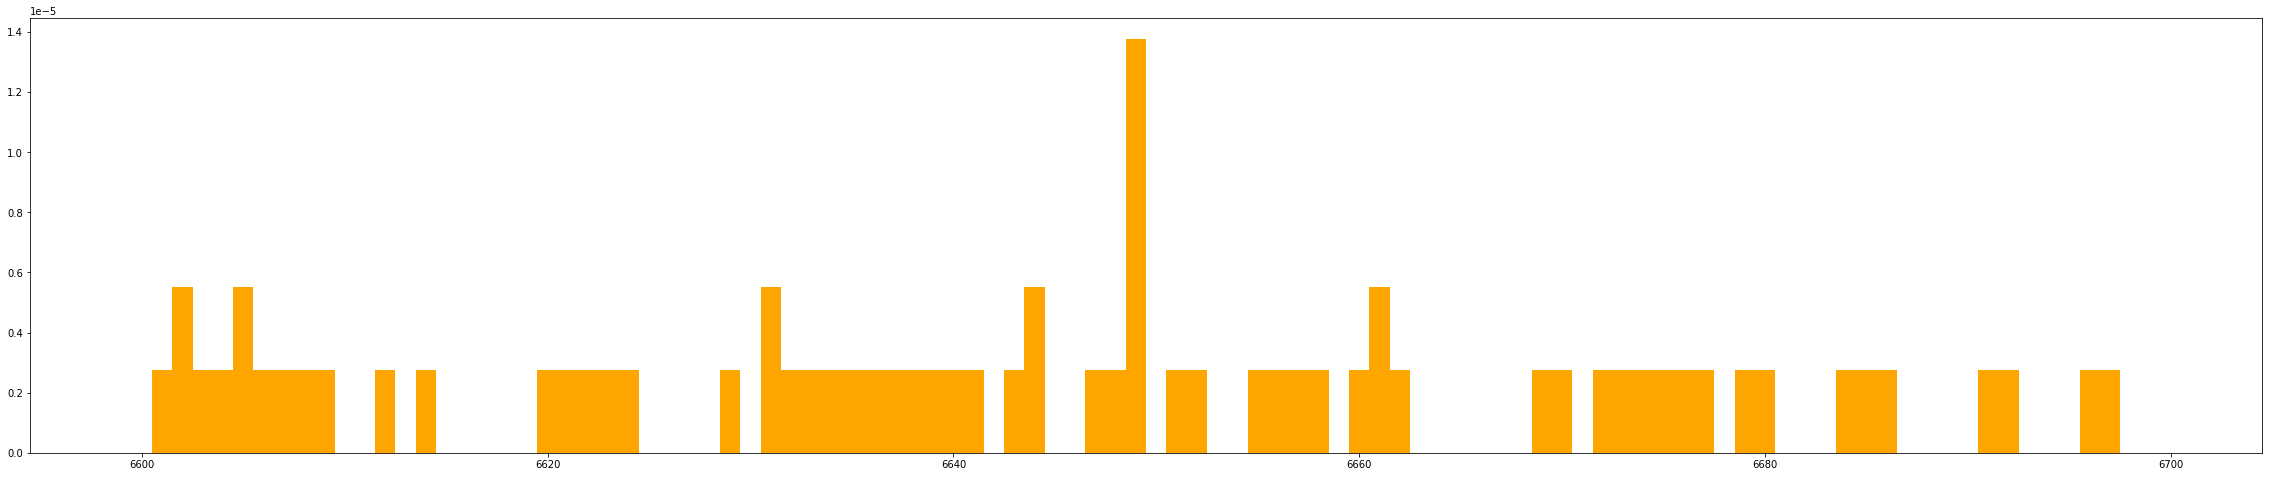

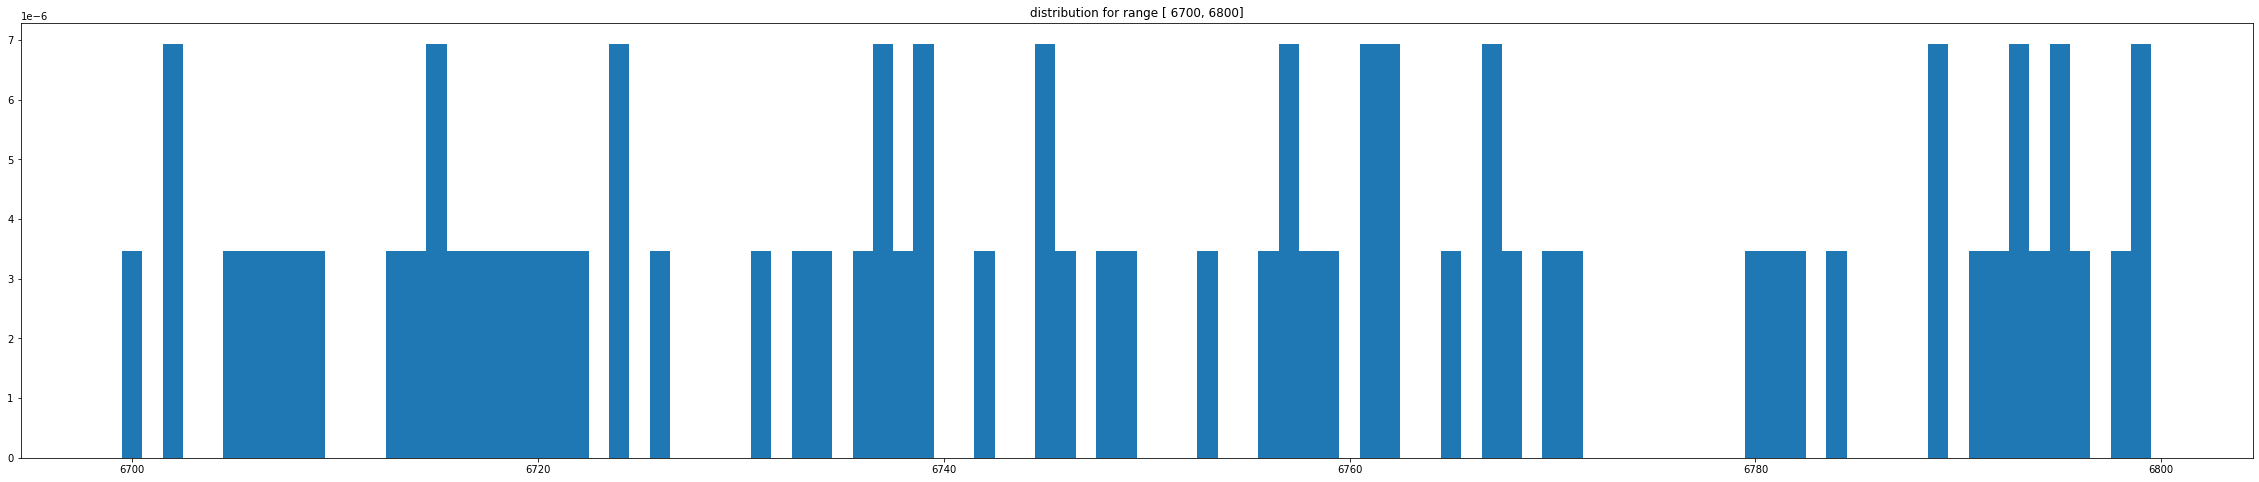

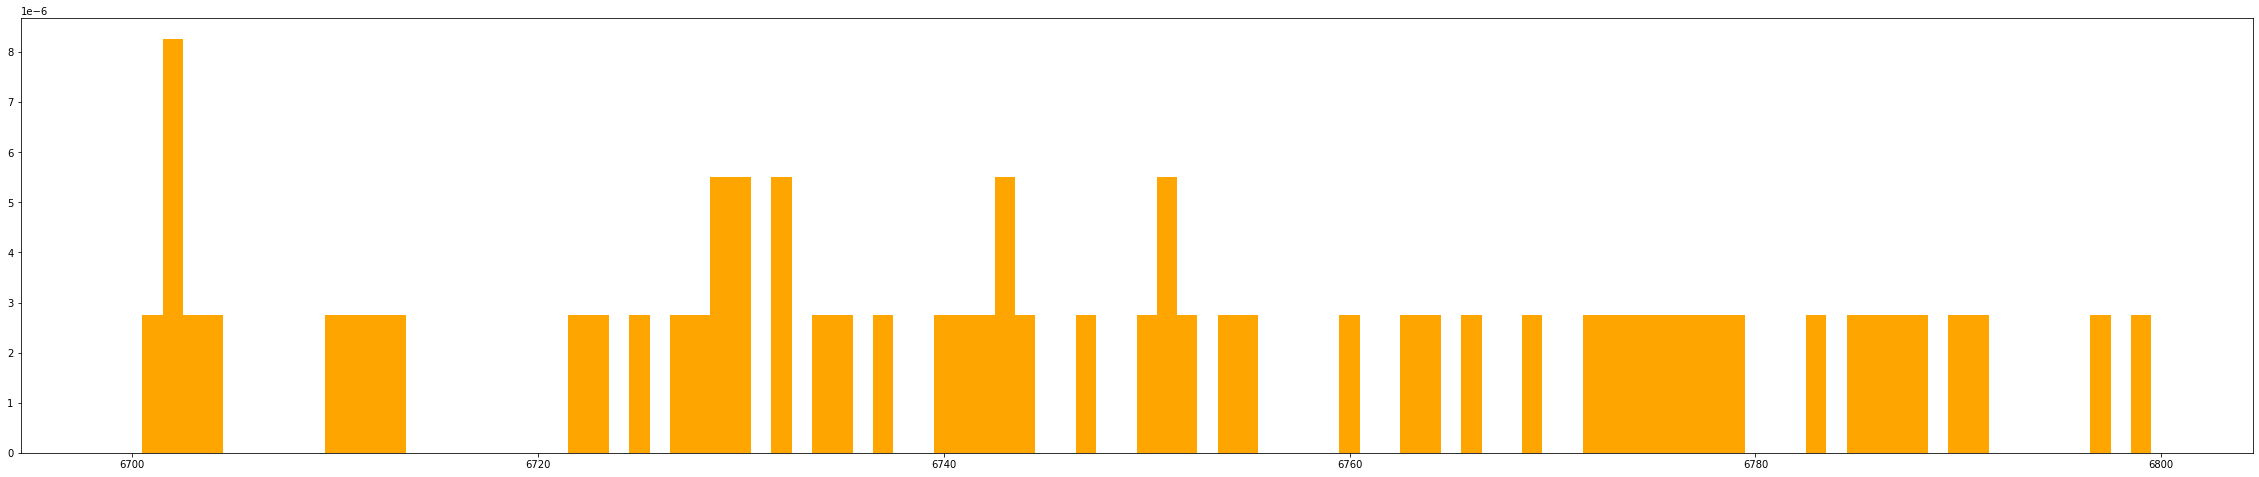

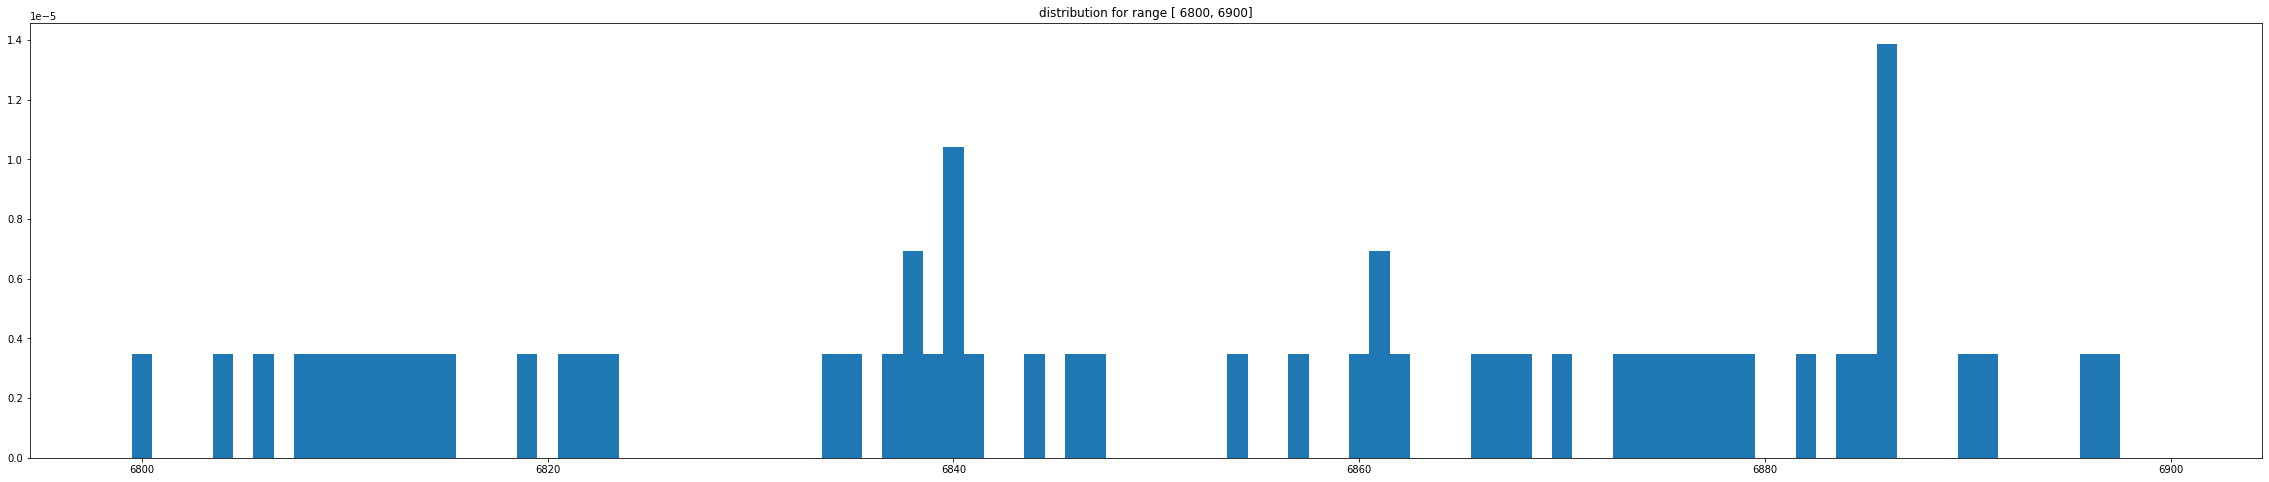

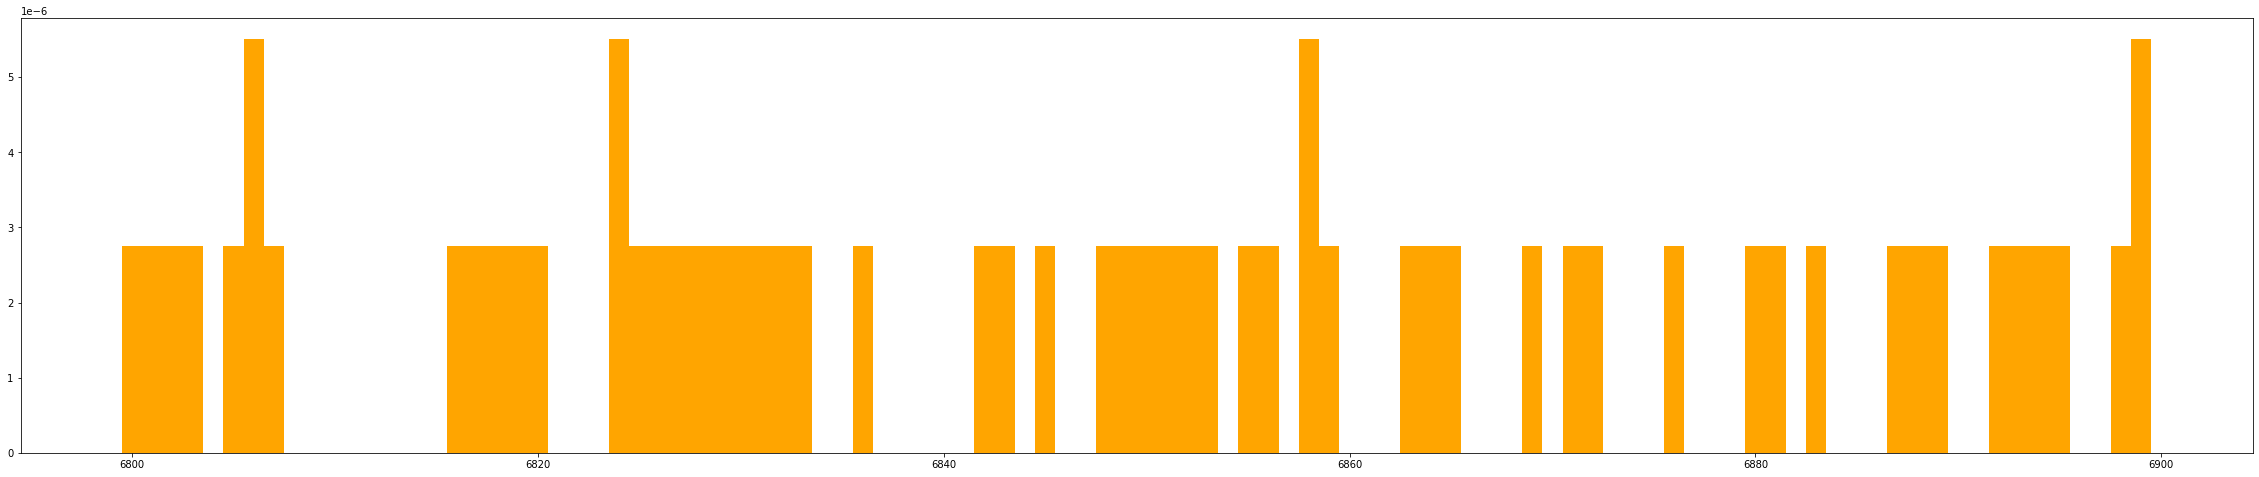

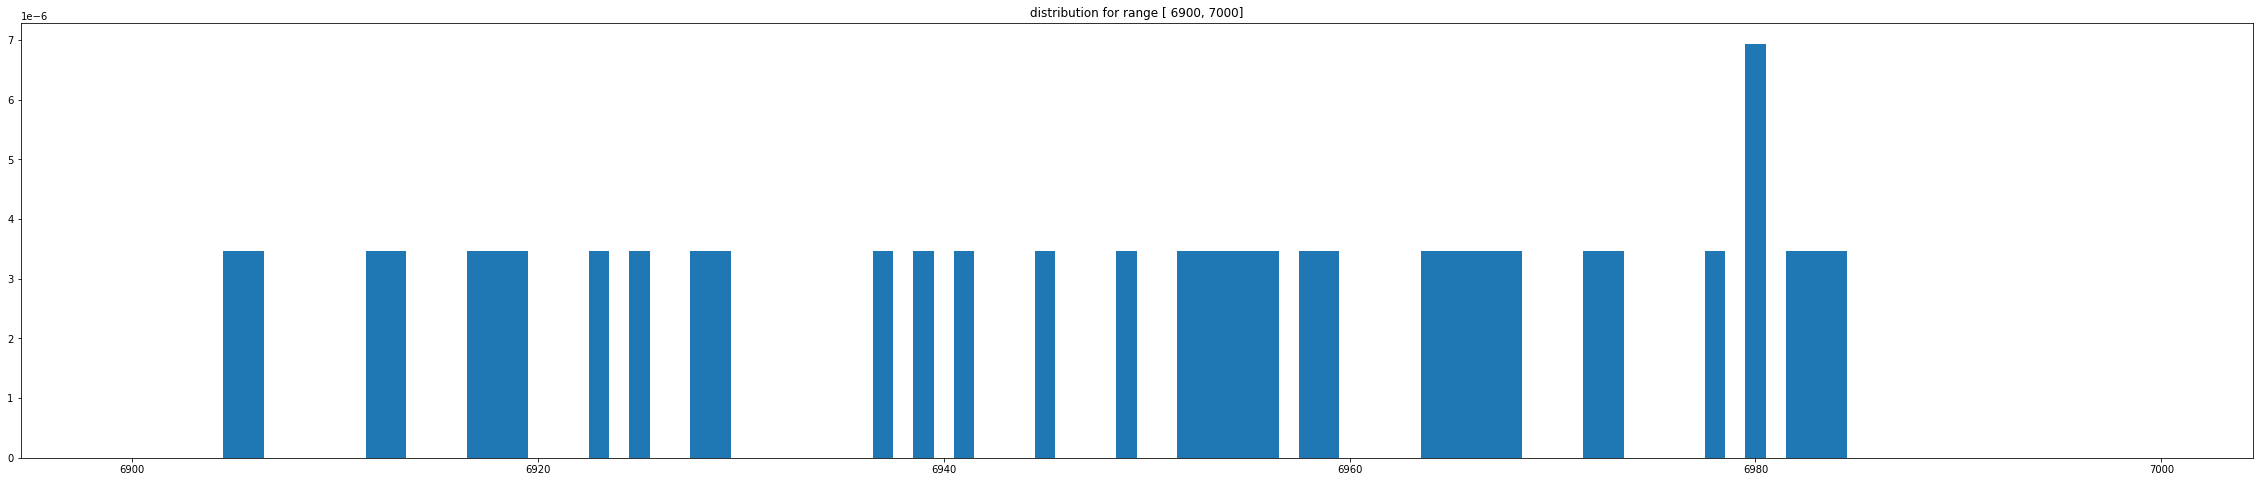

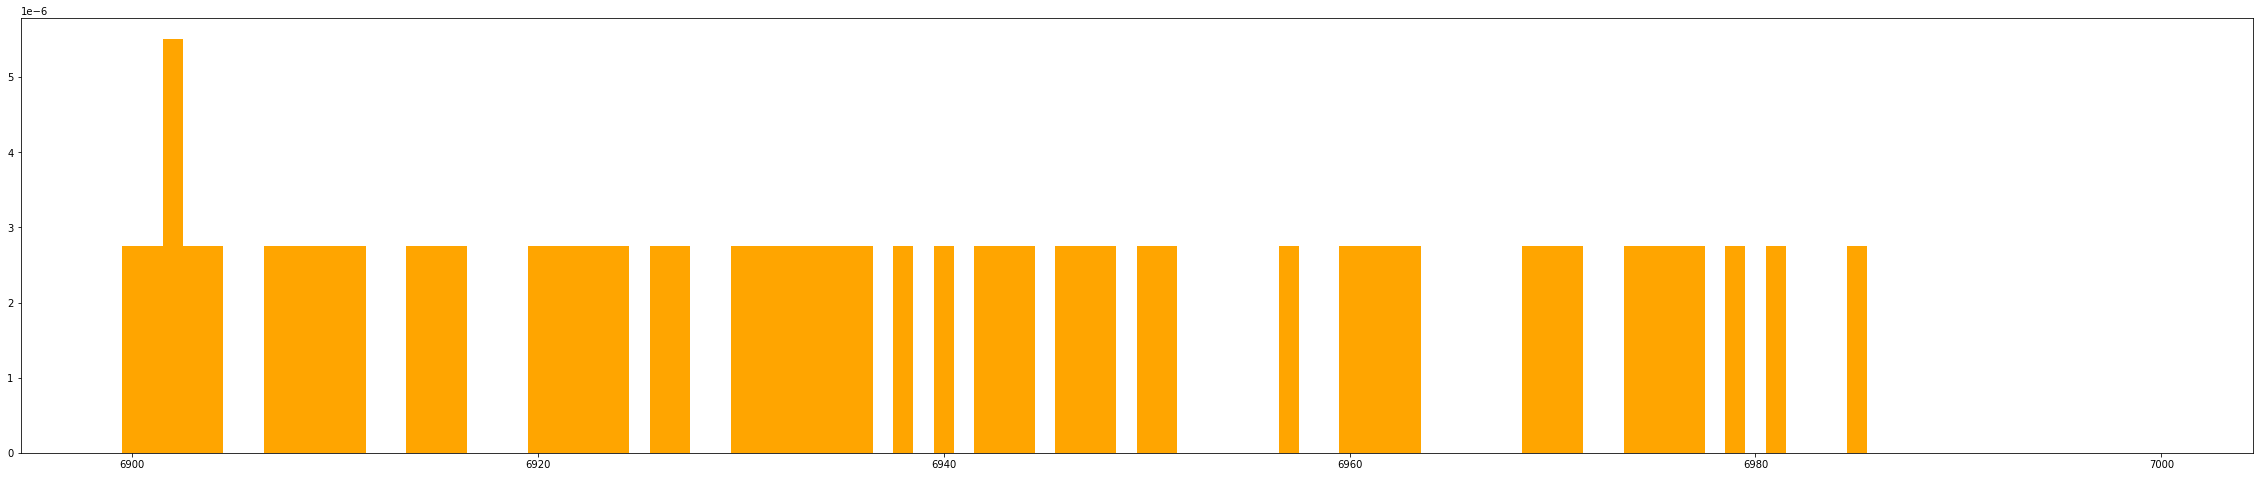

In [4]:
male_codes = [item for sublist in male_df['ICD codes'] for item in sublist]
female_codes = [item for sublist in female_df['ICD codes'] for item in sublist]

binwidth=1

max_code = 6985
gap = 100
for begin in range(0, max_code, 100):
    plt.figure(figsize=(40,8)) 
    hist, bins = np.histogram(male_codes, bins=range(begin, begin+gap+1, binwidth))
    hist = [x / len(male_codes) for x in hist]
    widths = np.diff(bins)
    plt.bar(bins[:-1], hist, widths)
    plt.title("distribution for range [ " + str(begin)+", " + str(begin+gap) + "]")

    plt.figure(figsize=(40,8)) 
    hist, bins = np.histogram(female_codes, bins=range(begin, begin+gap+1, binwidth))
    hist = [x / len(female_codes) for x in hist]
    widths = np.diff(bins)
    plt.bar(bins[:-1], hist, widths, color='orange')
    plt.show()
